In [1]:
import numpy as np
import pyglet
import random
import time
import matplotlib.pyplot as plt
from math import radians, degrees
from collections import deque

import gym
from gym import spaces, error
from gym.utils import seeding, closer
from utils import *

# from stable_baselines.common.env_checker import check_env
from stable_baselines import PPO2
from stable_baselines.bench import Monitor
from stable_baselines.common.vec_env import DummyVecEnv
# from stable_baselines.results_plotter import load_results, ts2xy
from stable_baselines.common.noise import AdaptiveParamNoiseSpec, NormalActionNoise
from stable_baselines.deepq.policies import FeedForwardPolicy


/home/cmb/anaconda3/envs/thesis/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/cmb/anaconda3/envs/thesis/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/cmb/anaconda3/envs/thesis/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/cmb/anaconda3/envs/thesis/lib/python3.6/site-pack

In [2]:
from env_mg import Friction_finger_env as Env
from HER_test_agent import *

In [3]:
env = Env()

In [4]:
def callback(_locals, _globals, num_episodes = 1000):
    """
    Callback is called at each step (timestep) for DQN
    :param_locals: (dict)
    :param_globals: (dict)
    """
    global n_steps, best_mean_reward
        
    if (env.episode) > num_episodes:
        return False

In [5]:
env = Monitor(env, filename=None, allow_early_resets=True)

# Define the model
# Custom MLP Policy 
policy_kwargs = dict(net_arch=[128, 128, 128])

model = PPO2('MlpPolicy', env, n_steps = 64, nminibatches=10, gamma=0.98, vf_coef=0.5, 
              ent_coef=0.01, noptepochs=10, cliprange=0.3, policy_kwargs=policy_kwargs, verbose=1)

# Train the agent
model.learn(total_timesteps=int(1e100), callback=callback)


Wrapping the env in a DummyVecEnv.
Episode 2	Average Score: 0.00-------------------------------------
| approxkl           | 0.0025580458 |
| clipfrac           | 0.0          |
| explained_variance | 0.000434     |
| fps                | 154          |
| n_updates          | 1            |
| policy_entropy     | 1.9433275    |
| policy_loss        | -0.020801855 |
| serial_timesteps   | 64           |
| time_elapsed       | 1.12e-05     |
| total_timesteps    | 64           |
| value_loss         | 1804.5372    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0014308088 |
| clipfrac           | 0.0          |
| explained_variance | 0.000722     |
| fps                | 787          |
| n_updates          | 2            |
| policy_entropy     | 1.929789     |
| policy_loss        | -0.005251536 |
| serial_timesteps   | 128          |
| time_elapsed       | 0.414        |
| total_timesteps    | 128          |
| value_loss         | 9

-------------------------------------
| approxkl           | 0.0010754841 |
| clipfrac           | 0.0          |
| explained_variance | -0.0472      |
| fps                | 856          |
| n_updates          | 18           |
| policy_entropy     | 1.8791239    |
| policy_loss        | -0.011250941 |
| serial_timesteps   | 1152         |
| time_elapsed       | 1.75         |
| total_timesteps    | 1152         |
| value_loss         | 1429.96      |
-------------------------------------
-------------------------------------
| approxkl           | 0.0014362838 |
| clipfrac           | 0.0          |
| explained_variance | -0.00332     |
| fps                | 836          |
| n_updates          | 19           |
| policy_entropy     | 1.8869047    |
| policy_loss        | 0.006049415  |
| serial_timesteps   | 1216         |
| time_elapsed       | 1.82         |
| total_timesteps    | 1216         |
| value_loss         | 4346.478     |
-------------------------------------
------------

--------------------------------------
| approxkl           | 0.0005449953  |
| clipfrac           | 0.00390625    |
| ep_len_mean        | 2.05e+03      |
| ep_reward_mean     | -1.24e+04     |
| explained_variance | 5.02e-05      |
| fps                | 836           |
| n_updates          | 35            |
| policy_entropy     | 1.7038198     |
| policy_loss        | -0.0039254148 |
| serial_timesteps   | 2240          |
| time_elapsed       | 3.12          |
| total_timesteps    | 2240          |
| value_loss         | 4739.6514     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0019885933 |
| clipfrac           | 0.0234375    |
| ep_len_mean        | 2.05e+03     |
| ep_reward_mean     | -1.24e+04    |
| explained_variance | 1.24e-05     |
| fps                | 830          |
| n_updates          | 36           |
| policy_entropy     | 1.7050607    |
| policy_loss        | 0.0053865192 |
| serial_timesteps   | 2304        

-------------------------------------
| approxkl           | 0.0043484657 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.05e+03     |
| ep_reward_mean     | -1.24e+04    |
| explained_variance | 5.3e-06      |
| fps                | 807          |
| n_updates          | 50           |
| policy_entropy     | 1.5993367    |
| policy_loss        | 0.002110422  |
| serial_timesteps   | 3200         |
| time_elapsed       | 4.29         |
| total_timesteps    | 3200         |
| value_loss         | 3240.956     |
-------------------------------------
-------------------------------------
| approxkl           | 0.0019196996 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.05e+03     |
| ep_reward_mean     | -1.24e+04    |
| explained_variance | -5.5e-05     |
| fps                | 668          |
| n_updates          | 51           |
| policy_entropy     | 1.5228189    |
| policy_loss        | 0.0019850195 |
| serial_timesteps   | 3264         |
| time_elaps

--------------------------------------
| approxkl           | 0.0013373982  |
| clipfrac           | 0.01171875    |
| ep_len_mean        | 2.05e+03      |
| ep_reward_mean     | -1.24e+04     |
| explained_variance | -7.15e-07     |
| fps                | 803           |
| n_updates          | 65            |
| policy_entropy     | 1.4372829     |
| policy_loss        | -0.0058714114 |
| serial_timesteps   | 4160          |
| time_elapsed       | 5.47          |
| total_timesteps    | 4160          |
| value_loss         | 1801.0475     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0021573775  |
| clipfrac           | 0.0078125     |
| ep_len_mean        | 2.05e+03      |
| ep_reward_mean     | -1.24e+04     |
| explained_variance | -9.54e-07     |
| fps                | 805           |
| n_updates          | 66            |
| policy_entropy     | 1.477022      |
| policy_loss        | -0.0035353736 |
| serial_timesteps   | 42

-------------------------------------
| approxkl           | 0.0006051012 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.05e+03     |
| ep_reward_mean     | -1.24e+04    |
| explained_variance | 0.186        |
| fps                | 709          |
| n_updates          | 80           |
| policy_entropy     | 1.4243659    |
| policy_loss        | 0.0012369743 |
| serial_timesteps   | 5120         |
| time_elapsed       | 6.66         |
| total_timesteps    | 5120         |
| value_loss         | 2600.339     |
-------------------------------------
-------------------------------------
| approxkl           | 0.0010588998 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.05e+03     |
| ep_reward_mean     | -1.24e+04    |
| explained_variance | -0.217       |
| fps                | 726          |
| n_updates          | 81           |
| policy_entropy     | 1.4790924    |
| policy_loss        | 0.0008526598 |
| serial_timesteps   | 5184         |
| time_elaps

--------------------------------------
| approxkl           | 0.0013237919  |
| clipfrac           | 0.015625      |
| ep_len_mean        | 2.05e+03      |
| ep_reward_mean     | -1.24e+04     |
| explained_variance | -5.96e-07     |
| fps                | 719           |
| n_updates          | 95            |
| policy_entropy     | 1.6854672     |
| policy_loss        | 0.00032131467 |
| serial_timesteps   | 6080          |
| time_elapsed       | 7.88          |
| total_timesteps    | 6080          |
| value_loss         | 6783.759      |
--------------------------------------
--------------------------------------
| approxkl           | 0.00044271664 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.05e+03      |
| ep_reward_mean     | -1.24e+04     |
| explained_variance | 1.01e-06      |
| fps                | 720           |
| n_updates          | 96            |
| policy_entropy     | 1.6733496     |
| policy_loss        | 0.0032160333  |
| serial_timesteps   | 61

Episode 17	Average Score: -3121.29--------------------------------------
| approxkl           | 0.0031867395  |
| clipfrac           | 0.04296875    |
| ep_len_mean        | 2.05e+03      |
| ep_reward_mean     | -1.24e+04     |
| explained_variance | -0.000827     |
| fps                | 824           |
| n_updates          | 110           |
| policy_entropy     | 1.7874072     |
| policy_loss        | -0.0120367585 |
| serial_timesteps   | 7040          |
| time_elapsed       | 9.13          |
| total_timesteps    | 7040          |
| value_loss         | 920.7196      |
--------------------------------------
--------------------------------------
| approxkl           | 0.002063868   |
| clipfrac           | 0.01171875    |
| ep_len_mean        | 2.05e+03      |
| ep_reward_mean     | -1.24e+04     |
| explained_variance | 7.15e-07      |
| fps                | 807           |
| n_updates          | 111           |
| policy_entropy     | 1.801189      |
| policy_loss        | -0.0059

-------------------------------------
| approxkl           | 0.0029994587 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.05e+03     |
| ep_reward_mean     | -1.24e+04    |
| explained_variance | -3.58e-06    |
| fps                | 737          |
| n_updates          | 124          |
| policy_entropy     | 1.7169384    |
| policy_loss        | -0.011446909 |
| serial_timesteps   | 7936         |
| time_elapsed       | 10.3         |
| total_timesteps    | 7936         |
| value_loss         | 6302.8706    |
-------------------------------------
Episode 19	Average Score: -3198.02-------------------------------------
| approxkl           | 0.0022728276 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.05e+03     |
| ep_reward_mean     | -1.24e+04    |
| explained_variance | -2.03e-06    |
| fps                | 793          |
| n_updates          | 125          |
| policy_entropy     | 1.694803     |
| policy_loss        | -0.005172442 |
| serial_timeste

--------------------------------------
| approxkl           | 0.00026673413 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.05e+03      |
| ep_reward_mean     | -1.24e+04     |
| explained_variance | -1.19e-07     |
| fps                | 853           |
| n_updates          | 139           |
| policy_entropy     | 1.4795521     |
| policy_loss        | 0.00039415574 |
| serial_timesteps   | 8896          |
| time_elapsed       | 11.5          |
| total_timesteps    | 8896          |
| value_loss         | 2508.8748     |
--------------------------------------
-------------------------------------
| approxkl           | 0.001977477  |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.05e+03     |
| ep_reward_mean     | -1.24e+04    |
| explained_variance | 4.77e-07     |
| fps                | 851          |
| n_updates          | 140          |
| policy_entropy     | 1.4495025    |
| policy_loss        | -0.008796967 |
| serial_timesteps   | 8960        

-------------------------------------
| approxkl           | 0.0036778292 |
| clipfrac           | 0.02734375   |
| ep_len_mean        | 2.05e+03     |
| ep_reward_mean     | -1.24e+04    |
| explained_variance | -1.19e-07    |
| fps                | 823          |
| n_updates          | 154          |
| policy_entropy     | 1.5261319    |
| policy_loss        | -0.014841304 |
| serial_timesteps   | 9856         |
| time_elapsed       | 12.7         |
| total_timesteps    | 9856         |
| value_loss         | 2432.1018    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0018483165 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.05e+03     |
| ep_reward_mean     | -1.24e+04    |
| explained_variance | -1.19e-07    |
| fps                | 829          |
| n_updates          | 155          |
| policy_entropy     | 1.579906     |
| policy_loss        | 0.0054782787 |
| serial_timesteps   | 9920         |
| time_elaps

-------------------------------------
| approxkl           | 0.0076630535 |
| clipfrac           | 0.09765625   |
| ep_len_mean        | 2.05e+03     |
| ep_reward_mean     | -1.24e+04    |
| explained_variance | -2.38e-07    |
| fps                | 865          |
| n_updates          | 169          |
| policy_entropy     | 1.1941445    |
| policy_loss        | -0.01622042  |
| serial_timesteps   | 10816        |
| time_elapsed       | 13.9         |
| total_timesteps    | 10816        |
| value_loss         | 1165.8726    |
-------------------------------------
--------------------------------------
| approxkl           | 0.0038325791  |
| clipfrac           | 0.015625      |
| ep_len_mean        | 2.05e+03      |
| ep_reward_mean     | -1.24e+04     |
| explained_variance | 0             |
| fps                | 871           |
| n_updates          | 170           |
| policy_entropy     | 1.0148861     |
| policy_loss        | -0.0059204465 |
| serial_timesteps   | 10880         |
|

--------------------------------------
| approxkl           | 0.00011980577 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.05e+03      |
| ep_reward_mean     | -1.24e+04     |
| explained_variance | 0             |
| fps                | 830           |
| n_updates          | 184           |
| policy_entropy     | 0.5825493     |
| policy_loss        | -0.0040768934 |
| serial_timesteps   | 11776         |
| time_elapsed       | 15            |
| total_timesteps    | 11776         |
| value_loss         | 7868.7817     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00013505753 |
| clipfrac           | 0.00390625    |
| ep_len_mean        | 2.05e+03      |
| ep_reward_mean     | -1.24e+04     |
| explained_variance | 0             |
| fps                | 814           |
| n_updates          | 185           |
| policy_entropy     | 0.5863961     |
| policy_loss        | -0.0042643324 |
| serial_timesteps   | 11

-------------------------------------
| approxkl           | 6.951955e-05 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.05e+03     |
| ep_reward_mean     | -1.24e+04    |
| explained_variance | 5.96e-08     |
| fps                | 823          |
| n_updates          | 199          |
| policy_entropy     | 0.31861594   |
| policy_loss        | 0.0010699823 |
| serial_timesteps   | 12736        |
| time_elapsed       | 16.2         |
| total_timesteps    | 12736        |
| value_loss         | 2051.5503    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0006538761 |
| clipfrac           | 0.01171875   |
| ep_len_mean        | 2.05e+03     |
| ep_reward_mean     | -1.24e+04    |
| explained_variance | 0            |
| fps                | 856          |
| n_updates          | 200          |
| policy_entropy     | 0.28222862   |
| policy_loss        | -0.005156775 |
| serial_timesteps   | 12800        |
| time_elaps

--------------------------------------
| approxkl           | 2.1785434e-07 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.05e+03      |
| ep_reward_mean     | -1.24e+04     |
| explained_variance | 0             |
| fps                | 845           |
| n_updates          | 213           |
| policy_entropy     | 0.15246935    |
| policy_loss        | 1.0477379e-08 |
| serial_timesteps   | 13632         |
| time_elapsed       | 17.3          |
| total_timesteps    | 13632         |
| value_loss         | 3958.978      |
--------------------------------------
--------------------------------------
| approxkl           | 1.0093335e-07 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.05e+03      |
| ep_reward_mean     | -1.24e+04     |
| explained_variance | 0             |
| fps                | 844           |
| n_updates          | 214           |
| policy_entropy     | 0.15716295    |
| policy_loss        | -4.773028e-09 |
| serial_timesteps   | 13

--------------------------------------
| approxkl           | 8.2170875e-05 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.05e+03      |
| ep_reward_mean     | -1.24e+04     |
| explained_variance | -1.19e-07     |
| fps                | 866           |
| n_updates          | 227           |
| policy_entropy     | 0.059899036   |
| policy_loss        | -0.0005463925 |
| serial_timesteps   | 14528         |
| time_elapsed       | 18.3          |
| total_timesteps    | 14528         |
| value_loss         | 969.30695     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0001524278  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.05e+03      |
| ep_reward_mean     | -1.24e+04     |
| explained_variance | -1.19e-07     |
| fps                | 846           |
| n_updates          | 228           |
| policy_entropy     | 0.052232537   |
| policy_loss        | -0.0016637918 |
| serial_timesteps   | 14

---------------------------------------
| approxkl           | 6.409179e-08   |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.05e+03       |
| ep_reward_mean     | -1.24e+04      |
| explained_variance | 0              |
| fps                | 865            |
| n_updates          | 241            |
| policy_entropy     | 0.048076253    |
| policy_loss        | -4.5401976e-08 |
| serial_timesteps   | 15424          |
| time_elapsed       | 19.4           |
| total_timesteps    | 15424          |
| value_loss         | 1923.4247      |
---------------------------------------
--------------------------------------
| approxkl           | 5.4463394e-09 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.05e+03      |
| ep_reward_mean     | -1.24e+04     |
| explained_variance | 5.96e-08      |
| fps                | 832           |
| n_updates          | 242           |
| policy_entropy     | 0.050191067   |
| policy_loss        | 9.313226e-09  |
| serial_t

---------------------------------------
| approxkl           | 8.460834e-06   |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.05e+03       |
| ep_reward_mean     | -1.24e+04      |
| explained_variance | 1.79e-07       |
| fps                | 846            |
| n_updates          | 255            |
| policy_entropy     | 0.04247713     |
| policy_loss        | -0.00014636759 |
| serial_timesteps   | 16320          |
| time_elapsed       | 20.5           |
| total_timesteps    | 16320          |
| value_loss         | 6546.169       |
---------------------------------------
--------------------------------------
| approxkl           | 3.1845488e-08 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.05e+03      |
| ep_reward_mean     | -1.24e+04     |
| explained_variance | 1.19e-07      |
| fps                | 834           |
| n_updates          | 256           |
| policy_entropy     | 0.03955229    |
| policy_loss        | 2.6775524e-08 |
| serial_t

--------------------------------------
| approxkl           | 1.0446405e-05 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.05e+03      |
| ep_reward_mean     | -1.24e+04     |
| explained_variance | 0             |
| fps                | 863           |
| n_updates          | 269           |
| policy_entropy     | 0.03956189    |
| policy_loss        | 7.421826e-05  |
| serial_timesteps   | 17216         |
| time_elapsed       | 21.5          |
| total_timesteps    | 17216         |
| value_loss         | 2851.041      |
--------------------------------------
--------------------------------------
| approxkl           | 6.298926e-10  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.05e+03      |
| ep_reward_mean     | -1.24e+04     |
| explained_variance | 1.19e-07      |
| fps                | 866           |
| n_updates          | 270           |
| policy_entropy     | 0.040989272   |
| policy_loss        | 2.0256266e-08 |
| serial_timesteps   | 17

--------------------------------------
| approxkl           | 7.937668e-08  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.05e+03      |
| ep_reward_mean     | -1.24e+04     |
| explained_variance | 5.96e-08      |
| fps                | 845           |
| n_updates          | 283           |
| policy_entropy     | 0.032605667   |
| policy_loss        | 4.0978193e-08 |
| serial_timesteps   | 18112         |
| time_elapsed       | 22.6          |
| total_timesteps    | 18112         |
| value_loss         | 557.00714     |
--------------------------------------
--------------------------------------
| approxkl           | 1.3358861e-09 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.05e+03      |
| ep_reward_mean     | -1.24e+04     |
| explained_variance | 0             |
| fps                | 852           |
| n_updates          | 284           |
| policy_entropy     | 0.030774746   |
| policy_loss        | 1.3504177e-08 |
| serial_timesteps   | 18

Episode 41	Average Score: -3161.69--------------------------------------
| approxkl           | 1.5357776e-10 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.05e+03      |
| ep_reward_mean     | -1.24e+04     |
| explained_variance | 4.17e-07      |
| fps                | 804           |
| n_updates          | 297           |
| policy_entropy     | 0.028767519   |
| policy_loss        | -2.188608e-08 |
| serial_timesteps   | 19008         |
| time_elapsed       | 23.7          |
| total_timesteps    | 19008         |
| value_loss         | 616.5932      |
--------------------------------------
--------------------------------------
| approxkl           | 6.4751704e-11 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.05e+03      |
| ep_reward_mean     | -1.24e+04     |
| explained_variance | 0             |
| fps                | 809           |
| n_updates          | 298           |
| policy_entropy     | 0.028818049   |
| policy_loss        | 3.53902

--------------------------------------
| approxkl           | 1.4335422e-10 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.05e+03      |
| ep_reward_mean     | -1.24e+04     |
| explained_variance | 0             |
| fps                | 827           |
| n_updates          | 311           |
| policy_entropy     | 0.027406946   |
| policy_loss        | 2.8871e-08    |
| serial_timesteps   | 19904         |
| time_elapsed       | 24.7          |
| total_timesteps    | 19904         |
| value_loss         | 2669.9197     |
--------------------------------------
---------------------------------------
| approxkl           | 1.5350143e-10  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.05e+03       |
| ep_reward_mean     | -1.24e+04      |
| explained_variance | 0              |
| fps                | 836            |
| n_updates          | 312            |
| policy_entropy     | 0.027646719    |
| policy_loss        | -5.2386895e-08 |
| serial_timest

---------------------------------------
| approxkl           | 1.10555474e-10 |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.05e+03       |
| ep_reward_mean     | -1.24e+04      |
| explained_variance | -1.19e-07      |
| fps                | 829            |
| n_updates          | 325            |
| policy_entropy     | 0.024234403    |
| policy_loss        | 2.9220246e-08  |
| serial_timesteps   | 20800          |
| time_elapsed       | 25.8           |
| total_timesteps    | 20800          |
| value_loss         | 1868.9152      |
---------------------------------------
---------------------------------------
| approxkl           | 2.2795255e-05  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.05e+03       |
| ep_reward_mean     | -1.24e+04      |
| explained_variance | -1.19e-07      |
| fps                | 825            |
| n_updates          | 326            |
| policy_entropy     | 0.024088303    |
| policy_loss        | -0.00016370323 |


--------------------------------------
| approxkl           | 2.290532e-05  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.05e+03      |
| ep_reward_mean     | -1.24e+04     |
| explained_variance | 0             |
| fps                | 867           |
| n_updates          | 339           |
| policy_entropy     | 0.0141292345  |
| policy_loss        | 3.7815422e-05 |
| serial_timesteps   | 21696         |
| time_elapsed       | 26.9          |
| total_timesteps    | 21696         |
| value_loss         | 135.40747     |
--------------------------------------
--------------------------------------
| approxkl           | 1.4140025e-09 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.05e+03      |
| ep_reward_mean     | -1.24e+04     |
| explained_variance | 0             |
| fps                | 850           |
| n_updates          | 340           |
| policy_entropy     | 0.015284114   |
| policy_loss        | 7.450581e-09  |
| serial_timesteps   | 21

---------------------------------------
| approxkl           | 5.1845425e-12  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.05e+03       |
| ep_reward_mean     | -1.24e+04      |
| explained_variance | 0              |
| fps                | 847            |
| n_updates          | 353            |
| policy_entropy     | 0.011674068    |
| policy_loss        | -4.1909516e-09 |
| serial_timesteps   | 22592          |
| time_elapsed       | 27.9           |
| total_timesteps    | 22592          |
| value_loss         | 5644.2026      |
---------------------------------------
--------------------------------------
| approxkl           | 5.9198267e-12 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.05e+03      |
| ep_reward_mean     | -1.24e+04     |
| explained_variance | 1.19e-07      |
| fps                | 814           |
| n_updates          | 354           |
| policy_entropy     | 0.011726672   |
| policy_loss        | 2.3748726e-08 |
| serial_t

-------------------------------------
| approxkl           | 9.815897e-12 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.15e+04     |
| ep_reward_mean     | -7.41e+04    |
| explained_variance | 5.96e-08     |
| fps                | 820          |
| n_updates          | 367          |
| policy_entropy     | 0.012443124  |
| policy_loss        | 1.094304e-08 |
| serial_timesteps   | 23488        |
| time_elapsed       | 29           |
| total_timesteps    | 23488        |
| value_loss         | 5093.115     |
-------------------------------------
---------------------------------------
| approxkl           | 1.0157918e-11  |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.15e+04       |
| ep_reward_mean     | -7.41e+04      |
| explained_variance | 0              |
| fps                | 823            |
| n_updates          | 368            |
| policy_entropy     | 0.012511372    |
| policy_loss        | -3.3760443e-08 |
| serial_timesteps   | 23552  

--------------------------------------
| approxkl           | 2.1691273e-08 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 885           |
| n_updates          | 381           |
| policy_entropy     | 0.009982623   |
| policy_loss        | 5.820766e-10  |
| serial_timesteps   | 24384         |
| time_elapsed       | 30.1          |
| total_timesteps    | 24384         |
| value_loss         | 7176.8125     |
--------------------------------------
--------------------------------------
| approxkl           | 4.2246875e-10 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 881           |
| n_updates          | 382           |
| policy_entropy     | 0.008832343   |
| policy_loss        | -9.546056e-09 |
| serial_timesteps   | 24

---------------------------------------
| approxkl           | 1.08360074e-11 |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.15e+04       |
| ep_reward_mean     | -7.41e+04      |
| explained_variance | 0              |
| fps                | 845            |
| n_updates          | 395            |
| policy_entropy     | 0.011808155    |
| policy_loss        | 1.0011718e-08  |
| serial_timesteps   | 25280          |
| time_elapsed       | 31.1           |
| total_timesteps    | 25280          |
| value_loss         | 612.9276       |
---------------------------------------
--------------------------------------
| approxkl           | 1.1396325e-11 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 852           |
| n_updates          | 396           |
| policy_entropy     | 0.011881443   |
| policy_loss        | -2.561137e-09 |
| serial_t

---------------------------------------
| approxkl           | 2.0380635e-11  |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.15e+04       |
| ep_reward_mean     | -7.41e+04      |
| explained_variance | 0              |
| fps                | 902            |
| n_updates          | 409            |
| policy_entropy     | 0.013016981    |
| policy_loss        | -3.4924597e-09 |
| serial_timesteps   | 26176          |
| time_elapsed       | 32.2           |
| total_timesteps    | 26176          |
| value_loss         | 187.40323      |
---------------------------------------
---------------------------------------
| approxkl           | 2.1189222e-11  |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.15e+04       |
| ep_reward_mean     | -7.41e+04      |
| explained_variance | 0              |
| fps                | 915            |
| n_updates          | 410            |
| policy_entropy     | 0.013116505    |
| policy_loss        | -4.2142347e-08 |


--------------------------------------
| approxkl           | 4.3128504e-11 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | -1.19e-07     |
| fps                | 841           |
| n_updates          | 423           |
| policy_entropy     | 0.0146962665  |
| policy_loss        | 6.6589564e-08 |
| serial_timesteps   | 27072         |
| time_elapsed       | 33.2          |
| total_timesteps    | 27072         |
| value_loss         | 2414.307      |
--------------------------------------
---------------------------------------
| approxkl           | 4.539999e-11   |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.15e+04       |
| ep_reward_mean     | -7.41e+04      |
| explained_variance | 0              |
| fps                | 836            |
| n_updates          | 424            |
| policy_entropy     | 0.014837211    |
| policy_loss        | -2.7008355e-08 |
| serial_timest

--------------------------------------
| approxkl           | 1.0166132e-10 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 864           |
| n_updates          | 437           |
| policy_entropy     | 0.017147647   |
| policy_loss        | -3.608875e-08 |
| serial_timesteps   | 27968         |
| time_elapsed       | 34.3          |
| total_timesteps    | 27968         |
| value_loss         | 2450.096      |
--------------------------------------
Episode 60	Average Score: -3072.30
Episode 60	Average Score: -3072.30
---------------------------------------
| approxkl           | 1.0973014e-10  |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.15e+04       |
| ep_reward_mean     | -7.41e+04      |
| explained_variance | -1.19e-07      |
| fps                | 817            |
| n_updates          | 438            |
| policy_entropy     | 0.

---------------------------------------
| approxkl           | 2.2270312e-09  |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.15e+04       |
| ep_reward_mean     | -7.41e+04      |
| explained_variance | -1.19e-07      |
| fps                | 889            |
| n_updates          | 451            |
| policy_entropy     | 0.030220075    |
| policy_loss        | -3.0966476e-08 |
| serial_timesteps   | 28864          |
| time_elapsed       | 35.4           |
| total_timesteps    | 28864          |
| value_loss         | 1081.0673      |
---------------------------------------
--------------------------------------
| approxkl           | 1.704798e-09  |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 5.96e-08      |
| fps                | 823           |
| n_updates          | 452           |
| policy_entropy     | 0.031010281   |
| policy_loss        | 6.9849193e-10 |
| serial_t

--------------------------------------
| approxkl           | 4.9134913e-10 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 870           |
| n_updates          | 465           |
| policy_entropy     | 0.0079864655  |
| policy_loss        | -3.236346e-08 |
| serial_timesteps   | 29760         |
| time_elapsed       | 36.5          |
| total_timesteps    | 29760         |
| value_loss         | 1371.4945     |
--------------------------------------
---------------------------------------
| approxkl           | 5.2729236e-12  |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.15e+04       |
| ep_reward_mean     | -7.41e+04      |
| explained_variance | 0              |
| fps                | 812            |
| n_updates          | 466            |
| policy_entropy     | 0.007814328    |
| policy_loss        | -1.6530976e-08 |
| serial_timest

---------------------------------------
| approxkl           | 7.518815e-12   |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.15e+04       |
| ep_reward_mean     | -7.41e+04      |
| explained_variance | 0              |
| fps                | 825            |
| n_updates          | 479            |
| policy_entropy     | 0.008440184    |
| policy_loss        | -2.4912879e-08 |
| serial_timesteps   | 30656          |
| time_elapsed       | 37.5           |
| total_timesteps    | 30656          |
| value_loss         | 243.14394      |
---------------------------------------
---------------------------------------
| approxkl           | 7.738167e-12   |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.15e+04       |
| ep_reward_mean     | -7.41e+04      |
| explained_variance | 0              |
| fps                | 859            |
| n_updates          | 480            |
| policy_entropy     | 0.008505811    |
| policy_loss        | -8.1490725e-09 |


---------------------------------------
| approxkl           | 1.496422e-11   |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.15e+04       |
| ep_reward_mean     | -7.41e+04      |
| explained_variance | 0              |
| fps                | 751            |
| n_updates          | 493            |
| policy_entropy     | 0.009446492    |
| policy_loss        | -1.5133992e-08 |
| serial_timesteps   | 31552          |
| time_elapsed       | 38.6           |
| total_timesteps    | 31552          |
| value_loss         | 6617.458       |
---------------------------------------
--------------------------------------
| approxkl           | 1.60548e-11   |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 724           |
| n_updates          | 494           |
| policy_entropy     | 0.009534136   |
| policy_loss        | 2.0023435e-08 |
| serial_t

--------------------------------------
| approxkl           | 3.6811793e-11 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 720           |
| n_updates          | 507           |
| policy_entropy     | 0.010968738   |
| policy_loss        | 2.7474016e-08 |
| serial_timesteps   | 32448         |
| time_elapsed       | 39.7          |
| total_timesteps    | 32448         |
| value_loss         | 803.7398      |
--------------------------------------
-------------------------------------
| approxkl           | 3.882161e-11 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.15e+04     |
| ep_reward_mean     | -7.41e+04    |
| explained_variance | 0            |
| fps                | 695          |
| n_updates          | 508          |
| policy_entropy     | 0.011101321  |
| policy_loss        | 9.313226e-10 |
| serial_timesteps   | 32512       

-------------------------------------
| approxkl           | 7.491596e-11 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.15e+04     |
| ep_reward_mean     | -7.41e+04    |
| explained_variance | 5.96e-08     |
| fps                | 713          |
| n_updates          | 521          |
| policy_entropy     | 0.012175618  |
| policy_loss        | 9.546056e-09 |
| serial_timesteps   | 33344        |
| time_elapsed       | 40.9         |
| total_timesteps    | 33344        |
| value_loss         | 2265.2654    |
-------------------------------------
---------------------------------------
| approxkl           | 8.0828004e-11  |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.15e+04       |
| ep_reward_mean     | -7.41e+04      |
| explained_variance | 0              |
| fps                | 714            |
| n_updates          | 522            |
| policy_entropy     | 0.012350644    |
| policy_loss        | -1.6298145e-09 |
| serial_timesteps   | 33408  

--------------------------------------
| approxkl           | 2.7147307e-10 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 830           |
| n_updates          | 535           |
| policy_entropy     | 0.0155003695  |
| policy_loss        | 5.005859e-09  |
| serial_timesteps   | 34240         |
| time_elapsed       | 42.1          |
| total_timesteps    | 34240         |
| value_loss         | 4847.906      |
--------------------------------------
--------------------------------------
| approxkl           | 3.0590433e-10 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 832           |
| n_updates          | 536           |
| policy_entropy     | 0.01582126    |
| policy_loss        | -3.632158e-08 |
| serial_timesteps   | 34

--------------------------------------
| approxkl           | 3.5424853e-12 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | -1.19e-07     |
| fps                | 799           |
| n_updates          | 549           |
| policy_entropy     | 0.0061617647  |
| policy_loss        | -4.377216e-08 |
| serial_timesteps   | 35136         |
| time_elapsed       | 43.2          |
| total_timesteps    | 35136         |
| value_loss         | 615.3703      |
--------------------------------------
--------------------------------------
| approxkl           | 3.740732e-12  |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | -1.19e-07     |
| fps                | 839           |
| n_updates          | 550           |
| policy_entropy     | 0.0062060524  |
| policy_loss        | -2.142042e-08 |
| serial_timesteps   | 35

Episode 76	Average Score: -3030.48--------------------------------------
| approxkl           | 7.2956615e-12 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | -1.19e-07     |
| fps                | 783           |
| n_updates          | 563           |
| policy_entropy     | 0.006904674   |
| policy_loss        | 1.1175871e-08 |
| serial_timesteps   | 36032         |
| time_elapsed       | 44.4          |
| total_timesteps    | 36032         |
| value_loss         | 301.0825      |
--------------------------------------
--------------------------------------
| approxkl           | 7.531497e-12  |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 726           |
| n_updates          | 564           |
| policy_entropy     | 0.0069670877  |
| policy_loss        | 6.98491

--------------------------------------
| approxkl           | 1.4736564e-13 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 1.19e-07      |
| fps                | 819           |
| n_updates          | 577           |
| policy_entropy     | 0.0025861657  |
| policy_loss        | 5.122274e-09  |
| serial_timesteps   | 36928         |
| time_elapsed       | 45.6          |
| total_timesteps    | 36928         |
| value_loss         | 23.67439      |
--------------------------------------
--------------------------------------
| approxkl           | 1.0031516e-13 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 818           |
| n_updates          | 578           |
| policy_entropy     | 0.0025949618  |
| policy_loss        | 1.8626451e-09 |
| serial_timesteps   | 36

---------------------------------------
| approxkl           | 1.08855355e-11 |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.15e+04       |
| ep_reward_mean     | -7.41e+04      |
| explained_variance | 1.19e-07       |
| fps                | 768            |
| n_updates          | 591            |
| policy_entropy     | 0.0014051843   |
| policy_loss        | 5.7043508e-09  |
| serial_timesteps   | 37824          |
| time_elapsed       | 46.7           |
| total_timesteps    | 37824          |
| value_loss         | 19.083694      |
---------------------------------------
---------------------------------------
| approxkl           | 2.3087315e-13  |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.15e+04       |
| ep_reward_mean     | -7.41e+04      |
| explained_variance | 0              |
| fps                | 723            |
| n_updates          | 592            |
| policy_entropy     | 0.0013695816   |
| policy_loss        | -1.1641532e-10 |


--------------------------------------
| approxkl           | 9.323597e-15  |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 712           |
| n_updates          | 605           |
| policy_entropy     | 0.0013957692  |
| policy_loss        | -5.355105e-09 |
| serial_timesteps   | 38720         |
| time_elapsed       | 47.9          |
| total_timesteps    | 38720         |
| value_loss         | 4352.2563     |
--------------------------------------
--------------------------------------
| approxkl           | 2.5306905e-14 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 5.96e-08      |
| fps                | 724           |
| n_updates          | 606           |
| policy_entropy     | 0.001398649   |
| policy_loss        | 6.961636e-08  |
| serial_timesteps   | 38

--------------------------------------
| approxkl           | 1.0211558e-14 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 836           |
| n_updates          | 619           |
| policy_entropy     | 0.0014398117  |
| policy_loss        | 0.0           |
| serial_timesteps   | 39616         |
| time_elapsed       | 49            |
| total_timesteps    | 39616         |
| value_loss         | 200.84517     |
--------------------------------------
---------------------------------------
| approxkl           | 3.862633e-14   |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.15e+04       |
| ep_reward_mean     | -7.41e+04      |
| explained_variance | -1.19e-07      |
| fps                | 864            |
| n_updates          | 620            |
| policy_entropy     | 0.0014431723   |
| policy_loss        | -2.6542693e-08 |
| serial_timest

--------------------------------------
| approxkl           | 6.21649e-15   |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | -1.19e-07     |
| fps                | 829           |
| n_updates          | 633           |
| policy_entropy     | 0.0008515017  |
| policy_loss        | 1.9790605e-08 |
| serial_timesteps   | 40512         |
| time_elapsed       | 50.1          |
| total_timesteps    | 40512         |
| value_loss         | 522.63196     |
--------------------------------------
---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.15e+04       |
| ep_reward_mean     | -7.41e+04      |
| explained_variance | 0              |
| fps                | 842            |
| n_updates          | 634            |
| policy_entropy     | 0.0008528111   |
| policy_loss        | -4.2608008e-08 |
| serial_timest

--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 818           |
| n_updates          | 647           |
| policy_entropy     | 0.0008709704  |
| policy_loss        | 1.9557774e-08 |
| serial_timesteps   | 41408         |
| time_elapsed       | 51.2          |
| total_timesteps    | 41408         |
| value_loss         | 4157.3853     |
--------------------------------------
--------------------------------------
| approxkl           | 1.9981575e-14 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 804           |
| n_updates          | 648           |
| policy_entropy     | 0.00087242795 |
| policy_loss        | 4.9360096e-08 |
| serial_timesteps   | 41

--------------------------------------
| approxkl           | 2.220175e-15  |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 860           |
| n_updates          | 661           |
| policy_entropy     | 0.0008938364  |
| policy_loss        | -4.004687e-08 |
| serial_timesteps   | 42304         |
| time_elapsed       | 52.4          |
| total_timesteps    | 42304         |
| value_loss         | 3595.473      |
--------------------------------------
---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.15e+04       |
| ep_reward_mean     | -7.41e+04      |
| explained_variance | 0              |
| fps                | 828            |
| n_updates          | 662            |
| policy_entropy     | 0.00089558365  |
| policy_loss        | -3.3294782e-08 |
| serial_timest

--------------------------------------
| approxkl           | 2.66421e-14   |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 780           |
| n_updates          | 675           |
| policy_entropy     | 0.00091948913 |
| policy_loss        | 2.4214387e-08 |
| serial_timesteps   | 43200         |
| time_elapsed       | 53.5          |
| total_timesteps    | 43200         |
| value_loss         | 482.725       |
--------------------------------------
--------------------------------------
| approxkl           | 4.884385e-15  |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 799           |
| n_updates          | 676           |
| policy_entropy     | 0.0009214513  |
| policy_loss        | -9.080395e-09 |
| serial_timesteps   | 43

---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.15e+04       |
| ep_reward_mean     | -7.41e+04      |
| explained_variance | 0              |
| fps                | 825            |
| n_updates          | 689            |
| policy_entropy     | 0.00094978284  |
| policy_loss        | -1.1175871e-08 |
| serial_timesteps   | 44096          |
| time_elapsed       | 54.6           |
| total_timesteps    | 44096          |
| value_loss         | 975.76776      |
---------------------------------------
---------------------------------------
| approxkl           | 6.660525e-15   |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.15e+04       |
| ep_reward_mean     | -7.41e+04      |
| explained_variance | 5.96e-08       |
| fps                | 844            |
| n_updates          | 690            |
| policy_entropy     | 0.00095176307  |
| policy_loss        | -3.1897798e-08 |


---------------------------------------
| approxkl           | 3.1078655e-15  |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.15e+04       |
| ep_reward_mean     | -7.41e+04      |
| explained_variance | -1.19e-07      |
| fps                | 824            |
| n_updates          | 703            |
| policy_entropy     | 0.0009873596   |
| policy_loss        | -1.3154931e-08 |
| serial_timesteps   | 44992          |
| time_elapsed       | 55.7           |
| total_timesteps    | 44992          |
| value_loss         | 945.2074       |
---------------------------------------
Episode 94	Average Score: -2933.43--------------------------------------
| approxkl           | 2.220175e-14  |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 806           |
| n_updates          | 704           |
| policy_entropy     | 0.0009904681  |
| policy_loss  

---------------------------------------
| approxkl           | 1.9092854e-14  |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.15e+04       |
| ep_reward_mean     | -7.41e+04      |
| explained_variance | 0              |
| fps                | 755            |
| n_updates          | 717            |
| policy_entropy     | 0.0010340639   |
| policy_loss        | -5.9371814e-08 |
| serial_timesteps   | 45888          |
| time_elapsed       | 56.8           |
| total_timesteps    | 45888          |
| value_loss         | 801.33905      |
---------------------------------------
---------------------------------------
| approxkl           | 2.6640853e-14  |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.15e+04       |
| ep_reward_mean     | -7.41e+04      |
| explained_variance | -1.19e-07      |
| fps                | 785            |
| n_updates          | 718            |
| policy_entropy     | 0.0010378688   |
| policy_loss        | -6.2864274e-09 |


--------------------------------------
| approxkl           | 2.0424417e-14 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 834           |
| n_updates          | 731           |
| policy_entropy     | 0.0010917403  |
| policy_loss        | 1.9324943e-08 |
| serial_timesteps   | 46784         |
| time_elapsed       | 58            |
| total_timesteps    | 46784         |
| value_loss         | 1642.1279     |
--------------------------------------
---------------------------------------
| approxkl           | 2.175598e-14   |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.15e+04       |
| ep_reward_mean     | -7.41e+04      |
| explained_variance | 0              |
| fps                | 847            |
| n_updates          | 732            |
| policy_entropy     | 0.0010964728   |
| policy_loss        | -1.1292286e-08 |
| serial_timest

--------------------------------------
| approxkl           | 4.839629e-14  |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 888           |
| n_updates          | 745           |
| policy_entropy     | 0.0011642189  |
| policy_loss        | 3.0267984e-08 |
| serial_timesteps   | 47680         |
| time_elapsed       | 59.1          |
| total_timesteps    | 47680         |
| value_loss         | 5045.998      |
--------------------------------------
---------------------------------------
| approxkl           | 4.573257e-14   |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.15e+04       |
| ep_reward_mean     | -7.41e+04      |
| explained_variance | -1.19e-07      |
| fps                | 888            |
| n_updates          | 746            |
| policy_entropy     | 0.0011702249   |
| policy_loss        | -1.4202669e-08 |
| serial_timest

-------------------------------------
| approxkl           | 6.615601e-14 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.15e+04     |
| ep_reward_mean     | -7.41e+04    |
| explained_variance | 0            |
| fps                | 835          |
| n_updates          | 759          |
| policy_entropy     | 0.0012534573 |
| policy_loss        | 4.109461e-08 |
| serial_timesteps   | 48576        |
| time_elapsed       | 60.2         |
| total_timesteps    | 48576        |
| value_loss         | 549.92377    |
-------------------------------------
--------------------------------------
| approxkl           | 1.2520573e-13 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | -1.19e-07     |
| fps                | 887           |
| n_updates          | 760           |
| policy_entropy     | 0.0012609346  |
| policy_loss        | 6.845221e-08  |
| serial_timesteps   | 48640         |
|

--------------------------------------
| approxkl           | 1.678256e-13  |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | -1.19e-07     |
| fps                | 834           |
| n_updates          | 773           |
| policy_entropy     | 0.0013640837  |
| policy_loss        | 6.0535967e-09 |
| serial_timesteps   | 49472         |
| time_elapsed       | 61.2          |
| total_timesteps    | 49472         |
| value_loss         | 634.7962      |
--------------------------------------
--------------------------------------
| approxkl           | 1.4828958e-13 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 818           |
| n_updates          | 774           |
| policy_entropy     | 0.001373968   |
| policy_loss        | -3.259629e-09 |
| serial_timesteps   | 49

--------------------------------------
| approxkl           | 2.3174952e-13 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 817           |
| n_updates          | 787           |
| policy_entropy     | 0.0015302079  |
| policy_loss        | 7.52043e-08   |
| serial_timesteps   | 50368         |
| time_elapsed       | 62.3          |
| total_timesteps    | 50368         |
| value_loss         | 4611.1714     |
--------------------------------------
--------------------------------------
| approxkl           | 3.0811334e-13 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 5.96e-08      |
| fps                | 827           |
| n_updates          | 788           |
| policy_entropy     | 0.0015441254  |
| policy_loss        | -5.820766e-10 |
| serial_timesteps   | 50

---------------------------------------
| approxkl           | 6.8590034e-13  |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.15e+04       |
| ep_reward_mean     | -7.41e+04      |
| explained_variance | -1.19e-07      |
| fps                | 851            |
| n_updates          | 801            |
| policy_entropy     | 0.0017710837   |
| policy_loss        | -1.1641532e-10 |
| serial_timesteps   | 51264          |
| time_elapsed       | 63.4           |
| total_timesteps    | 51264          |
| value_loss         | 6309.768       |
---------------------------------------
--------------------------------------
| approxkl           | 5.425054e-13  |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 841           |
| n_updates          | 802           |
| policy_entropy     | 0.0017919907  |
| policy_loss        | 3.1199306e-08 |
| serial_t

---------------------------------------
| approxkl           | 1.6580317e-12  |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.15e+04       |
| ep_reward_mean     | -7.41e+04      |
| explained_variance | 0              |
| fps                | 821            |
| n_updates          | 815            |
| policy_entropy     | 0.0021501335   |
| policy_loss        | -3.4924597e-10 |
| serial_timesteps   | 52160          |
| time_elapsed       | 64.5           |
| total_timesteps    | 52160          |
| value_loss         | 172.55804      |
---------------------------------------
--------------------------------------
| approxkl           | 1.4529381e-12 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 836           |
| n_updates          | 816           |
| policy_entropy     | 0.0021849596  |
| policy_loss        | 8.1490725e-10 |
| serial_t

Episode 110	Average Score: -2972.77
Episode 110	Average Score: -2972.77
--------------------------------------
| approxkl           | 6.2229536e-12 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 740           |
| n_updates          | 829           |
| policy_entropy     | 0.0028335503  |
| policy_loss        | 4.0163286e-08 |
| serial_timesteps   | 53056         |
| time_elapsed       | 65.6          |
| total_timesteps    | 53056         |
| value_loss         | 3266.9343     |
--------------------------------------
--------------------------------------
| approxkl           | 7.0870332e-12 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 830           |
| n_updates          | 830           |
| policy_entropy     | 0.002901

---------------------------------------
| approxkl           | 4.9708966e-11  |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.15e+04       |
| ep_reward_mean     | -7.41e+04      |
| explained_variance | 0              |
| fps                | 757            |
| n_updates          | 843            |
| policy_entropy     | 0.004409334    |
| policy_loss        | -3.7020072e-08 |
| serial_timesteps   | 53952          |
| time_elapsed       | 66.7           |
| total_timesteps    | 53952          |
| value_loss         | 4346.2935      |
---------------------------------------
Episode 112	Average Score: -2990.54--------------------------------------
| approxkl           | 6.166588e-11  |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | -1.19e-07     |
| fps                | 696           |
| n_updates          | 844           |
| policy_entropy     | 0.0046007857  |
| policy_loss 

---------------------------------------
| approxkl           | 0.000793724    |
| clipfrac           | 0.01171875     |
| ep_len_mean        | 1.15e+04       |
| ep_reward_mean     | -7.41e+04      |
| explained_variance | 0              |
| fps                | 838            |
| n_updates          | 857            |
| policy_entropy     | 0.05525884     |
| policy_loss        | -0.00014880905 |
| serial_timesteps   | 54848          |
| time_elapsed       | 67.9           |
| total_timesteps    | 54848          |
| value_loss         | 2845.6216      |
---------------------------------------
--------------------------------------
| approxkl           | 1.0725485e-06 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 1.19e-07      |
| fps                | 879           |
| n_updates          | 858           |
| policy_entropy     | 0.035158455   |
| policy_loss        | 4.5867637e-08 |
| serial_t

-------------------------------------
| approxkl           | 6.815717e-10 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.15e+04     |
| ep_reward_mean     | -7.41e+04    |
| explained_variance | -1.19e-07    |
| fps                | 823          |
| n_updates          | 871          |
| policy_entropy     | 0.015662536  |
| policy_loss        | 7.916242e-09 |
| serial_timesteps   | 55744        |
| time_elapsed       | 69           |
| total_timesteps    | 55744        |
| value_loss         | 2290.284     |
-------------------------------------
--------------------------------------
| approxkl           | 8.1372187e-10 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 851           |
| n_updates          | 872           |
| policy_entropy     | 0.016174495   |
| policy_loss        | 8.6613e-08    |
| serial_timesteps   | 55808         |
|

---------------------------------------
| approxkl           | 1.3440836e-10  |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.15e+04       |
| ep_reward_mean     | -7.41e+04      |
| explained_variance | 0              |
| fps                | 841            |
| n_updates          | 885            |
| policy_entropy     | 0.0052659926   |
| policy_loss        | -1.2223609e-08 |
| serial_timesteps   | 56640          |
| time_elapsed       | 70             |
| total_timesteps    | 56640          |
| value_loss         | 561.7614       |
---------------------------------------
--------------------------------------
| approxkl           | 1.5925113e-13 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 792           |
| n_updates          | 886           |
| policy_entropy     | 0.005193754   |
| policy_loss        | 4.1909516e-09 |
| serial_t

--------------------------------------
| approxkl           | 1.7494164e-11 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 763           |
| n_updates          | 899           |
| policy_entropy     | 0.0061448216  |
| policy_loss        | 1.8626451e-08 |
| serial_timesteps   | 57536         |
| time_elapsed       | 71.1          |
| total_timesteps    | 57536         |
| value_loss         | 1426.82       |
--------------------------------------
--------------------------------------
| approxkl           | 2.0573591e-11 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 1.19e-07      |
| fps                | 747           |
| n_updates          | 900           |
| policy_entropy     | 0.0062482287  |
| policy_loss        | 4.1443855e-08 |
| serial_timesteps   | 57

---------------------------------------
| approxkl           | 2.333482e-11   |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.15e+04       |
| ep_reward_mean     | -7.41e+04      |
| explained_variance | 0              |
| fps                | 730            |
| n_updates          | 913            |
| policy_entropy     | 0.0050448477   |
| policy_loss        | -1.6530976e-08 |
| serial_timesteps   | 58432          |
| time_elapsed       | 72.3           |
| total_timesteps    | 58432          |
| value_loss         | 3233.3777      |
---------------------------------------
---------------------------------------
| approxkl           | 2.8288729e-11  |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.15e+04       |
| ep_reward_mean     | -7.41e+04      |
| explained_variance | 0              |
| fps                | 738            |
| n_updates          | 914            |
| policy_entropy     | 0.0051618107   |
| policy_loss        | -2.4912879e-08 |


--------------------------------------
| approxkl           | 1.5900771e-07 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 837           |
| n_updates          | 927           |
| policy_entropy     | 0.017131016   |
| policy_loss        | -6.263144e-08 |
| serial_timesteps   | 59328         |
| time_elapsed       | 73.4          |
| total_timesteps    | 59328         |
| value_loss         | 7787.7314     |
--------------------------------------
--------------------------------------
| approxkl           | 2.4778108e-08 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 811           |
| n_updates          | 928           |
| policy_entropy     | 0.021031758   |
| policy_loss        | -3.678724e-08 |
| serial_timesteps   | 59

--------------------------------------
| approxkl           | 7.995029e-11  |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 833           |
| n_updates          | 941           |
| policy_entropy     | 0.009523998   |
| policy_loss        | 5.3900294e-08 |
| serial_timesteps   | 60224         |
| time_elapsed       | 74.5          |
| total_timesteps    | 60224         |
| value_loss         | 7700.025      |
--------------------------------------
--------------------------------------
| approxkl           | 0.00020241049 |
| clipfrac           | 0.00390625    |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 5.96e-08      |
| fps                | 855           |
| n_updates          | 942           |
| policy_entropy     | 0.009168862   |
| policy_loss        | 0.00023028045 |
| serial_timesteps   | 60

--------------------------------------
| approxkl           | 9.3696535e-12 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 851           |
| n_updates          | 955           |
| policy_entropy     | 0.006026069   |
| policy_loss        | 3.4924597e-09 |
| serial_timesteps   | 61120         |
| time_elapsed       | 75.6          |
| total_timesteps    | 61120         |
| value_loss         | 114.98931     |
--------------------------------------
--------------------------------------
| approxkl           | 4.558297e-12  |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 848           |
| n_updates          | 956           |
| policy_entropy     | 0.006037804   |
| policy_loss        | 2.0954758e-09 |
| serial_timesteps   | 61

Episode 128	Average Score: -3114.09--------------------------------------
| approxkl           | 7.207063e-13  |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 793           |
| n_updates          | 969           |
| policy_entropy     | 0.003398268   |
| policy_loss        | 3.4924597e-09 |
| serial_timesteps   | 62016         |
| time_elapsed       | 76.7          |
| total_timesteps    | 62016         |
| value_loss         | 74.25211      |
--------------------------------------
-------------------------------------
| approxkl           | 7.872694e-13 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.15e+04     |
| ep_reward_mean     | -7.41e+04    |
| explained_variance | 0            |
| fps                | 838          |
| n_updates          | 970          |
| policy_entropy     | 0.0034186263 |
| policy_loss        | 7.21775e-09  |


--------------------------------------
| approxkl           | 1.5359632e-13 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 839           |
| n_updates          | 983           |
| policy_entropy     | 0.0021033096  |
| policy_loss        | 2.0954758e-09 |
| serial_timesteps   | 62912         |
| time_elapsed       | 77.8          |
| total_timesteps    | 62912         |
| value_loss         | 6.1255026     |
--------------------------------------
--------------------------------------
| approxkl           | 9.8996115e-14 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 876           |
| n_updates          | 984           |
| policy_entropy     | 0.0021114056  |
| policy_loss        | 2.3283064e-10 |
| serial_timesteps   | 62

--------------------------------------
| approxkl           | 8.1686936e-14 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | -1.19e-07     |
| fps                | 854           |
| n_updates          | 997           |
| policy_entropy     | 0.001882599   |
| policy_loss        | 0.0           |
| serial_timesteps   | 63808         |
| time_elapsed       | 78.8          |
| total_timesteps    | 63808         |
| value_loss         | 3.0102403     |
--------------------------------------
--------------------------------------
| approxkl           | 8.079843e-14  |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 864           |
| n_updates          | 998           |
| policy_entropy     | 0.0018901089  |
| policy_loss        | 2.3283064e-09 |
| serial_timesteps   | 63

--------------------------------------
| approxkl           | 1.202995e-13  |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 783           |
| n_updates          | 1011          |
| policy_entropy     | 0.0019893176  |
| policy_loss        | 2.6775524e-08 |
| serial_timesteps   | 64704         |
| time_elapsed       | 79.9          |
| total_timesteps    | 64704         |
| value_loss         | 1853.4628     |
--------------------------------------
--------------------------------------
| approxkl           | 7.635255e-14  |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 812           |
| n_updates          | 1012          |
| policy_entropy     | 0.0019979936  |
| policy_loss        | -6.216578e-08 |
| serial_timesteps   | 64

--------------------------------------
| approxkl           | 1.8821446e-13 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 853           |
| n_updates          | 1025          |
| policy_entropy     | 0.0021285717  |
| policy_loss        | -5.122274e-09 |
| serial_timesteps   | 65600         |
| time_elapsed       | 81            |
| total_timesteps    | 65600         |
| value_loss         | 490.95065     |
--------------------------------------
--------------------------------------
| approxkl           | 2.0597131e-13 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 864           |
| n_updates          | 1026          |
| policy_entropy     | 0.0021396163  |
| policy_loss        | 2.165325e-08  |
| serial_timesteps   | 65

---------------------------------------
| approxkl           | 2.663333e-13   |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.15e+04       |
| ep_reward_mean     | -7.41e+04      |
| explained_variance | 0              |
| fps                | 861            |
| n_updates          | 1039           |
| policy_entropy     | 0.002309349    |
| policy_loss        | -1.4202669e-08 |
| serial_timesteps   | 66496          |
| time_elapsed       | 82.1           |
| total_timesteps    | 66496          |
| value_loss         | 1159.2113      |
---------------------------------------
--------------------------------------
| approxkl           | 3.897337e-13  |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 811           |
| n_updates          | 1040          |
| policy_entropy     | 0.0023239602  |
| policy_loss        | -3.562309e-08 |
| serial_t

--------------------------------------
| approxkl           | 4.891474e-13  |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | -1.19e-07     |
| fps                | 826           |
| n_updates          | 1053          |
| policy_entropy     | 0.0025516606  |
| policy_loss        | -1.839362e-08 |
| serial_timesteps   | 67392         |
| time_elapsed       | 83.2          |
| total_timesteps    | 67392         |
| value_loss         | 3545.7598     |
--------------------------------------
-------------------------------------
| approxkl           | 7.882892e-13 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.15e+04     |
| ep_reward_mean     | -7.41e+04    |
| explained_variance | 0            |
| fps                | 835          |
| n_updates          | 1054         |
| policy_entropy     | 0.0025716554 |
| policy_loss        | 6.519258e-09 |
| serial_timesteps   | 67456       

--------------------------------------
| approxkl           | 1.3315099e-12 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 1.19e-07      |
| fps                | 829           |
| n_updates          | 1067          |
| policy_entropy     | 0.0028909515  |
| policy_loss        | 4.8894435e-09 |
| serial_timesteps   | 68288         |
| time_elapsed       | 84.3          |
| total_timesteps    | 68288         |
| value_loss         | 5514.413      |
--------------------------------------
---------------------------------------
| approxkl           | 1.5578362e-12  |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.15e+04       |
| ep_reward_mean     | -7.41e+04      |
| explained_variance | 1.19e-07       |
| fps                | 810            |
| n_updates          | 1068           |
| policy_entropy     | 0.0029197487   |
| policy_loss        | -1.1175871e-08 |
| serial_timest

--------------------------------------
| approxkl           | 3.4300178e-12 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 810           |
| n_updates          | 1081          |
| policy_entropy     | 0.0033966706  |
| policy_loss        | 5.052425e-08  |
| serial_timesteps   | 69184         |
| time_elapsed       | 85.4          |
| total_timesteps    | 69184         |
| value_loss         | 586.0152      |
--------------------------------------
--------------------------------------
| approxkl           | 3.896405e-12  |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 5.96e-08      |
| fps                | 787           |
| n_updates          | 1082          |
| policy_entropy     | 0.0034413482  |
| policy_loss        | 1.1641532e-08 |
| serial_timesteps   | 69

--------------------------------------
| approxkl           | 1.4677874e-12 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 830           |
| n_updates          | 1095          |
| policy_entropy     | 0.004177693   |
| policy_loss        | 2.0954758e-09 |
| serial_timesteps   | 70080         |
| time_elapsed       | 86.5          |
| total_timesteps    | 70080         |
| value_loss         | 28.089966     |
--------------------------------------
---------------------------------------
| approxkl           | 9.288343e-12   |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.15e+04       |
| ep_reward_mean     | -7.41e+04      |
| explained_variance | 0              |
| fps                | 855            |
| n_updates          | 1096           |
| policy_entropy     | 0.0042355657   |
| policy_loss        | -1.6298145e-09 |
| serial_timest

---------------------------------------
| approxkl           | 5.0788998e-11  |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.15e+04       |
| ep_reward_mean     | -7.41e+04      |
| explained_variance | 0              |
| fps                | 884            |
| n_updates          | 1109           |
| policy_entropy     | 0.0057063783   |
| policy_loss        | -1.3969839e-09 |
| serial_timesteps   | 70976          |
| time_elapsed       | 87.6           |
| total_timesteps    | 70976          |
| value_loss         | 23.086733      |
---------------------------------------
Episode 146	Average Score: -3188.66---------------------------------------
| approxkl           | 4.0536553e-11  |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.15e+04       |
| ep_reward_mean     | -7.41e+04      |
| explained_variance | 0              |
| fps                | 806            |
| n_updates          | 1110           |
| policy_entropy     | 0.005857847    |
| pol

---------------------------------------
| approxkl           | 1.05845544e-07 |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.15e+04       |
| ep_reward_mean     | -7.41e+04      |
| explained_variance | 5.96e-08       |
| fps                | 803            |
| n_updates          | 1123           |
| policy_entropy     | 0.039540254    |
| policy_loss        | -9.080395e-09  |
| serial_timesteps   | 71872          |
| time_elapsed       | 88.8           |
| total_timesteps    | 71872          |
| value_loss         | 4472.687       |
---------------------------------------
--------------------------------------
| approxkl           | 1.2391864e-07 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 769           |
| n_updates          | 1124          |
| policy_entropy     | 0.044516906   |
| policy_loss        | -3.236346e-08 |
| serial_t

--------------------------------------
| approxkl           | 5.6821093e-12 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 821           |
| n_updates          | 1137          |
| policy_entropy     | 0.008360845   |
| policy_loss        | -4.656613e-10 |
| serial_timesteps   | 72768         |
| time_elapsed       | 89.9          |
| total_timesteps    | 72768         |
| value_loss         | 8102.192      |
--------------------------------------
--------------------------------------
| approxkl           | 3.2049544e-11 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | -1.19e-07     |
| fps                | 789           |
| n_updates          | 1138          |
| policy_entropy     | 0.008459296   |
| policy_loss        | 5.5646524e-08 |
| serial_timesteps   | 72

---------------------------------------
| approxkl           | 1.3937654e-10  |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.15e+04       |
| ep_reward_mean     | -7.41e+04      |
| explained_variance | 0              |
| fps                | 801            |
| n_updates          | 1151           |
| policy_entropy     | 0.010698249    |
| policy_loss        | -1.6298145e-09 |
| serial_timesteps   | 73664          |
| time_elapsed       | 91.1           |
| total_timesteps    | 73664          |
| value_loss         | 1534.6307      |
---------------------------------------
--------------------------------------
| approxkl           | 1.5490084e-10 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 800           |
| n_updates          | 1152          |
| policy_entropy     | 0.010939519   |
| policy_loss        | -1.990702e-08 |
| serial_t

--------------------------------------
| approxkl           | 8.9376473e-10 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 808           |
| n_updates          | 1165          |
| policy_entropy     | 0.01564127    |
| policy_loss        | -5.401671e-08 |
| serial_timesteps   | 74560         |
| time_elapsed       | 92.2          |
| total_timesteps    | 74560         |
| value_loss         | 3376.932      |
--------------------------------------
---------------------------------------
| approxkl           | 1.0497822e-09  |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.15e+04       |
| ep_reward_mean     | -7.41e+04      |
| explained_variance | 0              |
| fps                | 810            |
| n_updates          | 1166           |
| policy_entropy     | 0.016216366    |
| policy_loss        | -2.2817403e-08 |
| serial_timest

-------------------------------------
| approxkl           | 1.495833e-12 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.15e+04     |
| ep_reward_mean     | -7.41e+04    |
| explained_variance | 0            |
| fps                | 719          |
| n_updates          | 1179         |
| policy_entropy     | 0.003932033  |
| policy_loss        | 3.259629e-09 |
| serial_timesteps   | 75456        |
| time_elapsed       | 93.4         |
| total_timesteps    | 75456        |
| value_loss         | 79.17        |
-------------------------------------
--------------------------------------
| approxkl           | 1.4704973e-12 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 777           |
| n_updates          | 1180          |
| policy_entropy     | 0.0039608795  |
| policy_loss        | -4.656613e-10 |
| serial_timesteps   | 75520         |
|

--------------------------------------
| approxkl           | 8.149981e-11  |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 793           |
| n_updates          | 1193          |
| policy_entropy     | 0.010101538   |
| policy_loss        | 1.6996637e-08 |
| serial_timesteps   | 76352         |
| time_elapsed       | 94.6          |
| total_timesteps    | 76352         |
| value_loss         | 3751.9856     |
--------------------------------------
---------------------------------------
| approxkl           | 8.723613e-11   |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.15e+04       |
| ep_reward_mean     | -7.41e+04      |
| explained_variance | 0              |
| fps                | 821            |
| n_updates          | 1194           |
| policy_entropy     | 0.01028323     |
| policy_loss        | -2.6542693e-08 |
| serial_timest

--------------------------------------
| approxkl           | 3.0553456e-11 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | -1.19e-07     |
| fps                | 815           |
| n_updates          | 1207          |
| policy_entropy     | 0.007967273   |
| policy_loss        | 2.561137e-09  |
| serial_timesteps   | 77248         |
| time_elapsed       | 95.7          |
| total_timesteps    | 77248         |
| value_loss         | 36.72411      |
--------------------------------------
--------------------------------------
| approxkl           | 3.3706565e-11 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | -1.19e-07     |
| fps                | 842           |
| n_updates          | 1208          |
| policy_entropy     | 0.0080863405  |
| policy_loss        | 5.5879354e-09 |
| serial_timesteps   | 77

---------------------------------------
| approxkl           | 2.1428567e-13  |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.15e+04       |
| ep_reward_mean     | -7.41e+04      |
| explained_variance | 0              |
| fps                | 690            |
| n_updates          | 1221           |
| policy_entropy     | 0.0046468065   |
| policy_loss        | -3.7252903e-09 |
| serial_timesteps   | 78144          |
| time_elapsed       | 96.8           |
| total_timesteps    | 78144          |
| value_loss         | 56.306583      |
---------------------------------------
--------------------------------------
| approxkl           | 2.0611325e-12 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | -1.19e-07     |
| fps                | 790           |
| n_updates          | 1222          |
| policy_entropy     | 0.004672512   |
| policy_loss        | 6.9849193e-10 |
| serial_t

Episode 162	Average Score: -3356.46--------------------------------------
| approxkl           | 2.7526809e-14 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 645           |
| n_updates          | 1235          |
| policy_entropy     | 0.0013585731  |
| policy_loss        | -7.450581e-09 |
| serial_timesteps   | 79040         |
| time_elapsed       | 98            |
| total_timesteps    | 79040         |
| value_loss         | 1477.2819     |
--------------------------------------
--------------------------------------
| approxkl           | 1.4207385e-14 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 1.19e-07      |
| fps                | 645           |
| n_updates          | 1236          |
| policy_entropy     | 0.0013614334  |
| policy_loss        | 9.3132

---------------------------------------
| approxkl           | 7.991654e-15   |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.15e+04       |
| ep_reward_mean     | -7.41e+04      |
| explained_variance | 0              |
| fps                | 844            |
| n_updates          | 1249           |
| policy_entropy     | 0.0014035392   |
| policy_loss        | -2.6077032e-08 |
| serial_timesteps   | 79936          |
| time_elapsed       | 99.1           |
| total_timesteps    | 79936          |
| value_loss         | 2327.4688      |
---------------------------------------
Episode 164	Average Score: -3391.26---------------------------------------
| approxkl           | 1.8647193e-14  |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.15e+04       |
| ep_reward_mean     | -7.41e+04      |
| explained_variance | -1.19e-07      |
| fps                | 784            |
| n_updates          | 1250           |
| policy_entropy     | 0.0014069271   |
| pol

---------------------------------------
| approxkl           | 1.2875443e-14  |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.15e+04       |
| ep_reward_mean     | -7.41e+04      |
| explained_variance | 5.96e-08       |
| fps                | 804            |
| n_updates          | 1263           |
| policy_entropy     | 0.0014594339   |
| policy_loss        | -3.0267984e-09 |
| serial_timesteps   | 80832          |
| time_elapsed       | 100            |
| total_timesteps    | 80832          |
| value_loss         | 2.036822       |
---------------------------------------
--------------------------------------
| approxkl           | 1.7759232e-14 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 751           |
| n_updates          | 1264          |
| policy_entropy     | 0.0014638383  |
| policy_loss        | -4.656613e-10 |
| serial_t

---------------------------------------
| approxkl           | 1.9533528e-14  |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.15e+04       |
| ep_reward_mean     | -7.41e+04      |
| explained_variance | 0              |
| fps                | 817            |
| n_updates          | 1277           |
| policy_entropy     | 0.0015256605   |
| policy_loss        | -6.0535967e-09 |
| serial_timesteps   | 81728          |
| time_elapsed       | 101            |
| total_timesteps    | 81728          |
| value_loss         | 357.63455      |
---------------------------------------
--------------------------------------
| approxkl           | 3.907031e-14  |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 1.19e-07      |
| fps                | 802           |
| n_updates          | 1278          |
| policy_entropy     | 0.0015307621  |
| policy_loss        | -6.868504e-09 |
| serial_t

--------------------------------------
| approxkl           | 8.213298e-14  |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 691           |
| n_updates          | 1291          |
| policy_entropy     | 0.0016060603  |
| policy_loss        | -7.112976e-08 |
| serial_timesteps   | 82624         |
| time_elapsed       | 103           |
| total_timesteps    | 82624         |
| value_loss         | 1790.9286     |
--------------------------------------
---------------------------------------
| approxkl           | 3.8179312e-14  |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.15e+04       |
| ep_reward_mean     | -7.41e+04      |
| explained_variance | 0              |
| fps                | 716            |
| n_updates          | 1292           |
| policy_entropy     | 0.0016123818   |
| policy_loss        | -3.6437996e-08 |
| serial_timest

---------------------------------------
| approxkl           | 1.0743739e-13  |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.15e+04       |
| ep_reward_mean     | -7.41e+04      |
| explained_variance | 0              |
| fps                | 775            |
| n_updates          | 1305           |
| policy_entropy     | 0.0017063209   |
| policy_loss        | -3.5390258e-08 |
| serial_timesteps   | 83520          |
| time_elapsed       | 104            |
| total_timesteps    | 83520          |
| value_loss         | 6635.6704      |
---------------------------------------
--------------------------------------
| approxkl           | 9.9001645e-14 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 812           |
| n_updates          | 1306          |
| policy_entropy     | 0.0017142397  |
| policy_loss        | -5.820766e-09 |
| serial_t

---------------------------------------
| approxkl           | 1.9711294e-13  |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.15e+04       |
| ep_reward_mean     | -7.41e+04      |
| explained_variance | 0              |
| fps                | 775            |
| n_updates          | 1319           |
| policy_entropy     | 0.0018189037   |
| policy_loss        | -1.2805685e-09 |
| serial_timesteps   | 84416          |
| time_elapsed       | 105            |
| total_timesteps    | 84416          |
| value_loss         | 1525.1063      |
---------------------------------------
---------------------------------------
| approxkl           | 1.318456e-13   |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.15e+04       |
| ep_reward_mean     | -7.41e+04      |
| explained_variance | 1.19e-07       |
| fps                | 755            |
| n_updates          | 1320           |
| policy_entropy     | 0.0018294277   |
| policy_loss        | -2.2351742e-08 |


----------------------------------------
| approxkl           | 2.3660674e-13   |
| clipfrac           | 0.0             |
| ep_len_mean        | 1.15e+04        |
| ep_reward_mean     | -7.41e+04       |
| explained_variance | -1.19e-07       |
| fps                | 829             |
| n_updates          | 1333            |
| policy_entropy     | 0.0019755326    |
| policy_loss        | -1.46683306e-08 |
| serial_timesteps   | 85312           |
| time_elapsed       | 106             |
| total_timesteps    | 85312           |
| value_loss         | 1395.5718       |
----------------------------------------
--------------------------------------
| approxkl           | 4.0086706e-13 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 1.19e-07      |
| fps                | 852           |
| n_updates          | 1334          |
| policy_entropy     | 0.0019887537  |
| policy_loss        | 3.8417056e-

---------------------------------------
| approxkl           | 9.472917e-13   |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.15e+04       |
| ep_reward_mean     | -7.41e+04      |
| explained_variance | 0              |
| fps                | 867            |
| n_updates          | 1347           |
| policy_entropy     | 0.0022053672   |
| policy_loss        | -4.1909516e-09 |
| serial_timesteps   | 86208          |
| time_elapsed       | 107            |
| total_timesteps    | 86208          |
| value_loss         | 0.02177205     |
---------------------------------------
--------------------------------------
| approxkl           | 1.2278242e-12 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 5.96e-08      |
| fps                | 859           |
| n_updates          | 1348          |
| policy_entropy     | 0.0022330882  |
| policy_loss        | 4.656613e-10  |
| serial_t

---------------------------------------
| approxkl           | 1.5725226e-12  |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.15e+04       |
| ep_reward_mean     | -7.41e+04      |
| explained_variance | 0              |
| fps                | 837            |
| n_updates          | 1361           |
| policy_entropy     | 0.0028699043   |
| policy_loss        | -1.3969839e-08 |
| serial_timesteps   | 87104          |
| time_elapsed       | 108            |
| total_timesteps    | 87104          |
| value_loss         | 3947.0913      |
---------------------------------------
--------------------------------------
| approxkl           | 2.08206e-12   |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 807           |
| n_updates          | 1362          |
| policy_entropy     | 0.0029061728  |
| policy_loss        | 2.7939677e-09 |
| serial_t

Episode 180	Average Score: -3528.43
Episode 180	Average Score: -3528.43
--------------------------------------
| approxkl           | 5.3506696e-12 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 792           |
| n_updates          | 1375          |
| policy_entropy     | 0.0035075976  |
| policy_loss        | 3.03844e-08   |
| serial_timesteps   | 88000         |
| time_elapsed       | 110           |
| total_timesteps    | 88000         |
| value_loss         | 3884.4705     |
--------------------------------------
-------------------------------------
| approxkl           | 6.229256e-12 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.15e+04     |
| ep_reward_mean     | -7.41e+04    |
| explained_variance | 0            |
| fps                | 846          |
| n_updates          | 1376         |
| policy_entropy     | 0.0035660719 |
|

--------------------------------------
| approxkl           | 2.1926969e-11 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | -1.19e-07     |
| fps                | 660           |
| n_updates          | 1389          |
| policy_entropy     | 0.004666751   |
| policy_loss        | -9.313226e-10 |
| serial_timesteps   | 88896         |
| time_elapsed       | 111           |
| total_timesteps    | 88896         |
| value_loss         | 141.46318     |
--------------------------------------
---------------------------------------
| approxkl           | 2.5299016e-11  |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.15e+04       |
| ep_reward_mean     | -7.41e+04      |
| explained_variance | 5.96e-08       |
| fps                | 822            |
| n_updates          | 1390           |
| policy_entropy     | 0.004784047    |
| policy_loss        | -1.1641532e-09 |
| serial_timest

--------------------------------------
| approxkl           | 1.9824468e-10 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 763           |
| n_updates          | 1403          |
| policy_entropy     | 0.007419948   |
| policy_loss        | 2.6077032e-08 |
| serial_timesteps   | 89792         |
| time_elapsed       | 112           |
| total_timesteps    | 89792         |
| value_loss         | 1584.9917     |
--------------------------------------
---------------------------------------
| approxkl           | 2.4935337e-10  |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.15e+04       |
| ep_reward_mean     | -7.41e+04      |
| explained_variance | 0              |
| fps                | 846            |
| n_updates          | 1404           |
| policy_entropy     | 0.007764174    |
| policy_loss        | -1.1175871e-08 |
| serial_timest

--------------------------------------
| approxkl           | 0.0005244643  |
| clipfrac           | 0.0078125     |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 866           |
| n_updates          | 1417          |
| policy_entropy     | 0.061774064   |
| policy_loss        | -0.0006324332 |
| serial_timesteps   | 90688         |
| time_elapsed       | 113           |
| total_timesteps    | 90688         |
| value_loss         | 151.59048     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00013045821 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 5.96e-08      |
| fps                | 862           |
| n_updates          | 1418          |
| policy_entropy     | 0.1275487     |
| policy_loss        | 3.259629e-09  |
| serial_timesteps   | 90

--------------------------------------
| approxkl           | 3.9915227e-05 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 843           |
| n_updates          | 1432          |
| policy_entropy     | 0.5574135     |
| policy_loss        | -0.0013127244 |
| serial_timesteps   | 91648         |
| time_elapsed       | 114           |
| total_timesteps    | 91648         |
| value_loss         | 75.35214      |
--------------------------------------
-------------------------------------
| approxkl           | 0.0040366407 |
| clipfrac           | 0.0859375    |
| ep_len_mean        | 1.15e+04     |
| ep_reward_mean     | -7.41e+04    |
| explained_variance | 0            |
| fps                | 819          |
| n_updates          | 1433         |
| policy_entropy     | 0.6209819    |
| policy_loss        | 0.0004765289 |
| serial_timesteps   | 91712       

--------------------------------------
| approxkl           | 0.00047016787 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 763           |
| n_updates          | 1447          |
| policy_entropy     | 0.6234544     |
| policy_loss        | 0.0039439825  |
| serial_timesteps   | 92608         |
| time_elapsed       | 115           |
| total_timesteps    | 92608         |
| value_loss         | 3050.6738     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0030155277 |
| clipfrac           | 0.0390625    |
| ep_len_mean        | 1.15e+04     |
| ep_reward_mean     | -7.41e+04    |
| explained_variance | -1.19e-07    |
| fps                | 660          |
| n_updates          | 1448         |
| policy_entropy     | 0.72835356   |
| policy_loss        | 0.012055035  |
| serial_timesteps   | 92672       

--------------------------------------
| approxkl           | 0.00010089433 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 809           |
| n_updates          | 1462          |
| policy_entropy     | 0.40009287    |
| policy_loss        | 0.002693033   |
| serial_timesteps   | 93568         |
| time_elapsed       | 117           |
| total_timesteps    | 93568         |
| value_loss         | 240.00797     |
--------------------------------------
------------------------------------
| approxkl           | 0.002841556 |
| clipfrac           | 0.046875    |
| ep_len_mean        | 1.15e+04    |
| ep_reward_mean     | -7.41e+04   |
| explained_variance | 0           |
| fps                | 836         |
| n_updates          | 1463        |
| policy_entropy     | 0.4897445   |
| policy_loss        | 0.000524255 |
| serial_timesteps   | 93632       |
| time_e

--------------------------------------
| approxkl           | 0.00044994615 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 5.96e-08      |
| fps                | 856           |
| n_updates          | 1477          |
| policy_entropy     | 0.48222104    |
| policy_loss        | 0.0046951016  |
| serial_timesteps   | 94528         |
| time_elapsed       | 118           |
| total_timesteps    | 94528         |
| value_loss         | 5021.0146     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0023861483  |
| clipfrac           | 0.046875      |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | -1.19e-07     |
| fps                | 846           |
| n_updates          | 1478          |
| policy_entropy     | 0.39612252    |
| policy_loss        | -0.0024897074 |
| serial_timesteps   | 94

---------------------------------------
| approxkl           | 0.0005761997   |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.15e+04       |
| ep_reward_mean     | -7.41e+04      |
| explained_variance | 0              |
| fps                | 802            |
| n_updates          | 1492           |
| policy_entropy     | 0.60482305     |
| policy_loss        | -0.00036572665 |
| serial_timesteps   | 95488          |
| time_elapsed       | 119            |
| total_timesteps    | 95488          |
| value_loss         | 77.44568       |
---------------------------------------
--------------------------------------
| approxkl           | 0.00093142036 |
| clipfrac           | 0.0078125     |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 854           |
| n_updates          | 1493          |
| policy_entropy     | 0.6657605     |
| policy_loss        | 0.007983405   |
| serial_t

--------------------------------------
| approxkl           | 0.0004455511  |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | -1.19e-07     |
| fps                | 846           |
| n_updates          | 1507          |
| policy_entropy     | 0.94581854    |
| policy_loss        | -0.0005758144 |
| serial_timesteps   | 96448         |
| time_elapsed       | 120           |
| total_timesteps    | 96448         |
| value_loss         | 3501.2349     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0066473996 |
| clipfrac           | 0.078125     |
| ep_len_mean        | 1.15e+04     |
| ep_reward_mean     | -7.41e+04    |
| explained_variance | 0            |
| fps                | 868          |
| n_updates          | 1508         |
| policy_entropy     | 0.870042     |
| policy_loss        | -0.009282294 |
| serial_timesteps   | 96512       

--------------------------------------
| approxkl           | 0.00041187688 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 851           |
| n_updates          | 1522          |
| policy_entropy     | 0.31944913    |
| policy_loss        | -0.0030384378 |
| serial_timesteps   | 97408         |
| time_elapsed       | 121           |
| total_timesteps    | 97408         |
| value_loss         | 160.17873     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00036533675 |
| clipfrac           | 0.00390625    |
| ep_len_mean        | 1.15e+04      |
| ep_reward_mean     | -7.41e+04     |
| explained_variance | 0             |
| fps                | 861           |
| n_updates          | 1523          |
| policy_entropy     | 0.30541885    |
| policy_loss        | -0.00298245   |
| serial_timesteps   | 97

--------------------------------------
| approxkl           | 1.1342016e-05 |
| clipfrac           | 0.0           |
| ep_len_mean        | 3.27e+04      |
| ep_reward_mean     | -2.18e+05     |
| explained_variance | -1.19e-07     |
| fps                | 832           |
| n_updates          | 1536          |
| policy_entropy     | 0.110150635   |
| policy_loss        | 0.00040191738 |
| serial_timesteps   | 98304         |
| time_elapsed       | 122           |
| total_timesteps    | 98304         |
| value_loss         | 126.68831     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00014253918 |
| clipfrac           | 0.0           |
| ep_len_mean        | 3.27e+04      |
| ep_reward_mean     | -2.18e+05     |
| explained_variance | 0             |
| fps                | 818           |
| n_updates          | 1537          |
| policy_entropy     | 0.10227874    |
| policy_loss        | -0.0016551355 |
| serial_timesteps   | 98

-------------------------------------
| approxkl           | 9.056233e-05 |
| clipfrac           | 0.00390625   |
| ep_len_mean        | 3.27e+04     |
| ep_reward_mean     | -2.18e+05    |
| explained_variance | 0            |
| fps                | 849          |
| n_updates          | 1550         |
| policy_entropy     | 0.12208946   |
| policy_loss        | -0.003419354 |
| serial_timesteps   | 99200        |
| time_elapsed       | 123          |
| total_timesteps    | 99200        |
| value_loss         | 0.1940438    |
-------------------------------------
--------------------------------------
| approxkl           | 5.161755e-05  |
| clipfrac           | 0.0           |
| ep_len_mean        | 3.27e+04      |
| ep_reward_mean     | -2.18e+05     |
| explained_variance | 0             |
| fps                | 865           |
| n_updates          | 1551          |
| policy_entropy     | 0.13967025    |
| policy_loss        | 0.00048676995 |
| serial_timesteps   | 99264         |
|

--------------------------------------
| approxkl           | 0.00012391627 |
| clipfrac           | 0.0           |
| ep_len_mean        | 3.27e+04      |
| ep_reward_mean     | -2.18e+05     |
| explained_variance | 5.96e-08      |
| fps                | 868           |
| n_updates          | 1565          |
| policy_entropy     | 0.10505397    |
| policy_loss        | 0.00092718704 |
| serial_timesteps   | 100160        |
| time_elapsed       | 124           |
| total_timesteps    | 100160        |
| value_loss         | 1888.4099     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00030084    |
| clipfrac           | 0.0           |
| ep_len_mean        | 3.27e+04      |
| ep_reward_mean     | -2.18e+05     |
| explained_variance | 0             |
| fps                | 856           |
| n_updates          | 1566          |
| policy_entropy     | 0.11559961    |
| policy_loss        | -0.0004292978 |
| serial_timesteps   | 10

Episode 207	Average Score: -3444.75-------------------------------------
| approxkl           | 0.004750912  |
| clipfrac           | 0.05859375   |
| ep_len_mean        | 3.27e+04     |
| ep_reward_mean     | -2.18e+05    |
| explained_variance | -1.19e-07    |
| fps                | 787          |
| n_updates          | 1579         |
| policy_entropy     | 0.34538087   |
| policy_loss        | -0.013200987 |
| serial_timesteps   | 101056       |
| time_elapsed       | 126          |
| total_timesteps    | 101056       |
| value_loss         | 91.093636    |
-------------------------------------
--------------------------------------
| approxkl           | 0.0005917552  |
| clipfrac           | 0.0078125     |
| ep_len_mean        | 3.27e+04      |
| ep_reward_mean     | -2.18e+05     |
| explained_variance | 0             |
| fps                | 834           |
| n_updates          | 1580          |
| policy_entropy     | 0.38709494    |
| policy_loss        | -0.0007913788 |
| ser

--------------------------------------
| approxkl           | 4.7844136e-05 |
| clipfrac           | 0.0           |
| ep_len_mean        | 3.27e+04      |
| ep_reward_mean     | -2.18e+05     |
| explained_variance | -1.19e-07     |
| fps                | 810           |
| n_updates          | 1593          |
| policy_entropy     | 0.15553184    |
| policy_loss        | 0.0004786679  |
| serial_timesteps   | 101952        |
| time_elapsed       | 127           |
| total_timesteps    | 101952        |
| value_loss         | 15.799559     |
--------------------------------------
Episode 209	Average Score: -3456.50------------------------------------
| approxkl           | 0.000121654 |
| clipfrac           | 0.0         |
| ep_len_mean        | 3.27e+04    |
| ep_reward_mean     | -2.18e+05   |
| explained_variance | 0           |
| fps                | 789         |
| n_updates          | 1594        |
| policy_entropy     | 0.13673088  |
| policy_loss        | 0.003121897 |
| serial_t

--------------------------------------
| approxkl           | 4.1541767e-08 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.55e+04      |
| ep_reward_mean     | -1.68e+05     |
| explained_variance | 0             |
| fps                | 822           |
| n_updates          | 1607          |
| policy_entropy     | 0.16751656    |
| policy_loss        | 8.1490725e-09 |
| serial_timesteps   | 102848        |
| time_elapsed       | 128           |
| total_timesteps    | 102848        |
| value_loss         | 680.01117     |
--------------------------------------
--------------------------------------
| approxkl           | 2.1498124e-07 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.55e+04      |
| ep_reward_mean     | -1.68e+05     |
| explained_variance | 0             |
| fps                | 825           |
| n_updates          | 1608          |
| policy_entropy     | 0.17139637    |
| policy_loss        | -6.018672e-08 |
| serial_timesteps   | 10

---------------------------------------
| approxkl           | 5.5651883e-05  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.55e+04       |
| ep_reward_mean     | -1.68e+05      |
| explained_variance | 0              |
| fps                | 838            |
| n_updates          | 1621           |
| policy_entropy     | 0.08178561     |
| policy_loss        | -0.00085873064 |
| serial_timesteps   | 103744         |
| time_elapsed       | 129            |
| total_timesteps    | 103744         |
| value_loss         | 4438.2686      |
---------------------------------------
--------------------------------------
| approxkl           | 8.8956625e-07 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.55e+04      |
| ep_reward_mean     | -1.68e+05     |
| explained_variance | 5.96e-08      |
| fps                | 832           |
| n_updates          | 1622          |
| policy_entropy     | 0.07016687    |
| policy_loss        | 1.2805685e-08 |
| serial_t

---------------------------------------
| approxkl           | 2.719799e-06   |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.08e+04       |
| ep_reward_mean     | -1.38e+05      |
| explained_variance | -1.19e-07      |
| fps                | 814            |
| n_updates          | 1635           |
| policy_entropy     | 0.031536724    |
| policy_loss        | -2.6774826e-05 |
| serial_timesteps   | 104640         |
| time_elapsed       | 130            |
| total_timesteps    | 104640         |
| value_loss         | 551.2177       |
---------------------------------------
--------------------------------------
| approxkl           | 9.360335e-09  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 5.96e-08      |
| fps                | 859           |
| n_updates          | 1636          |
| policy_entropy     | 0.030028539   |
| policy_loss        | -5.646143e-08 |
| serial_t

--------------------------------------
| approxkl           | 2.6876656e-10 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 0             |
| fps                | 822           |
| n_updates          | 1649          |
| policy_entropy     | 0.032156423   |
| policy_loss        | 3.0267984e-09 |
| serial_timesteps   | 105536        |
| time_elapsed       | 131           |
| total_timesteps    | 105536        |
| value_loss         | 505.30844     |
--------------------------------------
--------------------------------------
| approxkl           | 2.8350317e-10 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 5.96e-08      |
| fps                | 849           |
| n_updates          | 1650          |
| policy_entropy     | 0.03244456    |
| policy_loss        | 3.213063e-08  |
| serial_timesteps   | 10

--------------------------------------
| approxkl           | 8.563984e-10  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 0             |
| fps                | 858           |
| n_updates          | 1663          |
| policy_entropy     | 0.014447159   |
| policy_loss        | -6.519258e-09 |
| serial_timesteps   | 106432        |
| time_elapsed       | 132           |
| total_timesteps    | 106432        |
| value_loss         | 26.889122     |
--------------------------------------
--------------------------------------
| approxkl           | 8.362772e-12  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 0             |
| fps                | 856           |
| n_updates          | 1664          |
| policy_entropy     | 0.014260184   |
| policy_loss        | -2.561137e-09 |
| serial_timesteps   | 10

--------------------------------------
| approxkl           | 4.9362313e-11 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 0             |
| fps                | 837           |
| n_updates          | 1677          |
| policy_entropy     | 0.019525742   |
| policy_loss        | -2.339948e-08 |
| serial_timesteps   | 107328        |
| time_elapsed       | 133           |
| total_timesteps    | 107328        |
| value_loss         | 1324.905      |
--------------------------------------
--------------------------------------
| approxkl           | 5.130285e-11  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 5.96e-08      |
| fps                | 870           |
| n_updates          | 1678          |
| policy_entropy     | 0.019665252   |
| policy_loss        | 1.6996637e-08 |
| serial_timesteps   | 10

--------------------------------------
| approxkl           | 1.656359e-11  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 0             |
| fps                | 871           |
| n_updates          | 1691          |
| policy_entropy     | 0.021553012   |
| policy_loss        | 4.1909516e-09 |
| serial_timesteps   | 108224        |
| time_elapsed       | 134           |
| total_timesteps    | 108224        |
| value_loss         | 218.13438     |
--------------------------------------
--------------------------------------
| approxkl           | 2.5385014e-05 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | -1.19e-07     |
| fps                | 838           |
| n_updates          | 1692          |
| policy_entropy     | 0.021987341   |
| policy_loss        | -0.000979363  |
| serial_timesteps   | 10

--------------------------------------
| approxkl           | 1.005044e-09  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 1.19e-07      |
| fps                | 829           |
| n_updates          | 1705          |
| policy_entropy     | 0.034854233   |
| policy_loss        | 5.5879354e-09 |
| serial_timesteps   | 109120        |
| time_elapsed       | 135           |
| total_timesteps    | 109120        |
| value_loss         | 1738.8973     |
--------------------------------------
--------------------------------------
| approxkl           | 1.0788054e-09 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | -1.19e-07     |
| fps                | 857           |
| n_updates          | 1706          |
| policy_entropy     | 0.035406422   |
| policy_loss        | -9.313226e-09 |
| serial_timesteps   | 10

Episode 227	Average Score: -3315.35--------------------------------------
| approxkl           | 9.56848e-07   |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 5.96e-08      |
| fps                | 837           |
| n_updates          | 1719          |
| policy_entropy     | 0.047571633   |
| policy_loss        | 1.6763806e-08 |
| serial_timesteps   | 110016        |
| time_elapsed       | 136           |
| total_timesteps    | 110016        |
| value_loss         | 853.66797     |
--------------------------------------
---------------------------------------
| approxkl           | 1.954947e-08   |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.08e+04       |
| ep_reward_mean     | -1.38e+05      |
| explained_variance | 0              |
| fps                | 829            |
| n_updates          | 1720           |
| policy_entropy     | 0.042191595    |
| policy_loss       

--------------------------------------
| approxkl           | 1.1475288e-07 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 0             |
| fps                | 827           |
| n_updates          | 1733          |
| policy_entropy     | 0.027512766   |
| policy_loss        | -5.005859e-09 |
| serial_timesteps   | 110912        |
| time_elapsed       | 137           |
| total_timesteps    | 110912        |
| value_loss         | 182.38513     |
--------------------------------------
---------------------------------------
| approxkl           | 1.5862689e-09  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.08e+04       |
| ep_reward_mean     | -1.38e+05      |
| explained_variance | 0              |
| fps                | 851            |
| n_updates          | 1734           |
| policy_entropy     | 0.02551309     |
| policy_loss        | -2.7939677e-09 |
| serial_timest

--------------------------------------
| approxkl           | 1.9297083e-12 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 0             |
| fps                | 831           |
| n_updates          | 1747          |
| policy_entropy     | 0.007937863   |
| policy_loss        | 1.9790605e-09 |
| serial_timesteps   | 111808        |
| time_elapsed       | 138           |
| total_timesteps    | 111808        |
| value_loss         | 497.60034     |
--------------------------------------
--------------------------------------
| approxkl           | 2.0272735e-12 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 0             |
| fps                | 845           |
| n_updates          | 1748          |
| policy_entropy     | 0.007968999   |
| policy_loss        | 9.313226e-10  |
| serial_timesteps   | 11

--------------------------------------
| approxkl           | 2.861691e-12  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | -1.19e-07     |
| fps                | 814           |
| n_updates          | 1761          |
| policy_entropy     | 0.008396906   |
| policy_loss        | 1.8626451e-09 |
| serial_timesteps   | 112704        |
| time_elapsed       | 140           |
| total_timesteps    | 112704        |
| value_loss         | 274.9427      |
--------------------------------------
--------------------------------------
| approxkl           | 3.077135e-12  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 0             |
| fps                | 822           |
| n_updates          | 1762          |
| policy_entropy     | 0.008434554   |
| policy_loss        | 3.1432137e-09 |
| serial_timesteps   | 11

--------------------------------------
| approxkl           | 4.8173243e-11 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 0             |
| fps                | 851           |
| n_updates          | 1775          |
| policy_entropy     | 0.015197757   |
| policy_loss        | 1.8626451e-09 |
| serial_timesteps   | 113600        |
| time_elapsed       | 141           |
| total_timesteps    | 113600        |
| value_loss         | 1479.5049     |
--------------------------------------
---------------------------------------
| approxkl           | 4.7130348e-11  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.08e+04       |
| ep_reward_mean     | -1.38e+05      |
| explained_variance | 0              |
| fps                | 825            |
| n_updates          | 1776           |
| policy_entropy     | 0.015330271    |
| policy_loss        | -2.7939677e-09 |
| serial_timest

--------------------------------------
| approxkl           | 1.1349574e-09 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | -1.19e-07     |
| fps                | 845           |
| n_updates          | 1789          |
| policy_entropy     | 0.021239297   |
| policy_loss        | 5.820766e-09  |
| serial_timesteps   | 114496        |
| time_elapsed       | 142           |
| total_timesteps    | 114496        |
| value_loss         | 664.94135     |
--------------------------------------
---------------------------------------
| approxkl           | 3.8538397e-10  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.08e+04       |
| ep_reward_mean     | -1.38e+05      |
| explained_variance | -1.19e-07      |
| fps                | 871            |
| n_updates          | 1790           |
| policy_entropy     | 0.02165099     |
| policy_loss        | -5.5879354e-09 |
| serial_timest

--------------------------------------
| approxkl           | 2.0429973e-06 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 0             |
| fps                | 894           |
| n_updates          | 1803          |
| policy_entropy     | 0.02615495    |
| policy_loss        | 7.0886454e-06 |
| serial_timesteps   | 115392        |
| time_elapsed       | 143           |
| total_timesteps    | 115392        |
| value_loss         | 721.3661      |
--------------------------------------
--------------------------------------
| approxkl           | 2.739191e-09  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 5.96e-08      |
| fps                | 870           |
| n_updates          | 1804          |
| policy_entropy     | 0.026343737   |
| policy_loss        | 3.0267984e-09 |
| serial_timesteps   | 11

--------------------------------------
| approxkl           | 5.6339353e-08 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 0             |
| fps                | 866           |
| n_updates          | 1817          |
| policy_entropy     | 0.073568225   |
| policy_loss        | 6.9849193e-10 |
| serial_timesteps   | 116288        |
| time_elapsed       | 144           |
| total_timesteps    | 116288        |
| value_loss         | 1475.2109     |
--------------------------------------
---------------------------------------
| approxkl           | 4.1000014e-05  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.08e+04       |
| ep_reward_mean     | -1.38e+05      |
| explained_variance | 0              |
| fps                | 841            |
| n_updates          | 1818           |
| policy_entropy     | 0.080481276    |
| policy_loss        | -0.00088428403 |
| serial_timest

--------------------------------------
| approxkl           | 7.0554406e-06 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 0             |
| fps                | 849           |
| n_updates          | 1831          |
| policy_entropy     | 0.03806626    |
| policy_loss        | 5.6198332e-06 |
| serial_timesteps   | 117184        |
| time_elapsed       | 145           |
| total_timesteps    | 117184        |
| value_loss         | 853.169       |
--------------------------------------
---------------------------------------
| approxkl           | 1.6124293e-09  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.08e+04       |
| ep_reward_mean     | -1.38e+05      |
| explained_variance | 0              |
| fps                | 844            |
| n_updates          | 1832           |
| policy_entropy     | 0.036593188    |
| policy_loss        | -2.3283064e-10 |
| serial_timest

---------------------------------------
| approxkl           | 4.0044957e-05  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.08e+04       |
| ep_reward_mean     | -1.38e+05      |
| explained_variance | 1.19e-07       |
| fps                | 818            |
| n_updates          | 1845           |
| policy_entropy     | 0.03842338     |
| policy_loss        | -0.00045767264 |
| serial_timesteps   | 118080         |
| time_elapsed       | 146            |
| total_timesteps    | 118080         |
| value_loss         | 92.0631        |
---------------------------------------
--------------------------------------
| approxkl           | 2.2116329e-07 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 0             |
| fps                | 849           |
| n_updates          | 1846          |
| policy_entropy     | 0.027967993   |
| policy_loss        | -3.958121e-09 |
| serial_t

---------------------------------------
| approxkl           | 2.4524553e-11  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.08e+04       |
| ep_reward_mean     | -1.38e+05      |
| explained_variance | 1.19e-07       |
| fps                | 803            |
| n_updates          | 1859           |
| policy_entropy     | 0.012713801    |
| policy_loss        | -2.3283064e-09 |
| serial_timesteps   | 118976         |
| time_elapsed       | 147            |
| total_timesteps    | 118976         |
| value_loss         | 82.81923       |
---------------------------------------
Episode 245	Average Score: -3410.11--------------------------------------
| approxkl           | 2.5278581e-11 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 5.96e-08      |
| fps                | 794           |
| n_updates          | 1860          |
| policy_entropy     | 0.012816308   |
| policy_loss 

--------------------------------------
| approxkl           | 1.5303439e-10 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 0             |
| fps                | 824           |
| n_updates          | 1873          |
| policy_entropy     | 0.0040347944  |
| policy_loss        | 3.562309e-08  |
| serial_timesteps   | 119872        |
| time_elapsed       | 148           |
| total_timesteps    | 119872        |
| value_loss         | 5684.7764     |
--------------------------------------
--------------------------------------
| approxkl           | 3.6351029e-12 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 0             |
| fps                | 854           |
| n_updates          | 1874          |
| policy_entropy     | 0.0039272364  |
| policy_loss        | 2.5844201e-08 |
| serial_timesteps   | 11

--------------------------------------
| approxkl           | 3.1889717e-12 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 0             |
| fps                | 836           |
| n_updates          | 1887          |
| policy_entropy     | 0.0071330518  |
| policy_loss        | 7.683411e-09  |
| serial_timesteps   | 120768        |
| time_elapsed       | 149           |
| total_timesteps    | 120768        |
| value_loss         | 1880.2058     |
--------------------------------------
--------------------------------------
| approxkl           | 1.5087382e-08 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 0             |
| fps                | 840           |
| n_updates          | 1888          |
| policy_entropy     | 0.0070968084  |
| policy_loss        | 1.2701843e-05 |
| serial_timesteps   | 12

--------------------------------------
| approxkl           | 1.3523727e-12 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 0             |
| fps                | 857           |
| n_updates          | 1901          |
| policy_entropy     | 0.0056849476  |
| policy_loss        | -7.916242e-09 |
| serial_timesteps   | 121664        |
| time_elapsed       | 150           |
| total_timesteps    | 121664        |
| value_loss         | 1747.7782     |
--------------------------------------
--------------------------------------
| approxkl           | 1.4801698e-12 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | -1.19e-07     |
| fps                | 846           |
| n_updates          | 1902          |
| policy_entropy     | 0.005712316   |
| policy_loss        | 2.5960617e-08 |
| serial_timesteps   | 12

---------------------------------------
| approxkl           | 2.2127573e-12  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.08e+04       |
| ep_reward_mean     | -1.38e+05      |
| explained_variance | 0              |
| fps                | 840            |
| n_updates          | 1915           |
| policy_entropy     | 0.006063679    |
| policy_loss        | -1.6298145e-09 |
| serial_timesteps   | 122560         |
| time_elapsed       | 151            |
| total_timesteps    | 122560         |
| value_loss         | 522.3089       |
---------------------------------------
--------------------------------------
| approxkl           | 2.000236e-12  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 0             |
| fps                | 847           |
| n_updates          | 1916          |
| policy_entropy     | 0.006098613   |
| policy_loss        | -4.656613e-10 |
| serial_t

---------------------------------------
| approxkl           | 3.9068935e-12  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.08e+04       |
| ep_reward_mean     | -1.38e+05      |
| explained_variance | 0              |
| fps                | 802            |
| n_updates          | 1929           |
| policy_entropy     | 0.0065542227   |
| policy_loss        | -3.1432137e-09 |
| serial_timesteps   | 123456         |
| time_elapsed       | 152            |
| total_timesteps    | 123456         |
| value_loss         | 381.66397      |
---------------------------------------
--------------------------------------
| approxkl           | 3.932117e-12  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 0             |
| fps                | 834           |
| n_updates          | 1930          |
| policy_entropy     | 0.0065980535  |
| policy_loss        | 1.3969839e-09 |
| serial_t

--------------------------------------
| approxkl           | 7.490011e-12  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | -1.19e-07     |
| fps                | 847           |
| n_updates          | 1943          |
| policy_entropy     | 0.00728656    |
| policy_loss        | 5.5879354e-09 |
| serial_timesteps   | 124352        |
| time_elapsed       | 154           |
| total_timesteps    | 124352        |
| value_loss         | 156.26677     |
--------------------------------------
---------------------------------------
| approxkl           | 7.939461e-12   |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.08e+04       |
| ep_reward_mean     | -1.38e+05      |
| explained_variance | 0              |
| fps                | 802            |
| n_updates          | 1944           |
| policy_entropy     | 0.0073475535   |
| policy_loss        | -1.1641532e-09 |
| serial_timest

---------------------------------------
| approxkl           | 8.2438304e-13  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.08e+04       |
| ep_reward_mean     | -1.38e+05      |
| explained_variance | 0              |
| fps                | 846            |
| n_updates          | 1957           |
| policy_entropy     | 0.0042727385   |
| policy_loss        | -1.3969839e-09 |
| serial_timesteps   | 125248         |
| time_elapsed       | 155            |
| total_timesteps    | 125248         |
| value_loss         | 149.4255       |
---------------------------------------
--------------------------------------
| approxkl           | 8.416819e-13  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 0             |
| fps                | 841           |
| n_updates          | 1958          |
| policy_entropy     | 0.0042954045  |
| policy_loss        | 2.3283064e-09 |
| serial_t

--------------------------------------
| approxkl           | 9.157052e-13  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 0             |
| fps                | 851           |
| n_updates          | 1971          |
| policy_entropy     | 0.004628331   |
| policy_loss        | 2.0954758e-09 |
| serial_timesteps   | 126144        |
| time_elapsed       | 156           |
| total_timesteps    | 126144        |
| value_loss         | 78.06855      |
--------------------------------------
---------------------------------------
| approxkl           | 1.7019098e-12  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.08e+04       |
| ep_reward_mean     | -1.38e+05      |
| explained_variance | 0              |
| fps                | 824            |
| n_updates          | 1972           |
| policy_entropy     | 0.0046582003   |
| policy_loss        | -6.9849193e-10 |
| serial_timest

Episode 261	Average Score: -3442.72--------------------------------------
| approxkl           | 6.0857826e-11 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 0             |
| fps                | 819           |
| n_updates          | 1985          |
| policy_entropy     | 0.009914143   |
| policy_loss        | 3.4924597e-09 |
| serial_timesteps   | 127040        |
| time_elapsed       | 157           |
| total_timesteps    | 127040        |
| value_loss         | 84.6262       |
--------------------------------------
--------------------------------------
| approxkl           | 6.529382e-11  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 0             |
| fps                | 822           |
| n_updates          | 1986          |
| policy_entropy     | 0.010078995   |
| policy_loss        | 2.3283

---------------------------------------
| approxkl           | 0.00032204477  |
| clipfrac           | 0.00390625     |
| ep_len_mean        | 2.08e+04       |
| ep_reward_mean     | -1.38e+05      |
| explained_variance | 0              |
| fps                | 841            |
| n_updates          | 1999           |
| policy_entropy     | 0.0070858467   |
| policy_loss        | -0.00034694467 |
| serial_timesteps   | 127936         |
| time_elapsed       | 158            |
| total_timesteps    | 127936         |
| value_loss         | 48.4785        |
---------------------------------------
Episode 263	Average Score: -3418.47---------------------------------------
| approxkl           | 3.7123515e-09  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.08e+04       |
| ep_reward_mean     | -1.38e+05      |
| explained_variance | 0              |
| fps                | 797            |
| n_updates          | 2000           |
| policy_entropy     | 0.0046819034   |
| pol

--------------------------------------
| approxkl           | 3.3062921e-13 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | -1.19e-07     |
| fps                | 837           |
| n_updates          | 2013          |
| policy_entropy     | 0.0032792517  |
| policy_loss        | 4.656613e-09  |
| serial_timesteps   | 128832        |
| time_elapsed       | 159           |
| total_timesteps    | 128832        |
| value_loss         | 993.7082      |
--------------------------------------
---------------------------------------
| approxkl           | 4.2604746e-13  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.08e+04       |
| ep_reward_mean     | -1.38e+05      |
| explained_variance | 0              |
| fps                | 832            |
| n_updates          | 2014           |
| policy_entropy     | 0.00329457     |
| policy_loss        | -2.0954758e-09 |
| serial_timest

---------------------------------------
| approxkl           | 7.1049443e-13  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.08e+04       |
| ep_reward_mean     | -1.38e+05      |
| explained_variance | 0              |
| fps                | 879            |
| n_updates          | 2027           |
| policy_entropy     | 0.0034924564   |
| policy_loss        | -2.5844201e-08 |
| serial_timesteps   | 129728         |
| time_elapsed       | 160            |
| total_timesteps    | 129728         |
| value_loss         | 3068.5364      |
---------------------------------------
---------------------------------------
| approxkl           | 6.3637816e-13  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.08e+04       |
| ep_reward_mean     | -1.38e+05      |
| explained_variance | 0              |
| fps                | 831            |
| n_updates          | 2028           |
| policy_entropy     | 0.0035108372   |
| policy_loss        | -1.7462298e-08 |


--------------------------------------
| approxkl           | 1.0498858e-12 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | -1.19e-07     |
| fps                | 831           |
| n_updates          | 2041          |
| policy_entropy     | 0.003797399   |
| policy_loss        | 2.561137e-09  |
| serial_timesteps   | 130624        |
| time_elapsed       | 161           |
| total_timesteps    | 130624        |
| value_loss         | 6.690097      |
--------------------------------------
---------------------------------------
| approxkl           | 1.3529786e-12  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.08e+04       |
| ep_reward_mean     | -1.38e+05      |
| explained_variance | 0              |
| fps                | 864            |
| n_updates          | 2042           |
| policy_entropy     | 0.0038223853   |
| policy_loss        | -2.0954758e-09 |
| serial_timest

---------------------------------------
| approxkl           | 1.9527726e-12  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.08e+04       |
| ep_reward_mean     | -1.38e+05      |
| explained_variance | 0              |
| fps                | 866            |
| n_updates          | 2055           |
| policy_entropy     | 0.0041773813   |
| policy_loss        | -4.5401976e-08 |
| serial_timesteps   | 131520         |
| time_elapsed       | 162            |
| total_timesteps    | 131520         |
| value_loss         | 2075.4675      |
---------------------------------------
---------------------------------------
| approxkl           | 2.0627556e-12  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.08e+04       |
| ep_reward_mean     | -1.38e+05      |
| explained_variance | 5.96e-08       |
| fps                | 812            |
| n_updates          | 2056           |
| policy_entropy     | 0.004210201    |
| policy_loss        | -1.6763806e-08 |


--------------------------------------
| approxkl           | 4.056787e-12  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | -1.19e-07     |
| fps                | 836           |
| n_updates          | 2069          |
| policy_entropy     | 0.0047343317  |
| policy_loss        | 1.6298145e-09 |
| serial_timesteps   | 132416        |
| time_elapsed       | 163           |
| total_timesteps    | 132416        |
| value_loss         | 320.27454     |
--------------------------------------
---------------------------------------
| approxkl           | 0.0009120756   |
| clipfrac           | 0.00390625     |
| ep_len_mean        | 2.08e+04       |
| ep_reward_mean     | -1.38e+05      |
| explained_variance | 0              |
| fps                | 851            |
| n_updates          | 2070           |
| policy_entropy     | 0.0054548867   |
| policy_loss        | -0.00080629566 |
| serial_timest

---------------------------------------
| approxkl           | 1.7421396e-08  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.08e+04       |
| ep_reward_mean     | -1.38e+05      |
| explained_variance | -1.19e-07      |
| fps                | 856            |
| n_updates          | 2083           |
| policy_entropy     | 0.008640873    |
| policy_loss        | -3.7252903e-09 |
| serial_timesteps   | 133312         |
| time_elapsed       | 164            |
| total_timesteps    | 133312         |
| value_loss         | 177.00903      |
---------------------------------------
--------------------------------------
| approxkl           | 2.3808502e-10 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 0             |
| fps                | 843           |
| n_updates          | 2084          |
| policy_entropy     | 0.0077191726  |
| policy_loss        | 3.0267984e-09 |
| serial_t

---------------------------------------
| approxkl           | 6.920127e-11   |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.08e+04       |
| ep_reward_mean     | -1.38e+05      |
| explained_variance | 0              |
| fps                | 833            |
| n_updates          | 2097           |
| policy_entropy     | 0.009151547    |
| policy_loss        | -2.4447218e-09 |
| serial_timesteps   | 134208         |
| time_elapsed       | 165            |
| total_timesteps    | 134208         |
| value_loss         | 674.93506      |
---------------------------------------
---------------------------------------
| approxkl           | 8.186152e-11   |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.08e+04       |
| ep_reward_mean     | -1.38e+05      |
| explained_variance | -1.19e-07      |
| fps                | 847            |
| n_updates          | 2098           |
| policy_entropy     | 0.009324524    |
| policy_loss        | -2.0954758e-09 |


--------------------------------------
| approxkl           | 3.946725e-10  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 0             |
| fps                | 818           |
| n_updates          | 2111          |
| policy_entropy     | 0.012768703   |
| policy_loss        | -9.313226e-10 |
| serial_timesteps   | 135104        |
| time_elapsed       | 166           |
| total_timesteps    | 135104        |
| value_loss         | 981.9597      |
--------------------------------------
--------------------------------------
| approxkl           | 4.6236487e-10 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 0             |
| fps                | 896           |
| n_updates          | 2112          |
| policy_entropy     | 0.013153679   |
| policy_loss        | 4.773028e-09  |
| serial_timesteps   | 13

Episode 279	Average Score: -3428.64--------------------------------------
| approxkl           | 6.0432996e-09 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 0             |
| fps                | 737           |
| n_updates          | 2125          |
| policy_entropy     | 0.022786826   |
| policy_loss        | 2.3283064e-09 |
| serial_timesteps   | 136000        |
| time_elapsed       | 168           |
| total_timesteps    | 136000        |
| value_loss         | 951.435       |
--------------------------------------
--------------------------------------
| approxkl           | 0.00031774194 |
| clipfrac           | 0.0078125     |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 0             |
| fps                | 690           |
| n_updates          | 2126          |
| policy_entropy     | 0.026720624   |
| policy_loss        | -0.001

-------------------------------------
| approxkl           | 0.018361894  |
| clipfrac           | 0.203125     |
| ep_len_mean        | 2.08e+04     |
| ep_reward_mean     | -1.38e+05    |
| explained_variance | -1.19e-07    |
| fps                | 849          |
| n_updates          | 2140         |
| policy_entropy     | 0.60779417   |
| policy_loss        | -0.015204281 |
| serial_timesteps   | 136960       |
| time_elapsed       | 169          |
| total_timesteps    | 136960       |
| value_loss         | 0.19165887   |
-------------------------------------
Episode 281	Average Score: -3431.98---------------------------------------
| approxkl           | 0.0015791942   |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.08e+04       |
| ep_reward_mean     | -1.38e+05      |
| explained_variance | 0              |
| fps                | 797            |
| n_updates          | 2141           |
| policy_entropy     | 0.6315515      |
| policy_loss        | -0.000871657

--------------------------------------
| approxkl           | 0.00012616742 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 0             |
| fps                | 846           |
| n_updates          | 2155          |
| policy_entropy     | 0.17169529    |
| policy_loss        | 0.0013165735  |
| serial_timesteps   | 137920        |
| time_elapsed       | 170           |
| total_timesteps    | 137920        |
| value_loss         | 2548.4336     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00017034503 |
| clipfrac           | 0.00390625    |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 0             |
| fps                | 843           |
| n_updates          | 2156          |
| policy_entropy     | 0.18442902    |
| policy_loss        | -0.0022404874 |
| serial_timesteps   | 13

-------------------------------------
| approxkl           | 7.353931e-05 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.08e+04     |
| ep_reward_mean     | -1.38e+05    |
| explained_variance | -1.19e-07    |
| fps                | 806          |
| n_updates          | 2169         |
| policy_entropy     | 0.12697217   |
| policy_loss        | -0.00057705  |
| serial_timesteps   | 138816       |
| time_elapsed       | 171          |
| total_timesteps    | 138816       |
| value_loss         | 2026.0765    |
-------------------------------------
--------------------------------------
| approxkl           | 0.001509867   |
| clipfrac           | 0.03125       |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 0             |
| fps                | 834           |
| n_updates          | 2170          |
| policy_entropy     | 0.09553396    |
| policy_loss        | 0.00022528681 |
| serial_timesteps   | 138880        |
|

--------------------------------------
| approxkl           | 0.00011851102 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 0             |
| fps                | 869           |
| n_updates          | 2184          |
| policy_entropy     | 0.16496694    |
| policy_loss        | -0.0014366212 |
| serial_timesteps   | 139776        |
| time_elapsed       | 172           |
| total_timesteps    | 139776        |
| value_loss         | 1044.828      |
--------------------------------------
--------------------------------------
| approxkl           | 0.00019555145 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 0             |
| fps                | 841           |
| n_updates          | 2185          |
| policy_entropy     | 0.17834952    |
| policy_loss        | 0.00017280085 |
| serial_timesteps   | 13

--------------------------------------
| approxkl           | 0.00061875035 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 0             |
| fps                | 875           |
| n_updates          | 2199          |
| policy_entropy     | 0.59148526    |
| policy_loss        | -0.0030194037 |
| serial_timesteps   | 140736        |
| time_elapsed       | 173           |
| total_timesteps    | 140736        |
| value_loss         | 202.72441     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0015685174 |
| clipfrac           | 0.0078125    |
| ep_len_mean        | 2.08e+04     |
| ep_reward_mean     | -1.38e+05    |
| explained_variance | 0            |
| fps                | 848          |
| n_updates          | 2200         |
| policy_entropy     | 0.5794798    |
| policy_loss        | -0.002551169 |
| serial_timesteps   | 140800      

--------------------------------------
| approxkl           | 0.00065146806 |
| clipfrac           | 0.01171875    |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 5.96e-08      |
| fps                | 838           |
| n_updates          | 2213          |
| policy_entropy     | 0.39328578    |
| policy_loss        | -0.0033457763 |
| serial_timesteps   | 141632        |
| time_elapsed       | 174           |
| total_timesteps    | 141632        |
| value_loss         | 2400.1118     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0015109099  |
| clipfrac           | 0.015625      |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 0             |
| fps                | 810           |
| n_updates          | 2214          |
| policy_entropy     | 0.31937551    |
| policy_loss        | -0.0020168745 |
| serial_timesteps   | 14

--------------------------------------
| approxkl           | 1.9005526e-09 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | -1.19e-07     |
| fps                | 820           |
| n_updates          | 2227          |
| policy_entropy     | 0.07282908    |
| policy_loss        | -2.910383e-09 |
| serial_timesteps   | 142528        |
| time_elapsed       | 175           |
| total_timesteps    | 142528        |
| value_loss         | 460.33124     |
--------------------------------------
---------------------------------------
| approxkl           | 5.1114744e-09  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.08e+04       |
| ep_reward_mean     | -1.38e+05      |
| explained_variance | 5.96e-08       |
| fps                | 832            |
| n_updates          | 2228           |
| policy_entropy     | 0.073799536    |
| policy_loss        | -2.4447218e-09 |
| serial_timest

--------------------------------------
| approxkl           | 5.0239457e-10 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 0             |
| fps                | 853           |
| n_updates          | 2241          |
| policy_entropy     | 0.039551042   |
| policy_loss        | 8.731149e-09  |
| serial_timesteps   | 143424        |
| time_elapsed       | 177           |
| total_timesteps    | 143424        |
| value_loss         | 3346.0603     |
--------------------------------------
--------------------------------------
| approxkl           | 5.3260557e-10 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 1.19e-07      |
| fps                | 865           |
| n_updates          | 2242          |
| policy_entropy     | 0.039924826   |
| policy_loss        | 2.4214387e-08 |
| serial_timesteps   | 14

--------------------------------------
| approxkl           | 0.00021898294 |
| clipfrac           | 0.00390625    |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 0             |
| fps                | 811           |
| n_updates          | 2255          |
| policy_entropy     | 0.09423757    |
| policy_loss        | -0.0004887155 |
| serial_timesteps   | 144320        |
| time_elapsed       | 178           |
| total_timesteps    | 144320        |
| value_loss         | 11.19769      |
--------------------------------------
-------------------------------------
| approxkl           | 3.283962e-05 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.08e+04     |
| ep_reward_mean     | -1.38e+05    |
| explained_variance | 0            |
| fps                | 797          |
| n_updates          | 2256         |
| policy_entropy     | 0.10452319   |
| policy_loss        | 4.037551e-05 |
| serial_timesteps   | 144384      

---------------------------------------
| approxkl           | 2.057432e-05   |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.08e+04       |
| ep_reward_mean     | -1.38e+05      |
| explained_variance | 1.19e-07       |
| fps                | 824            |
| n_updates          | 2269           |
| policy_entropy     | 0.16046713     |
| policy_loss        | -0.00018400233 |
| serial_timesteps   | 145216         |
| time_elapsed       | 179            |
| total_timesteps    | 145216         |
| value_loss         | 351.25284      |
---------------------------------------
-------------------------------------
| approxkl           | 1.573931e-06 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.08e+04     |
| ep_reward_mean     | -1.38e+05    |
| explained_variance | -1.19e-07    |
| fps                | 811          |
| n_updates          | 2270         |
| policy_entropy     | 0.14478971   |
| policy_loss        | 2.910383e-09 |
| serial_timesteps  

--------------------------------------
| approxkl           | 1.6744868e-06 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 0             |
| fps                | 818           |
| n_updates          | 2283          |
| policy_entropy     | 0.10910937    |
| policy_loss        | 4.656613e-09  |
| serial_timesteps   | 146112        |
| time_elapsed       | 180           |
| total_timesteps    | 146112        |
| value_loss         | 150.09886     |
--------------------------------------
---------------------------------------
| approxkl           | 1.5802498e-05  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.08e+04       |
| ep_reward_mean     | -1.38e+05      |
| explained_variance | 0              |
| fps                | 832            |
| n_updates          | 2284           |
| policy_entropy     | 0.11708637     |
| policy_loss        | -4.1283667e-05 |
| serial_timest

Episode 301	Average Score: -3546.79--------------------------------------
| approxkl           | 0.0013164561  |
| clipfrac           | 0.01171875    |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 0             |
| fps                | 835           |
| n_updates          | 2297          |
| policy_entropy     | 0.053330757   |
| policy_loss        | -0.0053504035 |
| serial_timesteps   | 147008        |
| time_elapsed       | 181           |
| total_timesteps    | 147008        |
| value_loss         | 217.39178     |
--------------------------------------
---------------------------------------
| approxkl           | 9.143699e-07   |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.08e+04       |
| ep_reward_mean     | -1.38e+05      |
| explained_variance | 0              |
| fps                | 863            |
| n_updates          | 2298           |
| policy_entropy     | 0.06512808     |
| policy_loss       

--------------------------------------
| approxkl           | 1.1110888e-07 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | -1.19e-07     |
| fps                | 830           |
| n_updates          | 2311          |
| policy_entropy     | 0.051912013   |
| policy_loss        | -4.656613e-09 |
| serial_timesteps   | 147904        |
| time_elapsed       | 182           |
| total_timesteps    | 147904        |
| value_loss         | 92.96645      |
--------------------------------------
--------------------------------------
| approxkl           | 0.00032697676 |
| clipfrac           | 0.00390625    |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | -1.19e-07     |
| fps                | 849           |
| n_updates          | 2312          |
| policy_entropy     | 0.056906085   |
| policy_loss        | -0.002824246  |
| serial_timesteps   | 14

--------------------------------------
| approxkl           | 7.2067583e-06 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 5.96e-08      |
| fps                | 840           |
| n_updates          | 2325          |
| policy_entropy     | 0.099743195   |
| policy_loss        | 0.00045239017 |
| serial_timesteps   | 148800        |
| time_elapsed       | 183           |
| total_timesteps    | 148800        |
| value_loss         | 883.2879      |
--------------------------------------
--------------------------------------
| approxkl           | 0.00060012477 |
| clipfrac           | 0.0078125     |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 1.19e-07      |
| fps                | 846           |
| n_updates          | 2326          |
| policy_entropy     | 0.088289686   |
| policy_loss        | -0.0016475958 |
| serial_timesteps   | 14

---------------------------------------
| approxkl           | 5.4282612e-08  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.08e+04       |
| ep_reward_mean     | -1.38e+05      |
| explained_variance | 0              |
| fps                | 834            |
| n_updates          | 2339           |
| policy_entropy     | 0.031878285    |
| policy_loss        | -2.7939677e-09 |
| serial_timesteps   | 149696         |
| time_elapsed       | 184            |
| total_timesteps    | 149696         |
| value_loss         | 412.08774      |
---------------------------------------
--------------------------------------
| approxkl           | 5.8224214e-10 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 0             |
| fps                | 875           |
| n_updates          | 2340          |
| policy_entropy     | 0.030434176   |
| policy_loss        | 8.381903e-09  |
| serial_t

---------------------------------------
| approxkl           | 2.2337406e-10  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.08e+04       |
| ep_reward_mean     | -1.38e+05      |
| explained_variance | -1.19e-07      |
| fps                | 828            |
| n_updates          | 2353           |
| policy_entropy     | 0.026681323    |
| policy_loss        | -4.1909516e-09 |
| serial_timesteps   | 150592         |
| time_elapsed       | 185            |
| total_timesteps    | 150592         |
| value_loss         | 18.200542      |
---------------------------------------
---------------------------------------
| approxkl           | 2.411865e-10   |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.08e+04       |
| ep_reward_mean     | -1.38e+05      |
| explained_variance | -1.19e-07      |
| fps                | 814            |
| n_updates          | 2354           |
| policy_entropy     | 0.026971579    |
| policy_loss        | -1.1641532e-09 |


---------------------------------------
| approxkl           | 3.80182e-09    |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.08e+04       |
| ep_reward_mean     | -1.38e+05      |
| explained_variance | -1.19e-07      |
| fps                | 863            |
| n_updates          | 2367           |
| policy_entropy     | 0.039370984    |
| policy_loss        | -2.3283064e-09 |
| serial_timesteps   | 151488         |
| time_elapsed       | 186            |
| total_timesteps    | 151488         |
| value_loss         | 108.45335      |
---------------------------------------
---------------------------------------
| approxkl           | 2.0054685e-09  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.08e+04       |
| ep_reward_mean     | -1.38e+05      |
| explained_variance | 0              |
| fps                | 838            |
| n_updates          | 2368           |
| policy_entropy     | 0.040213495    |
| policy_loss        | -7.3341653e-09 |


--------------------------------------
| approxkl           | 1.8375009e-09 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | -1.19e-07     |
| fps                | 816           |
| n_updates          | 2381          |
| policy_entropy     | 0.029356819   |
| policy_loss        | 2.6775524e-08 |
| serial_timesteps   | 152384        |
| time_elapsed       | 187           |
| total_timesteps    | 152384        |
| value_loss         | 2364.4607     |
--------------------------------------
--------------------------------------
| approxkl           | 8.2969354e-11 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | -1.19e-07     |
| fps                | 779           |
| n_updates          | 2382          |
| policy_entropy     | 0.029295562   |
| policy_loss        | 1.5366822e-08 |
| serial_timesteps   | 15

---------------------------------------
| approxkl           | 7.674246e-08   |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.08e+04       |
| ep_reward_mean     | -1.38e+05      |
| explained_variance | 0              |
| fps                | 831            |
| n_updates          | 2395           |
| policy_entropy     | 0.019339954    |
| policy_loss        | -6.9849193e-10 |
| serial_timesteps   | 153280         |
| time_elapsed       | 189            |
| total_timesteps    | 153280         |
| value_loss         | 1326.6871      |
---------------------------------------
---------------------------------------
| approxkl           | 3.6487854e-06  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.08e+04       |
| ep_reward_mean     | -1.38e+05      |
| explained_variance | 5.96e-08       |
| fps                | 835            |
| n_updates          | 2396           |
| policy_entropy     | 0.02202867     |
| policy_loss        | -0.00042850128 |


--------------------------------------
| approxkl           | 1.8320452e-10 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | -1.19e-07     |
| fps                | 845           |
| n_updates          | 2409          |
| policy_entropy     | 0.024923865   |
| policy_loss        | 6.0535967e-09 |
| serial_timesteps   | 154176        |
| time_elapsed       | 190           |
| total_timesteps    | 154176        |
| value_loss         | 814.0414      |
--------------------------------------
---------------------------------------
| approxkl           | 2.41321e-10    |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.08e+04       |
| ep_reward_mean     | -1.38e+05      |
| explained_variance | -1.19e-07      |
| fps                | 782            |
| n_updates          | 2410           |
| policy_entropy     | 0.025210511    |
| policy_loss        | -1.6298145e-09 |
| serial_timest

--------------------------------------
| approxkl           | 1.2581053e-10 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 0             |
| fps                | 766           |
| n_updates          | 2423          |
| policy_entropy     | 0.026657665   |
| policy_loss        | 1.1641532e-10 |
| serial_timesteps   | 155072        |
| time_elapsed       | 191           |
| total_timesteps    | 155072        |
| value_loss         | 149.45274     |
--------------------------------------
---------------------------------------
| approxkl           | 4.597696e-10   |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.08e+04       |
| ep_reward_mean     | -1.38e+05      |
| explained_variance | 0              |
| fps                | 787            |
| n_updates          | 2424           |
| policy_entropy     | 0.026984435    |
| policy_loss        | -2.3283064e-10 |
| serial_timest

---------------------------------------
| approxkl           | 1.4262086e-11  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.08e+04       |
| ep_reward_mean     | -1.38e+05      |
| explained_variance | 0              |
| fps                | 843            |
| n_updates          | 2437           |
| policy_entropy     | 0.0123529425   |
| policy_loss        | -8.1490725e-10 |
| serial_timesteps   | 155968         |
| time_elapsed       | 192            |
| total_timesteps    | 155968         |
| value_loss         | 339.52878      |
---------------------------------------
Episode 319	Average Score: -3695.72---------------------------------------
| approxkl           | 1.4494736e-11  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.08e+04       |
| ep_reward_mean     | -1.38e+05      |
| explained_variance | 0              |
| fps                | 815            |
| n_updates          | 2438           |
| policy_entropy     | 0.01243598     |
| pol

-------------------------------------
| approxkl           | 1.442772e-09 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.08e+04     |
| ep_reward_mean     | -1.38e+05    |
| explained_variance | 0            |
| fps                | 800          |
| n_updates          | 2451         |
| policy_entropy     | 0.033590544  |
| policy_loss        | -5.47152e-09 |
| serial_timesteps   | 156864       |
| time_elapsed       | 193          |
| total_timesteps    | 156864       |
| value_loss         | 24.871437    |
-------------------------------------
--------------------------------------
| approxkl           | 1.4564085e-09 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 1.19e-07      |
| fps                | 763           |
| n_updates          | 2452          |
| policy_entropy     | 0.034262482   |
| policy_loss        | 8.032657e-09  |
| serial_timesteps   | 156928        |
|

--------------------------------------
| approxkl           | 3.4709883e-05 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 0             |
| fps                | 751           |
| n_updates          | 2465          |
| policy_entropy     | 0.08647392    |
| policy_loss        | 0.00024363212 |
| serial_timesteps   | 157760        |
| time_elapsed       | 194           |
| total_timesteps    | 157760        |
| value_loss         | 65.44403      |
--------------------------------------
--------------------------------------
| approxkl           | 0.0010120213  |
| clipfrac           | 0.0234375     |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 1.79e-07      |
| fps                | 800           |
| n_updates          | 2466          |
| policy_entropy     | 0.06725431    |
| policy_loss        | -0.0008766379 |
| serial_timesteps   | 15

--------------------------------------
| approxkl           | 6.9377414e-08 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 0             |
| fps                | 836           |
| n_updates          | 2479          |
| policy_entropy     | 0.055026494   |
| policy_loss        | 1.1641532e-09 |
| serial_timesteps   | 158656        |
| time_elapsed       | 195           |
| total_timesteps    | 158656        |
| value_loss         | 32.543423     |
--------------------------------------
--------------------------------------
| approxkl           | 5.666244e-05  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 0             |
| fps                | 827           |
| n_updates          | 2480          |
| policy_entropy     | 0.060415715   |
| policy_loss        | -0.0016474309 |
| serial_timesteps   | 15

--------------------------------------
| approxkl           | 2.6716182e-06 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | -1.19e-07     |
| fps                | 754           |
| n_updates          | 2493          |
| policy_entropy     | 0.09092719    |
| policy_loss        | 1.2327335e-05 |
| serial_timesteps   | 159552        |
| time_elapsed       | 196           |
| total_timesteps    | 159552        |
| value_loss         | 405.29413     |
--------------------------------------
---------------------------------------
| approxkl           | 0.00026431042  |
| clipfrac           | 0.00390625     |
| ep_len_mean        | 2.08e+04       |
| ep_reward_mean     | -1.38e+05      |
| explained_variance | -1.19e-07      |
| fps                | 748            |
| n_updates          | 2494           |
| policy_entropy     | 0.10379819     |
| policy_loss        | -0.00092405104 |
| serial_timest

--------------------------------------
| approxkl           | 1.3855109e-05 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | -1.19e-07     |
| fps                | 863           |
| n_updates          | 2507          |
| policy_entropy     | 0.075812586   |
| policy_loss        | 0.0007791985  |
| serial_timesteps   | 160448        |
| time_elapsed       | 198           |
| total_timesteps    | 160448        |
| value_loss         | 502.3146      |
--------------------------------------
--------------------------------------
| approxkl           | 5.8878627e-06 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | -1.19e-07     |
| fps                | 803           |
| n_updates          | 2508          |
| policy_entropy     | 0.101082064   |
| policy_loss        | 1.5133992e-09 |
| serial_timesteps   | 16

--------------------------------------
| approxkl           | 0.0005399098  |
| clipfrac           | 0.01171875    |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 1.19e-07      |
| fps                | 834           |
| n_updates          | 2521          |
| policy_entropy     | 0.1127959     |
| policy_loss        | -0.0027709138 |
| serial_timesteps   | 161344        |
| time_elapsed       | 199           |
| total_timesteps    | 161344        |
| value_loss         | 3460.573      |
--------------------------------------
--------------------------------------
| approxkl           | 5.6874735e-05 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 1.19e-07      |
| fps                | 808           |
| n_updates          | 2522          |
| policy_entropy     | 0.13259321    |
| policy_loss        | 0.0007858946  |
| serial_timesteps   | 16

--------------------------------------
| approxkl           | 0.0036040964  |
| clipfrac           | 0.0625        |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | -3.1e-06      |
| fps                | 831           |
| n_updates          | 2536          |
| policy_entropy     | 0.43967056    |
| policy_loss        | 0.00036237203 |
| serial_timesteps   | 162304        |
| time_elapsed       | 200           |
| total_timesteps    | 162304        |
| value_loss         | 73.45311      |
--------------------------------------
-------------------------------------
| approxkl           | 0.001886686  |
| clipfrac           | 0.0546875    |
| ep_len_mean        | 2.08e+04     |
| ep_reward_mean     | -1.38e+05    |
| explained_variance | 0            |
| fps                | 859          |
| n_updates          | 2537         |
| policy_entropy     | 0.49571455   |
| policy_loss        | 0.0009619666 |
| serial_timesteps   | 162368      

-----------------------------------
| approxkl           | 0.0066544  |
| clipfrac           | 0.0625     |
| ep_len_mean        | 2.08e+04   |
| ep_reward_mean     | -1.38e+05  |
| explained_variance | 5.96e-08   |
| fps                | 822        |
| n_updates          | 2551       |
| policy_entropy     | 1.3351705  |
| policy_loss        | -0.0241987 |
| serial_timesteps   | 163264     |
| time_elapsed       | 201        |
| total_timesteps    | 163264     |
| value_loss         | 1680.432   |
-----------------------------------
-------------------------------------
| approxkl           | 0.009123345  |
| clipfrac           | 0.14453125   |
| ep_len_mean        | 2.08e+04     |
| ep_reward_mean     | -1.38e+05    |
| explained_variance | -1.19e-07    |
| fps                | 811          |
| n_updates          | 2552         |
| policy_entropy     | 1.3374896    |
| policy_loss        | 0.0010218322 |
| serial_timesteps   | 163328       |
| time_elapsed       | 201          |
| to

-------------------------------------
| approxkl           | 0.012568981  |
| clipfrac           | 0.234375     |
| ep_len_mean        | 2.08e+04     |
| ep_reward_mean     | -1.38e+05    |
| explained_variance | 0            |
| fps                | 790          |
| n_updates          | 2566         |
| policy_entropy     | 1.3399268    |
| policy_loss        | -0.005897306 |
| serial_timesteps   | 164224       |
| time_elapsed       | 202          |
| total_timesteps    | 164224       |
| value_loss         | 14.912721    |
-------------------------------------
--------------------------------------
| approxkl           | 0.00014899806 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 1.19e-07      |
| fps                | 831           |
| n_updates          | 2567          |
| policy_entropy     | 1.3257923     |
| policy_loss        | 0.001096497   |
| serial_timesteps   | 164288        |
|

--------------------------------------
| approxkl           | 0.002214322   |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 0             |
| fps                | 831           |
| n_updates          | 2581          |
| policy_entropy     | 1.1112068     |
| policy_loss        | -0.0041201944 |
| serial_timesteps   | 165184        |
| time_elapsed       | 203           |
| total_timesteps    | 165184        |
| value_loss         | 595.09546     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0026874607  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 0             |
| fps                | 809           |
| n_updates          | 2582          |
| policy_entropy     | 1.0816126     |
| policy_loss        | 0.00011341367 |
| serial_timesteps   | 16

--------------------------------------
| approxkl           | 0.0004151568  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.38e+05     |
| explained_variance | 0             |
| fps                | 805           |
| n_updates          | 2596          |
| policy_entropy     | 1.0723221     |
| policy_loss        | -0.0016784461 |
| serial_timesteps   | 166144        |
| time_elapsed       | 205           |
| total_timesteps    | 166144        |
| value_loss         | 111.18265     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0010502236 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.08e+04     |
| ep_reward_mean     | -1.38e+05    |
| explained_variance | 0            |
| fps                | 841          |
| n_updates          | 2597         |
| policy_entropy     | 1.0550436    |
| policy_loss        | 0.0011416827 |
| serial_timesteps   | 166208      

--------------------------------------
| approxkl           | 0.0009192494  |
| clipfrac           | 0.00390625    |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | 0             |
| fps                | 841           |
| n_updates          | 2611          |
| policy_entropy     | 1.2401676     |
| policy_loss        | -0.0062571634 |
| serial_timesteps   | 167104        |
| time_elapsed       | 206           |
| total_timesteps    | 167104        |
| value_loss         | 1933.9558     |
--------------------------------------
-------------------------------------
| approxkl           | 0.001527606  |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.78e+04     |
| ep_reward_mean     | -1.89e+05    |
| explained_variance | 0            |
| fps                | 853          |
| n_updates          | 2612         |
| policy_entropy     | 1.2324578    |
| policy_loss        | -0.006288225 |
| serial_timesteps   | 167168      

-------------------------------------
| approxkl           | 0.0073155873 |
| clipfrac           | 0.10546875   |
| ep_len_mean        | 2.78e+04     |
| ep_reward_mean     | -1.89e+05    |
| explained_variance | 0            |
| fps                | 755          |
| n_updates          | 2626         |
| policy_entropy     | 1.2191589    |
| policy_loss        | -0.002649867 |
| serial_timesteps   | 168064       |
| time_elapsed       | 207          |
| total_timesteps    | 168064       |
| value_loss         | 156.69862    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0030357619 |
| clipfrac           | 0.03515625   |
| ep_len_mean        | 2.78e+04     |
| ep_reward_mean     | -1.89e+05    |
| explained_variance | -1.13e-05    |
| fps                | 773          |
| n_updates          | 2627         |
| policy_entropy     | 1.2467318    |
| policy_loss        | -0.01466313  |
| serial_timesteps   | 168128       |
| time_elaps

Episode 346	Average Score: -3324.75--------------------------------------
| approxkl           | 0.0014827661  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | 7.99e-06      |
| fps                | 746           |
| n_updates          | 2641          |
| policy_entropy     | 1.4102273     |
| policy_loss        | -0.0052767955 |
| serial_timesteps   | 169024        |
| time_elapsed       | 208           |
| total_timesteps    | 169024        |
| value_loss         | 12.617929     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00027628068 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | 0             |
| fps                | 760           |
| n_updates          | 2642          |
| policy_entropy     | 1.4072914     |
| policy_loss        | -0.002

--------------------------------------
| approxkl           | 0.00042327202 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | 0             |
| fps                | 850           |
| n_updates          | 2656          |
| policy_entropy     | 1.2483013     |
| policy_loss        | 0.0015814318  |
| serial_timesteps   | 169984        |
| time_elapsed       | 210           |
| total_timesteps    | 169984        |
| value_loss         | 89.55937      |
--------------------------------------
Episode 348	Average Score: -3299.54-------------------------------------
| approxkl           | 0.0060907854 |
| clipfrac           | 0.07421875   |
| ep_len_mean        | 2.78e+04     |
| ep_reward_mean     | -1.89e+05    |
| explained_variance | 0            |
| fps                | 822          |
| n_updates          | 2657         |
| policy_entropy     | 1.2409494    |
| policy_loss        | 0.007381299  |


-------------------------------------
| approxkl           | 0.0011019538 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.78e+04     |
| ep_reward_mean     | -1.89e+05    |
| explained_variance | 5.96e-08     |
| fps                | 821          |
| n_updates          | 2671         |
| policy_entropy     | 1.2453835    |
| policy_loss        | -0.005877971 |
| serial_timesteps   | 170944       |
| time_elapsed       | 211          |
| total_timesteps    | 170944       |
| value_loss         | 77.968765    |
-------------------------------------
Episode 350	Average Score: -3253.74
Episode 350	Average Score: -3253.74
-------------------------------------
| approxkl           | 0.0008070518 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.78e+04     |
| ep_reward_mean     | -1.89e+05    |
| explained_variance | -2.03e-06    |
| fps                | 823          |
| n_updates          | 2672         |
| policy_entropy     | 1.2551435    |
| policy_loss   

-------------------------------------
| approxkl           | 0.0057150573 |
| clipfrac           | 0.11328125   |
| ep_len_mean        | 2.78e+04     |
| ep_reward_mean     | -1.89e+05    |
| explained_variance | 0            |
| fps                | 815          |
| n_updates          | 2686         |
| policy_entropy     | 1.2324443    |
| policy_loss        | -0.012750574 |
| serial_timesteps   | 171904       |
| time_elapsed       | 212          |
| total_timesteps    | 171904       |
| value_loss         | 313.6024     |
-------------------------------------
--------------------------------------
| approxkl           | 0.0020348483  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | 0             |
| fps                | 841           |
| n_updates          | 2687          |
| policy_entropy     | 1.2262875     |
| policy_loss        | -0.0009240734 |
| serial_timesteps   | 171968        |
|

--------------------------------------
| approxkl           | 0.0008974322  |
| clipfrac           | 0.01953125    |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | 5.96e-08      |
| fps                | 827           |
| n_updates          | 2701          |
| policy_entropy     | 0.5998446     |
| policy_loss        | -0.0020550226 |
| serial_timesteps   | 172864        |
| time_elapsed       | 213           |
| total_timesteps    | 172864        |
| value_loss         | 69.164604     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00023354638 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | -1.19e-07     |
| fps                | 848           |
| n_updates          | 2702          |
| policy_entropy     | 0.65143067    |
| policy_loss        | -0.0017548563 |
| serial_timesteps   | 17

--------------------------------------
| approxkl           | 0.00043913996 |
| clipfrac           | 0.00390625    |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | 0             |
| fps                | 815           |
| n_updates          | 2715          |
| policy_entropy     | 0.48662284    |
| policy_loss        | 0.00025851    |
| serial_timesteps   | 173760        |
| time_elapsed       | 214           |
| total_timesteps    | 173760        |
| value_loss         | 35.490784     |
--------------------------------------
--------------------------------------
| approxkl           | 4.6603596e-05 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | 5.96e-08      |
| fps                | 821           |
| n_updates          | 2716          |
| policy_entropy     | 0.4413362     |
| policy_loss        | 0.00084355567 |
| serial_timesteps   | 17

--------------------------------------
| approxkl           | 0.0002853989  |
| clipfrac           | 0.00390625    |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | 0             |
| fps                | 752           |
| n_updates          | 2729          |
| policy_entropy     | 0.24596983    |
| policy_loss        | -0.0026147251 |
| serial_timesteps   | 174656        |
| time_elapsed       | 215           |
| total_timesteps    | 174656        |
| value_loss         | 805.95715     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0001553542 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.78e+04     |
| ep_reward_mean     | -1.89e+05    |
| explained_variance | 0            |
| fps                | 816          |
| n_updates          | 2730         |
| policy_entropy     | 0.20522557   |
| policy_loss        | 0.0011519908 |
| serial_timesteps   | 174720      

--------------------------------------
| approxkl           | 0.0010298514  |
| clipfrac           | 0.00390625    |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | 0             |
| fps                | 850           |
| n_updates          | 2743          |
| policy_entropy     | 0.25560963    |
| policy_loss        | -0.0056852866 |
| serial_timesteps   | 175552        |
| time_elapsed       | 216           |
| total_timesteps    | 175552        |
| value_loss         | 3390.0684     |
--------------------------------------
--------------------------------------
| approxkl           | 3.416355e-06  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | 0             |
| fps                | 835           |
| n_updates          | 2744          |
| policy_entropy     | 0.23250045    |
| policy_loss        | 1.6530976e-08 |
| serial_timesteps   | 17

--------------------------------------
| approxkl           | 0.00010198426 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | 0             |
| fps                | 853           |
| n_updates          | 2757          |
| policy_entropy     | 0.27717692    |
| policy_loss        | -0.0011759832 |
| serial_timesteps   | 176448        |
| time_elapsed       | 217           |
| total_timesteps    | 176448        |
| value_loss         | 1038.2538     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0009698069 |
| clipfrac           | 0.015625     |
| ep_len_mean        | 2.78e+04     |
| ep_reward_mean     | -1.89e+05    |
| explained_variance | 0            |
| fps                | 818          |
| n_updates          | 2758         |
| policy_entropy     | 0.32810476   |
| policy_loss        | 0.0062391306 |
| serial_timesteps   | 176512      

-------------------------------------
| approxkl           | 0.0018116004 |
| clipfrac           | 0.01171875   |
| ep_len_mean        | 2.78e+04     |
| ep_reward_mean     | -1.89e+05    |
| explained_variance | 1.79e-07     |
| fps                | 745          |
| n_updates          | 2772         |
| policy_entropy     | 0.8424381    |
| policy_loss        | 0.005834585  |
| serial_timesteps   | 177408       |
| time_elapsed       | 219          |
| total_timesteps    | 177408       |
| value_loss         | 675.527      |
-------------------------------------
--------------------------------------
| approxkl           | 0.0011108433  |
| clipfrac           | 0.015625      |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | 0             |
| fps                | 740           |
| n_updates          | 2773          |
| policy_entropy     | 0.8302606     |
| policy_loss        | -0.0063351635 |
| serial_timesteps   | 177472        |
|

--------------------------------------
| approxkl           | 0.0016246296  |
| clipfrac           | 0.0078125     |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | 0             |
| fps                | 788           |
| n_updates          | 2787          |
| policy_entropy     | 1.0016074     |
| policy_loss        | -0.0012718342 |
| serial_timesteps   | 178368        |
| time_elapsed       | 220           |
| total_timesteps    | 178368        |
| value_loss         | 232.31215     |
--------------------------------------
------------------------------------
| approxkl           | 0.004818678 |
| clipfrac           | 0.0546875   |
| ep_len_mean        | 2.78e+04    |
| ep_reward_mean     | -1.89e+05   |
| explained_variance | 0           |
| fps                | 716         |
| n_updates          | 2788        |
| policy_entropy     | 1.1196758   |
| policy_loss        | 0.005390792 |
| serial_timesteps   | 178432      |
| time_e

-------------------------------------
| approxkl           | 0.0002296066 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.78e+04     |
| ep_reward_mean     | -1.89e+05    |
| explained_variance | 0            |
| fps                | 819          |
| n_updates          | 2802         |
| policy_entropy     | 1.1727732    |
| policy_loss        | 0.0007590365 |
| serial_timesteps   | 179328       |
| time_elapsed       | 221          |
| total_timesteps    | 179328       |
| value_loss         | 165.11887    |
-------------------------------------
--------------------------------------
| approxkl           | 0.00041319063 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | -1.19e-07     |
| fps                | 810           |
| n_updates          | 2803          |
| policy_entropy     | 1.1584467     |
| policy_loss        | 0.0013045366  |
| serial_timesteps   | 179392        |
|

-------------------------------------
| approxkl           | 0.0054748915 |
| clipfrac           | 0.07421875   |
| ep_len_mean        | 2.78e+04     |
| ep_reward_mean     | -1.89e+05    |
| explained_variance | 0            |
| fps                | 764          |
| n_updates          | 2817         |
| policy_entropy     | 1.3932347    |
| policy_loss        | -0.020513793 |
| serial_timesteps   | 180288       |
| time_elapsed       | 223          |
| total_timesteps    | 180288       |
| value_loss         | 29.48751     |
-------------------------------------
--------------------------------------
| approxkl           | 0.0040069604  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | 0             |
| fps                | 791           |
| n_updates          | 2818          |
| policy_entropy     | 1.4039485     |
| policy_loss        | -0.0054161926 |
| serial_timesteps   | 180352        |
|

-------------------------------------
| approxkl           | 0.0034617325 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.78e+04     |
| ep_reward_mean     | -1.89e+05    |
| explained_variance | 0            |
| fps                | 786          |
| n_updates          | 2832         |
| policy_entropy     | 1.4222257    |
| policy_loss        | 0.0006483358 |
| serial_timesteps   | 181248       |
| time_elapsed       | 224          |
| total_timesteps    | 181248       |
| value_loss         | 779.76306    |
-------------------------------------
--------------------------------------
| approxkl           | 0.0012325451  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | 0             |
| fps                | 734           |
| n_updates          | 2833          |
| policy_entropy     | 1.4187317     |
| policy_loss        | -0.0038605337 |
| serial_timesteps   | 181312        |
|

-------------------------------------
| approxkl           | 0.0021016102 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.78e+04     |
| ep_reward_mean     | -1.89e+05    |
| explained_variance | 0            |
| fps                | 873          |
| n_updates          | 2847         |
| policy_entropy     | 1.3946421    |
| policy_loss        | 0.0042223698 |
| serial_timesteps   | 182208       |
| time_elapsed       | 225          |
| total_timesteps    | 182208       |
| value_loss         | 1748.1699    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0037135282 |
| clipfrac           | 0.02734375   |
| ep_len_mean        | 2.78e+04     |
| ep_reward_mean     | -1.89e+05    |
| explained_variance | -1.19e-07    |
| fps                | 896          |
| n_updates          | 2848         |
| policy_entropy     | 1.3727208    |
| policy_loss        | -0.018302515 |
| serial_timesteps   | 182272       |
| time_elaps

-------------------------------------
| approxkl           | 0.0049670916 |
| clipfrac           | 0.04296875   |
| ep_len_mean        | 2.78e+04     |
| ep_reward_mean     | -1.89e+05    |
| explained_variance | 0            |
| fps                | 794          |
| n_updates          | 2862         |
| policy_entropy     | 1.3713758    |
| policy_loss        | -0.010847667 |
| serial_timesteps   | 183168       |
| time_elapsed       | 226          |
| total_timesteps    | 183168       |
| value_loss         | 982.5829     |
-------------------------------------
-------------------------------------
| approxkl           | 0.0011712048 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.78e+04     |
| ep_reward_mean     | -1.89e+05    |
| explained_variance | 1.19e-07     |
| fps                | 861          |
| n_updates          | 2863         |
| policy_entropy     | 1.3174099    |
| policy_loss        | 0.0010484608 |
| serial_timesteps   | 183232       |
| time_elaps

--------------------------------------
| approxkl           | 0.0009967356  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | 0             |
| fps                | 784           |
| n_updates          | 2877          |
| policy_entropy     | 1.4029183     |
| policy_loss        | 0.00076882844 |
| serial_timesteps   | 184128        |
| time_elapsed       | 227           |
| total_timesteps    | 184128        |
| value_loss         | 713.2794      |
--------------------------------------
---------------------------------------
| approxkl           | 0.00065436796  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.78e+04       |
| ep_reward_mean     | -1.89e+05      |
| explained_variance | -4.84e-05      |
| fps                | 826            |
| n_updates          | 2878           |
| policy_entropy     | 1.4358051      |
| policy_loss        | -0.00082505716 |
| serial_timest

Episode 378	Average Score: -3115.90---------------------------------------
| approxkl           | 0.0005555174   |
| clipfrac           | 0.00390625     |
| ep_len_mean        | 2.78e+04       |
| ep_reward_mean     | -1.89e+05      |
| explained_variance | -6.32e-06      |
| fps                | 741            |
| n_updates          | 2891           |
| policy_entropy     | 1.282969       |
| policy_loss        | -0.00037338468 |
| serial_timesteps   | 185024         |
| time_elapsed       | 228            |
| total_timesteps    | 185024         |
| value_loss         | 159.50215      |
---------------------------------------
--------------------------------------
| approxkl           | 5.4866858e-05 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | 5.96e-08      |
| fps                | 865           |
| n_updates          | 2892          |
| policy_entropy     | 1.2779613     |
| policy_loss 

-------------------------------------
| approxkl           | 0.0007520844 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.78e+04     |
| ep_reward_mean     | -1.89e+05    |
| explained_variance | 0            |
| fps                | 775          |
| n_updates          | 2906         |
| policy_entropy     | 1.1159446    |
| policy_loss        | 0.0022741326 |
| serial_timesteps   | 185984       |
| time_elapsed       | 229          |
| total_timesteps    | 185984       |
| value_loss         | 515.20996    |
-------------------------------------
Episode 380	Average Score: -3140.87
Episode 380	Average Score: -3140.87
-------------------------------------
| approxkl           | 0.0005587932 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.78e+04     |
| ep_reward_mean     | -1.89e+05    |
| explained_variance | 0            |
| fps                | 820          |
| n_updates          | 2907         |
| policy_entropy     | 1.1271967    |
| policy_loss   

--------------------------------------
| approxkl           | 0.00066800177 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | 5.96e-08      |
| fps                | 819           |
| n_updates          | 2921          |
| policy_entropy     | 1.3499991     |
| policy_loss        | -0.0017868758 |
| serial_timesteps   | 186944        |
| time_elapsed       | 231           |
| total_timesteps    | 186944        |
| value_loss         | 508.33502     |
--------------------------------------
Episode 382	Average Score: -3071.72-------------------------------------
| approxkl           | 0.0056665605 |
| clipfrac           | 0.0390625    |
| ep_len_mean        | 2.78e+04     |
| ep_reward_mean     | -1.89e+05    |
| explained_variance | 1.1e-05      |
| fps                | 844          |
| n_updates          | 2922         |
| policy_entropy     | 1.4323545    |
| policy_loss        | 0.0029866872 |


-------------------------------------
| approxkl           | 0.0017963822 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.78e+04     |
| ep_reward_mean     | -1.89e+05    |
| explained_variance | 0            |
| fps                | 805          |
| n_updates          | 2936         |
| policy_entropy     | 1.2719585    |
| policy_loss        | 0.0017052991 |
| serial_timesteps   | 187904       |
| time_elapsed       | 232          |
| total_timesteps    | 187904       |
| value_loss         | 360.1752     |
-------------------------------------
--------------------------------------
| approxkl           | 0.00015100231 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | 0             |
| fps                | 826           |
| n_updates          | 2937          |
| policy_entropy     | 1.2977219     |
| policy_loss        | 0.0023513462  |
| serial_timesteps   | 187968        |
|

---------------------------------------
| approxkl           | 0.0070519457   |
| clipfrac           | 0.12890625     |
| ep_len_mean        | 2.78e+04       |
| ep_reward_mean     | -1.89e+05      |
| explained_variance | -1.19e-07      |
| fps                | 866            |
| n_updates          | 2951           |
| policy_entropy     | 1.2499814      |
| policy_loss        | -0.00022732047 |
| serial_timesteps   | 188864         |
| time_elapsed       | 233            |
| total_timesteps    | 188864         |
| value_loss         | 2173.189       |
---------------------------------------
--------------------------------------
| approxkl           | 0.002838121   |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | 0             |
| fps                | 796           |
| n_updates          | 2952          |
| policy_entropy     | 1.2499491     |
| policy_loss        | 6.3169515e-05 |
| serial_t

--------------------------------------
| approxkl           | 0.0005447819  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | 0             |
| fps                | 889           |
| n_updates          | 2966          |
| policy_entropy     | 0.9016396     |
| policy_loss        | -0.0033803962 |
| serial_timesteps   | 189824        |
| time_elapsed       | 234           |
| total_timesteps    | 189824        |
| value_loss         | 633.3199      |
--------------------------------------
--------------------------------------
| approxkl           | 0.003285991   |
| clipfrac           | 0.03515625    |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | 5.96e-08      |
| fps                | 873           |
| n_updates          | 2967          |
| policy_entropy     | 0.9628172     |
| policy_loss        | -0.0056823785 |
| serial_timesteps   | 18

-------------------------------------
| approxkl           | 0.0059105335 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.78e+04     |
| ep_reward_mean     | -1.89e+05    |
| explained_variance | 0            |
| fps                | 816          |
| n_updates          | 2981         |
| policy_entropy     | 1.0764347    |
| policy_loss        | 0.0016802857 |
| serial_timesteps   | 190784       |
| time_elapsed       | 235          |
| total_timesteps    | 190784       |
| value_loss         | 436.3973     |
-------------------------------------
-------------------------------------
| approxkl           | 0.0005200454 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.78e+04     |
| ep_reward_mean     | -1.89e+05    |
| explained_variance | 1.79e-07     |
| fps                | 701          |
| n_updates          | 2982         |
| policy_entropy     | 1.0678986    |
| policy_loss        | 0.002659768  |
| serial_timesteps   | 190848       |
| time_elaps

-------------------------------------
| approxkl           | 0.0011471068 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.78e+04     |
| ep_reward_mean     | -1.89e+05    |
| explained_variance | 0            |
| fps                | 890          |
| n_updates          | 2995         |
| policy_entropy     | 1.0661341    |
| policy_loss        | 0.0075870277 |
| serial_timesteps   | 191680       |
| time_elapsed       | 236          |
| total_timesteps    | 191680       |
| value_loss         | 1242.146     |
-------------------------------------
--------------------------------------
| approxkl           | 0.007507032   |
| clipfrac           | 0.0703125     |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | -1.19e-07     |
| fps                | 886           |
| n_updates          | 2996          |
| policy_entropy     | 1.0228754     |
| policy_loss        | -0.0035853148 |
| serial_timesteps   | 191744        |
|

---------------------------------------
| approxkl           | 0.0013825317   |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.78e+04       |
| ep_reward_mean     | -1.89e+05      |
| explained_variance | 0              |
| fps                | 831            |
| n_updates          | 3010           |
| policy_entropy     | 0.94003487     |
| policy_loss        | -0.00090675405 |
| serial_timesteps   | 192640         |
| time_elapsed       | 237            |
| total_timesteps    | 192640         |
| value_loss         | 933.93024      |
---------------------------------------
-------------------------------------
| approxkl           | 0.0006374463 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.78e+04     |
| ep_reward_mean     | -1.89e+05    |
| explained_variance | 0            |
| fps                | 839          |
| n_updates          | 3011         |
| policy_entropy     | 0.96219903   |
| policy_loss        | 0.0054181605 |
| serial_timesteps  

--------------------------------------
| approxkl           | 0.0007876214  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | 0             |
| fps                | 818           |
| n_updates          | 3025          |
| policy_entropy     | 0.77843827    |
| policy_loss        | -0.0056099137 |
| serial_timesteps   | 193600        |
| time_elapsed       | 239           |
| total_timesteps    | 193600        |
| value_loss         | 644.0869      |
--------------------------------------
------------------------------------
| approxkl           | 0.003513453 |
| clipfrac           | 0.04296875  |
| ep_len_mean        | 2.78e+04    |
| ep_reward_mean     | -1.89e+05   |
| explained_variance | 0           |
| fps                | 884         |
| n_updates          | 3026        |
| policy_entropy     | 0.6789342   |
| policy_loss        | 0.009545396 |
| serial_timesteps   | 193664      |
| time_e

-------------------------------------
| approxkl           | 0.0023212305 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.78e+04     |
| ep_reward_mean     | -1.89e+05    |
| explained_variance | 5.96e-08     |
| fps                | 796          |
| n_updates          | 3040         |
| policy_entropy     | 1.0229967    |
| policy_loss        | 0.00688255   |
| serial_timesteps   | 194560       |
| time_elapsed       | 240          |
| total_timesteps    | 194560       |
| value_loss         | 34.346153    |
-------------------------------------
--------------------------------------
| approxkl           | 0.0014240884  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | -1.19e-07     |
| fps                | 816           |
| n_updates          | 3041          |
| policy_entropy     | 1.00283       |
| policy_loss        | -0.0054481304 |
| serial_timesteps   | 194624        |
|

--------------------------------------
| approxkl           | 0.0023414232  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | 0             |
| fps                | 828           |
| n_updates          | 3055          |
| policy_entropy     | 0.9175552     |
| policy_loss        | -0.0016781946 |
| serial_timesteps   | 195520        |
| time_elapsed       | 241           |
| total_timesteps    | 195520        |
| value_loss         | 3077.495      |
--------------------------------------
---------------------------------------
| approxkl           | 0.00048396122  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.78e+04       |
| ep_reward_mean     | -1.89e+05      |
| explained_variance | 0              |
| fps                | 843            |
| n_updates          | 3056           |
| policy_entropy     | 0.9385326      |
| policy_loss        | -0.00030209206 |
| serial_timest

--------------------------------------
| approxkl           | 0.0006660386  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | 0             |
| fps                | 805           |
| n_updates          | 3070          |
| policy_entropy     | 0.5999682     |
| policy_loss        | -0.0027183762 |
| serial_timesteps   | 196480        |
| time_elapsed       | 242           |
| total_timesteps    | 196480        |
| value_loss         | 5254.185      |
--------------------------------------
---------------------------------------
| approxkl           | 5.329212e-05   |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.78e+04       |
| ep_reward_mean     | -1.89e+05      |
| explained_variance | 0              |
| fps                | 819            |
| n_updates          | 3071           |
| policy_entropy     | 0.5958484      |
| policy_loss        | -0.00011564465 |
| serial_timest

--------------------------------------
| approxkl           | 0.00038053785 |
| clipfrac           | 0.00390625    |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | -1.19e-07     |
| fps                | 846           |
| n_updates          | 3084          |
| policy_entropy     | 0.91737646    |
| policy_loss        | 0.0045049796  |
| serial_timesteps   | 197376        |
| time_elapsed       | 243           |
| total_timesteps    | 197376        |
| value_loss         | 2331.0713     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0035670816 |
| clipfrac           | 0.07421875   |
| ep_len_mean        | 2.78e+04     |
| ep_reward_mean     | -1.89e+05    |
| explained_variance | 5.96e-08     |
| fps                | 811          |
| n_updates          | 3085         |
| policy_entropy     | 0.9207661    |
| policy_loss        | -0.004414754 |
| serial_timesteps   | 197440      

-------------------------------------
| approxkl           | 0.0018619952 |
| clipfrac           | 0.00390625   |
| ep_len_mean        | 2.78e+04     |
| ep_reward_mean     | -1.89e+05    |
| explained_variance | 5.96e-08     |
| fps                | 800          |
| n_updates          | 3099         |
| policy_entropy     | 1.1613868    |
| policy_loss        | -0.009067439 |
| serial_timesteps   | 198336       |
| time_elapsed       | 244          |
| total_timesteps    | 198336       |
| value_loss         | 3534.4985    |
-------------------------------------
--------------------------------------
| approxkl           | 0.004690326   |
| clipfrac           | 0.00390625    |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | 0             |
| fps                | 802           |
| n_updates          | 3100          |
| policy_entropy     | 1.2220371     |
| policy_loss        | 0.00074423035 |
| serial_timesteps   | 198400        |
|

--------------------------------------
| approxkl           | 0.00033391404 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | 0             |
| fps                | 851           |
| n_updates          | 3114          |
| policy_entropy     | 1.2967727     |
| policy_loss        | 0.0013924758  |
| serial_timesteps   | 199296        |
| time_elapsed       | 246           |
| total_timesteps    | 199296        |
| value_loss         | 96.31162      |
--------------------------------------
--------------------------------------
| approxkl           | 0.00052084983 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | 0             |
| fps                | 847           |
| n_updates          | 3115          |
| policy_entropy     | 1.2919269     |
| policy_loss        | -0.0005253707 |
| serial_timesteps   | 19

-------------------------------------
| approxkl           | 0.001527752  |
| clipfrac           | 0.03125      |
| ep_len_mean        | 2.78e+04     |
| ep_reward_mean     | -1.89e+05    |
| explained_variance | 0            |
| fps                | 806          |
| n_updates          | 3129         |
| policy_entropy     | 1.0245838    |
| policy_loss        | -0.010376526 |
| serial_timesteps   | 200256       |
| time_elapsed       | 247          |
| total_timesteps    | 200256       |
| value_loss         | 1103.5675    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0028507942 |
| clipfrac           | 0.03515625   |
| ep_len_mean        | 2.78e+04     |
| ep_reward_mean     | -1.89e+05    |
| explained_variance | -1.19e-07    |
| fps                | 840          |
| n_updates          | 3130         |
| policy_entropy     | 1.096303     |
| policy_loss        | -0.010407738 |
| serial_timesteps   | 200320       |
| time_elaps

-------------------------------------
| approxkl           | 0.0012697123 |
| clipfrac           | 0.015625     |
| ep_len_mean        | 2.78e+04     |
| ep_reward_mean     | -1.89e+05    |
| explained_variance | 0            |
| fps                | 917          |
| n_updates          | 3144         |
| policy_entropy     | 0.72585386   |
| policy_loss        | 0.0006875361 |
| serial_timesteps   | 201216       |
| time_elapsed       | 248          |
| total_timesteps    | 201216       |
| value_loss         | 832.6892     |
-------------------------------------
-------------------------------------
| approxkl           | 2.078795e-05 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.78e+04     |
| ep_reward_mean     | -1.89e+05    |
| explained_variance | 0            |
| fps                | 893          |
| n_updates          | 3145         |
| policy_entropy     | 0.73105997   |
| policy_loss        | 0.0011397805 |
| serial_timesteps   | 201280       |
| time_elaps

--------------------------------------
| approxkl           | 0.0006293625  |
| clipfrac           | 0.0078125     |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | -1.19e-07     |
| fps                | 816           |
| n_updates          | 3159          |
| policy_entropy     | 0.57727563    |
| policy_loss        | -0.0029816702 |
| serial_timesteps   | 202176        |
| time_elapsed       | 249           |
| total_timesteps    | 202176        |
| value_loss         | 160.80464     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0006676102  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | 0             |
| fps                | 845           |
| n_updates          | 3160          |
| policy_entropy     | 0.56232923    |
| policy_loss        | -0.0019049458 |
| serial_timesteps   | 20

--------------------------------------
| approxkl           | 2.7241795e-05 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | 0             |
| fps                | 828           |
| n_updates          | 3173          |
| policy_entropy     | 0.15912873    |
| policy_loss        | -0.0023860943 |
| serial_timesteps   | 203072        |
| time_elapsed       | 250           |
| total_timesteps    | 203072        |
| value_loss         | 42.8948       |
--------------------------------------
---------------------------------------
| approxkl           | 5.2359223e-06  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.78e+04       |
| ep_reward_mean     | -1.89e+05      |
| explained_variance | 0              |
| fps                | 861            |
| n_updates          | 3174           |
| policy_entropy     | 0.18079808     |
| policy_loss        | -1.8626451e-09 |
| serial_timest

--------------------------------------
| approxkl           | 0.0001953432  |
| clipfrac           | 0.00390625    |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | 0             |
| fps                | 819           |
| n_updates          | 3187          |
| policy_entropy     | 0.06732404    |
| policy_loss        | -0.0017099648 |
| serial_timesteps   | 203968        |
| time_elapsed       | 251           |
| total_timesteps    | 203968        |
| value_loss         | 44.30824      |
--------------------------------------
Episode 416	Average Score: -3482.27--------------------------------------
| approxkl           | 1.7098706e-08 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | -6.44e-06     |
| fps                | 839           |
| n_updates          | 3188          |
| policy_entropy     | 0.062006906   |
| policy_loss        | 2.3283

--------------------------------------
| approxkl           | 7.1879e-10    |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | 0             |
| fps                | 807           |
| n_updates          | 3201          |
| policy_entropy     | 0.06109076    |
| policy_loss        | -4.656613e-10 |
| serial_timesteps   | 204864        |
| time_elapsed       | 252           |
| total_timesteps    | 204864        |
| value_loss         | 96.43875      |
--------------------------------------
-------------------------------------
| approxkl           | 9.006731e-10 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.78e+04     |
| ep_reward_mean     | -1.89e+05    |
| explained_variance | 0            |
| fps                | 818          |
| n_updates          | 3202         |
| policy_entropy     | 0.061348822  |
| policy_loss        | 3.958121e-09 |
| serial_timesteps   | 204928      

---------------------------------------
| approxkl           | 1.034984e-09   |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.78e+04       |
| ep_reward_mean     | -1.89e+05      |
| explained_variance | -1.19e-07      |
| fps                | 839            |
| n_updates          | 3215           |
| policy_entropy     | 0.05328633     |
| policy_loss        | -8.1490725e-10 |
| serial_timesteps   | 205760         |
| time_elapsed       | 254            |
| total_timesteps    | 205760         |
| value_loss         | 37.324028      |
---------------------------------------
--------------------------------------
| approxkl           | 5.8551736e-06 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | -1.19e-07     |
| fps                | 809           |
| n_updates          | 3216          |
| policy_entropy     | 0.052832622   |
| policy_loss        | -8.821348e-05 |
| serial_t

--------------------------------------
| approxkl           | 6.977108e-10  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | 0             |
| fps                | 829           |
| n_updates          | 3229          |
| policy_entropy     | 0.045253504   |
| policy_loss        | -5.355105e-09 |
| serial_timesteps   | 206656        |
| time_elapsed       | 255           |
| total_timesteps    | 206656        |
| value_loss         | 1726.8652     |
--------------------------------------
--------------------------------------
| approxkl           | 7.26598e-10   |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | -1.19e-07     |
| fps                | 839           |
| n_updates          | 3230          |
| policy_entropy     | 0.045731466   |
| policy_loss        | 1.1641532e-09 |
| serial_timesteps   | 20

--------------------------------------
| approxkl           | 8.1463136e-10 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | 0             |
| fps                | 814           |
| n_updates          | 3243          |
| policy_entropy     | 0.04390602    |
| policy_loss        | -5.355105e-09 |
| serial_timesteps   | 207552        |
| time_elapsed       | 256           |
| total_timesteps    | 207552        |
| value_loss         | 89.48822      |
--------------------------------------
---------------------------------------
| approxkl           | 2.0792637e-05  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.78e+04       |
| ep_reward_mean     | -1.89e+05      |
| explained_variance | -1.19e-07      |
| fps                | 821            |
| n_updates          | 3244           |
| policy_entropy     | 0.04532774     |
| policy_loss        | -0.00061868154 |
| serial_timest

-------------------------------------
| approxkl           | 0.0011813769 |
| clipfrac           | 0.02734375   |
| ep_len_mean        | 2.78e+04     |
| ep_reward_mean     | -1.89e+05    |
| explained_variance | 0            |
| fps                | 853          |
| n_updates          | 3257         |
| policy_entropy     | 0.28760868   |
| policy_loss        | 0.000171324  |
| serial_timesteps   | 208448       |
| time_elapsed       | 257          |
| total_timesteps    | 208448       |
| value_loss         | 9.339261     |
-------------------------------------
--------------------------------------
| approxkl           | 1.9235766e-05 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | 0             |
| fps                | 690           |
| n_updates          | 3258          |
| policy_entropy     | 0.2923388     |
| policy_loss        | 0.0002009715  |
| serial_timesteps   | 208512        |
|

-------------------------------------
| approxkl           | 0.0026458565 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.78e+04     |
| ep_reward_mean     | -1.89e+05    |
| explained_variance | -1.19e-07    |
| fps                | 862          |
| n_updates          | 3272         |
| policy_entropy     | 0.9451642    |
| policy_loss        | 0.0078470055 |
| serial_timesteps   | 209408       |
| time_elapsed       | 258          |
| total_timesteps    | 209408       |
| value_loss         | 463.294      |
-------------------------------------
-------------------------------------
| approxkl           | 0.0008887416 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.78e+04     |
| ep_reward_mean     | -1.89e+05    |
| explained_variance | 0            |
| fps                | 830          |
| n_updates          | 3273         |
| policy_entropy     | 0.94726974   |
| policy_loss        | -0.00618429  |
| serial_timesteps   | 209472       |
| time_elaps

-------------------------------------
| approxkl           | 0.002827721  |
| clipfrac           | 0.05859375   |
| ep_len_mean        | 2.78e+04     |
| ep_reward_mean     | -1.89e+05    |
| explained_variance | 0            |
| fps                | 744          |
| n_updates          | 3287         |
| policy_entropy     | 0.7129353    |
| policy_loss        | 0.0003400636 |
| serial_timesteps   | 210368       |
| time_elapsed       | 259          |
| total_timesteps    | 210368       |
| value_loss         | 1139.0514    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0015369691 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.78e+04     |
| ep_reward_mean     | -1.89e+05    |
| explained_variance | 5.96e-08     |
| fps                | 743          |
| n_updates          | 3288         |
| policy_entropy     | 0.64543754   |
| policy_loss        | 0.0043550767 |
| serial_timesteps   | 210432       |
| time_elaps

-------------------------------------
| approxkl           | 0.003702641  |
| clipfrac           | 0.0546875    |
| ep_len_mean        | 2.78e+04     |
| ep_reward_mean     | -1.89e+05    |
| explained_variance | 0            |
| fps                | 820          |
| n_updates          | 3302         |
| policy_entropy     | 0.6206432    |
| policy_loss        | 0.0020020185 |
| serial_timesteps   | 211328       |
| time_elapsed       | 261          |
| total_timesteps    | 211328       |
| value_loss         | 4299.7637    |
-------------------------------------
--------------------------------------
| approxkl           | 0.00084367685 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | -1.19e-07     |
| fps                | 824           |
| n_updates          | 3303          |
| policy_entropy     | 0.6162545     |
| policy_loss        | -0.0015749236 |
| serial_timesteps   | 211392        |
|

------------------------------------
| approxkl           | 0.005399195 |
| clipfrac           | 0.08203125  |
| ep_len_mean        | 2.78e+04    |
| ep_reward_mean     | -1.89e+05   |
| explained_variance | -1.19e-07   |
| fps                | 807         |
| n_updates          | 3317        |
| policy_entropy     | 0.7629827   |
| policy_loss        | -0.00524899 |
| serial_timesteps   | 212288      |
| time_elapsed       | 262         |
| total_timesteps    | 212288      |
| value_loss         | 2.2245398   |
------------------------------------
---------------------------------------
| approxkl           | 0.00049705076  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.78e+04       |
| ep_reward_mean     | -1.89e+05      |
| explained_variance | 0              |
| fps                | 802            |
| n_updates          | 3318           |
| policy_entropy     | 0.7636431      |
| policy_loss        | -0.00077251554 |
| serial_timesteps   | 212352         |
| tim

--------------------------------------
| approxkl           | 0.00063341786 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | 0             |
| fps                | 803           |
| n_updates          | 3332          |
| policy_entropy     | 0.7776663     |
| policy_loss        | 0.0012273977  |
| serial_timesteps   | 213248        |
| time_elapsed       | 263           |
| total_timesteps    | 213248        |
| value_loss         | 959.20483     |
--------------------------------------
---------------------------------------
| approxkl           | 0.000108900706 |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.78e+04       |
| ep_reward_mean     | -1.89e+05      |
| explained_variance | -1.19e-07      |
| fps                | 816            |
| n_updates          | 3333           |
| policy_entropy     | 0.77658325     |
| policy_loss        | -0.00035900413 |
| serial_timest

--------------------------------------
| approxkl           | 0.000730139   |
| clipfrac           | 0.01171875    |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | 0             |
| fps                | 816           |
| n_updates          | 3347          |
| policy_entropy     | 0.6700768     |
| policy_loss        | -0.0042926637 |
| serial_timesteps   | 214208        |
| time_elapsed       | 264           |
| total_timesteps    | 214208        |
| value_loss         | 78.64889      |
--------------------------------------
---------------------------------------
| approxkl           | 0.0049092467   |
| clipfrac           | 0.05859375     |
| ep_len_mean        | 2.78e+04       |
| ep_reward_mean     | -1.89e+05      |
| explained_variance | 0              |
| fps                | 811            |
| n_updates          | 3348           |
| policy_entropy     | 0.7646984      |
| policy_loss        | -0.00026026694 |
| serial_timest

-------------------------------------
| approxkl           | 0.0026096918 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.78e+04     |
| ep_reward_mean     | -1.89e+05    |
| explained_variance | 0            |
| fps                | 822          |
| n_updates          | 3361         |
| policy_entropy     | 0.7930947    |
| policy_loss        | 0.009600321  |
| serial_timesteps   | 215104       |
| time_elapsed       | 265          |
| total_timesteps    | 215104       |
| value_loss         | 21.732653    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0059914    |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.78e+04     |
| ep_reward_mean     | -1.89e+05    |
| explained_variance | 2.68e-06     |
| fps                | 621          |
| n_updates          | 3362         |
| policy_entropy     | 0.77645797   |
| policy_loss        | 0.0067779534 |
| serial_timesteps   | 215168       |
| time_elaps

-------------------------------------
| approxkl           | 0.0031819781 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.78e+04     |
| ep_reward_mean     | -1.89e+05    |
| explained_variance | -7.15e-07    |
| fps                | 764          |
| n_updates          | 3376         |
| policy_entropy     | 0.875133     |
| policy_loss        | 0.007735627  |
| serial_timesteps   | 216064       |
| time_elapsed       | 267          |
| total_timesteps    | 216064       |
| value_loss         | 92.777084    |
-------------------------------------
--------------------------------------
| approxkl           | 1.3206192e-05 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | 0             |
| fps                | 721           |
| n_updates          | 3377          |
| policy_entropy     | 0.8674482     |
| policy_loss        | 0.0009034481  |
| serial_timesteps   | 216128        |
|

Episode 442	Average Score: -3596.15--------------------------------------
| approxkl           | 0.0008942874  |
| clipfrac           | 0.0078125     |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | 0             |
| fps                | 776           |
| n_updates          | 3391          |
| policy_entropy     | 0.8491034     |
| policy_loss        | -0.0011198898 |
| serial_timesteps   | 217024        |
| time_elapsed       | 268           |
| total_timesteps    | 217024        |
| value_loss         | 1046.6039     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0023839953 |
| clipfrac           | 0.03125      |
| ep_len_mean        | 2.78e+04     |
| ep_reward_mean     | -1.89e+05    |
| explained_variance | 0            |
| fps                | 795          |
| n_updates          | 3392         |
| policy_entropy     | 0.8005891    |
| policy_loss        | -0.007529935 |


--------------------------------------
| approxkl           | 0.00041934958 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | -1.19e-07     |
| fps                | 868           |
| n_updates          | 3406          |
| policy_entropy     | 0.5473561     |
| policy_loss        | 0.0010600874  |
| serial_timesteps   | 217984        |
| time_elapsed       | 269           |
| total_timesteps    | 217984        |
| value_loss         | 4.839447      |
--------------------------------------
Episode 444	Average Score: -3626.68--------------------------------------
| approxkl           | 0.00047958552 |
| clipfrac           | 0.00390625    |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | 0             |
| fps                | 890           |
| n_updates          | 3407          |
| policy_entropy     | 0.5663283     |
| policy_loss        | 0.0060

--------------------------------------
| approxkl           | 0.0018395358  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | 5.96e-08      |
| fps                | 854           |
| n_updates          | 3421          |
| policy_entropy     | 1.0014224     |
| policy_loss        | -0.0007439223 |
| serial_timesteps   | 218944        |
| time_elapsed       | 271           |
| total_timesteps    | 218944        |
| value_loss         | 4127.957      |
--------------------------------------
Episode 446	Average Score: -3585.99-------------------------------------
| approxkl           | 0.002032444  |
| clipfrac           | 0.00390625   |
| ep_len_mean        | 2.78e+04     |
| ep_reward_mean     | -1.89e+05    |
| explained_variance | 0            |
| fps                | 890          |
| n_updates          | 3422         |
| policy_entropy     | 1.0488658    |
| policy_loss        | -0.003560527 |


--------------------------------------
| approxkl           | 0.00020831189 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | 0             |
| fps                | 911           |
| n_updates          | 3436          |
| policy_entropy     | 1.1434634     |
| policy_loss        | -0.00102943   |
| serial_timesteps   | 219904        |
| time_elapsed       | 272           |
| total_timesteps    | 219904        |
| value_loss         | 2004.2798     |
--------------------------------------
-------------------------------------
| approxkl           | 5.504278e-05 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.78e+04     |
| ep_reward_mean     | -1.89e+05    |
| explained_variance | 0            |
| fps                | 915          |
| n_updates          | 3437         |
| policy_entropy     | 1.1451433    |
| policy_loss        | 0.0005835246 |
| serial_timesteps   | 219968      

-------------------------------------
| approxkl           | 0.0008956285 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.78e+04     |
| ep_reward_mean     | -1.89e+05    |
| explained_variance | 0            |
| fps                | 837          |
| n_updates          | 3451         |
| policy_entropy     | 0.98851633   |
| policy_loss        | 0.0022630696 |
| serial_timesteps   | 220864       |
| time_elapsed       | 273          |
| total_timesteps    | 220864       |
| value_loss         | 445.55518    |
-------------------------------------
---------------------------------------
| approxkl           | 0.00012079554  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.78e+04       |
| ep_reward_mean     | -1.89e+05      |
| explained_variance | 0              |
| fps                | 780            |
| n_updates          | 3452           |
| policy_entropy     | 1.0084745      |
| policy_loss        | -6.5486296e-05 |
| serial_timesteps   | 220928 

-------------------------------------
| approxkl           | 0.0020669093 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.78e+04     |
| ep_reward_mean     | -1.89e+05    |
| explained_variance | 0            |
| fps                | 796          |
| n_updates          | 3466         |
| policy_entropy     | 1.0550672    |
| policy_loss        | -0.00532327  |
| serial_timesteps   | 221824       |
| time_elapsed       | 274          |
| total_timesteps    | 221824       |
| value_loss         | 220.54991    |
-------------------------------------
--------------------------------------
| approxkl           | 0.0028341336  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | 0             |
| fps                | 861           |
| n_updates          | 3467          |
| policy_entropy     | 1.0301818     |
| policy_loss        | 0.00041317986 |
| serial_timesteps   | 221888        |
|

--------------------------------------
| approxkl           | 0.0009621629  |
| clipfrac           | 0.0234375     |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | -1.19e-07     |
| fps                | 840           |
| n_updates          | 3481          |
| policy_entropy     | 0.69376487    |
| policy_loss        | -0.0030072003 |
| serial_timesteps   | 222784        |
| time_elapsed       | 275           |
| total_timesteps    | 222784        |
| value_loss         | 2376.628      |
--------------------------------------
--------------------------------------
| approxkl           | 0.00056679745 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | 5.96e-08      |
| fps                | 881           |
| n_updates          | 3482          |
| policy_entropy     | 0.6383767     |
| policy_loss        | 0.0008587036  |
| serial_timesteps   | 22

-------------------------------------
| approxkl           | 0.0024247305 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.78e+04     |
| ep_reward_mean     | -1.89e+05    |
| explained_variance | -1.19e-07    |
| fps                | 739          |
| n_updates          | 3496         |
| policy_entropy     | 0.9043604    |
| policy_loss        | 0.0073033785 |
| serial_timesteps   | 223744       |
| time_elapsed       | 277          |
| total_timesteps    | 223744       |
| value_loss         | 481.0494     |
-------------------------------------
--------------------------------------
| approxkl           | 0.0012323796  |
| clipfrac           | 0.015625      |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | 0             |
| fps                | 708           |
| n_updates          | 3497          |
| policy_entropy     | 0.8543201     |
| policy_loss        | 0.00050114654 |
| serial_timesteps   | 223808        |
|

--------------------------------------
| approxkl           | 0.00035353453 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | 5.96e-08      |
| fps                | 494           |
| n_updates          | 3511          |
| policy_entropy     | 0.444535      |
| policy_loss        | 0.0035103986  |
| serial_timesteps   | 224704        |
| time_elapsed       | 278           |
| total_timesteps    | 224704        |
| value_loss         | 1221.2881     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0004733818  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | 5.96e-08      |
| fps                | 688           |
| n_updates          | 3512          |
| policy_entropy     | 0.4538589     |
| policy_loss        | 0.00019230298 |
| serial_timesteps   | 22

--------------------------------------
| approxkl           | 0.00032756428 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | 0             |
| fps                | 725           |
| n_updates          | 3526          |
| policy_entropy     | 0.8340774     |
| policy_loss        | -0.0033433523 |
| serial_timesteps   | 225664        |
| time_elapsed       | 280           |
| total_timesteps    | 225664        |
| value_loss         | 27.52734      |
--------------------------------------
-------------------------------------
| approxkl           | 0.0019660958 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.78e+04     |
| ep_reward_mean     | -1.89e+05    |
| explained_variance | 0            |
| fps                | 678          |
| n_updates          | 3527         |
| policy_entropy     | 0.9008918    |
| policy_loss        | 0.0016541001 |
| serial_timesteps   | 225728      

--------------------------------------
| approxkl           | 0.002311273   |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | -0.00213      |
| fps                | 676           |
| n_updates          | 3541          |
| policy_entropy     | 0.9548454     |
| policy_loss        | -0.0102559645 |
| serial_timesteps   | 226624        |
| time_elapsed       | 281           |
| total_timesteps    | 226624        |
| value_loss         | 894.85876     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0040422264 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.78e+04     |
| ep_reward_mean     | -1.89e+05    |
| explained_variance | 0.00147      |
| fps                | 762          |
| n_updates          | 3542         |
| policy_entropy     | 0.9042747    |
| policy_loss        | 0.0050104824 |
| serial_timesteps   | 226688      

--------------------------------------
| approxkl           | 0.0004801739  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | -1.19e-07     |
| fps                | 815           |
| n_updates          | 3556          |
| policy_entropy     | 1.1732712     |
| policy_loss        | -0.0039058782 |
| serial_timesteps   | 227584        |
| time_elapsed       | 282           |
| total_timesteps    | 227584        |
| value_loss         | 59.44346      |
--------------------------------------
-------------------------------------
| approxkl           | 0.0045753317 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.78e+04     |
| ep_reward_mean     | -1.89e+05    |
| explained_variance | 0            |
| fps                | 797          |
| n_updates          | 3557         |
| policy_entropy     | 1.1604483    |
| policy_loss        | 0.010694215  |
| serial_timesteps   | 227648      

--------------------------------------
| approxkl           | 0.0031690844  |
| clipfrac           | 0.03515625    |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | 1.19e-07      |
| fps                | 888           |
| n_updates          | 3571          |
| policy_entropy     | 1.1488982     |
| policy_loss        | -0.0027919794 |
| serial_timesteps   | 228544        |
| time_elapsed       | 283           |
| total_timesteps    | 228544        |
| value_loss         | 197.34708     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0034339072 |
| clipfrac           | 0.0078125    |
| ep_len_mean        | 2.78e+04     |
| ep_reward_mean     | -1.89e+05    |
| explained_variance | -1.19e-07    |
| fps                | 871          |
| n_updates          | 3572         |
| policy_entropy     | 1.2051165    |
| policy_loss        | 0.0024349673 |
| serial_timesteps   | 228608      

-------------------------------------
| approxkl           | 0.010674948  |
| clipfrac           | 0.2421875    |
| ep_len_mean        | 2.78e+04     |
| ep_reward_mean     | -1.89e+05    |
| explained_variance | -0.00105     |
| fps                | 884          |
| n_updates          | 3586         |
| policy_entropy     | 1.0651603    |
| policy_loss        | -0.015766982 |
| serial_timesteps   | 229504       |
| time_elapsed       | 285          |
| total_timesteps    | 229504       |
| value_loss         | 669.78564    |
-------------------------------------
--------------------------------------
| approxkl           | 0.004111625   |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | 0.000947      |
| fps                | 829           |
| n_updates          | 3587          |
| policy_entropy     | 0.9984259     |
| policy_loss        | -0.0012499215 |
| serial_timesteps   | 229568        |
|

--------------------------------------
| approxkl           | 0.0056811413  |
| clipfrac           | 0.0078125     |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | 0             |
| fps                | 825           |
| n_updates          | 3601          |
| policy_entropy     | 1.1308632     |
| policy_loss        | -0.0013243544 |
| serial_timesteps   | 230464        |
| time_elapsed       | 286           |
| total_timesteps    | 230464        |
| value_loss         | 949.9614      |
--------------------------------------
--------------------------------------
| approxkl           | 0.0008038224  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | -1.19e-07     |
| fps                | 674           |
| n_updates          | 3602          |
| policy_entropy     | 1.1601374     |
| policy_loss        | -0.0026704108 |
| serial_timesteps   | 23

-------------------------------------
| approxkl           | 0.0008749069 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.78e+04     |
| ep_reward_mean     | -1.89e+05    |
| explained_variance | 0            |
| fps                | 887          |
| n_updates          | 3616         |
| policy_entropy     | 0.8099952    |
| policy_loss        | 0.004174302  |
| serial_timesteps   | 231424       |
| time_elapsed       | 287          |
| total_timesteps    | 231424       |
| value_loss         | 85.45826     |
-------------------------------------
--------------------------------------
| approxkl           | 0.00086657575 |
| clipfrac           | 0.015625      |
| ep_len_mean        | 2.78e+04      |
| ep_reward_mean     | -1.89e+05     |
| explained_variance | 0             |
| fps                | 869           |
| n_updates          | 3617          |
| policy_entropy     | 0.8375866     |
| policy_loss        | -0.003088918  |
| serial_timesteps   | 231488        |
|

--------------------------------------
| approxkl           | 0.00049684756 |
| clipfrac           | 0.0           |
| ep_len_mean        | 3.32e+04      |
| ep_reward_mean     | -2.28e+05     |
| explained_variance | 1.19e-07      |
| fps                | 893           |
| n_updates          | 3630          |
| policy_entropy     | 0.6549779     |
| policy_loss        | -0.0019451901 |
| serial_timesteps   | 232320        |
| time_elapsed       | 288           |
| total_timesteps    | 232320        |
| value_loss         | 2750.4678     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0009477084 |
| clipfrac           | 0.00390625   |
| ep_len_mean        | 3.32e+04     |
| ep_reward_mean     | -2.28e+05    |
| explained_variance | 0            |
| fps                | 885          |
| n_updates          | 3631         |
| policy_entropy     | 0.5648203    |
| policy_loss        | -0.004746746 |
| serial_timesteps   | 232384      

--------------------------------------
| approxkl           | 0.00014713037 |
| clipfrac           | 0.0           |
| ep_len_mean        | 3.32e+04      |
| ep_reward_mean     | -2.28e+05     |
| explained_variance | 0             |
| fps                | 885           |
| n_updates          | 3644          |
| policy_entropy     | 0.29709083    |
| policy_loss        | -0.0008038783 |
| serial_timesteps   | 233216        |
| time_elapsed       | 289           |
| total_timesteps    | 233216        |
| value_loss         | 4295.1523     |
--------------------------------------
---------------------------------------
| approxkl           | 0.00029998735  |
| clipfrac           | 0.0078125      |
| ep_len_mean        | 3.32e+04       |
| ep_reward_mean     | -2.28e+05      |
| explained_variance | 0              |
| fps                | 873            |
| n_updates          | 3645           |
| policy_entropy     | 0.31616428     |
| policy_loss        | -6.8504596e-05 |
| serial_timest

-------------------------------------
| approxkl           | 0.002089989  |
| clipfrac           | 0.0390625    |
| ep_len_mean        | 3.32e+04     |
| ep_reward_mean     | -2.28e+05    |
| explained_variance | 0            |
| fps                | 767          |
| n_updates          | 3658         |
| policy_entropy     | 0.6901554    |
| policy_loss        | -0.008836674 |
| serial_timesteps   | 234112       |
| time_elapsed       | 290          |
| total_timesteps    | 234112       |
| value_loss         | 69.32054     |
-------------------------------------
--------------------------------------
| approxkl           | 0.001678596   |
| clipfrac           | 0.01171875    |
| ep_len_mean        | 3.32e+04      |
| ep_reward_mean     | -2.28e+05     |
| explained_variance | 0             |
| fps                | 760           |
| n_updates          | 3659          |
| policy_entropy     | 0.82947665    |
| policy_loss        | -0.0044587515 |
| serial_timesteps   | 234176        |
|

--------------------------------------
| approxkl           | 0.0002017283  |
| clipfrac           | 0.0           |
| ep_len_mean        | 3.32e+04      |
| ep_reward_mean     | -2.28e+05     |
| explained_variance | 0             |
| fps                | 896           |
| n_updates          | 3673          |
| policy_entropy     | 1.0472573     |
| policy_loss        | 0.00052409037 |
| serial_timesteps   | 235072        |
| time_elapsed       | 291           |
| total_timesteps    | 235072        |
| value_loss         | 613.3081      |
--------------------------------------
--------------------------------------
| approxkl           | 0.00064169755 |
| clipfrac           | 0.0           |
| ep_len_mean        | 3.32e+04      |
| ep_reward_mean     | -2.28e+05     |
| explained_variance | 0             |
| fps                | 851           |
| n_updates          | 3674          |
| policy_entropy     | 1.0854827     |
| policy_loss        | -0.0018760242 |
| serial_timesteps   | 23

Episode 481	Average Score: -3692.45--------------------------------------
| approxkl           | 0.00064213586 |
| clipfrac           | 0.0           |
| ep_len_mean        | 3.32e+04      |
| ep_reward_mean     | -2.28e+05     |
| explained_variance | -1.26e-05     |
| fps                | 769           |
| n_updates          | 3688          |
| policy_entropy     | 0.75508285    |
| policy_loss        | -0.0012976616 |
| serial_timesteps   | 236032        |
| time_elapsed       | 292           |
| total_timesteps    | 236032        |
| value_loss         | 459.60947     |
--------------------------------------
--------------------------------------
| approxkl           | 0.004260262   |
| clipfrac           | 0.046875      |
| ep_len_mean        | 3.32e+04      |
| ep_reward_mean     | -2.28e+05     |
| explained_variance | 0             |
| fps                | 795           |
| n_updates          | 3689          |
| policy_entropy     | 0.6108624     |
| policy_loss        | -0.006

--------------------------------------
| approxkl           | 0.00018155038 |
| clipfrac           | 0.0           |
| ep_len_mean        | 3.32e+04      |
| ep_reward_mean     | -2.28e+05     |
| explained_variance | 0             |
| fps                | 727           |
| n_updates          | 3703          |
| policy_entropy     | 0.23431046    |
| policy_loss        | -0.0007410869 |
| serial_timesteps   | 236992        |
| time_elapsed       | 294           |
| total_timesteps    | 236992        |
| value_loss         | 2220.8696     |
--------------------------------------
Episode 483	Average Score: -3706.57--------------------------------------
| approxkl           | 0.00025850965 |
| clipfrac           | 0.0           |
| ep_len_mean        | 3.32e+04      |
| ep_reward_mean     | -2.28e+05     |
| explained_variance | -1.19e-06     |
| fps                | 767           |
| n_updates          | 3704          |
| policy_entropy     | 0.21336697    |
| policy_loss        | -0.002

---------------------------------------
| approxkl           | 5.3045906e-06  |
| clipfrac           | 0.0            |
| ep_len_mean        | 3.32e+04       |
| ep_reward_mean     | -2.28e+05      |
| explained_variance | 0              |
| fps                | 865            |
| n_updates          | 3717           |
| policy_entropy     | 0.100241795    |
| policy_loss        | -7.0605194e-05 |
| serial_timesteps   | 237888         |
| time_elapsed       | 295            |
| total_timesteps    | 237888         |
| value_loss         | 1278.629       |
---------------------------------------
--------------------------------------
| approxkl           | 8.330267e-06  |
| clipfrac           | 0.0           |
| ep_len_mean        | 3.32e+04      |
| ep_reward_mean     | -2.28e+05     |
| explained_variance | 0             |
| fps                | 869           |
| n_updates          | 3718          |
| policy_entropy     | 0.09385675    |
| policy_loss        | 0.00068722386 |
| serial_t

---------------------------------------
| approxkl           | 5.129672e-07   |
| clipfrac           | 0.0            |
| ep_len_mean        | 3.32e+04       |
| ep_reward_mean     | -2.28e+05      |
| explained_variance | 1.19e-07       |
| fps                | 840            |
| n_updates          | 3731           |
| policy_entropy     | 0.078924306    |
| policy_loss        | -2.2118911e-09 |
| serial_timesteps   | 238784         |
| time_elapsed       | 296            |
| total_timesteps    | 238784         |
| value_loss         | 1618.5414      |
---------------------------------------
--------------------------------------
| approxkl           | 4.4025783e-09 |
| clipfrac           | 0.0           |
| ep_len_mean        | 3.32e+04      |
| ep_reward_mean     | -2.28e+05     |
| explained_variance | -1.19e-07     |
| fps                | 874           |
| n_updates          | 3732          |
| policy_entropy     | 0.07544531    |
| policy_loss        | 3.0267984e-09 |
| serial_t

---------------------------------------
| approxkl           | 2.130092e-07   |
| clipfrac           | 0.0            |
| ep_len_mean        | 3.32e+04       |
| ep_reward_mean     | -2.28e+05      |
| explained_variance | 0              |
| fps                | 836            |
| n_updates          | 3745           |
| policy_entropy     | 0.06512458     |
| policy_loss        | -4.4237822e-09 |
| serial_timesteps   | 239680         |
| time_elapsed       | 297            |
| total_timesteps    | 239680         |
| value_loss         | 20.203945      |
---------------------------------------
---------------------------------------
| approxkl           | 4.4133076e-06  |
| clipfrac           | 0.0            |
| ep_len_mean        | 3.32e+04       |
| ep_reward_mean     | -2.28e+05      |
| explained_variance | 0              |
| fps                | 824            |
| n_updates          | 3746           |
| policy_entropy     | 0.06747599     |
| policy_loss        | -5.0640898e-05 |


-------------------------------------
| approxkl           | 2.894103e-08 |
| clipfrac           | 0.0          |
| ep_len_mean        | 3e+04        |
| ep_reward_mean     | -2.08e+05    |
| explained_variance | 5.96e-08     |
| fps                | 876          |
| n_updates          | 3759         |
| policy_entropy     | 0.042685837  |
| policy_loss        | 0.0          |
| serial_timesteps   | 240576       |
| time_elapsed       | 298          |
| total_timesteps    | 240576       |
| value_loss         | 504.7443     |
-------------------------------------
--------------------------------------
| approxkl           | 7.2779614e-05 |
| clipfrac           | 0.0           |
| ep_len_mean        | 3e+04         |
| ep_reward_mean     | -2.08e+05     |
| explained_variance | 0             |
| fps                | 893           |
| n_updates          | 3760          |
| policy_entropy     | 0.04292313    |
| policy_loss        | -0.000538234  |
| serial_timesteps   | 240640        |
|

---------------------------------------
| approxkl           | 0.00028468829  |
| clipfrac           | 0.0078125      |
| ep_len_mean        | 2.68e+04       |
| ep_reward_mean     | -1.85e+05      |
| explained_variance | -1.19e-07      |
| fps                | 827            |
| n_updates          | 3773           |
| policy_entropy     | 0.08124632     |
| policy_loss        | -0.00097105093 |
| serial_timesteps   | 241472         |
| time_elapsed       | 299            |
| total_timesteps    | 241472         |
| value_loss         | 266.87622      |
---------------------------------------
--------------------------------------
| approxkl           | 0.00060350366 |
| clipfrac           | 0.01171875    |
| ep_len_mean        | 2.68e+04      |
| ep_reward_mean     | -1.85e+05     |
| explained_variance | 0             |
| fps                | 848           |
| n_updates          | 3774          |
| policy_entropy     | 0.09621057    |
| policy_loss        | -0.0031145082 |
| serial_t

--------------------------------------
| approxkl           | 0.00037576188 |
| clipfrac           | 0.00390625    |
| ep_len_mean        | 2.68e+04      |
| ep_reward_mean     | -1.85e+05     |
| explained_variance | 0             |
| fps                | 679           |
| n_updates          | 3787          |
| policy_entropy     | 0.31757298    |
| policy_loss        | -0.0012520929 |
| serial_timesteps   | 242368        |
| time_elapsed       | 300           |
| total_timesteps    | 242368        |
| value_loss         | 473.43103     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00013764197 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.68e+04      |
| ep_reward_mean     | -1.85e+05     |
| explained_variance | 0             |
| fps                | 801           |
| n_updates          | 3788          |
| policy_entropy     | 0.27780306    |
| policy_loss        | 0.0025520183  |
| serial_timesteps   | 24

--------------------------------------
| approxkl           | 1.6084543e-05 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.68e+04      |
| ep_reward_mean     | -1.85e+05     |
| explained_variance | 0             |
| fps                | 672           |
| n_updates          | 3801          |
| policy_entropy     | 0.14046267    |
| policy_loss        | 0.0007967246  |
| serial_timesteps   | 243264        |
| time_elapsed       | 302           |
| total_timesteps    | 243264        |
| value_loss         | 180.92871     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00036140287 |
| clipfrac           | 0.0078125     |
| ep_len_mean        | 2.68e+04      |
| ep_reward_mean     | -1.85e+05     |
| explained_variance | 0             |
| fps                | 659           |
| n_updates          | 3802          |
| policy_entropy     | 0.16726404    |
| policy_loss        | -0.0004628211 |
| serial_timesteps   | 24

--------------------------------------
| approxkl           | 0.0001844951  |
| clipfrac           | 0.0078125     |
| ep_len_mean        | 2.68e+04      |
| ep_reward_mean     | -1.85e+05     |
| explained_variance | 0             |
| fps                | 723           |
| n_updates          | 3815          |
| policy_entropy     | 0.14514852    |
| policy_loss        | -0.0019793566 |
| serial_timesteps   | 244160        |
| time_elapsed       | 303           |
| total_timesteps    | 244160        |
| value_loss         | 4541.394      |
--------------------------------------
--------------------------------------
| approxkl           | 6.363852e-06  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.68e+04      |
| ep_reward_mean     | -1.85e+05     |
| explained_variance | 0             |
| fps                | 755           |
| n_updates          | 3816          |
| policy_entropy     | 0.1766316     |
| policy_loss        | 1.5716068e-08 |
| serial_timesteps   | 24

Episode 502	Average Score: -3497.78--------------------------------------
| approxkl           | 0.00091714767 |
| clipfrac           | 0.0078125     |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 1.55e-06      |
| fps                | 869           |
| n_updates          | 3829          |
| policy_entropy     | 0.51912093    |
| policy_loss        | -0.0021742876 |
| serial_timesteps   | 245056        |
| time_elapsed       | 304           |
| total_timesteps    | 245056        |
| value_loss         | 711.2873      |
--------------------------------------
--------------------------------------
| approxkl           | 0.0012333136  |
| clipfrac           | 0.015625      |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 1.19e-07      |
| fps                | 867           |
| n_updates          | 3830          |
| policy_entropy     | 0.422969      |
| policy_loss        | -0.001

-------------------------------------
| approxkl           | 0.001985885  |
| clipfrac           | 0.0234375    |
| ep_len_mean        | 2.44e+04     |
| ep_reward_mean     | -1.69e+05    |
| explained_variance | 0            |
| fps                | 759          |
| n_updates          | 3843         |
| policy_entropy     | 0.30628088   |
| policy_loss        | -0.006061322 |
| serial_timesteps   | 245952       |
| time_elapsed       | 305          |
| total_timesteps    | 245952       |
| value_loss         | 173.71078    |
-------------------------------------
Episode 504	Average Score: -3460.51--------------------------------------
| approxkl           | 0.00026107643 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 5.96e-08      |
| fps                | 677           |
| n_updates          | 3844          |
| policy_entropy     | 0.24349965    |
| policy_loss        | -0.0013542369 |
| ser

---------------------------------------
| approxkl           | 5.49198e-05    |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.44e+04       |
| ep_reward_mean     | -1.69e+05      |
| explained_variance | 0              |
| fps                | 662            |
| n_updates          | 3857           |
| policy_entropy     | 0.10761674     |
| policy_loss        | -0.00029712846 |
| serial_timesteps   | 246848         |
| time_elapsed       | 307            |
| total_timesteps    | 246848         |
| value_loss         | 1803.542       |
---------------------------------------
--------------------------------------
| approxkl           | 5.196203e-07  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 0             |
| fps                | 670           |
| n_updates          | 3858          |
| policy_entropy     | 0.094099455   |
| policy_loss        | 1.4901161e-08 |
| serial_t

---------------------------------------
| approxkl           | 9.463629e-06   |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.44e+04       |
| ep_reward_mean     | -1.69e+05      |
| explained_variance | 0              |
| fps                | 639            |
| n_updates          | 3871           |
| policy_entropy     | 0.05688778     |
| policy_loss        | -0.00032128883 |
| serial_timesteps   | 247744         |
| time_elapsed       | 308            |
| total_timesteps    | 247744         |
| value_loss         | 976.57465      |
---------------------------------------
---------------------------------------
| approxkl           | 6.48365e-05    |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.44e+04       |
| ep_reward_mean     | -1.69e+05      |
| explained_variance | 0              |
| fps                | 641            |
| n_updates          | 3872           |
| policy_entropy     | 0.04972797     |
| policy_loss        | -4.6009663e-06 |


---------------------------------------
| approxkl           | 1.8305289e-05  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.44e+04       |
| ep_reward_mean     | -1.69e+05      |
| explained_variance | 0              |
| fps                | 773            |
| n_updates          | 3885           |
| policy_entropy     | 0.06917555     |
| policy_loss        | -0.00011229259 |
| serial_timesteps   | 248640         |
| time_elapsed       | 309            |
| total_timesteps    | 248640         |
| value_loss         | 273.24472      |
---------------------------------------
--------------------------------------
| approxkl           | 3.6507123e-07 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 0             |
| fps                | 853           |
| n_updates          | 3886          |
| policy_entropy     | 0.06114225    |
| policy_loss        | 0.0           |
| serial_t

---------------------------------------
| approxkl           | 5.0041454e-08  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.44e+04       |
| ep_reward_mean     | -1.69e+05      |
| explained_variance | 0              |
| fps                | 822            |
| n_updates          | 3899           |
| policy_entropy     | 0.06927878     |
| policy_loss        | -1.3969839e-09 |
| serial_timesteps   | 249536         |
| time_elapsed       | 310            |
| total_timesteps    | 249536         |
| value_loss         | 578.6164       |
---------------------------------------
--------------------------------------
| approxkl           | 2.8040438e-06 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | -1.19e-07     |
| fps                | 901           |
| n_updates          | 3900          |
| policy_entropy     | 0.070721686   |
| policy_loss        | -4.511117e-05 |
| serial_t

--------------------------------------
| approxkl           | 4.5197335e-06 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 0             |
| fps                | 673           |
| n_updates          | 3913          |
| policy_entropy     | 0.051987574   |
| policy_loss        | 5.067792e-06  |
| serial_timesteps   | 250432        |
| time_elapsed       | 311           |
| total_timesteps    | 250432        |
| value_loss         | 333.54602     |
--------------------------------------
---------------------------------------
| approxkl           | 6.568621e-05   |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.44e+04       |
| ep_reward_mean     | -1.69e+05      |
| explained_variance | 5.96e-08       |
| fps                | 715            |
| n_updates          | 3914           |
| policy_entropy     | 0.048953936    |
| policy_loss        | -0.00056530815 |
| serial_timest

---------------------------------------
| approxkl           | 6.551913e-06   |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.44e+04       |
| ep_reward_mean     | -1.69e+05      |
| explained_variance | 0              |
| fps                | 725            |
| n_updates          | 3927           |
| policy_entropy     | 0.17061345     |
| policy_loss        | -1.1641532e-09 |
| serial_timesteps   | 251328         |
| time_elapsed       | 313            |
| total_timesteps    | 251328         |
| value_loss         | 839.4833       |
---------------------------------------
-------------------------------------
| approxkl           | 7.989931e-06 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.44e+04     |
| ep_reward_mean     | -1.69e+05    |
| explained_variance | 0            |
| fps                | 708          |
| n_updates          | 3928         |
| policy_entropy     | 0.18816218   |
| policy_loss        | 0.0002983217 |
| serial_timesteps  

--------------------------------------
| approxkl           | 0.0011070234  |
| clipfrac           | 0.015625      |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 0             |
| fps                | 721           |
| n_updates          | 3941          |
| policy_entropy     | 0.2751813     |
| policy_loss        | -0.0073067024 |
| serial_timesteps   | 252224        |
| time_elapsed       | 314           |
| total_timesteps    | 252224        |
| value_loss         | 90.10223      |
--------------------------------------
--------------------------------------
| approxkl           | 0.00075784663 |
| clipfrac           | 0.00390625    |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 0             |
| fps                | 717           |
| n_updates          | 3942          |
| policy_entropy     | 0.20969418    |
| policy_loss        | -0.0021797288 |
| serial_timesteps   | 25

--------------------------------------
| approxkl           | 0.0004769176  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | -1.19e-07     |
| fps                | 595           |
| n_updates          | 3956          |
| policy_entropy     | 0.88654214    |
| policy_loss        | -0.0007202908 |
| serial_timesteps   | 253184        |
| time_elapsed       | 315           |
| total_timesteps    | 253184        |
| value_loss         | 111.340935    |
--------------------------------------
-------------------------------------
| approxkl           | 0.0073969727 |
| clipfrac           | 0.08984375   |
| ep_len_mean        | 2.44e+04     |
| ep_reward_mean     | -1.69e+05    |
| explained_variance | 0            |
| fps                | 600          |
| n_updates          | 3957         |
| policy_entropy     | 1.0206751    |
| policy_loss        | 0.0054972516 |
| serial_timesteps   | 253248      

-------------------------------------
| approxkl           | 0.0067716837 |
| clipfrac           | 0.04296875   |
| ep_len_mean        | 2.44e+04     |
| ep_reward_mean     | -1.69e+05    |
| explained_variance | -1.19e-07    |
| fps                | 632          |
| n_updates          | 3971         |
| policy_entropy     | 0.95730716   |
| policy_loss        | -0.030434635 |
| serial_timesteps   | 254144       |
| time_elapsed       | 317          |
| total_timesteps    | 254144       |
| value_loss         | 448.37634    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0029573166 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.44e+04     |
| ep_reward_mean     | -1.69e+05    |
| explained_variance | 5.96e-08     |
| fps                | 605          |
| n_updates          | 3972         |
| policy_entropy     | 0.863264     |
| policy_loss        | 0.0060589635 |
| serial_timesteps   | 254208       |
| time_elaps

--------------------------------------
| approxkl           | 0.00040076734 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 0             |
| fps                | 717           |
| n_updates          | 3986          |
| policy_entropy     | 1.0644689     |
| policy_loss        | 0.006415625   |
| serial_timesteps   | 255104        |
| time_elapsed       | 318           |
| total_timesteps    | 255104        |
| value_loss         | 349.5981      |
--------------------------------------
--------------------------------------
| approxkl           | 0.0005036397  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 0             |
| fps                | 422           |
| n_updates          | 3987          |
| policy_entropy     | 1.0406075     |
| policy_loss        | -0.0041261194 |
| serial_timesteps   | 25

-------------------------------------
| approxkl           | 0.0018832434 |
| clipfrac           | 0.0078125    |
| ep_len_mean        | 2.44e+04     |
| ep_reward_mean     | -1.69e+05    |
| explained_variance | 0            |
| fps                | 670          |
| n_updates          | 4001         |
| policy_entropy     | 1.2048888    |
| policy_loss        | 0.014728965  |
| serial_timesteps   | 256064       |
| time_elapsed       | 320          |
| total_timesteps    | 256064       |
| value_loss         | 1873.472     |
-------------------------------------
--------------------------------------
| approxkl           | 0.0019304401  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 0             |
| fps                | 632           |
| n_updates          | 4002          |
| policy_entropy     | 1.2250795     |
| policy_loss        | -0.0036305825 |
| serial_timesteps   | 256128        |
|

Episode 526	Average Score: -3269.70--------------------------------------
| approxkl           | 0.0036376237  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 0             |
| fps                | 779           |
| n_updates          | 4016          |
| policy_entropy     | 1.2086802     |
| policy_loss        | -0.0029075379 |
| serial_timesteps   | 257024        |
| time_elapsed       | 321           |
| total_timesteps    | 257024        |
| value_loss         | 595.6695      |
--------------------------------------
--------------------------------------
| approxkl           | 0.0005763482  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 0             |
| fps                | 678           |
| n_updates          | 4017          |
| policy_entropy     | 1.1905333     |
| policy_loss        | -0.001

--------------------------------------
| approxkl           | 0.0018967094  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 0             |
| fps                | 854           |
| n_updates          | 4031          |
| policy_entropy     | 1.2099566     |
| policy_loss        | -0.0006922707 |
| serial_timesteps   | 257984        |
| time_elapsed       | 322           |
| total_timesteps    | 257984        |
| value_loss         | 1102.7544     |
--------------------------------------
Episode 528	Average Score: -3321.64--------------------------------------
| approxkl           | 0.0002477467  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | -2.38e-07     |
| fps                | 818           |
| n_updates          | 4032          |
| policy_entropy     | 1.199767      |
| policy_loss        | -0.001

-------------------------------------
| approxkl           | 0.0021644826 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.44e+04     |
| ep_reward_mean     | -1.69e+05    |
| explained_variance | -1.19e-07    |
| fps                | 724          |
| n_updates          | 4046         |
| policy_entropy     | 1.1765332    |
| policy_loss        | 0.008970842  |
| serial_timesteps   | 258944       |
| time_elapsed       | 323          |
| total_timesteps    | 258944       |
| value_loss         | 268.4562     |
-------------------------------------
Episode 530	Average Score: -3262.84
Episode 530	Average Score: -3262.84
-------------------------------------
| approxkl           | 0.003944026  |
| clipfrac           | 0.0859375    |
| ep_len_mean        | 2.44e+04     |
| ep_reward_mean     | -1.69e+05    |
| explained_variance | 0            |
| fps                | 694          |
| n_updates          | 4047         |
| policy_entropy     | 1.2044297    |
| policy_loss   

--------------------------------------
| approxkl           | 0.0003071571  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 0             |
| fps                | 877           |
| n_updates          | 4061          |
| policy_entropy     | 1.1967375     |
| policy_loss        | -0.0023391698 |
| serial_timesteps   | 259904        |
| time_elapsed       | 324           |
| total_timesteps    | 259904        |
| value_loss         | 51.503143     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0022265906  |
| clipfrac           | 0.0234375     |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 1.19e-07      |
| fps                | 852           |
| n_updates          | 4062          |
| policy_entropy     | 1.1940858     |
| policy_loss        | -0.0018361588 |
| serial_timesteps   | 25

--------------------------------------
| approxkl           | 0.0009768127  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 0             |
| fps                | 866           |
| n_updates          | 4076          |
| policy_entropy     | 0.84482604    |
| policy_loss        | 2.0509353e-05 |
| serial_timesteps   | 260864        |
| time_elapsed       | 326           |
| total_timesteps    | 260864        |
| value_loss         | 846.53516     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00023432045 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 0             |
| fps                | 826           |
| n_updates          | 4077          |
| policy_entropy     | 0.89214134    |
| policy_loss        | 0.0021048845  |
| serial_timesteps   | 26

-------------------------------------
| approxkl           | 0.0010132662 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.44e+04     |
| ep_reward_mean     | -1.69e+05    |
| explained_variance | -1.19e-07    |
| fps                | 869          |
| n_updates          | 4090         |
| policy_entropy     | 0.8352123    |
| policy_loss        | 0.0048567825 |
| serial_timesteps   | 261760       |
| time_elapsed       | 327          |
| total_timesteps    | 261760       |
| value_loss         | 248.33878    |
-------------------------------------
--------------------------------------
| approxkl           | 0.00051886495 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 0             |
| fps                | 885           |
| n_updates          | 4091          |
| policy_entropy     | 0.82183915    |
| policy_loss        | 0.00056354026 |
| serial_timesteps   | 261824        |
|

--------------------------------------
| approxkl           | 0.0005284385  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 0             |
| fps                | 939           |
| n_updates          | 4105          |
| policy_entropy     | 0.80566865    |
| policy_loss        | -0.0029452457 |
| serial_timesteps   | 262720        |
| time_elapsed       | 328           |
| total_timesteps    | 262720        |
| value_loss         | 534.47906     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00090214796 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 0             |
| fps                | 864           |
| n_updates          | 4106          |
| policy_entropy     | 0.75897825    |
| policy_loss        | -0.0012807054 |
| serial_timesteps   | 26

--------------------------------------
| approxkl           | 0.00020706494 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 0             |
| fps                | 867           |
| n_updates          | 4119          |
| policy_entropy     | 0.8491462     |
| policy_loss        | 0.0016209981  |
| serial_timesteps   | 263616        |
| time_elapsed       | 329           |
| total_timesteps    | 263616        |
| value_loss         | 1439.5029     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0024402642 |
| clipfrac           | 0.02734375   |
| ep_len_mean        | 2.44e+04     |
| ep_reward_mean     | -1.69e+05    |
| explained_variance | 0            |
| fps                | 860          |
| n_updates          | 4120         |
| policy_entropy     | 0.9279203    |
| policy_loss        | 0.0024192594 |
| serial_timesteps   | 263680      

--------------------------------------
| approxkl           | 0.00019812825 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | -1.19e-07     |
| fps                | 832           |
| n_updates          | 4133          |
| policy_entropy     | 1.0183549     |
| policy_loss        | -0.000665318  |
| serial_timesteps   | 264512        |
| time_elapsed       | 330           |
| total_timesteps    | 264512        |
| value_loss         | 595.6758      |
--------------------------------------
--------------------------------------
| approxkl           | 0.0013526541  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | -1.19e-07     |
| fps                | 892           |
| n_updates          | 4134          |
| policy_entropy     | 1.0483841     |
| policy_loss        | -0.0001863353 |
| serial_timesteps   | 26

-------------------------------------
| approxkl           | 0.0013763538 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.44e+04     |
| ep_reward_mean     | -1.69e+05    |
| explained_variance | -1.19e-07    |
| fps                | 784          |
| n_updates          | 4148         |
| policy_entropy     | 1.1253384    |
| policy_loss        | 0.0040883804 |
| serial_timesteps   | 265472       |
| time_elapsed       | 331          |
| total_timesteps    | 265472       |
| value_loss         | 2373.6758    |
-------------------------------------
-------------------------------------
| approxkl           | 0.006055104  |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.44e+04     |
| ep_reward_mean     | -1.69e+05    |
| explained_variance | 0            |
| fps                | 789          |
| n_updates          | 4149         |
| policy_entropy     | 1.0723833    |
| policy_loss        | -0.014403701 |
| serial_timesteps   | 265536       |
| time_elaps

--------------------------------------
| approxkl           | 0.00020403744 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 0             |
| fps                | 843           |
| n_updates          | 4163          |
| policy_entropy     | 0.5212201     |
| policy_loss        | 0.0016341379  |
| serial_timesteps   | 266432        |
| time_elapsed       | 332           |
| total_timesteps    | 266432        |
| value_loss         | 1236.0204     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00087763544 |
| clipfrac           | 0.01953125    |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 5.96e-08      |
| fps                | 814           |
| n_updates          | 4164          |
| policy_entropy     | 0.54665387    |
| policy_loss        | -0.008105156  |
| serial_timesteps   | 26

-------------------------------------
| approxkl           | 0.0010734415 |
| clipfrac           | 0.00390625   |
| ep_len_mean        | 2.44e+04     |
| ep_reward_mean     | -1.69e+05    |
| explained_variance | 0            |
| fps                | 826          |
| n_updates          | 4178         |
| policy_entropy     | 0.74430203   |
| policy_loss        | -0.009155619 |
| serial_timesteps   | 267392       |
| time_elapsed       | 334          |
| total_timesteps    | 267392       |
| value_loss         | 0.8889924    |
-------------------------------------
-------------------------------------
| approxkl           | 0.010919513  |
| clipfrac           | 0.15234375   |
| ep_len_mean        | 2.44e+04     |
| ep_reward_mean     | -1.69e+05    |
| explained_variance | 1.19e-07     |
| fps                | 735          |
| n_updates          | 4179         |
| policy_entropy     | 0.82930166   |
| policy_loss        | -0.019928891 |
| serial_timesteps   | 267456       |
| time_elaps

--------------------------------------
| approxkl           | 0.00096342224 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 0             |
| fps                | 875           |
| n_updates          | 4193          |
| policy_entropy     | 0.83421904    |
| policy_loss        | 4.9625523e-06 |
| serial_timesteps   | 268352        |
| time_elapsed       | 335           |
| total_timesteps    | 268352        |
| value_loss         | 533.91925     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0004215446  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 0             |
| fps                | 843           |
| n_updates          | 4194          |
| policy_entropy     | 0.823092      |
| policy_loss        | -0.0028753427 |
| serial_timesteps   | 26

-------------------------------------
| approxkl           | 0.006827162  |
| clipfrac           | 0.05078125   |
| ep_len_mean        | 2.44e+04     |
| ep_reward_mean     | -1.69e+05    |
| explained_variance | 0            |
| fps                | 870          |
| n_updates          | 4207         |
| policy_entropy     | 0.7855682    |
| policy_loss        | -0.020151205 |
| serial_timesteps   | 269248       |
| time_elapsed       | 337          |
| total_timesteps    | 269248       |
| value_loss         | 1859.7155    |
-------------------------------------
---------------------------------------
| approxkl           | 0.00074840186  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.44e+04       |
| ep_reward_mean     | -1.69e+05      |
| explained_variance | 0              |
| fps                | 922            |
| n_updates          | 4208           |
| policy_entropy     | 0.7273579      |
| policy_loss        | -0.00012930192 |
| serial_timesteps   | 269312 

--------------------------------------
| approxkl           | 0.0040322156  |
| clipfrac           | 0.05859375    |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 0             |
| fps                | 893           |
| n_updates          | 4222          |
| policy_entropy     | 0.7591623     |
| policy_loss        | -0.0016173627 |
| serial_timesteps   | 270208        |
| time_elapsed       | 338           |
| total_timesteps    | 270208        |
| value_loss         | 278.70856     |
--------------------------------------
--------------------------------------
| approxkl           | 2.9443901e-05 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 0             |
| fps                | 856           |
| n_updates          | 4223          |
| policy_entropy     | 0.7825304     |
| policy_loss        | 0.00024684425 |
| serial_timesteps   | 27

---------------------------------------
| approxkl           | 0.0005489224   |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.44e+04       |
| ep_reward_mean     | -1.69e+05      |
| explained_variance | 0              |
| fps                | 726            |
| n_updates          | 4237           |
| policy_entropy     | 0.62490815     |
| policy_loss        | -0.00091174385 |
| serial_timesteps   | 271168         |
| time_elapsed       | 339            |
| total_timesteps    | 271168         |
| value_loss         | 323.7217       |
---------------------------------------
--------------------------------------
| approxkl           | 0.00084484916 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 5.96e-08      |
| fps                | 880           |
| n_updates          | 4238          |
| policy_entropy     | 0.690316      |
| policy_loss        | 0.00046780752 |
| serial_t

---------------------------------------
| approxkl           | 0.0022589497   |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.44e+04       |
| ep_reward_mean     | -1.69e+05      |
| explained_variance | 0              |
| fps                | 816            |
| n_updates          | 4252           |
| policy_entropy     | 1.0628738      |
| policy_loss        | -0.00042495516 |
| serial_timesteps   | 272128         |
| time_elapsed       | 340            |
| total_timesteps    | 272128         |
| value_loss         | 123.11894      |
---------------------------------------
-------------------------------------
| approxkl           | 0.0015007618 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.44e+04     |
| ep_reward_mean     | -1.69e+05    |
| explained_variance | 5.96e-08     |
| fps                | 674          |
| n_updates          | 4253         |
| policy_entropy     | 1.0510732    |
| policy_loss        | -0.012653842 |
| serial_timesteps  

--------------------------------------
| approxkl           | 0.0006831859  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 0             |
| fps                | 787           |
| n_updates          | 4267          |
| policy_entropy     | 0.99113226    |
| policy_loss        | -0.0027972502 |
| serial_timesteps   | 273088        |
| time_elapsed       | 342           |
| total_timesteps    | 273088        |
| value_loss         | 575.03357     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0034401421 |
| clipfrac           | 0.00390625   |
| ep_len_mean        | 2.44e+04     |
| ep_reward_mean     | -1.69e+05    |
| explained_variance | 0            |
| fps                | 789          |
| n_updates          | 4268         |
| policy_entropy     | 1.0382069    |
| policy_loss        | 0.0014764054 |
| serial_timesteps   | 273152      

Episode 560	Average Score: -3354.56
Episode 560	Average Score: -3354.56
--------------------------------------
| approxkl           | 0.0029191417  |
| clipfrac           | 0.01953125    |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 0.631         |
| fps                | 747           |
| n_updates          | 4282          |
| policy_entropy     | 1.3845929     |
| policy_loss        | -0.0058416286 |
| serial_timesteps   | 274048        |
| time_elapsed       | 343           |
| total_timesteps    | 274048        |
| value_loss         | 313.64258     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0019657956  |
| clipfrac           | 0.00390625    |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 5.96e-08      |
| fps                | 744           |
| n_updates          | 4283          |
| policy_entropy     | 1.405151

Episode 562	Average Score: -3369.85-------------------------------------
| approxkl           | 0.0045434516 |
| clipfrac           | 0.08203125   |
| ep_len_mean        | 2.44e+04     |
| ep_reward_mean     | -1.69e+05    |
| explained_variance | -0.551       |
| fps                | 787          |
| n_updates          | 4297         |
| policy_entropy     | 1.3514951    |
| policy_loss        | 0.0011621176 |
| serial_timesteps   | 275008       |
| time_elapsed       | 344          |
| total_timesteps    | 275008       |
| value_loss         | 215.03326    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0011601925 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.44e+04     |
| ep_reward_mean     | -1.69e+05    |
| explained_variance | 0            |
| fps                | 738          |
| n_updates          | 4298         |
| policy_entropy     | 1.3111236    |
| policy_loss        | -0.008096929 |
| serial_timest

--------------------------------------
| approxkl           | 0.0003722554  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 0             |
| fps                | 837           |
| n_updates          | 4312          |
| policy_entropy     | 1.0431615     |
| policy_loss        | -0.0017153518 |
| serial_timesteps   | 275968        |
| time_elapsed       | 345           |
| total_timesteps    | 275968        |
| value_loss         | 230.27097     |
--------------------------------------
Episode 564	Average Score: -3404.27--------------------------------------
| approxkl           | 0.0015726241  |
| clipfrac           | 0.0078125     |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | -1.19e-07     |
| fps                | 873           |
| n_updates          | 4313          |
| policy_entropy     | 0.9767543     |
| policy_loss        | -0.005

-------------------------------------
| approxkl           | 0.004793617  |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.44e+04     |
| ep_reward_mean     | -1.69e+05    |
| explained_variance | 5.96e-08     |
| fps                | 840          |
| n_updates          | 4327         |
| policy_entropy     | 1.2287083    |
| policy_loss        | 0.0042449376 |
| serial_timesteps   | 276928       |
| time_elapsed       | 346          |
| total_timesteps    | 276928       |
| value_loss         | 846.0925     |
-------------------------------------
-------------------------------------
| approxkl           | 0.002073148  |
| clipfrac           | 0.00390625   |
| ep_len_mean        | 2.44e+04     |
| ep_reward_mean     | -1.69e+05    |
| explained_variance | 0            |
| fps                | 803          |
| n_updates          | 4328         |
| policy_entropy     | 1.2159634    |
| policy_loss        | -0.008721258 |
| serial_timesteps   | 276992       |
| time_elaps

-------------------------------------
| approxkl           | 0.0005202033 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.44e+04     |
| ep_reward_mean     | -1.69e+05    |
| explained_variance | -1.19e-07    |
| fps                | 819          |
| n_updates          | 4342         |
| policy_entropy     | 1.1420552    |
| policy_loss        | 0.0054207947 |
| serial_timesteps   | 277888       |
| time_elapsed       | 348          |
| total_timesteps    | 277888       |
| value_loss         | 303.68356    |
-------------------------------------
-------------------------------------
| approxkl           | 0.002125471  |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.44e+04     |
| ep_reward_mean     | -1.69e+05    |
| explained_variance | 5.96e-08     |
| fps                | 787          |
| n_updates          | 4343         |
| policy_entropy     | 1.1819805    |
| policy_loss        | 0.0071492204 |
| serial_timesteps   | 277952       |
| time_elaps

--------------------------------------
| approxkl           | 0.0018308349  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | -8.23e-05     |
| fps                | 731           |
| n_updates          | 4357          |
| policy_entropy     | 1.2781913     |
| policy_loss        | -0.0039409846 |
| serial_timesteps   | 278848        |
| time_elapsed       | 349           |
| total_timesteps    | 278848        |
| value_loss         | 379.0789      |
--------------------------------------
-------------------------------------
| approxkl           | 0.0054770284 |
| clipfrac           | 0.0625       |
| ep_len_mean        | 2.44e+04     |
| ep_reward_mean     | -1.69e+05    |
| explained_variance | -0.000416    |
| fps                | 724          |
| n_updates          | 4358         |
| policy_entropy     | 1.2068622    |
| policy_loss        | -0.005289013 |
| serial_timesteps   | 278912      

-------------------------------------
| approxkl           | 0.0024258513 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.44e+04     |
| ep_reward_mean     | -1.69e+05    |
| explained_variance | -0.000114    |
| fps                | 741          |
| n_updates          | 4372         |
| policy_entropy     | 1.3594606    |
| policy_loss        | -0.005521943 |
| serial_timesteps   | 279808       |
| time_elapsed       | 350          |
| total_timesteps    | 279808       |
| value_loss         | 179.78415    |
-------------------------------------
-------------------------------------
| approxkl           | 0.007625765  |
| clipfrac           | 0.171875     |
| ep_len_mean        | 2.44e+04     |
| ep_reward_mean     | -1.69e+05    |
| explained_variance | 0.000527     |
| fps                | 745          |
| n_updates          | 4373         |
| policy_entropy     | 1.356855     |
| policy_loss        | -0.011414162 |
| serial_timesteps   | 279872       |
| time_elaps

--------------------------------------
| approxkl           | 0.00078461657 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | -3.17e-05     |
| fps                | 725           |
| n_updates          | 4387          |
| policy_entropy     | 1.1343874     |
| policy_loss        | 0.00042811758 |
| serial_timesteps   | 280768        |
| time_elapsed       | 351           |
| total_timesteps    | 280768        |
| value_loss         | 111.350876    |
--------------------------------------
-------------------------------------
| approxkl           | 0.0006861781 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.44e+04     |
| ep_reward_mean     | -1.69e+05    |
| explained_variance | 1.67e-05     |
| fps                | 838          |
| n_updates          | 4388         |
| policy_entropy     | 1.1723864    |
| policy_loss        | 0.001527247  |
| serial_timesteps   | 280832      

-------------------------------------
| approxkl           | 0.004036401  |
| clipfrac           | 0.02734375   |
| ep_len_mean        | 2.44e+04     |
| ep_reward_mean     | -1.69e+05    |
| explained_variance | 0            |
| fps                | 882          |
| n_updates          | 4401         |
| policy_entropy     | 0.8757766    |
| policy_loss        | -0.005253407 |
| serial_timesteps   | 281664       |
| time_elapsed       | 353          |
| total_timesteps    | 281664       |
| value_loss         | 885.47034    |
-------------------------------------
--------------------------------------
| approxkl           | 0.00087024475 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | -1.19e-07     |
| fps                | 887           |
| n_updates          | 4402          |
| policy_entropy     | 0.76551384    |
| policy_loss        | -0.00529257   |
| serial_timesteps   | 281728        |
|

--------------------------------------
| approxkl           | 0.001592523   |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | -1.19e-07     |
| fps                | 728           |
| n_updates          | 4416          |
| policy_entropy     | 0.70218736    |
| policy_loss        | -0.0015957949 |
| serial_timesteps   | 282624        |
| time_elapsed       | 354           |
| total_timesteps    | 282624        |
| value_loss         | 338.37738     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00018477232 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 5.96e-08      |
| fps                | 778           |
| n_updates          | 4417          |
| policy_entropy     | 0.6784772     |
| policy_loss        | -0.001895332  |
| serial_timesteps   | 28

-------------------------------------
| approxkl           | 0.0004946788 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.44e+04     |
| ep_reward_mean     | -1.69e+05    |
| explained_variance | 0            |
| fps                | 762          |
| n_updates          | 4430         |
| policy_entropy     | 0.7606298    |
| policy_loss        | 0.0023333323 |
| serial_timesteps   | 283520       |
| time_elapsed       | 355          |
| total_timesteps    | 283520       |
| value_loss         | 70.8466      |
-------------------------------------
-------------------------------------
| approxkl           | 0.0012807798 |
| clipfrac           | 0.0234375    |
| ep_len_mean        | 2.44e+04     |
| ep_reward_mean     | -1.69e+05    |
| explained_variance | 5.96e-08     |
| fps                | 795          |
| n_updates          | 4431         |
| policy_entropy     | 0.7848514    |
| policy_loss        | 0.0034394704 |
| serial_timesteps   | 283584       |
| time_elaps

--------------------------------------
| approxkl           | 0.002361269   |
| clipfrac           | 0.015625      |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 0             |
| fps                | 741           |
| n_updates          | 4445          |
| policy_entropy     | 1.4201311     |
| policy_loss        | -0.0069418056 |
| serial_timesteps   | 284480        |
| time_elapsed       | 356           |
| total_timesteps    | 284480        |
| value_loss         | 383.5594      |
--------------------------------------
--------------------------------------
| approxkl           | 0.0013587665  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 1.19e-07      |
| fps                | 789           |
| n_updates          | 4446          |
| policy_entropy     | 1.4248583     |
| policy_loss        | -0.0026075018 |
| serial_timesteps   | 28

-------------------------------------
| approxkl           | 0.0070951628 |
| clipfrac           | 0.1484375    |
| ep_len_mean        | 2.44e+04     |
| ep_reward_mean     | -1.69e+05    |
| explained_variance | 5e-05        |
| fps                | 791          |
| n_updates          | 4460         |
| policy_entropy     | 1.4447603    |
| policy_loss        | -0.022780884 |
| serial_timesteps   | 285440       |
| time_elapsed       | 357          |
| total_timesteps    | 285440       |
| value_loss         | 35.75183     |
-------------------------------------
------------------------------------
| approxkl           | 0.004197043 |
| clipfrac           | 0.015625    |
| ep_len_mean        | 2.44e+04    |
| ep_reward_mean     | -1.69e+05   |
| explained_variance | 0.00115     |
| fps                | 925         |
| n_updates          | 4461        |
| policy_entropy     | 1.3890234   |
| policy_loss        | -0.0108617  |
| serial_timesteps   | 285504      |
| time_elapsed       | 

--------------------------------------
| approxkl           | 0.002828142   |
| clipfrac           | 0.00390625    |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 0             |
| fps                | 759           |
| n_updates          | 4475          |
| policy_entropy     | 1.2850021     |
| policy_loss        | -0.0029262148 |
| serial_timesteps   | 286400        |
| time_elapsed       | 359           |
| total_timesteps    | 286400        |
| value_loss         | 5.2083883     |
--------------------------------------
-------------------------------------
| approxkl           | 0.007117276  |
| clipfrac           | 0.0859375    |
| ep_len_mean        | 2.44e+04     |
| ep_reward_mean     | -1.69e+05    |
| explained_variance | 1.19e-07     |
| fps                | 765          |
| n_updates          | 4476         |
| policy_entropy     | 1.2941915    |
| policy_loss        | -0.029372936 |
| serial_timesteps   | 286464      

--------------------------------------
| approxkl           | 0.004094626   |
| clipfrac           | 0.05078125    |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | -0.0115       |
| fps                | 807           |
| n_updates          | 4490          |
| policy_entropy     | 1.5292181     |
| policy_loss        | -0.0040340405 |
| serial_timesteps   | 287360        |
| time_elapsed       | 360           |
| total_timesteps    | 287360        |
| value_loss         | 1667.7507     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0041595325 |
| clipfrac           | 0.0390625    |
| ep_len_mean        | 2.44e+04     |
| ep_reward_mean     | -1.69e+05    |
| explained_variance | -0.00272     |
| fps                | 779          |
| n_updates          | 4491         |
| policy_entropy     | 1.556096     |
| policy_loss        | -0.009126407 |
| serial_timesteps   | 287424      

-------------------------------------
| approxkl           | 0.004499838  |
| clipfrac           | 0.05078125   |
| ep_len_mean        | 2.44e+04     |
| ep_reward_mean     | -1.69e+05    |
| explained_variance | 0.00101      |
| fps                | 743          |
| n_updates          | 4505         |
| policy_entropy     | 1.6084404    |
| policy_loss        | -0.015036157 |
| serial_timesteps   | 288320       |
| time_elapsed       | 361          |
| total_timesteps    | 288320       |
| value_loss         | 2145.5713    |
-------------------------------------
--------------------------------------
| approxkl           | 0.0020514722  |
| clipfrac           | 0.01953125    |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 0.00178       |
| fps                | 743           |
| n_updates          | 4506          |
| policy_entropy     | 1.649924      |
| policy_loss        | -0.0090983715 |
| serial_timesteps   | 288384        |
|

--------------------------------------
| approxkl           | 0.0016174255  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | -6.91e-06     |
| fps                | 756           |
| n_updates          | 4520          |
| policy_entropy     | 1.4350765     |
| policy_loss        | -0.0012596275 |
| serial_timesteps   | 289280        |
| time_elapsed       | 363           |
| total_timesteps    | 289280        |
| value_loss         | 4049.289      |
--------------------------------------
--------------------------------------
| approxkl           | 0.0016109517  |
| clipfrac           | 0.015625      |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | -2.19e-05     |
| fps                | 766           |
| n_updates          | 4521          |
| policy_entropy     | 1.4569471     |
| policy_loss        | -0.0022772362 |
| serial_timesteps   | 28

------------------------------------
| approxkl           | 0.008316412 |
| clipfrac           | 0.140625    |
| ep_len_mean        | 2.44e+04    |
| ep_reward_mean     | -1.69e+05   |
| explained_variance | 0.0173      |
| fps                | 806         |
| n_updates          | 4535        |
| policy_entropy     | 1.5781931   |
| policy_loss        | -0.03309181 |
| serial_timesteps   | 290240      |
| time_elapsed       | 364         |
| total_timesteps    | 290240      |
| value_loss         | 1446.1082   |
------------------------------------
--------------------------------------
| approxkl           | 0.0011960173  |
| clipfrac           | 0.01953125    |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | -0.0264       |
| fps                | 720           |
| n_updates          | 4536          |
| policy_entropy     | 1.5364679     |
| policy_loss        | -0.0056526577 |
| serial_timesteps   | 290304        |
| time_elapsed  

-------------------------------------
| approxkl           | 0.0012887556 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.44e+04     |
| ep_reward_mean     | -1.69e+05    |
| explained_variance | 1.19e-07     |
| fps                | 743          |
| n_updates          | 4550         |
| policy_entropy     | 1.5265322    |
| policy_loss        | 0.0055934433 |
| serial_timesteps   | 291200       |
| time_elapsed       | 365          |
| total_timesteps    | 291200       |
| value_loss         | 740.5993     |
-------------------------------------
--------------------------------------
| approxkl           | 0.00052917085 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | -1.19e-07     |
| fps                | 744           |
| n_updates          | 4551          |
| policy_entropy     | 1.5271662     |
| policy_loss        | 0.00020003179 |
| serial_timesteps   | 291264        |
|

--------------------------------------
| approxkl           | 0.0027354183  |
| clipfrac           | 0.0234375     |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 0             |
| fps                | 779           |
| n_updates          | 4565          |
| policy_entropy     | 1.1866876     |
| policy_loss        | -0.0127303265 |
| serial_timesteps   | 292160        |
| time_elapsed       | 366           |
| total_timesteps    | 292160        |
| value_loss         | 357.19113     |
--------------------------------------
-------------------------------------
| approxkl           | 0.008342035  |
| clipfrac           | 0.1640625    |
| ep_len_mean        | 2.44e+04     |
| ep_reward_mean     | -1.69e+05    |
| explained_variance | -1.19e-07    |
| fps                | 720          |
| n_updates          | 4566         |
| policy_entropy     | 1.1659901    |
| policy_loss        | -0.031292617 |
| serial_timesteps   | 292224      

---------------------------------------
| approxkl           | 2.7687873e-05  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.44e+04       |
| ep_reward_mean     | -1.69e+05      |
| explained_variance | 0.0057         |
| fps                | 734            |
| n_updates          | 4580           |
| policy_entropy     | 1.3174596      |
| policy_loss        | 0.000105169136 |
| serial_timesteps   | 293120         |
| time_elapsed       | 368            |
| total_timesteps    | 293120         |
| value_loss         | 329.85257      |
---------------------------------------
---------------------------------------
| approxkl           | 0.0004368285   |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.44e+04       |
| ep_reward_mean     | -1.69e+05      |
| explained_variance | -9.24e-05      |
| fps                | 815            |
| n_updates          | 4581           |
| policy_entropy     | 1.3157396      |
| policy_loss        | -0.00091868686 |


---------------------------------------
| approxkl           | 0.0012061994   |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.44e+04       |
| ep_reward_mean     | -1.69e+05      |
| explained_variance | 5.96e-08       |
| fps                | 775            |
| n_updates          | 4595           |
| policy_entropy     | 1.3158337      |
| policy_loss        | -0.00015435263 |
| serial_timesteps   | 294080         |
| time_elapsed       | 369            |
| total_timesteps    | 294080         |
| value_loss         | 136.10997      |
---------------------------------------
-------------------------------------
| approxkl           | 0.0018173622 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.44e+04     |
| ep_reward_mean     | -1.69e+05    |
| explained_variance | 0            |
| fps                | 850          |
| n_updates          | 4596         |
| policy_entropy     | 1.3059659    |
| policy_loss        | -0.014741378 |
| serial_timesteps  

Episode 602	Average Score: -3453.99-------------------------------------
| approxkl           | 0.0014222064 |
| clipfrac           | 0.015625     |
| ep_len_mean        | 2.44e+04     |
| ep_reward_mean     | -1.69e+05    |
| explained_variance | 0            |
| fps                | 917          |
| n_updates          | 4610         |
| policy_entropy     | 1.0655268    |
| policy_loss        | -0.006583514 |
| serial_timesteps   | 295040       |
| time_elapsed       | 370          |
| total_timesteps    | 295040       |
| value_loss         | 45.167137    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0056102346 |
| clipfrac           | 0.0625       |
| ep_len_mean        | 2.44e+04     |
| ep_reward_mean     | -1.69e+05    |
| explained_variance | 0            |
| fps                | 922          |
| n_updates          | 4611         |
| policy_entropy     | 0.9293474    |
| policy_loss        | -0.011271624 |
| serial_timest

Episode 604	Average Score: -3438.59-------------------------------------
| approxkl           | 0.0014779142 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.44e+04     |
| ep_reward_mean     | -1.69e+05    |
| explained_variance | 0.0343       |
| fps                | 874          |
| n_updates          | 4625         |
| policy_entropy     | 1.2623477    |
| policy_loss        | 0.0038267425 |
| serial_timesteps   | 296000       |
| time_elapsed       | 371          |
| total_timesteps    | 296000       |
| value_loss         | 189.88733    |
-------------------------------------
--------------------------------------
| approxkl           | 0.0010110531  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 0.0484        |
| fps                | 823           |
| n_updates          | 4626          |
| policy_entropy     | 1.3695337     |
| policy_loss        | -0.0023987507 |
| ser

--------------------------------------
| approxkl           | 0.0013843421  |
| clipfrac           | 0.01953125    |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 7.68e-05      |
| fps                | 809           |
| n_updates          | 4640          |
| policy_entropy     | 1.5181856     |
| policy_loss        | -0.0068313447 |
| serial_timesteps   | 296960        |
| time_elapsed       | 372           |
| total_timesteps    | 296960        |
| value_loss         | 615.1865      |
--------------------------------------
Episode 606	Average Score: -3368.06-------------------------------------
| approxkl           | 0.0018499285 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.44e+04     |
| ep_reward_mean     | -1.69e+05    |
| explained_variance | 0.755        |
| fps                | 731          |
| n_updates          | 4641         |
| policy_entropy     | 1.5697074    |
| policy_loss        | 0.013021348  |


-------------------------------------
| approxkl           | 0.002412643  |
| clipfrac           | 0.01953125   |
| ep_len_mean        | 2.44e+04     |
| ep_reward_mean     | -1.69e+05    |
| explained_variance | 0.000117     |
| fps                | 880          |
| n_updates          | 4655         |
| policy_entropy     | 1.5499101    |
| policy_loss        | -0.010327533 |
| serial_timesteps   | 297920       |
| time_elapsed       | 374          |
| total_timesteps    | 297920       |
| value_loss         | 978.4473     |
-------------------------------------
--------------------------------------
| approxkl           | 0.004888647   |
| clipfrac           | 0.09375       |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | -0.00255      |
| fps                | 918           |
| n_updates          | 4656          |
| policy_entropy     | 1.5159467     |
| policy_loss        | -0.0074884947 |
| serial_timesteps   | 297984        |
|

-------------------------------------
| approxkl           | 0.004967455  |
| clipfrac           | 0.0390625    |
| ep_len_mean        | 2.44e+04     |
| ep_reward_mean     | -1.69e+05    |
| explained_variance | -2.38e-07    |
| fps                | 906          |
| n_updates          | 4670         |
| policy_entropy     | 1.4325244    |
| policy_loss        | -0.011135793 |
| serial_timesteps   | 298880       |
| time_elapsed       | 375          |
| total_timesteps    | 298880       |
| value_loss         | 2571.2332    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0015946759 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.44e+04     |
| ep_reward_mean     | -1.69e+05    |
| explained_variance | 1.19e-07     |
| fps                | 916          |
| n_updates          | 4671         |
| policy_entropy     | 1.5202955    |
| policy_loss        | 0.001927491  |
| serial_timesteps   | 298944       |
| time_elaps

--------------------------------------
| approxkl           | 0.00095328875 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 0             |
| fps                | 861           |
| n_updates          | 4684          |
| policy_entropy     | 1.4621961     |
| policy_loss        | 0.0046067587  |
| serial_timesteps   | 299776        |
| time_elapsed       | 376           |
| total_timesteps    | 299776        |
| value_loss         | 4128.307      |
--------------------------------------
-------------------------------------
| approxkl           | 0.0025667937 |
| clipfrac           | 0.0078125    |
| ep_len_mean        | 2.44e+04     |
| ep_reward_mean     | -1.69e+05    |
| explained_variance | -1.19e-07    |
| fps                | 842          |
| n_updates          | 4685         |
| policy_entropy     | 1.3986384    |
| policy_loss        | 0.002264491  |
| serial_timesteps   | 299840      

-------------------------------------
| approxkl           | 0.0066950023 |
| clipfrac           | 0.125        |
| ep_len_mean        | 2.44e+04     |
| ep_reward_mean     | -1.69e+05    |
| explained_variance | 5.96e-08     |
| fps                | 692          |
| n_updates          | 4699         |
| policy_entropy     | 1.408647     |
| policy_loss        | -0.024400892 |
| serial_timesteps   | 300736       |
| time_elapsed       | 377          |
| total_timesteps    | 300736       |
| value_loss         | 550.28546    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0020550904 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.44e+04     |
| ep_reward_mean     | -1.69e+05    |
| explained_variance | 0            |
| fps                | 784          |
| n_updates          | 4700         |
| policy_entropy     | 1.3641647    |
| policy_loss        | -0.007883459 |
| serial_timesteps   | 300800       |
| time_elaps

--------------------------------------
| approxkl           | 0.00096594205 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 0             |
| fps                | 773           |
| n_updates          | 4714          |
| policy_entropy     | 1.4330741     |
| policy_loss        | 0.005066721   |
| serial_timesteps   | 301696        |
| time_elapsed       | 378           |
| total_timesteps    | 301696        |
| value_loss         | 513.4694      |
--------------------------------------
--------------------------------------
| approxkl           | 0.0016446522  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 0             |
| fps                | 759           |
| n_updates          | 4715          |
| policy_entropy     | 1.4257357     |
| policy_loss        | 0.00034433347 |
| serial_timesteps   | 30

--------------------------------------
| approxkl           | 0.00095768226 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 3.58e-07      |
| fps                | 789           |
| n_updates          | 4729          |
| policy_entropy     | 1.3322175     |
| policy_loss        | -0.007911417  |
| serial_timesteps   | 302656        |
| time_elapsed       | 380           |
| total_timesteps    | 302656        |
| value_loss         | 88.74179      |
--------------------------------------
-------------------------------------
| approxkl           | 0.0010507944 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.44e+04     |
| ep_reward_mean     | -1.69e+05    |
| explained_variance | 1.79e-07     |
| fps                | 697          |
| n_updates          | 4730         |
| policy_entropy     | 1.3536501    |
| policy_loss        | 0.0062782066 |
| serial_timesteps   | 302720      

--------------------------------------
| approxkl           | 0.0015814583  |
| clipfrac           | 0.00390625    |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 0             |
| fps                | 921           |
| n_updates          | 4744          |
| policy_entropy     | 1.5687528     |
| policy_loss        | -0.0027094989 |
| serial_timesteps   | 303616        |
| time_elapsed       | 381           |
| total_timesteps    | 303616        |
| value_loss         | 64.25909      |
--------------------------------------
--------------------------------------
| approxkl           | 0.0003068085  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 0             |
| fps                | 755           |
| n_updates          | 4745          |
| policy_entropy     | 1.5754218     |
| policy_loss        | -0.0014733579 |
| serial_timesteps   | 30

--------------------------------------
| approxkl           | 0.00080225704 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 1.56e-05      |
| fps                | 756           |
| n_updates          | 4759          |
| policy_entropy     | 1.4361783     |
| policy_loss        | -0.0064256876 |
| serial_timesteps   | 304576        |
| time_elapsed       | 382           |
| total_timesteps    | 304576        |
| value_loss         | 273.18854     |
--------------------------------------
---------------------------------------
| approxkl           | 0.00012017478  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.44e+04       |
| ep_reward_mean     | -1.69e+05      |
| explained_variance | 2.62e-06       |
| fps                | 803            |
| n_updates          | 4760           |
| policy_entropy     | 1.4532613      |
| policy_loss        | -0.00024137576 |
| serial_timest

-------------------------------------
| approxkl           | 0.0007052482 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.44e+04     |
| ep_reward_mean     | -1.69e+05    |
| explained_variance | 0            |
| fps                | 709          |
| n_updates          | 4774         |
| policy_entropy     | 1.2139714    |
| policy_loss        | -0.002604689 |
| serial_timesteps   | 305536       |
| time_elapsed       | 383          |
| total_timesteps    | 305536       |
| value_loss         | 2214.2004    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0008969994 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.44e+04     |
| ep_reward_mean     | -1.69e+05    |
| explained_variance | 0            |
| fps                | 714          |
| n_updates          | 4775         |
| policy_entropy     | 1.2325238    |
| policy_loss        | 0.0030111263 |
| serial_timesteps   | 305600       |
| time_elaps

-------------------------------------
| approxkl           | 0.0009142914 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.44e+04     |
| ep_reward_mean     | -1.69e+05    |
| explained_variance | -1.19e-06    |
| fps                | 720          |
| n_updates          | 4789         |
| policy_entropy     | 1.3507538    |
| policy_loss        | 0.0023233725 |
| serial_timesteps   | 306496       |
| time_elapsed       | 385          |
| total_timesteps    | 306496       |
| value_loss         | 1777.6984    |
-------------------------------------
--------------------------------------
| approxkl           | 0.0017292539  |
| clipfrac           | 0.00390625    |
| ep_len_mean        | 2.44e+04      |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 0             |
| fps                | 700           |
| n_updates          | 4790          |
| policy_entropy     | 1.3660667     |
| policy_loss        | -0.0024727774 |
| serial_timesteps   | 306560        |
|

-------------------------------------
| approxkl           | 0.001787143  |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.79e+04     |
| ep_reward_mean     | -1.95e+05    |
| explained_variance | 0            |
| fps                | 663          |
| n_updates          | 4804         |
| policy_entropy     | 1.3880435    |
| policy_loss        | -0.002329441 |
| serial_timesteps   | 307456       |
| time_elapsed       | 386          |
| total_timesteps    | 307456       |
| value_loss         | 802.11487    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0015235803 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.79e+04     |
| ep_reward_mean     | -1.95e+05    |
| explained_variance | -1.19e-07    |
| fps                | 702          |
| n_updates          | 4805         |
| policy_entropy     | 1.3448774    |
| policy_loss        | 0.001005474  |
| serial_timesteps   | 307520       |
| time_elaps

-------------------------------------
| approxkl           | 0.006598456  |
| clipfrac           | 0.06640625   |
| ep_len_mean        | 2.79e+04     |
| ep_reward_mean     | -1.95e+05    |
| explained_variance | -1.19e-07    |
| fps                | 586          |
| n_updates          | 4819         |
| policy_entropy     | 0.94725686   |
| policy_loss        | -0.014831588 |
| serial_timesteps   | 308416       |
| time_elapsed       | 388          |
| total_timesteps    | 308416       |
| value_loss         | 517.19635    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0031953745 |
| clipfrac           | 0.01953125   |
| ep_len_mean        | 2.79e+04     |
| ep_reward_mean     | -1.95e+05    |
| explained_variance | 0            |
| fps                | 744          |
| n_updates          | 4820         |
| policy_entropy     | 0.8112558    |
| policy_loss        | -0.007284907 |
| serial_timesteps   | 308480       |
| time_elaps

---------------------------------------
| approxkl           | 4.273572e-05   |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.79e+04       |
| ep_reward_mean     | -1.95e+05      |
| explained_variance | -1.19e-07      |
| fps                | 644            |
| n_updates          | 4834           |
| policy_entropy     | 0.52695817     |
| policy_loss        | -0.00031241996 |
| serial_timesteps   | 309376         |
| time_elapsed       | 389            |
| total_timesteps    | 309376         |
| value_loss         | 581.7501       |
---------------------------------------
-------------------------------------
| approxkl           | 0.0017749995 |
| clipfrac           | 0.01953125   |
| ep_len_mean        | 2.79e+04     |
| ep_reward_mean     | -1.95e+05    |
| explained_variance | -1.19e-07    |
| fps                | 673          |
| n_updates          | 4835         |
| policy_entropy     | 0.59833884   |
| policy_loss        | -0.010642823 |
| serial_timesteps  

--------------------------------------
| approxkl           | 0.00052470615 |
| clipfrac           | 0.0078125     |
| ep_len_mean        | 2.79e+04      |
| ep_reward_mean     | -1.95e+05     |
| explained_variance | 0             |
| fps                | 681           |
| n_updates          | 4849          |
| policy_entropy     | 0.50204295    |
| policy_loss        | 0.004770105   |
| serial_timesteps   | 310336        |
| time_elapsed       | 390           |
| total_timesteps    | 310336        |
| value_loss         | 2618.6606     |
--------------------------------------
------------------------------------
| approxkl           | 0.001666325 |
| clipfrac           | 0.00390625  |
| ep_len_mean        | 2.79e+04    |
| ep_reward_mean     | -1.95e+05   |
| explained_variance | 0           |
| fps                | 719         |
| n_updates          | 4850        |
| policy_entropy     | 0.4231464   |
| policy_loss        | 0.009772818 |
| serial_timesteps   | 310400      |
| time_e

--------------------------------------
| approxkl           | 0.0003063663  |
| clipfrac           | 0.0078125     |
| ep_len_mean        | 2.79e+04      |
| ep_reward_mean     | -1.95e+05     |
| explained_variance | 0             |
| fps                | 690           |
| n_updates          | 4864          |
| policy_entropy     | 0.35651872    |
| policy_loss        | -0.0036141244 |
| serial_timesteps   | 311296        |
| time_elapsed       | 392           |
| total_timesteps    | 311296        |
| value_loss         | 1027.9102     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0012437268  |
| clipfrac           | 0.02734375    |
| ep_len_mean        | 2.79e+04      |
| ep_reward_mean     | -1.95e+05     |
| explained_variance | -1.19e-07     |
| fps                | 663           |
| n_updates          | 4865          |
| policy_entropy     | 0.43014017    |
| policy_loss        | -0.0017849847 |
| serial_timesteps   | 31

--------------------------------------
| approxkl           | 0.00058104994 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.79e+04      |
| ep_reward_mean     | -1.95e+05     |
| explained_variance | -1.79e-06     |
| fps                | 918           |
| n_updates          | 4879          |
| policy_entropy     | 0.6538274     |
| policy_loss        | -0.001902217  |
| serial_timesteps   | 312256        |
| time_elapsed       | 393           |
| total_timesteps    | 312256        |
| value_loss         | 169.73306     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0013533112 |
| clipfrac           | 0.03125      |
| ep_len_mean        | 2.79e+04     |
| ep_reward_mean     | -1.95e+05    |
| explained_variance | -1.19e-07    |
| fps                | 908          |
| n_updates          | 4880         |
| policy_entropy     | 0.71848637   |
| policy_loss        | -0.008131835 |
| serial_timesteps   | 312320      

------------------------------------
| approxkl           | 0.001513842 |
| clipfrac           | 0.0         |
| ep_len_mean        | 2.79e+04    |
| ep_reward_mean     | -1.95e+05   |
| explained_variance | 0           |
| fps                | 708         |
| n_updates          | 4894        |
| policy_entropy     | 0.99028224  |
| policy_loss        | -0.00839242 |
| serial_timesteps   | 313216      |
| time_elapsed       | 394         |
| total_timesteps    | 313216      |
| value_loss         | 28.351238   |
------------------------------------
--------------------------------------
| approxkl           | 0.00034924434 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.79e+04      |
| ep_reward_mean     | -1.95e+05     |
| explained_variance | 1.34e-05      |
| fps                | 795           |
| n_updates          | 4895          |
| policy_entropy     | 0.9569598     |
| policy_loss        | 0.0003790795  |
| serial_timesteps   | 313280        |
| time_elapsed  

--------------------------------------
| approxkl           | 0.00078383816 |
| clipfrac           | 0.0078125     |
| ep_len_mean        | 2.79e+04      |
| ep_reward_mean     | -1.95e+05     |
| explained_variance | 0             |
| fps                | 767           |
| n_updates          | 4909          |
| policy_entropy     | 0.9403299     |
| policy_loss        | -0.0067596915 |
| serial_timesteps   | 314176        |
| time_elapsed       | 395           |
| total_timesteps    | 314176        |
| value_loss         | 3.0172193     |
--------------------------------------
-------------------------------------
| approxkl           | 0.002759839  |
| clipfrac           | 0.05078125   |
| ep_len_mean        | 2.79e+04     |
| ep_reward_mean     | -1.95e+05    |
| explained_variance | -1.19e-07    |
| fps                | 755          |
| n_updates          | 4910         |
| policy_entropy     | 0.93378294   |
| policy_loss        | -0.015747959 |
| serial_timesteps   | 314240      

---------------------------------------
| approxkl           | 0.0010903215   |
| clipfrac           | 0.015625       |
| ep_len_mean        | 2.79e+04       |
| ep_reward_mean     | -1.95e+05      |
| explained_variance | 0              |
| fps                | 751            |
| n_updates          | 4924           |
| policy_entropy     | 0.8698877      |
| policy_loss        | -0.00017192634 |
| serial_timesteps   | 315136         |
| time_elapsed       | 397            |
| total_timesteps    | 315136         |
| value_loss         | 875.33746      |
---------------------------------------
--------------------------------------
| approxkl           | 0.001036793   |
| clipfrac           | 0.01171875    |
| ep_len_mean        | 2.79e+04      |
| ep_reward_mean     | -1.95e+05     |
| explained_variance | 0             |
| fps                | 780           |
| n_updates          | 4925          |
| policy_entropy     | 0.88829076    |
| policy_loss        | -0.0006076454 |
| serial_t

--------------------------------------
| approxkl           | 0.0052821045  |
| clipfrac           | 0.0625        |
| ep_len_mean        | 2.79e+04      |
| ep_reward_mean     | -1.95e+05     |
| explained_variance | 0             |
| fps                | 820           |
| n_updates          | 4939          |
| policy_entropy     | 1.0372554     |
| policy_loss        | -0.0017400163 |
| serial_timesteps   | 316096        |
| time_elapsed       | 398           |
| total_timesteps    | 316096        |
| value_loss         | 353.3241      |
--------------------------------------
-------------------------------------
| approxkl           | 0.0038853118 |
| clipfrac           | 0.0546875    |
| ep_len_mean        | 2.79e+04     |
| ep_reward_mean     | -1.95e+05    |
| explained_variance | -1.19e-07    |
| fps                | 873          |
| n_updates          | 4940         |
| policy_entropy     | 1.1047956    |
| policy_loss        | -0.010256006 |
| serial_timesteps   | 316160      

Episode 647	Average Score: -3600.31-------------------------------------
| approxkl           | 0.0021530518 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.79e+04     |
| ep_reward_mean     | -1.95e+05    |
| explained_variance | -6.79e-06    |
| fps                | 776          |
| n_updates          | 4954         |
| policy_entropy     | 1.1920037    |
| policy_loss        | 0.0017206531 |
| serial_timesteps   | 317056       |
| time_elapsed       | 399          |
| total_timesteps    | 317056       |
| value_loss         | 271.0416     |
-------------------------------------
-------------------------------------
| approxkl           | 0.0031753602 |
| clipfrac           | 0.046875     |
| ep_len_mean        | 2.79e+04     |
| ep_reward_mean     | -1.95e+05    |
| explained_variance | -1.19e-07    |
| fps                | 723          |
| n_updates          | 4955         |
| policy_entropy     | 1.2799911    |
| policy_loss        | -0.01691944  |
| serial_timest

Episode 649	Average Score: -3601.39--------------------------------------
| approxkl           | 0.0024161101  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.79e+04      |
| ep_reward_mean     | -1.95e+05     |
| explained_variance | 2.15e-05      |
| fps                | 762           |
| n_updates          | 4969          |
| policy_entropy     | 1.4998848     |
| policy_loss        | -0.0028592618 |
| serial_timesteps   | 318016        |
| time_elapsed       | 400           |
| total_timesteps    | 318016        |
| value_loss         | 92.94353      |
--------------------------------------
-------------------------------------
| approxkl           | 0.0018096908 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.79e+04     |
| ep_reward_mean     | -1.95e+05    |
| explained_variance | 5.96e-08     |
| fps                | 769          |
| n_updates          | 4970         |
| policy_entropy     | 1.5224249    |
| policy_loss        | 0.002567945  |


--------------------------------------
| approxkl           | 0.002127796   |
| clipfrac           | 0.0234375     |
| ep_len_mean        | 2.79e+04      |
| ep_reward_mean     | -1.95e+05     |
| explained_variance | -1.19e-07     |
| fps                | 686           |
| n_updates          | 4984          |
| policy_entropy     | 1.5404347     |
| policy_loss        | -0.0010586756 |
| serial_timesteps   | 318976        |
| time_elapsed       | 402           |
| total_timesteps    | 318976        |
| value_loss         | 1187.2262     |
--------------------------------------
Episode 651	Average Score: -3642.15--------------------------------------
| approxkl           | 0.0037142767  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.79e+04      |
| ep_reward_mean     | -1.95e+05     |
| explained_variance | 1.19e-07      |
| fps                | 722           |
| n_updates          | 4985          |
| policy_entropy     | 1.4734336     |
| policy_loss        | -0.001

---------------------------------------
| approxkl           | 0.00031021654  |
| clipfrac           | 0.00390625     |
| ep_len_mean        | 2.79e+04       |
| ep_reward_mean     | -1.95e+05      |
| explained_variance | 0              |
| fps                | 788            |
| n_updates          | 4999           |
| policy_entropy     | 1.0243269      |
| policy_loss        | -0.00013103103 |
| serial_timesteps   | 319936         |
| time_elapsed       | 403            |
| total_timesteps    | 319936         |
| value_loss         | 81.628586      |
---------------------------------------
Episode 653	Average Score: -3669.40-------------------------------------
| approxkl           | 0.0006927443 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.79e+04     |
| ep_reward_mean     | -1.95e+05    |
| explained_variance | 0            |
| fps                | 691          |
| n_updates          | 5000         |
| policy_entropy     | 1.0470958    |
| policy_loss        | 

-------------------------------------
| approxkl           | 0.0006962967 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.79e+04     |
| ep_reward_mean     | -1.95e+05    |
| explained_variance | -1.19e-07    |
| fps                | 727          |
| n_updates          | 5014         |
| policy_entropy     | 1.2574863    |
| policy_loss        | 0.005951548  |
| serial_timesteps   | 320896       |
| time_elapsed       | 404          |
| total_timesteps    | 320896       |
| value_loss         | 135.5099     |
-------------------------------------
--------------------------------------
| approxkl           | 0.0004088027  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.79e+04      |
| ep_reward_mean     | -1.95e+05     |
| explained_variance | -1.19e-07     |
| fps                | 745           |
| n_updates          | 5015          |
| policy_entropy     | 1.284823      |
| policy_loss        | 0.00048882747 |
| serial_timesteps   | 320960        |
|

--------------------------------------
| approxkl           | 0.0020592953  |
| clipfrac           | 0.0078125     |
| ep_len_mean        | 2.79e+04      |
| ep_reward_mean     | -1.95e+05     |
| explained_variance | 0             |
| fps                | 743           |
| n_updates          | 5029          |
| policy_entropy     | 1.2065701     |
| policy_loss        | -0.0029853547 |
| serial_timesteps   | 321856        |
| time_elapsed       | 406           |
| total_timesteps    | 321856        |
| value_loss         | 65.015335     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0014784649 |
| clipfrac           | 0.01171875   |
| ep_len_mean        | 2.79e+04     |
| ep_reward_mean     | -1.95e+05    |
| explained_variance | -1.19e-07    |
| fps                | 776          |
| n_updates          | 5030         |
| policy_entropy     | 1.1574528    |
| policy_loss        | -0.007430115 |
| serial_timesteps   | 321920      

--------------------------------------
| approxkl           | 0.0026102583  |
| clipfrac           | 0.03125       |
| ep_len_mean        | 2.79e+04      |
| ep_reward_mean     | -1.95e+05     |
| explained_variance | 0             |
| fps                | 745           |
| n_updates          | 5044          |
| policy_entropy     | 1.1509452     |
| policy_loss        | -0.0021115497 |
| serial_timesteps   | 322816        |
| time_elapsed       | 407           |
| total_timesteps    | 322816        |
| value_loss         | 860.62646     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0010506272  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.79e+04      |
| ep_reward_mean     | -1.95e+05     |
| explained_variance | 0             |
| fps                | 752           |
| n_updates          | 5045          |
| policy_entropy     | 1.0526911     |
| policy_loss        | 0.00036445702 |
| serial_timesteps   | 32

-------------------------------------
| approxkl           | 0.0018235056 |
| clipfrac           | 0.01953125   |
| ep_len_mean        | 2.69e+04     |
| ep_reward_mean     | -1.88e+05    |
| explained_variance | -1.47e-05    |
| fps                | 798          |
| n_updates          | 5059         |
| policy_entropy     | 1.3328943    |
| policy_loss        | -0.012404619 |
| serial_timesteps   | 323776       |
| time_elapsed       | 408          |
| total_timesteps    | 323776       |
| value_loss         | 135.1888     |
-------------------------------------
-------------------------------------
| approxkl           | 0.0067468025 |
| clipfrac           | 0.1171875    |
| ep_len_mean        | 2.69e+04     |
| ep_reward_mean     | -1.88e+05    |
| explained_variance | -5.64e-05    |
| fps                | 744          |
| n_updates          | 5060         |
| policy_entropy     | 1.3405877    |
| policy_loss        | -0.010273012 |
| serial_timesteps   | 323840       |
| time_elaps

-------------------------------------
| approxkl           | 0.0022135833 |
| clipfrac           | 0.01171875   |
| ep_len_mean        | 2.69e+04     |
| ep_reward_mean     | -1.88e+05    |
| explained_variance | -7.15e-07    |
| fps                | 770          |
| n_updates          | 5074         |
| policy_entropy     | 1.2810104    |
| policy_loss        | -0.010670304 |
| serial_timesteps   | 324736       |
| time_elapsed       | 409          |
| total_timesteps    | 324736       |
| value_loss         | 356.05316    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0039273286 |
| clipfrac           | 0.1015625    |
| ep_len_mean        | 2.69e+04     |
| ep_reward_mean     | -1.88e+05    |
| explained_variance | 0            |
| fps                | 749          |
| n_updates          | 5075         |
| policy_entropy     | 1.3192558    |
| policy_loss        | -0.012011004 |
| serial_timesteps   | 324800       |
| time_elaps

--------------------------------------
| approxkl           | 0.00092430034 |
| clipfrac           | 0.0078125     |
| ep_len_mean        | 2.69e+04      |
| ep_reward_mean     | -1.88e+05     |
| explained_variance | 0             |
| fps                | 697           |
| n_updates          | 5089          |
| policy_entropy     | 1.1818535     |
| policy_loss        | -0.0017460035 |
| serial_timesteps   | 325696        |
| time_elapsed       | 411           |
| total_timesteps    | 325696        |
| value_loss         | 495.41895     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0004966541 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.69e+04     |
| ep_reward_mean     | -1.88e+05    |
| explained_variance | 5.96e-08     |
| fps                | 735          |
| n_updates          | 5090         |
| policy_entropy     | 1.1777269    |
| policy_loss        | 0.003439348  |
| serial_timesteps   | 325760      

---------------------------------------
| approxkl           | 0.00021803     |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.69e+04       |
| ep_reward_mean     | -1.88e+05      |
| explained_variance | 0              |
| fps                | 728            |
| n_updates          | 5104           |
| policy_entropy     | 1.1168256      |
| policy_loss        | -0.00013727741 |
| serial_timesteps   | 326656         |
| time_elapsed       | 412            |
| total_timesteps    | 326656         |
| value_loss         | 618.08136      |
---------------------------------------
--------------------------------------
| approxkl           | 0.00095910416 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.69e+04      |
| ep_reward_mean     | -1.88e+05     |
| explained_variance | 5.96e-08      |
| fps                | 718           |
| n_updates          | 5105          |
| policy_entropy     | 1.0960188     |
| policy_loss        | -0.0039096083 |
| serial_t

--------------------------------------
| approxkl           | 0.0002390444  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.69e+04      |
| ep_reward_mean     | -1.88e+05     |
| explained_variance | 0             |
| fps                | 725           |
| n_updates          | 5119          |
| policy_entropy     | 0.9538566     |
| policy_loss        | -0.0007726997 |
| serial_timesteps   | 327616        |
| time_elapsed       | 413           |
| total_timesteps    | 327616        |
| value_loss         | 1005.04065    |
--------------------------------------
--------------------------------------
| approxkl           | 0.00038632064 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.69e+04      |
| ep_reward_mean     | -1.88e+05     |
| explained_variance | 0             |
| fps                | 717           |
| n_updates          | 5120          |
| policy_entropy     | 0.98348385    |
| policy_loss        | -0.0014889187 |
| serial_timesteps   | 32

--------------------------------------
| approxkl           | 0.00053103117 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.69e+04      |
| ep_reward_mean     | -1.88e+05     |
| explained_variance | 0             |
| fps                | 751           |
| n_updates          | 5134          |
| policy_entropy     | 1.1790016     |
| policy_loss        | 0.0017846636  |
| serial_timesteps   | 328576        |
| time_elapsed       | 415           |
| total_timesteps    | 328576        |
| value_loss         | 6.6259584     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00019196028 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.69e+04      |
| ep_reward_mean     | -1.88e+05     |
| explained_variance | 0             |
| fps                | 666           |
| n_updates          | 5135          |
| policy_entropy     | 1.193769      |
| policy_loss        | -0.0006152005 |
| serial_timesteps   | 32

--------------------------------------
| approxkl           | 0.00092702487 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.69e+04      |
| ep_reward_mean     | -1.88e+05     |
| explained_variance | -1.19e-07     |
| fps                | 680           |
| n_updates          | 5149          |
| policy_entropy     | 1.3326632     |
| policy_loss        | -0.004209142  |
| serial_timesteps   | 329536        |
| time_elapsed       | 416           |
| total_timesteps    | 329536        |
| value_loss         | 30.371681     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0032972842 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.69e+04     |
| ep_reward_mean     | -1.88e+05    |
| explained_variance | 0            |
| fps                | 757          |
| n_updates          | 5150         |
| policy_entropy     | 1.327082     |
| policy_loss        | -0.009599088 |
| serial_timesteps   | 329600      

--------------------------------------
| approxkl           | 0.0006716789  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.69e+04      |
| ep_reward_mean     | -1.88e+05     |
| explained_variance | 0             |
| fps                | 667           |
| n_updates          | 5164          |
| policy_entropy     | 1.0786092     |
| policy_loss        | -0.0051078885 |
| serial_timesteps   | 330496        |
| time_elapsed       | 417           |
| total_timesteps    | 330496        |
| value_loss         | 129.95639     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0016133772 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.69e+04     |
| ep_reward_mean     | -1.88e+05    |
| explained_variance | 0            |
| fps                | 655          |
| n_updates          | 5165         |
| policy_entropy     | 1.0909895    |
| policy_loss        | 0.0040731067 |
| serial_timesteps   | 330560      

-------------------------------------
| approxkl           | 0.006926001  |
| clipfrac           | 0.0234375    |
| ep_len_mean        | 2.69e+04     |
| ep_reward_mean     | -1.88e+05    |
| explained_variance | 0            |
| fps                | 687          |
| n_updates          | 5179         |
| policy_entropy     | 1.1535228    |
| policy_loss        | -0.005045613 |
| serial_timesteps   | 331456       |
| time_elapsed       | 419          |
| total_timesteps    | 331456       |
| value_loss         | 616.7659     |
-------------------------------------
-------------------------------------
| approxkl           | 0.0006574552 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.69e+04     |
| ep_reward_mean     | -1.88e+05    |
| explained_variance | 5.96e-08     |
| fps                | 609          |
| n_updates          | 5180         |
| policy_entropy     | 1.1717442    |
| policy_loss        | 0.0017835854 |
| serial_timesteps   | 331520       |
| time_elaps

--------------------------------------
| approxkl           | 0.0005388712  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.69e+04      |
| ep_reward_mean     | -1.88e+05     |
| explained_variance | 0             |
| fps                | 806           |
| n_updates          | 5194          |
| policy_entropy     | 1.231828      |
| policy_loss        | -0.0007463589 |
| serial_timesteps   | 332416        |
| time_elapsed       | 420           |
| total_timesteps    | 332416        |
| value_loss         | 203.54182     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0049204086 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.69e+04     |
| ep_reward_mean     | -1.88e+05    |
| explained_variance | 0            |
| fps                | 777          |
| n_updates          | 5195         |
| policy_entropy     | 1.2170341    |
| policy_loss        | 0.0005315647 |
| serial_timesteps   | 332480      

--------------------------------------
| approxkl           | 0.0008302698  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.69e+04      |
| ep_reward_mean     | -1.88e+05     |
| explained_variance | -1.19e-07     |
| fps                | 763           |
| n_updates          | 5209          |
| policy_entropy     | 1.258482      |
| policy_loss        | -0.0039483337 |
| serial_timesteps   | 333376        |
| time_elapsed       | 422           |
| total_timesteps    | 333376        |
| value_loss         | 81.12033      |
--------------------------------------
--------------------------------------
| approxkl           | 0.0010165093  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.69e+04      |
| ep_reward_mean     | -1.88e+05     |
| explained_variance | -1.19e-07     |
| fps                | 767           |
| n_updates          | 5210          |
| policy_entropy     | 1.2592337     |
| policy_loss        | -0.0020007938 |
| serial_timesteps   | 33

-------------------------------------
| approxkl           | 0.0020423976 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.69e+04     |
| ep_reward_mean     | -1.88e+05    |
| explained_variance | 0            |
| fps                | 681          |
| n_updates          | 5224         |
| policy_entropy     | 1.2598202    |
| policy_loss        | -0.006123063 |
| serial_timesteps   | 334336       |
| time_elapsed       | 423          |
| total_timesteps    | 334336       |
| value_loss         | 4500.552     |
-------------------------------------
--------------------------------------
| approxkl           | 0.0022128413  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.69e+04      |
| ep_reward_mean     | -1.88e+05     |
| explained_variance | 0             |
| fps                | 690           |
| n_updates          | 5225          |
| policy_entropy     | 1.279508      |
| policy_loss        | -0.0059800716 |
| serial_timesteps   | 334400        |
|

--------------------------------------
| approxkl           | 0.00018510307 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.58e+04      |
| ep_reward_mean     | -1.8e+05      |
| explained_variance | 0             |
| fps                | 848           |
| n_updates          | 5239          |
| policy_entropy     | 1.3814112     |
| policy_loss        | -0.0013424016 |
| serial_timesteps   | 335296        |
| time_elapsed       | 424           |
| total_timesteps    | 335296        |
| value_loss         | 1695.7274     |
--------------------------------------
--------------------------------------
| approxkl           | 0.002994083   |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.58e+04      |
| ep_reward_mean     | -1.8e+05      |
| explained_variance | 1.79e-07      |
| fps                | 905           |
| n_updates          | 5240          |
| policy_entropy     | 1.3648268     |
| policy_loss        | -0.0042873123 |
| serial_timesteps   | 33

-------------------------------------
| approxkl           | 0.004274918  |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.58e+04     |
| ep_reward_mean     | -1.8e+05     |
| explained_variance | 5.96e-08     |
| fps                | 741          |
| n_updates          | 5254         |
| policy_entropy     | 1.2537798    |
| policy_loss        | -0.008521718 |
| serial_timesteps   | 336256       |
| time_elapsed       | 425          |
| total_timesteps    | 336256       |
| value_loss         | 3629.7358    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0048532523 |
| clipfrac           | 0.08984375   |
| ep_len_mean        | 2.58e+04     |
| ep_reward_mean     | -1.8e+05     |
| explained_variance | 0            |
| fps                | 774          |
| n_updates          | 5255         |
| policy_entropy     | 1.2468618    |
| policy_loss        | -0.022547398 |
| serial_timesteps   | 336320       |
| time_elaps

-------------------------------------
| approxkl           | 0.0009811386 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.58e+04     |
| ep_reward_mean     | -1.8e+05     |
| explained_variance | -1.19e-07    |
| fps                | 747          |
| n_updates          | 5269         |
| policy_entropy     | 1.1697952    |
| policy_loss        | 0.011796165  |
| serial_timesteps   | 337216       |
| time_elapsed       | 427          |
| total_timesteps    | 337216       |
| value_loss         | 900.9757     |
-------------------------------------
-------------------------------------
| approxkl           | 0.0024638886 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.58e+04     |
| ep_reward_mean     | -1.8e+05     |
| explained_variance | 0            |
| fps                | 772          |
| n_updates          | 5270         |
| policy_entropy     | 1.1640786    |
| policy_loss        | -0.002869459 |
| serial_timesteps   | 337280       |
| time_elaps

------------------------------------
| approxkl           | 0.014388602 |
| clipfrac           | 0.14453125  |
| ep_len_mean        | 2.58e+04    |
| ep_reward_mean     | -1.8e+05    |
| explained_variance | 0           |
| fps                | 930         |
| n_updates          | 5284        |
| policy_entropy     | 1.2604212   |
| policy_loss        | 0.019574799 |
| serial_timesteps   | 338176      |
| time_elapsed       | 428         |
| total_timesteps    | 338176      |
| value_loss         | 467.70062   |
------------------------------------
------------------------------------
| approxkl           | 0.013573838 |
| clipfrac           | 0.109375    |
| ep_len_mean        | 2.58e+04    |
| ep_reward_mean     | -1.8e+05    |
| explained_variance | 1.19e-07    |
| fps                | 858         |
| n_updates          | 5285        |
| policy_entropy     | 1.3490641   |
| policy_loss        | 0.021676779 |
| serial_timesteps   | 338240      |
| time_elapsed       | 428         |
|

--------------------------------------
| approxkl           | 0.0008534782  |
| clipfrac           | 0.0078125     |
| ep_len_mean        | 2.58e+04      |
| ep_reward_mean     | -1.8e+05      |
| explained_variance | -1.19e-07     |
| fps                | 764           |
| n_updates          | 5299          |
| policy_entropy     | 1.1335969     |
| policy_loss        | -0.0017052456 |
| serial_timesteps   | 339136        |
| time_elapsed       | 429           |
| total_timesteps    | 339136        |
| value_loss         | 1938.3308     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0024175122  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.58e+04      |
| ep_reward_mean     | -1.8e+05      |
| explained_variance | 5.96e-08      |
| fps                | 791           |
| n_updates          | 5300          |
| policy_entropy     | 1.0894908     |
| policy_loss        | -0.0052944217 |
| serial_timesteps   | 33

-------------------------------------
| approxkl           | 0.0022412334 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.58e+04     |
| ep_reward_mean     | -1.8e+05     |
| explained_variance | 0            |
| fps                | 784          |
| n_updates          | 5314         |
| policy_entropy     | 1.17499      |
| policy_loss        | 0.0036036174 |
| serial_timesteps   | 340096       |
| time_elapsed       | 430          |
| total_timesteps    | 340096       |
| value_loss         | 201.47002    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0005716746 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.58e+04     |
| ep_reward_mean     | -1.8e+05     |
| explained_variance | 5.96e-08     |
| fps                | 771          |
| n_updates          | 5315         |
| policy_entropy     | 1.1874143    |
| policy_loss        | -0.004027097 |
| serial_timesteps   | 340160       |
| time_elaps

Episode 697	Average Score: -3512.44-------------------------------------
| approxkl           | 0.002622967  |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.58e+04     |
| ep_reward_mean     | -1.8e+05     |
| explained_variance | -1.19e-07    |
| fps                | 767          |
| n_updates          | 5329         |
| policy_entropy     | 1.252519     |
| policy_loss        | -0.009550743 |
| serial_timesteps   | 341056       |
| time_elapsed       | 432          |
| total_timesteps    | 341056       |
| value_loss         | 740.0755     |
-------------------------------------
-------------------------------------
| approxkl           | 0.0064294417 |
| clipfrac           | 0.05078125   |
| ep_len_mean        | 2.58e+04     |
| ep_reward_mean     | -1.8e+05     |
| explained_variance | 0            |
| fps                | 761          |
| n_updates          | 5330         |
| policy_entropy     | 1.2173338    |
| policy_loss        | -0.025927518 |
| serial_timest

Episode 699	Average Score: -3536.40--------------------------------------
| approxkl           | 0.00054406474 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.58e+04      |
| ep_reward_mean     | -1.8e+05      |
| explained_variance | -1.19e-07     |
| fps                | 889           |
| n_updates          | 5344          |
| policy_entropy     | 0.61441046    |
| policy_loss        | -0.0026920545 |
| serial_timesteps   | 342016        |
| time_elapsed       | 433           |
| total_timesteps    | 342016        |
| value_loss         | 237.78667     |
--------------------------------------
--------------------------------------
| approxkl           | 6.126525e-05  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.58e+04      |
| ep_reward_mean     | -1.8e+05      |
| explained_variance | 5.96e-08      |
| fps                | 874           |
| n_updates          | 5345          |
| policy_entropy     | 0.57692146    |
| policy_loss        | -0.002

--------------------------------------
| approxkl           | 0.00032942602 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.58e+04      |
| ep_reward_mean     | -1.8e+05      |
| explained_variance | 5.96e-08      |
| fps                | 798           |
| n_updates          | 5359          |
| policy_entropy     | 0.45109567    |
| policy_loss        | -0.0007353998 |
| serial_timesteps   | 342976        |
| time_elapsed       | 434           |
| total_timesteps    | 342976        |
| value_loss         | 158.74667     |
--------------------------------------
Episode 701	Average Score: -3542.03--------------------------------------
| approxkl           | 9.7133816e-05 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.58e+04      |
| ep_reward_mean     | -1.8e+05      |
| explained_variance | 0             |
| fps                | 736           |
| n_updates          | 5360          |
| policy_entropy     | 0.42733762    |
| policy_loss        | 0.0023

---------------------------------------
| approxkl           | 0.000114514034 |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.58e+04       |
| ep_reward_mean     | -1.8e+05       |
| explained_variance | 1.19e-07       |
| fps                | 808            |
| n_updates          | 5373           |
| policy_entropy     | 0.33416763     |
| policy_loss        | 0.0009651657   |
| serial_timesteps   | 343872         |
| time_elapsed       | 435            |
| total_timesteps    | 343872         |
| value_loss         | 135.01233      |
---------------------------------------
-------------------------------------
| approxkl           | 5.164587e-05 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.58e+04     |
| ep_reward_mean     | -1.8e+05     |
| explained_variance | 5.96e-08     |
| fps                | 833          |
| n_updates          | 5374         |
| policy_entropy     | 0.3023895    |
| policy_loss        | 0.0013682991 |
| serial_timesteps  

---------------------------------------
| approxkl           | 3.876686e-05   |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.46e+04       |
| ep_reward_mean     | -1.71e+05      |
| explained_variance | 0              |
| fps                | 762            |
| n_updates          | 5387           |
| policy_entropy     | 0.18627545     |
| policy_loss        | -0.00062053604 |
| serial_timesteps   | 344768         |
| time_elapsed       | 436            |
| total_timesteps    | 344768         |
| value_loss         | 723.9896       |
---------------------------------------
--------------------------------------
| approxkl           | 0.00053327216 |
| clipfrac           | 0.0078125     |
| ep_len_mean        | 2.46e+04      |
| ep_reward_mean     | -1.71e+05     |
| explained_variance | 1.19e-07      |
| fps                | 775           |
| n_updates          | 5388          |
| policy_entropy     | 0.1599255     |
| policy_loss        | -0.0032640107 |
| serial_t

--------------------------------------
| approxkl           | 0.00042885993 |
| clipfrac           | 0.0078125     |
| ep_len_mean        | 2.46e+04      |
| ep_reward_mean     | -1.71e+05     |
| explained_variance | 0             |
| fps                | 771           |
| n_updates          | 5401          |
| policy_entropy     | 0.21035856    |
| policy_loss        | -0.0019369647 |
| serial_timesteps   | 345664        |
| time_elapsed       | 437           |
| total_timesteps    | 345664        |
| value_loss         | 729.18994     |
--------------------------------------
-------------------------------------
| approxkl           | 3.273189e-05 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.46e+04     |
| ep_reward_mean     | -1.71e+05    |
| explained_variance | 0            |
| fps                | 624          |
| n_updates          | 5402         |
| policy_entropy     | 0.23543358   |
| policy_loss        | 0.0017148016 |
| serial_timesteps   | 345728      

--------------------------------------
| approxkl           | 0.0016902081  |
| clipfrac           | 0.03515625    |
| ep_len_mean        | 2.46e+04      |
| ep_reward_mean     | -1.71e+05     |
| explained_variance | 0             |
| fps                | 782           |
| n_updates          | 5416          |
| policy_entropy     | 0.23715381    |
| policy_loss        | -0.0010314537 |
| serial_timesteps   | 346624        |
| time_elapsed       | 439           |
| total_timesteps    | 346624        |
| value_loss         | 501.8404      |
--------------------------------------
---------------------------------------
| approxkl           | 1.441731e-06   |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.46e+04       |
| ep_reward_mean     | -1.71e+05      |
| explained_variance | 5.96e-08       |
| fps                | 901            |
| n_updates          | 5417           |
| policy_entropy     | 0.22688471     |
| policy_loss        | -6.9849193e-10 |
| serial_timest

--------------------------------------
| approxkl           | 4.1699707e-07 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.46e+04      |
| ep_reward_mean     | -1.71e+05     |
| explained_variance | 0             |
| fps                | 784           |
| n_updates          | 5430          |
| policy_entropy     | 0.17051527    |
| policy_loss        | 2.1536835e-09 |
| serial_timesteps   | 347520        |
| time_elapsed       | 440           |
| total_timesteps    | 347520        |
| value_loss         | 4596.076      |
--------------------------------------
--------------------------------------
| approxkl           | 3.1408204e-06 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.46e+04      |
| ep_reward_mean     | -1.71e+05     |
| explained_variance | 0             |
| fps                | 795           |
| n_updates          | 5431          |
| policy_entropy     | 0.17383578    |
| policy_loss        | 6.7981426e-05 |
| serial_timesteps   | 34

--------------------------------------
| approxkl           | 0.00018856768 |
| clipfrac           | 0.0078125     |
| ep_len_mean        | 2.32e+04      |
| ep_reward_mean     | -1.62e+05     |
| explained_variance | 0             |
| fps                | 750           |
| n_updates          | 5444          |
| policy_entropy     | 0.18883353    |
| policy_loss        | 0.0014411998  |
| serial_timesteps   | 348416        |
| time_elapsed       | 441           |
| total_timesteps    | 348416        |
| value_loss         | 615.85657     |
--------------------------------------
--------------------------------------
| approxkl           | 9.392654e-05  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.32e+04      |
| ep_reward_mean     | -1.62e+05     |
| explained_variance | 5.96e-08      |
| fps                | 742           |
| n_updates          | 5445          |
| policy_entropy     | 0.18468998    |
| policy_loss        | 0.00075371936 |
| serial_timesteps   | 34

--------------------------------------
| approxkl           | 9.6925236e-05 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.32e+04      |
| ep_reward_mean     | -1.62e+05     |
| explained_variance | 5.96e-08      |
| fps                | 812           |
| n_updates          | 5458          |
| policy_entropy     | 0.24876732    |
| policy_loss        | 0.0012409568  |
| serial_timesteps   | 349312        |
| time_elapsed       | 442           |
| total_timesteps    | 349312        |
| value_loss         | 172.56389     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0005528491 |
| clipfrac           | 0.0078125    |
| ep_len_mean        | 2.32e+04     |
| ep_reward_mean     | -1.62e+05    |
| explained_variance | 0            |
| fps                | 771          |
| n_updates          | 5459         |
| policy_entropy     | 0.22666019   |
| policy_loss        | -0.002928012 |
| serial_timesteps   | 349376      

---------------------------------------
| approxkl           | 3.6346974e-05  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.32e+04       |
| ep_reward_mean     | -1.62e+05      |
| explained_variance | 0              |
| fps                | 759            |
| n_updates          | 5472           |
| policy_entropy     | 0.31765237     |
| policy_loss        | -0.00020112819 |
| serial_timesteps   | 350208         |
| time_elapsed       | 443            |
| total_timesteps    | 350208         |
| value_loss         | 8.206216       |
---------------------------------------
--------------------------------------
| approxkl           | 7.758264e-05  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.32e+04      |
| ep_reward_mean     | -1.62e+05     |
| explained_variance | -1.19e-07     |
| fps                | 793           |
| n_updates          | 5473          |
| policy_entropy     | 0.33390424    |
| policy_loss        | 0.00048819603 |
| serial_t

--------------------------------------
| approxkl           | 0.00044562787 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.32e+04      |
| ep_reward_mean     | -1.62e+05     |
| explained_variance | 0             |
| fps                | 774           |
| n_updates          | 5486          |
| policy_entropy     | 0.4720907     |
| policy_loss        | -0.0021479893 |
| serial_timesteps   | 351104        |
| time_elapsed       | 444           |
| total_timesteps    | 351104        |
| value_loss         | 565.14594     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0015933758 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.32e+04     |
| ep_reward_mean     | -1.62e+05    |
| explained_variance | 0            |
| fps                | 754          |
| n_updates          | 5487         |
| policy_entropy     | 0.40370423   |
| policy_loss        | 0.0025346538 |
| serial_timesteps   | 351168      

--------------------------------------
| approxkl           | 0.00080985983 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.32e+04      |
| ep_reward_mean     | -1.62e+05     |
| explained_variance | 0             |
| fps                | 760           |
| n_updates          | 5501          |
| policy_entropy     | 0.9291323     |
| policy_loss        | 0.008047113   |
| serial_timesteps   | 352064        |
| time_elapsed       | 446           |
| total_timesteps    | 352064        |
| value_loss         | 283.56808     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00071307376 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.32e+04      |
| ep_reward_mean     | -1.62e+05     |
| explained_variance | 0             |
| fps                | 793           |
| n_updates          | 5502          |
| policy_entropy     | 0.955595      |
| policy_loss        | 0.0018410168  |
| serial_timesteps   | 35

Episode 723	Average Score: -3247.20-------------------------------------
| approxkl           | 0.0006413618 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.32e+04     |
| ep_reward_mean     | -1.62e+05    |
| explained_variance | -1.19e-07    |
| fps                | 873          |
| n_updates          | 5516         |
| policy_entropy     | 0.3722476    |
| policy_loss        | 0.006284076  |
| serial_timesteps   | 353024       |
| time_elapsed       | 447          |
| total_timesteps    | 353024       |
| value_loss         | 711.92236    |
-------------------------------------
-------------------------------------
| approxkl           | 6.793781e-05 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.32e+04     |
| ep_reward_mean     | -1.62e+05    |
| explained_variance | 0            |
| fps                | 866          |
| n_updates          | 5517         |
| policy_entropy     | 0.38483056   |
| policy_loss        | -0.003127299 |
| serial_timest

--------------------------------------
| approxkl           | 0.00020090166 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.32e+04      |
| ep_reward_mean     | -1.62e+05     |
| explained_variance | 0             |
| fps                | 797           |
| n_updates          | 5531          |
| policy_entropy     | 0.3959972     |
| policy_loss        | 0.0023757943  |
| serial_timesteps   | 353984        |
| time_elapsed       | 448           |
| total_timesteps    | 353984        |
| value_loss         | 580.05804     |
--------------------------------------
Episode 725	Average Score: -3301.28--------------------------------------
| approxkl           | 0.00034006254 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.32e+04      |
| ep_reward_mean     | -1.62e+05     |
| explained_variance | 0             |
| fps                | 830           |
| n_updates          | 5532          |
| policy_entropy     | 0.321354      |
| policy_loss        | 0.0048

--------------------------------------
| approxkl           | 4.673962e-06  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.32e+04      |
| ep_reward_mean     | -1.62e+05     |
| explained_variance | 1.19e-07      |
| fps                | 914           |
| n_updates          | 5545          |
| policy_entropy     | 0.1995863     |
| policy_loss        | 0.00011266465 |
| serial_timesteps   | 354880        |
| time_elapsed       | 449           |
| total_timesteps    | 354880        |
| value_loss         | 748.5762      |
--------------------------------------
---------------------------------------
| approxkl           | 1.35068285e-05 |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.32e+04       |
| ep_reward_mean     | -1.62e+05      |
| explained_variance | 0              |
| fps                | 915            |
| n_updates          | 5546           |
| policy_entropy     | 0.191382       |
| policy_loss        | -0.0005621341  |
| serial_timest

--------------------------------------
| approxkl           | 4.9825117e-05 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.32e+04      |
| ep_reward_mean     | -1.62e+05     |
| explained_variance | 0             |
| fps                | 906           |
| n_updates          | 5559          |
| policy_entropy     | 0.16211264    |
| policy_loss        | 0.0011229946  |
| serial_timesteps   | 355776        |
| time_elapsed       | 450           |
| total_timesteps    | 355776        |
| value_loss         | 1263.4387     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00042822305 |
| clipfrac           | 0.0078125     |
| ep_len_mean        | 2.32e+04      |
| ep_reward_mean     | -1.62e+05     |
| explained_variance | -1.19e-07     |
| fps                | 871           |
| n_updates          | 5560          |
| policy_entropy     | 0.14185783    |
| policy_loss        | -0.0031100395 |
| serial_timesteps   | 35

--------------------------------------
| approxkl           | 2.0166757e-08 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.32e+04      |
| ep_reward_mean     | -1.62e+05     |
| explained_variance | 5.96e-08      |
| fps                | 810           |
| n_updates          | 5573          |
| policy_entropy     | 0.08739976    |
| policy_loss        | 1.3969839e-08 |
| serial_timesteps   | 356672        |
| time_elapsed       | 451           |
| total_timesteps    | 356672        |
| value_loss         | 4174.147      |
--------------------------------------
-------------------------------------
| approxkl           | 1.334862e-08 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.32e+04     |
| ep_reward_mean     | -1.62e+05    |
| explained_variance | 5.96e-08     |
| fps                | 645          |
| n_updates          | 5574         |
| policy_entropy     | 0.089155436  |
| policy_loss        | 4.400499e-08 |
| serial_timesteps   | 356736      

--------------------------------------
| approxkl           | 9.109244e-05  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.32e+04      |
| ep_reward_mean     | -1.62e+05     |
| explained_variance | 0             |
| fps                | 743           |
| n_updates          | 5587          |
| policy_entropy     | 0.12961751    |
| policy_loss        | 0.00096237985 |
| serial_timesteps   | 357568        |
| time_elapsed       | 452           |
| total_timesteps    | 357568        |
| value_loss         | 465.78085     |
--------------------------------------
--------------------------------------
| approxkl           | 1.5020641e-05 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.32e+04      |
| ep_reward_mean     | -1.62e+05     |
| explained_variance | 5.96e-08      |
| fps                | 792           |
| n_updates          | 5588          |
| policy_entropy     | 0.12825815    |
| policy_loss        | -0.0009927326 |
| serial_timesteps   | 35

---------------------------------------
| approxkl           | 1.0519872e-06  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.32e+04       |
| ep_reward_mean     | -1.62e+05      |
| explained_variance | -1.19e-07      |
| fps                | 874            |
| n_updates          | 5601           |
| policy_entropy     | 0.09493985     |
| policy_loss        | -3.0267984e-09 |
| serial_timesteps   | 358464         |
| time_elapsed       | 453            |
| total_timesteps    | 358464         |
| value_loss         | 1309.5557      |
---------------------------------------
---------------------------------------
| approxkl           | 4.416508e-09   |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.32e+04       |
| ep_reward_mean     | -1.62e+05      |
| explained_variance | -1.19e-07      |
| fps                | 843            |
| n_updates          | 5602           |
| policy_entropy     | 0.09119901     |
| policy_loss        | -2.7939677e-09 |


--------------------------------------
| approxkl           | 2.7620408e-07 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.32e+04      |
| ep_reward_mean     | -1.62e+05     |
| explained_variance | 0             |
| fps                | 817           |
| n_updates          | 5615          |
| policy_entropy     | 0.044221837   |
| policy_loss        | 5.355105e-09  |
| serial_timesteps   | 359360        |
| time_elapsed       | 454           |
| total_timesteps    | 359360        |
| value_loss         | 206.45901     |
--------------------------------------
---------------------------------------
| approxkl           | 2.4289076e-05  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.32e+04       |
| ep_reward_mean     | -1.62e+05      |
| explained_variance | 1.19e-07       |
| fps                | 853            |
| n_updates          | 5616           |
| policy_entropy     | 0.040908724    |
| policy_loss        | -0.00023745303 |
| serial_timest

--------------------------------------
| approxkl           | 0.00028941495 |
| clipfrac           | 0.00390625    |
| ep_len_mean        | 2.32e+04      |
| ep_reward_mean     | -1.62e+05     |
| explained_variance | -1.19e-07     |
| fps                | 858           |
| n_updates          | 5629          |
| policy_entropy     | 0.041587986   |
| policy_loss        | -0.003719809  |
| serial_timesteps   | 360256        |
| time_elapsed       | 456           |
| total_timesteps    | 360256        |
| value_loss         | 2036.6901     |
--------------------------------------
-------------------------------------
| approxkl           | 7.078581e-08 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.32e+04     |
| ep_reward_mean     | -1.62e+05    |
| explained_variance | -1.19e-07    |
| fps                | 526          |
| n_updates          | 5630         |
| policy_entropy     | 0.035135258  |
| policy_loss        | 3.259629e-09 |
| serial_timesteps   | 360320      

---------------------------------------
| approxkl           | 1.90113e-09    |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.32e+04       |
| ep_reward_mean     | -1.62e+05      |
| explained_variance | 0              |
| fps                | 793            |
| n_updates          | 5643           |
| policy_entropy     | 0.039533943    |
| policy_loss        | -2.3283064e-10 |
| serial_timesteps   | 361152         |
| time_elapsed       | 457            |
| total_timesteps    | 361152         |
| value_loss         | 669.84033      |
---------------------------------------
--------------------------------------
| approxkl           | 9.2144375e-10 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.32e+04      |
| ep_reward_mean     | -1.62e+05     |
| explained_variance | 0             |
| fps                | 808           |
| n_updates          | 5644          |
| policy_entropy     | 0.04011218    |
| policy_loss        | 0.0           |
| serial_t

Episode 741	Average Score: -3434.38--------------------------------------
| approxkl           | 8.840445e-12  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.32e+04      |
| ep_reward_mean     | -1.62e+05     |
| explained_variance | 0             |
| fps                | 753           |
| n_updates          | 5657          |
| policy_entropy     | 0.013733064   |
| policy_loss        | 1.6298145e-09 |
| serial_timesteps   | 362048        |
| time_elapsed       | 458           |
| total_timesteps    | 362048        |
| value_loss         | 975.3768      |
--------------------------------------
--------------------------------------
| approxkl           | 8.941752e-12  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.32e+04      |
| ep_reward_mean     | -1.62e+05     |
| explained_variance | 0             |
| fps                | 812           |
| n_updates          | 5658          |
| policy_entropy     | 0.013795743   |
| policy_loss        | 4.4237

--------------------------------------
| approxkl           | 1.5094086e-11 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.32e+04      |
| ep_reward_mean     | -1.62e+05     |
| explained_variance | 0             |
| fps                | 743           |
| n_updates          | 5671          |
| policy_entropy     | 0.014696175   |
| policy_loss        | 1.1641532e-09 |
| serial_timesteps   | 362944        |
| time_elapsed       | 459           |
| total_timesteps    | 362944        |
| value_loss         | 958.0607      |
--------------------------------------
Episode 743	Average Score: -3466.85--------------------------------------
| approxkl           | 1.3645755e-11 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.32e+04      |
| ep_reward_mean     | -1.62e+05     |
| explained_variance | 5.96e-08      |
| fps                | 742           |
| n_updates          | 5672          |
| policy_entropy     | 0.014775307   |
| policy_loss        | -3.608

-------------------------------------
| approxkl           | 2.600255e-11 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.32e+04     |
| ep_reward_mean     | -1.62e+05    |
| explained_variance | 0            |
| fps                | 853          |
| n_updates          | 5685         |
| policy_entropy     | 0.015884759  |
| policy_loss        | 0.0          |
| serial_timesteps   | 363840       |
| time_elapsed       | 460          |
| total_timesteps    | 363840       |
| value_loss         | 507.51917    |
-------------------------------------
--------------------------------------
| approxkl           | 2.6975602e-11 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.32e+04      |
| ep_reward_mean     | -1.62e+05     |
| explained_variance | 0             |
| fps                | 848           |
| n_updates          | 5686          |
| policy_entropy     | 0.015984854   |
| policy_loss        | -5.820766e-10 |
| serial_timesteps   | 363904        |
|

---------------------------------------
| approxkl           | 1.3567082e-10  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.32e+04       |
| ep_reward_mean     | -1.62e+05      |
| explained_variance | 0              |
| fps                | 865            |
| n_updates          | 5699           |
| policy_entropy     | 0.021994347    |
| policy_loss        | -1.1641532e-09 |
| serial_timesteps   | 364736         |
| time_elapsed       | 461            |
| total_timesteps    | 364736         |
| value_loss         | 66.28716       |
---------------------------------------
--------------------------------------
| approxkl           | 1.4028188e-10 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.32e+04      |
| ep_reward_mean     | -1.62e+05     |
| explained_variance | 0             |
| fps                | 872           |
| n_updates          | 5700          |
| policy_entropy     | 0.022219388   |
| policy_loss        | 9.313226e-10  |
| serial_t

--------------------------------------
| approxkl           | 0.00030626944 |
| clipfrac           | 0.00390625    |
| ep_len_mean        | 2.32e+04      |
| ep_reward_mean     | -1.62e+05     |
| explained_variance | 0             |
| fps                | 844           |
| n_updates          | 5713          |
| policy_entropy     | 0.033794228   |
| policy_loss        | -0.0021322584 |
| serial_timesteps   | 365632        |
| time_elapsed       | 462           |
| total_timesteps    | 365632        |
| value_loss         | 4893.4575     |
--------------------------------------
---------------------------------------
| approxkl           | 4.4721663e-08  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.32e+04       |
| ep_reward_mean     | -1.62e+05      |
| explained_variance | -1.19e-07      |
| fps                | 859            |
| n_updates          | 5714           |
| policy_entropy     | 0.027808301    |
| policy_loss        | -3.4924597e-09 |
| serial_timest

---------------------------------------
| approxkl           | 1.9707022e-07  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.32e+04       |
| ep_reward_mean     | -1.62e+05      |
| explained_variance | 0              |
| fps                | 867            |
| n_updates          | 5727           |
| policy_entropy     | 0.04366093     |
| policy_loss        | -1.4551915e-08 |
| serial_timesteps   | 366528         |
| time_elapsed       | 463            |
| total_timesteps    | 366528         |
| value_loss         | 4825.0996      |
---------------------------------------
--------------------------------------
| approxkl           | 1.1872965e-09 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.32e+04      |
| ep_reward_mean     | -1.62e+05     |
| explained_variance | 0             |
| fps                | 873           |
| n_updates          | 5728          |
| policy_entropy     | 0.04151548    |
| policy_loss        | 1.1641532e-08 |
| serial_t

--------------------------------------
| approxkl           | 5.7934238e-05 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.32e+04      |
| ep_reward_mean     | -1.62e+05     |
| explained_variance | 0             |
| fps                | 859           |
| n_updates          | 5741          |
| policy_entropy     | 0.06047277    |
| policy_loss        | -0.0006155644 |
| serial_timesteps   | 367424        |
| time_elapsed       | 464           |
| total_timesteps    | 367424        |
| value_loss         | 367.19968     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0006583837  |
| clipfrac           | 0.01171875    |
| ep_len_mean        | 2.32e+04      |
| ep_reward_mean     | -1.62e+05     |
| explained_variance | 0             |
| fps                | 881           |
| n_updates          | 5742          |
| policy_entropy     | 0.086983226   |
| policy_loss        | -0.0015683871 |
| serial_timesteps   | 36

---------------------------------------
| approxkl           | 1.7945385e-09  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.32e+04       |
| ep_reward_mean     | -1.62e+05      |
| explained_variance | 0              |
| fps                | 919            |
| n_updates          | 5755           |
| policy_entropy     | 0.03788122     |
| policy_loss        | -1.3969839e-09 |
| serial_timesteps   | 368320         |
| time_elapsed       | 465            |
| total_timesteps    | 368320         |
| value_loss         | 504.90698      |
---------------------------------------
--------------------------------------
| approxkl           | 1.4396701e-07 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.32e+04      |
| ep_reward_mean     | -1.62e+05     |
| explained_variance | 0             |
| fps                | 820           |
| n_updates          | 5756          |
| policy_entropy     | 0.038593993   |
| policy_loss        | 5.0292816e-05 |
| serial_t

---------------------------------------
| approxkl           | 1.1016884e-10  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.32e+04       |
| ep_reward_mean     | -1.62e+05      |
| explained_variance | 0              |
| fps                | 801            |
| n_updates          | 5769           |
| policy_entropy     | 0.019268801    |
| policy_loss        | -2.3283064e-10 |
| serial_timesteps   | 369216         |
| time_elapsed       | 466            |
| total_timesteps    | 369216         |
| value_loss         | 130.78532      |
---------------------------------------
--------------------------------------
| approxkl           | 1.1648588e-10 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.32e+04      |
| ep_reward_mean     | -1.62e+05     |
| explained_variance | 5.96e-08      |
| fps                | 821           |
| n_updates          | 5770          |
| policy_entropy     | 0.019480648   |
| policy_loss        | 4.1909516e-09 |
| serial_t

--------------------------------------
| approxkl           | 1.4797058e-07 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.32e+04      |
| ep_reward_mean     | -1.62e+05     |
| explained_variance | 0             |
| fps                | 792           |
| n_updates          | 5783          |
| policy_entropy     | 0.019490324   |
| policy_loss        | 1.5133992e-09 |
| serial_timesteps   | 370112        |
| time_elapsed       | 468           |
| total_timesteps    | 370112        |
| value_loss         | 1005.0373     |
--------------------------------------
--------------------------------------
| approxkl           | 2.3518338e-09 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.32e+04      |
| ep_reward_mean     | -1.62e+05     |
| explained_variance | -1.19e-07     |
| fps                | 782           |
| n_updates          | 5784          |
| policy_entropy     | 0.017077444   |
| policy_loss        | 5.2386895e-09 |
| serial_timesteps   | 37

Episode 759	Average Score: -3476.08--------------------------------------
| approxkl           | 1.2415119e-09 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.32e+04      |
| ep_reward_mean     | -1.62e+05     |
| explained_variance | 0             |
| fps                | 816           |
| n_updates          | 5797          |
| policy_entropy     | 0.03505297    |
| policy_loss        | 9.313226e-10  |
| serial_timesteps   | 371008        |
| time_elapsed       | 469           |
| total_timesteps    | 371008        |
| value_loss         | 511.3755      |
--------------------------------------
---------------------------------------
| approxkl           | 1.8845295e-10  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.32e+04       |
| ep_reward_mean     | -1.62e+05      |
| explained_variance | -1.19e-07      |
| fps                | 843            |
| n_updates          | 5798           |
| policy_entropy     | 0.03533619     |
| policy_loss       

--------------------------------------
| approxkl           | 2.5831988e-09 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.32e+04      |
| ep_reward_mean     | -1.62e+05     |
| explained_variance | -1.19e-07     |
| fps                | 895           |
| n_updates          | 5811          |
| policy_entropy     | 0.023175769   |
| policy_loss        | 8.8475645e-09 |
| serial_timesteps   | 371904        |
| time_elapsed       | 470           |
| total_timesteps    | 371904        |
| value_loss         | 4882.252      |
--------------------------------------
--------------------------------------
| approxkl           | 5.747518e-11  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.32e+04      |
| ep_reward_mean     | -1.62e+05     |
| explained_variance | -1.19e-07     |
| fps                | 923           |
| n_updates          | 5812          |
| policy_entropy     | 0.023032814   |
| policy_loss        | 1.6763806e-08 |
| serial_timesteps   | 37

-------------------------------------
| approxkl           | 0.0004883737 |
| clipfrac           | 0.01171875   |
| ep_len_mean        | 2.32e+04     |
| ep_reward_mean     | -1.62e+05    |
| explained_variance | -1.19e-07    |
| fps                | 822          |
| n_updates          | 5825         |
| policy_entropy     | 0.1255429    |
| policy_loss        | 0.008508739  |
| serial_timesteps   | 372800       |
| time_elapsed       | 471          |
| total_timesteps    | 372800       |
| value_loss         | 97.43682     |
-------------------------------------
---------------------------------------
| approxkl           | 8.80934e-06    |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.32e+04       |
| ep_reward_mean     | -1.62e+05      |
| explained_variance | 0              |
| fps                | 861            |
| n_updates          | 5826           |
| policy_entropy     | 0.105466895    |
| policy_loss        | -1.6298145e-09 |
| serial_timesteps   | 372864 

-------------------------------------
| approxkl           | 0.0018977831 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.32e+04     |
| ep_reward_mean     | -1.62e+05    |
| explained_variance | 0            |
| fps                | 881          |
| n_updates          | 5840         |
| policy_entropy     | 0.8238181    |
| policy_loss        | 0.006618967  |
| serial_timesteps   | 373760       |
| time_elapsed       | 472          |
| total_timesteps    | 373760       |
| value_loss         | 1212.9688    |
-------------------------------------
---------------------------------------
| approxkl           | 0.0011360018   |
| clipfrac           | 0.01171875     |
| ep_len_mean        | 2.32e+04       |
| ep_reward_mean     | -1.62e+05      |
| explained_variance | 0              |
| fps                | 919            |
| n_updates          | 5841           |
| policy_entropy     | 0.7774334      |
| policy_loss        | -0.00090411375 |
| serial_timesteps   | 373824 

---------------------------------------
| approxkl           | 9.183551e-05   |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.32e+04       |
| ep_reward_mean     | -1.62e+05      |
| explained_variance | 0              |
| fps                | 833            |
| n_updates          | 5855           |
| policy_entropy     | 0.7938261      |
| policy_loss        | -0.00043590483 |
| serial_timesteps   | 374720         |
| time_elapsed       | 473            |
| total_timesteps    | 374720         |
| value_loss         | 2714.7231      |
---------------------------------------
-------------------------------------
| approxkl           | 0.007255055  |
| clipfrac           | 0.15234375   |
| ep_len_mean        | 2.32e+04     |
| ep_reward_mean     | -1.62e+05    |
| explained_variance | -1.19e-07    |
| fps                | 861          |
| n_updates          | 5856         |
| policy_entropy     | 0.7849865    |
| policy_loss        | -0.009369547 |
| serial_timesteps  

-------------------------------------
| approxkl           | 0.0041072913 |
| clipfrac           | 0.01953125   |
| ep_len_mean        | 2.32e+04     |
| ep_reward_mean     | -1.62e+05    |
| explained_variance | -1.19e-07    |
| fps                | 862          |
| n_updates          | 5870         |
| policy_entropy     | 0.8633665    |
| policy_loss        | -0.005894688 |
| serial_timesteps   | 375680       |
| time_elapsed       | 474          |
| total_timesteps    | 375680       |
| value_loss         | 69.700905    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0017407557 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.32e+04     |
| ep_reward_mean     | -1.62e+05    |
| explained_variance | 0            |
| fps                | 892          |
| n_updates          | 5871         |
| policy_entropy     | 0.8610381    |
| policy_loss        | -0.002500882 |
| serial_timesteps   | 375744       |
| time_elaps

-------------------------------------
| approxkl           | 0.011709389  |
| clipfrac           | 0.23828125   |
| ep_len_mean        | 2.32e+04     |
| ep_reward_mean     | -1.62e+05    |
| explained_variance | 4.81e-05     |
| fps                | 882          |
| n_updates          | 5885         |
| policy_entropy     | 0.89373356   |
| policy_loss        | -0.010950662 |
| serial_timesteps   | 376640       |
| time_elapsed       | 475          |
| total_timesteps    | 376640       |
| value_loss         | 223.04419    |
-------------------------------------
--------------------------------------
| approxkl           | 0.0064435215  |
| clipfrac           | 0.06640625    |
| ep_len_mean        | 2.32e+04      |
| ep_reward_mean     | -1.62e+05     |
| explained_variance | 5.05e-05      |
| fps                | 877           |
| n_updates          | 5886          |
| policy_entropy     | 0.9337913     |
| policy_loss        | -0.0071728923 |
| serial_timesteps   | 376704        |
|

--------------------------------------
| approxkl           | 0.0027040963  |
| clipfrac           | 0.05859375    |
| ep_len_mean        | 2.32e+04      |
| ep_reward_mean     | -1.62e+05     |
| explained_variance | -4.77e-07     |
| fps                | 821           |
| n_updates          | 5900          |
| policy_entropy     | 0.99018717    |
| policy_loss        | -0.0037124173 |
| serial_timesteps   | 377600        |
| time_elapsed       | 476           |
| total_timesteps    | 377600        |
| value_loss         | 283.17365     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00024080434 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.32e+04      |
| ep_reward_mean     | -1.62e+05     |
| explained_variance | 5.36e-06      |
| fps                | 791           |
| n_updates          | 5901          |
| policy_entropy     | 0.98387265    |
| policy_loss        | 0.00014253706 |
| serial_timesteps   | 37

-------------------------------------
| approxkl           | 0.0028149462 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.32e+04     |
| ep_reward_mean     | -1.62e+05    |
| explained_variance | 2.86e-06     |
| fps                | 882          |
| n_updates          | 5915         |
| policy_entropy     | 0.9910858    |
| policy_loss        | 0.0027344485 |
| serial_timesteps   | 378560       |
| time_elapsed       | 478          |
| total_timesteps    | 378560       |
| value_loss         | 118.39844    |
-------------------------------------
--------------------------------------
| approxkl           | 0.001115402   |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.32e+04      |
| ep_reward_mean     | -1.62e+05     |
| explained_variance | -2.86e-06     |
| fps                | 885           |
| n_updates          | 5916          |
| policy_entropy     | 1.0103885     |
| policy_loss        | -0.0027086246 |
| serial_timesteps   | 378624        |
|

--------------------------------------
| approxkl           | 0.00087458524 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.32e+04      |
| ep_reward_mean     | -1.62e+05     |
| explained_variance | 0.00011       |
| fps                | 872           |
| n_updates          | 5930          |
| policy_entropy     | 0.38250417    |
| policy_loss        | -0.0005739378 |
| serial_timesteps   | 379520        |
| time_elapsed       | 479           |
| total_timesteps    | 379520        |
| value_loss         | 1268.8483     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0008994099  |
| clipfrac           | 0.015625      |
| ep_len_mean        | 2.32e+04      |
| ep_reward_mean     | -1.62e+05     |
| explained_variance | -9.48e-05     |
| fps                | 857           |
| n_updates          | 5931          |
| policy_entropy     | 0.3310744     |
| policy_loss        | -0.0018199123 |
| serial_timesteps   | 37

--------------------------------------
| approxkl           | 8.6073735e-05 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.32e+04      |
| ep_reward_mean     | -1.62e+05     |
| explained_variance | -3.91e-05     |
| fps                | 922           |
| n_updates          | 5944          |
| policy_entropy     | 0.16074091    |
| policy_loss        | 2.0836247e-05 |
| serial_timesteps   | 380416        |
| time_elapsed       | 480           |
| total_timesteps    | 380416        |
| value_loss         | 3.477581      |
--------------------------------------
--------------------------------------
| approxkl           | 1.7031306e-06 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.32e+04      |
| ep_reward_mean     | -1.62e+05     |
| explained_variance | 0             |
| fps                | 884           |
| n_updates          | 5945          |
| policy_entropy     | 0.15377143    |
| policy_loss        | 1.9712723e-05 |
| serial_timesteps   | 38

---------------------------------------
| approxkl           | 4.7268307e-07  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.32e+04       |
| ep_reward_mean     | -1.62e+05      |
| explained_variance | 0              |
| fps                | 867            |
| n_updates          | 5958           |
| policy_entropy     | 0.067142844    |
| policy_loss        | -1.8626451e-09 |
| serial_timesteps   | 381312         |
| time_elapsed       | 481            |
| total_timesteps    | 381312         |
| value_loss         | 226.70427      |
---------------------------------------
--------------------------------------
| approxkl           | 6.0487566e-09 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.32e+04      |
| ep_reward_mean     | -1.62e+05     |
| explained_variance | -1.19e-07     |
| fps                | 884           |
| n_updates          | 5959          |
| policy_entropy     | 0.0636064     |
| policy_loss        | 4.307367e-09  |
| serial_t

---------------------------------------
| approxkl           | 4.5931224e-06  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.32e+04       |
| ep_reward_mean     | -1.62e+05      |
| explained_variance | 0.000315       |
| fps                | 867            |
| n_updates          | 5972           |
| policy_entropy     | 0.03757116     |
| policy_loss        | -0.00044040964 |
| serial_timesteps   | 382208         |
| time_elapsed       | 482            |
| total_timesteps    | 382208         |
| value_loss         | 488.47137      |
---------------------------------------
---------------------------------------
| approxkl           | 7.920736e-07   |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.32e+04       |
| ep_reward_mean     | -1.62e+05      |
| explained_variance | 2.86e-06       |
| fps                | 836            |
| n_updates          | 5973           |
| policy_entropy     | 0.03733366     |
| policy_loss        | -1.8647406e-06 |


---------------------------------------
| approxkl           | 7.076405e-11   |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.32e+04       |
| ep_reward_mean     | -1.62e+05      |
| explained_variance | 0              |
| fps                | 876            |
| n_updates          | 5986           |
| policy_entropy     | 0.026239041    |
| policy_loss        | -3.0267984e-09 |
| serial_timesteps   | 383104         |
| time_elapsed       | 483            |
| total_timesteps    | 383104         |
| value_loss         | 277.95947      |
---------------------------------------
--------------------------------------
| approxkl           | 6.317373e-11  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.32e+04      |
| ep_reward_mean     | -1.62e+05     |
| explained_variance | 0             |
| fps                | 833           |
| n_updates          | 5987          |
| policy_entropy     | 0.026389884   |
| policy_loss        | 2.0954758e-09 |
| serial_t

Episode 785	Average Score: -3651.07--------------------------------------
| approxkl           | 4.5445654e-11 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.32e+04      |
| ep_reward_mean     | -1.62e+05     |
| explained_variance | 0             |
| fps                | 852           |
| n_updates          | 6000          |
| policy_entropy     | 0.023391038   |
| policy_loss        | 1.3969839e-09 |
| serial_timesteps   | 384000        |
| time_elapsed       | 484           |
| total_timesteps    | 384000        |
| value_loss         | 299.87784     |
--------------------------------------
Episode 786	Average Score: -3598.56--------------------------------------
| approxkl           | 7.566931e-08  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.4e+04       |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 0             |
| fps                | 849           |
| n_updates          | 6001          |
| policy_entropy     | 0.02351679

--------------------------------------
| approxkl           | 5.421473e-05  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.4e+04       |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 0             |
| fps                | 863           |
| n_updates          | 6014          |
| policy_entropy     | 0.028404702   |
| policy_loss        | -0.0024637997 |
| serial_timesteps   | 384896        |
| time_elapsed       | 485           |
| total_timesteps    | 384896        |
| value_loss         | 0.20853305    |
--------------------------------------
--------------------------------------
| approxkl           | 0.00017861977 |
| clipfrac           | 0.00390625    |
| ep_len_mean        | 2.4e+04       |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 0             |
| fps                | 876           |
| n_updates          | 6015          |
| policy_entropy     | 0.035270084   |
| policy_loss        | -0.0015052415 |
| serial_timesteps   | 38

--------------------------------------
| approxkl           | 0.0011209663  |
| clipfrac           | 0.01953125    |
| ep_len_mean        | 2.4e+04       |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 0             |
| fps                | 905           |
| n_updates          | 6028          |
| policy_entropy     | 0.056004096   |
| policy_loss        | -0.0032999504 |
| serial_timesteps   | 385792        |
| time_elapsed       | 486           |
| total_timesteps    | 385792        |
| value_loss         | 4912.2886     |
--------------------------------------
--------------------------------------
| approxkl           | 2.1026888e-05 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.4e+04       |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 0             |
| fps                | 868           |
| n_updates          | 6029          |
| policy_entropy     | 0.062179577   |
| policy_loss        | -0.0004978734 |
| serial_timesteps   | 38

--------------------------------------
| approxkl           | 3.6852613e-05 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.4e+04       |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 1.19e-07      |
| fps                | 881           |
| n_updates          | 6042          |
| policy_entropy     | 0.14610219    |
| policy_loss        | -0.0005778386 |
| serial_timesteps   | 386688        |
| time_elapsed       | 487           |
| total_timesteps    | 386688        |
| value_loss         | 1438.2115     |
--------------------------------------
--------------------------------------
| approxkl           | 0.000533319   |
| clipfrac           | 0.015625      |
| ep_len_mean        | 2.4e+04       |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 0             |
| fps                | 920           |
| n_updates          | 6043          |
| policy_entropy     | 0.17601469    |
| policy_loss        | -0.0011004193 |
| serial_timesteps   | 38

-------------------------------------
| approxkl           | 0.0058020554 |
| clipfrac           | 0.078125     |
| ep_len_mean        | 2.4e+04      |
| ep_reward_mean     | -1.69e+05    |
| explained_variance | 1.19e-07     |
| fps                | 908          |
| n_updates          | 6056         |
| policy_entropy     | 0.9111035    |
| policy_loss        | 0.008649375  |
| serial_timesteps   | 387584       |
| time_elapsed       | 488          |
| total_timesteps    | 387584       |
| value_loss         | 1480.3179    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0027034702 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.4e+04      |
| ep_reward_mean     | -1.69e+05    |
| explained_variance | -6.08e-06    |
| fps                | 900          |
| n_updates          | 6057         |
| policy_entropy     | 0.9246235    |
| policy_loss        | 0.010641116  |
| serial_timesteps   | 387648       |
| time_elaps

------------------------------------
| approxkl           | 0.005540055 |
| clipfrac           | 0.109375    |
| ep_len_mean        | 2.4e+04     |
| ep_reward_mean     | -1.69e+05   |
| explained_variance | -1.19e-07   |
| fps                | 880         |
| n_updates          | 6071        |
| policy_entropy     | 0.97060525  |
| policy_loss        | 0.008850669 |
| serial_timesteps   | 388544      |
| time_elapsed       | 489         |
| total_timesteps    | 388544      |
| value_loss         | 852.1612    |
------------------------------------
-------------------------------------
| approxkl           | 0.012795879  |
| clipfrac           | 0.16796875   |
| ep_len_mean        | 2.4e+04      |
| ep_reward_mean     | -1.69e+05    |
| explained_variance | -2.38e-07    |
| fps                | 913          |
| n_updates          | 6072         |
| policy_entropy     | 0.9018995    |
| policy_loss        | -0.017703034 |
| serial_timesteps   | 388608       |
| time_elapsed       | 489 

------------------------------------
| approxkl           | 0.002461872 |
| clipfrac           | 0.0078125   |
| ep_len_mean        | 2.4e+04     |
| ep_reward_mean     | -1.69e+05   |
| explained_variance | -3.37e-05   |
| fps                | 838         |
| n_updates          | 6086        |
| policy_entropy     | 0.96150607  |
| policy_loss        | 0.003673485 |
| serial_timesteps   | 389504      |
| time_elapsed       | 490         |
| total_timesteps    | 389504      |
| value_loss         | 6.153005    |
------------------------------------
-------------------------------------
| approxkl           | 0.015904954  |
| clipfrac           | 0.3515625    |
| ep_len_mean        | 2.4e+04      |
| ep_reward_mean     | -1.69e+05    |
| explained_variance | 3.31e-05     |
| fps                | 841          |
| n_updates          | 6087         |
| policy_entropy     | 0.8890892    |
| policy_loss        | -0.027925204 |
| serial_timesteps   | 389568       |
| time_elapsed       | 490 

--------------------------------------
| approxkl           | 4.7560334e-06 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.4e+04       |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 1.54e-05      |
| fps                | 879           |
| n_updates          | 6101          |
| policy_entropy     | 0.4186024     |
| policy_loss        | 0.00039131218 |
| serial_timesteps   | 390464        |
| time_elapsed       | 491           |
| total_timesteps    | 390464        |
| value_loss         | 95.53487      |
--------------------------------------
--------------------------------------
| approxkl           | 0.00072293007 |
| clipfrac           | 0.01171875    |
| ep_len_mean        | 2.4e+04       |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 0.000145      |
| fps                | 848           |
| n_updates          | 6102          |
| policy_entropy     | 0.40776718    |
| policy_loss        | -0.0013324318 |
| serial_timesteps   | 39

--------------------------------------
| approxkl           | 0.0006321367  |
| clipfrac           | 0.00390625    |
| ep_len_mean        | 2.4e+04       |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 0.000767      |
| fps                | 843           |
| n_updates          | 6115          |
| policy_entropy     | 0.172652      |
| policy_loss        | -0.0032688773 |
| serial_timesteps   | 391360        |
| time_elapsed       | 492           |
| total_timesteps    | 391360        |
| value_loss         | 99.34415      |
--------------------------------------
--------------------------------------
| approxkl           | 8.2433304e-05 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.4e+04       |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 0.00067       |
| fps                | 827           |
| n_updates          | 6116          |
| policy_entropy     | 0.16083807    |
| policy_loss        | 0.0012696246  |
| serial_timesteps   | 39

------------------------------------
| approxkl           | 0.006582071 |
| clipfrac           | 0.0625      |
| ep_len_mean        | 2.4e+04     |
| ep_reward_mean     | -1.69e+05   |
| explained_variance | -6.68e-06   |
| fps                | 822         |
| n_updates          | 6129        |
| policy_entropy     | 0.49053505  |
| policy_loss        | -0.00468078 |
| serial_timesteps   | 392256      |
| time_elapsed       | 494         |
| total_timesteps    | 392256      |
| value_loss         | 568.76      |
------------------------------------
--------------------------------------
| approxkl           | 0.0058178417  |
| clipfrac           | 0.0546875     |
| ep_len_mean        | 2.4e+04       |
| ep_reward_mean     | -1.69e+05     |
| explained_variance | 1.81e-05      |
| fps                | 785           |
| n_updates          | 6130          |
| policy_entropy     | 0.6146663     |
| policy_loss        | -0.0013561763 |
| serial_timesteps   | 392320        |
| time_elapsed  

-------------------------------------
| approxkl           | 0.005919774  |
| clipfrac           | 0.0625       |
| ep_len_mean        | 2.31e+04     |
| ep_reward_mean     | -1.62e+05    |
| explained_variance | 0.000309     |
| fps                | 801          |
| n_updates          | 6144         |
| policy_entropy     | 1.0372193    |
| policy_loss        | -0.017174907 |
| serial_timesteps   | 393216       |
| time_elapsed       | 495          |
| total_timesteps    | 393216       |
| value_loss         | 518.6244     |
-------------------------------------
------------------------------------
| approxkl           | 0.013760256 |
| clipfrac           | 0.1796875   |
| ep_len_mean        | 2.31e+04    |
| ep_reward_mean     | -1.62e+05   |
| explained_variance | 2.46e-05    |
| fps                | 823         |
| n_updates          | 6145        |
| policy_entropy     | 0.9775421   |
| policy_loss        | -0.00866141 |
| serial_timesteps   | 393280      |
| time_elapsed       | 

-------------------------------------
| approxkl           | 0.0005061221 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.31e+04     |
| ep_reward_mean     | -1.62e+05    |
| explained_variance | 0.0012       |
| fps                | 884          |
| n_updates          | 6159         |
| policy_entropy     | 0.8012658    |
| policy_loss        | 5.920569e-05 |
| serial_timesteps   | 394176       |
| time_elapsed       | 496          |
| total_timesteps    | 394176       |
| value_loss         | 24.173018    |
-------------------------------------
--------------------------------------
| approxkl           | 0.00058974745 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.31e+04      |
| ep_reward_mean     | -1.62e+05     |
| explained_variance | -0.00832      |
| fps                | 779           |
| n_updates          | 6160          |
| policy_entropy     | 0.76629686    |
| policy_loss        | -0.0038885036 |
| serial_timesteps   | 394240        |
|

-------------------------------------
| approxkl           | 0.0004482781 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.31e+04     |
| ep_reward_mean     | -1.62e+05    |
| explained_variance | -0.0061      |
| fps                | 843          |
| n_updates          | 6174         |
| policy_entropy     | 0.82530475   |
| policy_loss        | -0.007949691 |
| serial_timesteps   | 395136       |
| time_elapsed       | 497          |
| total_timesteps    | 395136       |
| value_loss         | 31.154457    |
-------------------------------------
--------------------------------------
| approxkl           | 0.00088458526 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.31e+04      |
| ep_reward_mean     | -1.62e+05     |
| explained_variance | -0.00325      |
| fps                | 896           |
| n_updates          | 6175          |
| policy_entropy     | 0.83292466    |
| policy_loss        | -0.0046506454 |
| serial_timesteps   | 395200        |
|

--------------------------------------
| approxkl           | 0.0022923937  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.46e+05     |
| explained_variance | 0.00228       |
| fps                | 878           |
| n_updates          | 6189          |
| policy_entropy     | 0.885919      |
| policy_loss        | -0.0024087531 |
| serial_timesteps   | 396096        |
| time_elapsed       | 498           |
| total_timesteps    | 396096        |
| value_loss         | 382.31677     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0099856835 |
| clipfrac           | 0.0859375    |
| ep_len_mean        | 2.08e+04     |
| ep_reward_mean     | -1.46e+05    |
| explained_variance | 0.00322      |
| fps                | 883          |
| n_updates          | 6190         |
| policy_entropy     | 0.8061292    |
| policy_loss        | -0.011467785 |
| serial_timesteps   | 396160      

Episode 815	Average Score: -3458.58-------------------------------------
| approxkl           | 0.0017864053 |
| clipfrac           | 0.0546875    |
| ep_len_mean        | 2.08e+04     |
| ep_reward_mean     | -1.46e+05    |
| explained_variance | 0.0141       |
| fps                | 867          |
| n_updates          | 6204         |
| policy_entropy     | 0.41190356   |
| policy_loss        | -0.006735025 |
| serial_timesteps   | 397056       |
| time_elapsed       | 499          |
| total_timesteps    | 397056       |
| value_loss         | 208.96371    |
-------------------------------------
--------------------------------------
| approxkl           | 0.0006663131  |
| clipfrac           | 0.00390625    |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.46e+05     |
| explained_variance | 9.3e-05       |
| fps                | 885           |
| n_updates          | 6205          |
| policy_entropy     | 0.39989373    |
| policy_loss        | -0.0057318313 |
| ser

-------------------------------------
| approxkl           | 0.003340931  |
| clipfrac           | 0.0546875    |
| ep_len_mean        | 2.08e+04     |
| ep_reward_mean     | -1.46e+05    |
| explained_variance | 0.000115     |
| fps                | 872          |
| n_updates          | 6218         |
| policy_entropy     | 0.49276918   |
| policy_loss        | -0.006445818 |
| serial_timesteps   | 397952       |
| time_elapsed       | 500          |
| total_timesteps    | 397952       |
| value_loss         | 478.154      |
-------------------------------------
Episode 817	Average Score: -3454.56-------------------------------------
| approxkl           | 0.0006387075 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.08e+04     |
| ep_reward_mean     | -1.46e+05    |
| explained_variance | 0.00994      |
| fps                | 863          |
| n_updates          | 6219         |
| policy_entropy     | 0.40059474   |
| policy_loss        | 0.002102768  |
| serial_timest

-------------------------------------
| approxkl           | 0.006114009  |
| clipfrac           | 0.1171875    |
| ep_len_mean        | 2.08e+04     |
| ep_reward_mean     | -1.46e+05    |
| explained_variance | -0.000286    |
| fps                | 880          |
| n_updates          | 6233         |
| policy_entropy     | 0.8758845    |
| policy_loss        | -0.016785353 |
| serial_timesteps   | 398912       |
| time_elapsed       | 501          |
| total_timesteps    | 398912       |
| value_loss         | 844.7374     |
-------------------------------------
--------------------------------------
| approxkl           | 0.0018683958  |
| clipfrac           | 0.03125       |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.46e+05     |
| explained_variance | -3.46e-05     |
| fps                | 849           |
| n_updates          | 6234          |
| policy_entropy     | 0.9455943     |
| policy_loss        | -0.0026831762 |
| serial_timesteps   | 398976        |
|

---------------------------------------
| approxkl           | 0.00024457934  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.08e+04       |
| ep_reward_mean     | -1.46e+05      |
| explained_variance | 0              |
| fps                | 862            |
| n_updates          | 6248           |
| policy_entropy     | 0.362939       |
| policy_loss        | -0.00022791675 |
| serial_timesteps   | 399872         |
| time_elapsed       | 503            |
| total_timesteps    | 399872         |
| value_loss         | 433.77258      |
---------------------------------------
---------------------------------------
| approxkl           | 7.3119416e-05  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.08e+04       |
| ep_reward_mean     | -1.46e+05      |
| explained_variance | 0              |
| fps                | 859            |
| n_updates          | 6249           |
| policy_entropy     | 0.36222506     |
| policy_loss        | -0.00059819757 |


---------------------------------------
| approxkl           | 1.6750744e-05  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.08e+04       |
| ep_reward_mean     | -1.46e+05      |
| explained_variance | -8.82e-06      |
| fps                | 863            |
| n_updates          | 6262           |
| policy_entropy     | 0.27262962     |
| policy_loss        | -3.2147393e-05 |
| serial_timesteps   | 400768         |
| time_elapsed       | 504            |
| total_timesteps    | 400768         |
| value_loss         | 233.64201      |
---------------------------------------
--------------------------------------
| approxkl           | 9.034283e-06  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.46e+05     |
| explained_variance | 0             |
| fps                | 915           |
| n_updates          | 6263          |
| policy_entropy     | 0.2753314     |
| policy_loss        | 0.00026955153 |
| serial_t

--------------------------------------
| approxkl           | 6.459811e-05  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.46e+05     |
| explained_variance | 0             |
| fps                | 868           |
| n_updates          | 6276          |
| policy_entropy     | 0.13617654    |
| policy_loss        | -0.0004770609 |
| serial_timesteps   | 401664        |
| time_elapsed       | 505           |
| total_timesteps    | 401664        |
| value_loss         | 61.39483      |
--------------------------------------
--------------------------------------
| approxkl           | 5.3726114e-07 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.46e+05     |
| explained_variance | 0             |
| fps                | 911           |
| n_updates          | 6277          |
| policy_entropy     | 0.12395738    |
| policy_loss        | 0.0           |
| serial_timesteps   | 40

--------------------------------------
| approxkl           | 0.0006271905  |
| clipfrac           | 0.01171875    |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.46e+05     |
| explained_variance | -0.000414     |
| fps                | 861           |
| n_updates          | 6290          |
| policy_entropy     | 0.2566791     |
| policy_loss        | -0.0013450556 |
| serial_timesteps   | 402560        |
| time_elapsed       | 506           |
| total_timesteps    | 402560        |
| value_loss         | 4661.754      |
--------------------------------------
--------------------------------------
| approxkl           | 0.00017463707 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.46e+05     |
| explained_variance | -0.000257     |
| fps                | 878           |
| n_updates          | 6291          |
| policy_entropy     | 0.32995126    |
| policy_loss        | 0.00012870878 |
| serial_timesteps   | 40

--------------------------------------
| approxkl           | 0.0017289377  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.46e+05     |
| explained_variance | 0.0297        |
| fps                | 776           |
| n_updates          | 6305          |
| policy_entropy     | 1.1870215     |
| policy_loss        | -0.0020476044 |
| serial_timesteps   | 403520        |
| time_elapsed       | 507           |
| total_timesteps    | 403520        |
| value_loss         | 11.7281685    |
--------------------------------------
--------------------------------------
| approxkl           | 0.0063739894  |
| clipfrac           | 0.09375       |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.46e+05     |
| explained_variance | -0.0314       |
| fps                | 662           |
| n_updates          | 6306          |
| policy_entropy     | 1.181989      |
| policy_loss        | -0.0146411415 |
| serial_timesteps   | 40

-------------------------------------
| approxkl           | 0.0024436729 |
| clipfrac           | 0.02734375   |
| ep_len_mean        | 2.08e+04     |
| ep_reward_mean     | -1.46e+05    |
| explained_variance | 0.0112       |
| fps                | 844          |
| n_updates          | 6320         |
| policy_entropy     | 1.2398574    |
| policy_loss        | -0.013527515 |
| serial_timesteps   | 404480       |
| time_elapsed       | 508          |
| total_timesteps    | 404480       |
| value_loss         | 267.29507    |
-------------------------------------
--------------------------------------
| approxkl           | 0.0024468722  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.46e+05     |
| explained_variance | -0.0403       |
| fps                | 861           |
| n_updates          | 6321          |
| policy_entropy     | 1.2225603     |
| policy_loss        | -0.0039708386 |
| serial_timesteps   | 404544        |
|

-------------------------------------
| approxkl           | 0.0032488094 |
| clipfrac           | 0.03515625   |
| ep_len_mean        | 2.08e+04     |
| ep_reward_mean     | -1.46e+05    |
| explained_variance | -8.56e-05    |
| fps                | 695          |
| n_updates          | 6335         |
| policy_entropy     | 0.98193187   |
| policy_loss        | -0.009957189 |
| serial_timesteps   | 405440       |
| time_elapsed       | 509          |
| total_timesteps    | 405440       |
| value_loss         | 1697.9326    |
-------------------------------------
--------------------------------------
| approxkl           | 0.00033013872 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.46e+05     |
| explained_variance | 5.44e-05      |
| fps                | 773           |
| n_updates          | 6336          |
| policy_entropy     | 0.92023754    |
| policy_loss        | 0.0002588638  |
| serial_timesteps   | 405504        |
|

-------------------------------------
| approxkl           | 0.0019796966 |
| clipfrac           | 0.0234375    |
| ep_len_mean        | 2.08e+04     |
| ep_reward_mean     | -1.46e+05    |
| explained_variance | -0.000224    |
| fps                | 848          |
| n_updates          | 6350         |
| policy_entropy     | 0.9644889    |
| policy_loss        | -0.004931706 |
| serial_timesteps   | 406400       |
| time_elapsed       | 510          |
| total_timesteps    | 406400       |
| value_loss         | 494.6756     |
-------------------------------------
-------------------------------------
| approxkl           | 0.0071295155 |
| clipfrac           | 0.1484375    |
| ep_len_mean        | 2.08e+04     |
| ep_reward_mean     | -1.46e+05    |
| explained_variance | 0.000281     |
| fps                | 805          |
| n_updates          | 6351         |
| policy_entropy     | 1.0922629    |
| policy_loss        | -0.007266734 |
| serial_timesteps   | 406464       |
| time_elaps

-------------------------------------
| approxkl           | 0.002727238  |
| clipfrac           | 0.01171875   |
| ep_len_mean        | 2.08e+04     |
| ep_reward_mean     | -1.46e+05    |
| explained_variance | 0.000269     |
| fps                | 871          |
| n_updates          | 6365         |
| policy_entropy     | 1.1910399    |
| policy_loss        | -0.010473764 |
| serial_timesteps   | 407360       |
| time_elapsed       | 511          |
| total_timesteps    | 407360       |
| value_loss         | 2555.5247    |
-------------------------------------
--------------------------------------
| approxkl           | 0.0032109483  |
| clipfrac           | 0.01953125    |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.46e+05     |
| explained_variance | 0.000273      |
| fps                | 878           |
| n_updates          | 6366          |
| policy_entropy     | 1.2233539     |
| policy_loss        | -0.0027663254 |
| serial_timesteps   | 407424        |
|

-------------------------------------
| approxkl           | 0.0024437031 |
| clipfrac           | 0.015625     |
| ep_len_mean        | 2.08e+04     |
| ep_reward_mean     | -1.46e+05    |
| explained_variance | -0.0152      |
| fps                | 814          |
| n_updates          | 6380         |
| policy_entropy     | 1.4922055    |
| policy_loss        | -0.011363191 |
| serial_timesteps   | 408320       |
| time_elapsed       | 513          |
| total_timesteps    | 408320       |
| value_loss         | 223.63013    |
-------------------------------------
--------------------------------------
| approxkl           | 0.0013961904  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.46e+05     |
| explained_variance | -0.0216       |
| fps                | 742           |
| n_updates          | 6381          |
| policy_entropy     | 1.4863807     |
| policy_loss        | -0.0034324497 |
| serial_timesteps   | 408384        |
|

-------------------------------------
| approxkl           | 0.0033360622 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.08e+04     |
| ep_reward_mean     | -1.46e+05    |
| explained_variance | 0.00116      |
| fps                | 722          |
| n_updates          | 6395         |
| policy_entropy     | 1.1959944    |
| policy_loss        | -0.001011071 |
| serial_timesteps   | 409280       |
| time_elapsed       | 514          |
| total_timesteps    | 409280       |
| value_loss         | 118.99851    |
-------------------------------------
-------------------------------------
| approxkl           | 0.003767225  |
| clipfrac           | 0.0625       |
| ep_len_mean        | 2.08e+04     |
| ep_reward_mean     | -1.46e+05    |
| explained_variance | 0.000286     |
| fps                | 680          |
| n_updates          | 6396         |
| policy_entropy     | 1.162926     |
| policy_loss        | -0.022133866 |
| serial_timesteps   | 409344       |
| time_elaps

-------------------------------------
| approxkl           | 0.0051025227 |
| clipfrac           | 0.08203125   |
| ep_len_mean        | 2.08e+04     |
| ep_reward_mean     | -1.46e+05    |
| explained_variance | 0.000103     |
| fps                | 756          |
| n_updates          | 6410         |
| policy_entropy     | 1.2832215    |
| policy_loss        | -0.013399474 |
| serial_timesteps   | 410240       |
| time_elapsed       | 515          |
| total_timesteps    | 410240       |
| value_loss         | 2690.1958    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0033271005 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.08e+04     |
| ep_reward_mean     | -1.46e+05    |
| explained_variance | 5.61e-05     |
| fps                | 609          |
| n_updates          | 6411         |
| policy_entropy     | 1.2280254    |
| policy_loss        | -0.012789726 |
| serial_timesteps   | 410304       |
| time_elaps

--------------------------------------
| approxkl           | 0.0007022162  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.46e+05     |
| explained_variance | -0.000121     |
| fps                | 868           |
| n_updates          | 6425          |
| policy_entropy     | 1.0501283     |
| policy_loss        | 0.00031392905 |
| serial_timesteps   | 411200        |
| time_elapsed       | 516           |
| total_timesteps    | 411200        |
| value_loss         | 120.861824    |
--------------------------------------
--------------------------------------
| approxkl           | 0.003565995   |
| clipfrac           | 0.01953125    |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.46e+05     |
| explained_variance | 0.00192       |
| fps                | 899           |
| n_updates          | 6426          |
| policy_entropy     | 0.9765238     |
| policy_loss        | -0.0052698893 |
| serial_timesteps   | 41

-------------------------------------
| approxkl           | 0.0033970012 |
| clipfrac           | 0.05078125   |
| ep_len_mean        | 2.08e+04     |
| ep_reward_mean     | -1.46e+05    |
| explained_variance | -0.00363     |
| fps                | 824          |
| n_updates          | 6440         |
| policy_entropy     | 0.8485483    |
| policy_loss        | 0.005584996  |
| serial_timesteps   | 412160       |
| time_elapsed       | 517          |
| total_timesteps    | 412160       |
| value_loss         | 41.2313      |
-------------------------------------
--------------------------------------
| approxkl           | 0.0001916351  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.46e+05     |
| explained_variance | 0.00372       |
| fps                | 809           |
| n_updates          | 6441          |
| policy_entropy     | 0.90003496    |
| policy_loss        | -0.0004584873 |
| serial_timesteps   | 412224        |
|

---------------------------------------
| approxkl           | 7.251045e-05   |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.08e+04       |
| ep_reward_mean     | -1.46e+05      |
| explained_variance | -0.0323        |
| fps                | 831            |
| n_updates          | 6455           |
| policy_entropy     | 0.50069535     |
| policy_loss        | -0.00088997197 |
| serial_timesteps   | 413120         |
| time_elapsed       | 519            |
| total_timesteps    | 413120         |
| value_loss         | 18.582298      |
---------------------------------------
--------------------------------------
| approxkl           | 0.00031337037 |
| clipfrac           | 0.00390625    |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.46e+05     |
| explained_variance | 0.0171        |
| fps                | 902           |
| n_updates          | 6456          |
| policy_entropy     | 0.49267095    |
| policy_loss        | -0.005451258  |
| serial_t

Episode 849	Average Score: -2974.51--------------------------------------
| approxkl           | 0.00012865913 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.46e+05     |
| explained_variance | -0.18         |
| fps                | 761           |
| n_updates          | 6469          |
| policy_entropy     | 0.39089003    |
| policy_loss        | 0.0017153948  |
| serial_timesteps   | 414016        |
| time_elapsed       | 520           |
| total_timesteps    | 414016        |
| value_loss         | 65.56389      |
--------------------------------------
-------------------------------------
| approxkl           | 0.0018178443 |
| clipfrac           | 0.02734375   |
| ep_len_mean        | 2.08e+04     |
| ep_reward_mean     | -1.46e+05    |
| explained_variance | 0.00109      |
| fps                | 831          |
| n_updates          | 6470         |
| policy_entropy     | 0.37752938   |
| policy_loss        | -0.002626167 |


---------------------------------------
| approxkl           | 0.00015175944  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.08e+04       |
| ep_reward_mean     | -1.46e+05      |
| explained_variance | 0.0143         |
| fps                | 745            |
| n_updates          | 6483           |
| policy_entropy     | 0.18260734     |
| policy_loss        | -0.00038312632 |
| serial_timesteps   | 414912         |
| time_elapsed       | 521            |
| total_timesteps    | 414912         |
| value_loss         | 627.33264      |
---------------------------------------
--------------------------------------
| approxkl           | 6.058278e-05  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.46e+05     |
| explained_variance | 0.000985      |
| fps                | 728           |
| n_updates          | 6484          |
| policy_entropy     | 0.17426145    |
| policy_loss        | -0.0019664261 |
| serial_t

---------------------------------------
| approxkl           | 0.00018395451  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.08e+04       |
| ep_reward_mean     | -1.46e+05      |
| explained_variance | -0.027         |
| fps                | 860            |
| n_updates          | 6497           |
| policy_entropy     | 0.35740566     |
| policy_loss        | -0.00023534545 |
| serial_timesteps   | 415808         |
| time_elapsed       | 522            |
| total_timesteps    | 415808         |
| value_loss         | 0.29587448     |
---------------------------------------
-------------------------------------
| approxkl           | 0.0014125585 |
| clipfrac           | 0.0390625    |
| ep_len_mean        | 2.08e+04     |
| ep_reward_mean     | -1.46e+05    |
| explained_variance | -0.0127      |
| fps                | 862          |
| n_updates          | 6498         |
| policy_entropy     | 0.4042685    |
| policy_loss        | -0.009598057 |
| serial_timesteps  

--------------------------------------
| approxkl           | 0.0043960726  |
| clipfrac           | 0.06640625    |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.46e+05     |
| explained_variance | -0.000432     |
| fps                | 870           |
| n_updates          | 6511          |
| policy_entropy     | 0.5859653     |
| policy_loss        | -0.0036165752 |
| serial_timesteps   | 416704        |
| time_elapsed       | 523           |
| total_timesteps    | 416704        |
| value_loss         | 417.90552     |
--------------------------------------
---------------------------------------
| approxkl           | 0.00030456006  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.08e+04       |
| ep_reward_mean     | -1.46e+05      |
| explained_variance | 0.000805       |
| fps                | 862            |
| n_updates          | 6512           |
| policy_entropy     | 0.6548354      |
| policy_loss        | -0.00039892807 |
| serial_timest

--------------------------------------
| approxkl           | 4.97144e-06   |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.46e+05     |
| explained_variance | 0             |
| fps                | 849           |
| n_updates          | 6525          |
| policy_entropy     | 0.22982234    |
| policy_loss        | 8.0573605e-05 |
| serial_timesteps   | 417600        |
| time_elapsed       | 524           |
| total_timesteps    | 417600        |
| value_loss         | 634.83545     |
--------------------------------------
---------------------------------------
| approxkl           | 0.00011629825  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.08e+04       |
| ep_reward_mean     | -1.46e+05      |
| explained_variance | -0.00431       |
| fps                | 807            |
| n_updates          | 6526           |
| policy_entropy     | 0.23507924     |
| policy_loss        | -0.00049456744 |
| serial_timest

--------------------------------------
| approxkl           | 0.00013777797 |
| clipfrac           | 0.00390625    |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.46e+05     |
| explained_variance | 0.000271      |
| fps                | 775           |
| n_updates          | 6539          |
| policy_entropy     | 0.063874125   |
| policy_loss        | -0.0036067166 |
| serial_timesteps   | 418496        |
| time_elapsed       | 525           |
| total_timesteps    | 418496        |
| value_loss         | 2996.9055     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00021221198 |
| clipfrac           | 0.00390625    |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.46e+05     |
| explained_variance | -0.000464     |
| fps                | 772           |
| n_updates          | 6540          |
| policy_entropy     | 0.053160653   |
| policy_loss        | -0.0038281227 |
| serial_timesteps   | 41

--------------------------------------
| approxkl           | 1.4577796e-07 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.46e+05     |
| explained_variance | 0             |
| fps                | 879           |
| n_updates          | 6553          |
| policy_entropy     | 0.065380424   |
| policy_loss        | 1.6065314e-08 |
| serial_timesteps   | 419392        |
| time_elapsed       | 526           |
| total_timesteps    | 419392        |
| value_loss         | 2218.8384     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00042277103 |
| clipfrac           | 0.015625      |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.46e+05     |
| explained_variance | 0             |
| fps                | 889           |
| n_updates          | 6554          |
| policy_entropy     | 0.07583878    |
| policy_loss        | -0.0032191442 |
| serial_timesteps   | 41

---------------------------------------
| approxkl           | 0.000102413025 |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.08e+04       |
| ep_reward_mean     | -1.46e+05      |
| explained_variance | 0.0217         |
| fps                | 868            |
| n_updates          | 6567           |
| policy_entropy     | 0.089481875    |
| policy_loss        | -0.0010233955  |
| serial_timesteps   | 420288         |
| time_elapsed       | 528            |
| total_timesteps    | 420288         |
| value_loss         | 63.047375      |
---------------------------------------
--------------------------------------
| approxkl           | 0.00017860628 |
| clipfrac           | 0.00390625    |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.46e+05     |
| explained_variance | -0.00168      |
| fps                | 887           |
| n_updates          | 6568          |
| policy_entropy     | 0.10232042    |
| policy_loss        | -0.0017952595 |
| serial_t

-------------------------------------
| approxkl           | 0.002560725  |
| clipfrac           | 0.05078125   |
| ep_len_mean        | 2.08e+04     |
| ep_reward_mean     | -1.46e+05    |
| explained_variance | 0.213        |
| fps                | 841          |
| n_updates          | 6581         |
| policy_entropy     | 0.48347503   |
| policy_loss        | -0.015636016 |
| serial_timesteps   | 421184       |
| time_elapsed       | 529          |
| total_timesteps    | 421184       |
| value_loss         | 7.157092     |
-------------------------------------
---------------------------------------
| approxkl           | 6.237901e-05   |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.08e+04       |
| ep_reward_mean     | -1.46e+05      |
| explained_variance | 0.0114         |
| fps                | 859            |
| n_updates          | 6582           |
| policy_entropy     | 0.5328065      |
| policy_loss        | -0.00020128419 |
| serial_timesteps   | 421248 

-------------------------------------
| approxkl           | 0.0011850317 |
| clipfrac           | 0.01171875   |
| ep_len_mean        | 2.08e+04     |
| ep_reward_mean     | -1.46e+05    |
| explained_variance | 0.138        |
| fps                | 873          |
| n_updates          | 6596         |
| policy_entropy     | 0.3462959    |
| policy_loss        | -0.005429907 |
| serial_timesteps   | 422144       |
| time_elapsed       | 530          |
| total_timesteps    | 422144       |
| value_loss         | 7401.033     |
-------------------------------------
-------------------------------------
| approxkl           | 0.0006253387 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.08e+04     |
| ep_reward_mean     | -1.46e+05    |
| explained_variance | -0.00102     |
| fps                | 865          |
| n_updates          | 6597         |
| policy_entropy     | 0.4140338    |
| policy_loss        | 0.0040637907 |
| serial_timesteps   | 422208       |
| time_elaps

-------------------------------------
| approxkl           | 0.0018568356 |
| clipfrac           | 0.01953125   |
| ep_len_mean        | 2.08e+04     |
| ep_reward_mean     | -1.46e+05    |
| explained_variance | 0.00994      |
| fps                | 892          |
| n_updates          | 6611         |
| policy_entropy     | 0.70996606   |
| policy_loss        | -0.002068292 |
| serial_timesteps   | 423104       |
| time_elapsed       | 531          |
| total_timesteps    | 423104       |
| value_loss         | 1241.7491    |
-------------------------------------
--------------------------------------
| approxkl           | 0.0022270768  |
| clipfrac           | 0.0390625     |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.46e+05     |
| explained_variance | -3.78e-05     |
| fps                | 849           |
| n_updates          | 6612          |
| policy_entropy     | 0.8011446     |
| policy_loss        | -0.0040813866 |
| serial_timesteps   | 423168        |
|

---------------------------------------
| approxkl           | 0.004286189    |
| clipfrac           | 0.05859375     |
| ep_len_mean        | 2.08e+04       |
| ep_reward_mean     | -1.46e+05      |
| explained_variance | 0.0484         |
| fps                | 877            |
| n_updates          | 6626           |
| policy_entropy     | 0.8897489      |
| policy_loss        | -1.8405728e-05 |
| serial_timesteps   | 424064         |
| time_elapsed       | 532            |
| total_timesteps    | 424064         |
| value_loss         | 480.63892      |
---------------------------------------
--------------------------------------
| approxkl           | 0.00029026167 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.46e+05     |
| explained_variance | 0.00974       |
| fps                | 868           |
| n_updates          | 6627          |
| policy_entropy     | 0.86382896    |
| policy_loss        | -0.0011588329 |
| serial_t

Episode 871	Average Score: -2859.60-------------------------------------
| approxkl           | 0.0002895299 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.08e+04     |
| ep_reward_mean     | -1.46e+05    |
| explained_variance | -0.149       |
| fps                | 811          |
| n_updates          | 6641         |
| policy_entropy     | 0.53821874   |
| policy_loss        | 0.0024022444 |
| serial_timesteps   | 425024       |
| time_elapsed       | 533          |
| total_timesteps    | 425024       |
| value_loss         | 328.81113    |
-------------------------------------
--------------------------------------
| approxkl           | 0.00011714487 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.46e+05     |
| explained_variance | -0.0168       |
| fps                | 852           |
| n_updates          | 6642          |
| policy_entropy     | 0.54449034    |
| policy_loss        | -0.0011628428 |
| ser

--------------------------------------
| approxkl           | 0.0005339178  |
| clipfrac           | 0.01171875    |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.46e+05     |
| explained_variance | 0             |
| fps                | 878           |
| n_updates          | 6655          |
| policy_entropy     | 0.2836353     |
| policy_loss        | -0.0024475842 |
| serial_timesteps   | 425920        |
| time_elapsed       | 534           |
| total_timesteps    | 425920        |
| value_loss         | 3106.2656     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00097562134 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.46e+05     |
| explained_variance | -0.000323     |
| fps                | 904           |
| n_updates          | 6656          |
| policy_entropy     | 0.29872623    |
| policy_loss        | 0.0012737503  |
| serial_timesteps   | 42

--------------------------------------
| approxkl           | 0.00037253468 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.46e+05     |
| explained_variance | 0             |
| fps                | 869           |
| n_updates          | 6669          |
| policy_entropy     | 0.4621977     |
| policy_loss        | 0.0019083738  |
| serial_timesteps   | 426816        |
| time_elapsed       | 535           |
| total_timesteps    | 426816        |
| value_loss         | 0.7582371     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00021572612 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.46e+05     |
| explained_variance | -1.19e-07     |
| fps                | 919           |
| n_updates          | 6670          |
| policy_entropy     | 0.4792597     |
| policy_loss        | -0.000846301  |
| serial_timesteps   | 42

--------------------------------------
| approxkl           | 2.7387316e-05 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.46e+05     |
| explained_variance | 5.96e-08      |
| fps                | 911           |
| n_updates          | 6683          |
| policy_entropy     | 0.23625208    |
| policy_loss        | 0.00043809507 |
| serial_timesteps   | 427712        |
| time_elapsed       | 536           |
| total_timesteps    | 427712        |
| value_loss         | 1962.9921     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0009754671  |
| clipfrac           | 0.015625      |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.46e+05     |
| explained_variance | 0             |
| fps                | 891           |
| n_updates          | 6684          |
| policy_entropy     | 0.26858044    |
| policy_loss        | -0.0038337768 |
| serial_timesteps   | 42

--------------------------------------
| approxkl           | 0.0005442151  |
| clipfrac           | 0.0078125     |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.46e+05     |
| explained_variance | 0.0843        |
| fps                | 834           |
| n_updates          | 6697          |
| policy_entropy     | 0.13871685    |
| policy_loss        | -0.0047930963 |
| serial_timesteps   | 428608        |
| time_elapsed       | 537           |
| total_timesteps    | 428608        |
| value_loss         | 0.5482142     |
--------------------------------------
--------------------------------------
| approxkl           | 6.7552094e-07 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.08e+04      |
| ep_reward_mean     | -1.46e+05     |
| explained_variance | 0             |
| fps                | 827           |
| n_updates          | 6698          |
| policy_entropy     | 0.14895344    |
| policy_loss        | 6.9849193e-10 |
| serial_timesteps   | 42

-------------------------------------
| approxkl           | 0.0008937385 |
| clipfrac           | 0.015625     |
| ep_len_mean        | 2.08e+04     |
| ep_reward_mean     | -1.46e+05    |
| explained_variance | -0.00384     |
| fps                | 866          |
| n_updates          | 6711         |
| policy_entropy     | 0.10669123   |
| policy_loss        | -0.004920328 |
| serial_timesteps   | 429504       |
| time_elapsed       | 538          |
| total_timesteps    | 429504       |
| value_loss         | 1403.4269    |
-------------------------------------
---------------------------------------
| approxkl           | 1.1811857e-07  |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.08e+04       |
| ep_reward_mean     | -1.46e+05      |
| explained_variance | 0              |
| fps                | 861            |
| n_updates          | 6712           |
| policy_entropy     | 0.08927676     |
| policy_loss        | -1.6298145e-09 |
| serial_timesteps   | 429568 

--------------------------------------
| approxkl           | 8.046022e-05  |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.15e+04      |
| ep_reward_mean     | -1.49e+05     |
| explained_variance | 0.0482        |
| fps                | 902           |
| n_updates          | 6725          |
| policy_entropy     | 0.12309646    |
| policy_loss        | -0.0009187672 |
| serial_timesteps   | 430400        |
| time_elapsed       | 539           |
| total_timesteps    | 430400        |
| value_loss         | 2.7430449     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00010606676 |
| clipfrac           | 0.00390625    |
| ep_len_mean        | 2.15e+04      |
| ep_reward_mean     | -1.49e+05     |
| explained_variance | -0.0209       |
| fps                | 899           |
| n_updates          | 6726          |
| policy_entropy     | 0.11956892    |
| policy_loss        | -0.0019434122 |
| serial_timesteps   | 43

--------------------------------------
| approxkl           | 4.1961965e-08 |
| clipfrac           | 0.0           |
| ep_len_mean        | 2.15e+04      |
| ep_reward_mean     | -1.49e+05     |
| explained_variance | -1.19e-07     |
| fps                | 848           |
| n_updates          | 6739          |
| policy_entropy     | 0.103610404   |
| policy_loss        | 4.877802e-08  |
| serial_timesteps   | 431296        |
| time_elapsed       | 540           |
| total_timesteps    | 431296        |
| value_loss         | 4498.029      |
--------------------------------------
---------------------------------------
| approxkl           | 2.092794e-08   |
| clipfrac           | 0.0            |
| ep_len_mean        | 2.15e+04       |
| ep_reward_mean     | -1.49e+05      |
| explained_variance | 0              |
| fps                | 925            |
| n_updates          | 6740           |
| policy_entropy     | 0.10237781     |
| policy_loss        | -2.4214387e-08 |
| serial_timest

---------------------------------------
| approxkl           | 0.00010375706  |
| clipfrac           | 0.00390625     |
| ep_len_mean        | 2.15e+04       |
| ep_reward_mean     | -1.49e+05      |
| explained_variance | 0.00237        |
| fps                | 934            |
| n_updates          | 6753           |
| policy_entropy     | 0.16127384     |
| policy_loss        | -0.00089969765 |
| serial_timesteps   | 432192         |
| time_elapsed       | 541            |
| total_timesteps    | 432192         |
| value_loss         | 31.037287      |
---------------------------------------
--------------------------------------
| approxkl           | 0.00020636413 |
| clipfrac           | 0.00390625    |
| ep_len_mean        | 2.15e+04      |
| ep_reward_mean     | -1.49e+05     |
| explained_variance | 0.00169       |
| fps                | 891           |
| n_updates          | 6754          |
| policy_entropy     | 0.19003494    |
| policy_loss        | -0.0016468267 |
| serial_t

-------------------------------------
| approxkl           | 0.0043000644 |
| clipfrac           | 0.0546875    |
| ep_len_mean        | 2.15e+04     |
| ep_reward_mean     | -1.49e+05    |
| explained_variance | 0.00122      |
| fps                | 884          |
| n_updates          | 6767         |
| policy_entropy     | 0.7227065    |
| policy_loss        | -0.009671653 |
| serial_timesteps   | 433088       |
| time_elapsed       | 542          |
| total_timesteps    | 433088       |
| value_loss         | 233.64098    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0013604334 |
| clipfrac           | 0.0          |
| ep_len_mean        | 2.15e+04     |
| ep_reward_mean     | -1.49e+05    |
| explained_variance | 0.0269       |
| fps                | 868          |
| n_updates          | 6768         |
| policy_entropy     | 0.57065296   |
| policy_loss        | 0.0041439794 |
| serial_timesteps   | 433152       |
| time_elaps

Episode 892	Average Score: -2757.61-------------------------------------
| approxkl           | 0.0037145335 |
| clipfrac           | 0.1015625    |
| ep_len_mean        | 1.97e+04     |
| ep_reward_mean     | -1.36e+05    |
| explained_variance | 0.0124       |
| fps                | 889          |
| n_updates          | 6782         |
| policy_entropy     | 0.84703994   |
| policy_loss        | -0.01408264  |
| serial_timesteps   | 434048       |
| time_elapsed       | 543          |
| total_timesteps    | 434048       |
| value_loss         | 501.7874     |
-------------------------------------
-------------------------------------
| approxkl           | 0.0016505357 |
| clipfrac           | 0.03125      |
| ep_len_mean        | 1.97e+04     |
| ep_reward_mean     | -1.36e+05    |
| explained_variance | 0.00354      |
| fps                | 909          |
| n_updates          | 6783         |
| policy_entropy     | 0.9272531    |
| policy_loss        | -0.004560835 |
| serial_timest

Episode 895	Average Score: -2707.61--------------------------------------
| approxkl           | 0.0003514919  |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.89e+04      |
| ep_reward_mean     | -1.3e+05      |
| explained_variance | -0.0108       |
| fps                | 863           |
| n_updates          | 6797          |
| policy_entropy     | 0.7000357     |
| policy_loss        | -0.0003677397 |
| serial_timesteps   | 435008        |
| time_elapsed       | 545           |
| total_timesteps    | 435008        |
| value_loss         | 26359.125     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0019411357 |
| clipfrac           | 0.03515625   |
| ep_len_mean        | 1.89e+04     |
| ep_reward_mean     | -1.3e+05     |
| explained_variance | 0.00729      |
| fps                | 864          |
| n_updates          | 6798         |
| policy_entropy     | 0.7434859    |
| policy_loss        | -0.005067809 |


-------------------------------------
| approxkl           | 0.0013571826 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.89e+04     |
| ep_reward_mean     | -1.3e+05     |
| explained_variance | -0.00824     |
| fps                | 870          |
| n_updates          | 6812         |
| policy_entropy     | 1.3114159    |
| policy_loss        | 0.0026056897 |
| serial_timesteps   | 435968       |
| time_elapsed       | 546          |
| total_timesteps    | 435968       |
| value_loss         | 363.56488    |
-------------------------------------
Episode 897	Average Score: -2662.08-------------------------------------
| approxkl           | 0.0017404419 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.89e+04     |
| ep_reward_mean     | -1.3e+05     |
| explained_variance | 0.2          |
| fps                | 845          |
| n_updates          | 6813         |
| policy_entropy     | 1.2604464    |
| policy_loss        | -0.009431211 |
| serial_timest

--------------------------------------
| approxkl           | 0.00032690162 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.89e+04      |
| ep_reward_mean     | -1.3e+05      |
| explained_variance | -0.0132       |
| fps                | 861           |
| n_updates          | 6827          |
| policy_entropy     | 0.4527529     |
| policy_loss        | -0.0012619598 |
| serial_timesteps   | 436928        |
| time_elapsed       | 547           |
| total_timesteps    | 436928        |
| value_loss         | 61.10542      |
--------------------------------------
-------------------------------------
| approxkl           | 0.0018660683 |
| clipfrac           | 0.0390625    |
| ep_len_mean        | 1.89e+04     |
| ep_reward_mean     | -1.3e+05     |
| explained_variance | 0.00565      |
| fps                | 867          |
| n_updates          | 6828         |
| policy_entropy     | 0.5220181    |
| policy_loss        | -0.007687587 |
| serial_timesteps   | 436992      

--------------------------------------
| approxkl           | 0.00028584257 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.89e+04      |
| ep_reward_mean     | -1.3e+05      |
| explained_variance | 0.0358        |
| fps                | 828           |
| n_updates          | 6842          |
| policy_entropy     | 0.49971592    |
| policy_loss        | 0.0015062836  |
| serial_timesteps   | 437888        |
| time_elapsed       | 548           |
| total_timesteps    | 437888        |
| value_loss         | 427.96588     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00013910118 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.89e+04      |
| ep_reward_mean     | -1.3e+05      |
| explained_variance | 0.0237        |
| fps                | 800           |
| n_updates          | 6843          |
| policy_entropy     | 0.4832708     |
| policy_loss        | 0.0019226071  |
| serial_timesteps   | 43

--------------------------------------
| approxkl           | 0.001114496   |
| clipfrac           | 0.015625      |
| ep_len_mean        | 1.89e+04      |
| ep_reward_mean     | -1.3e+05      |
| explained_variance | 0.0243        |
| fps                | 870           |
| n_updates          | 6857          |
| policy_entropy     | 0.2330758     |
| policy_loss        | -0.0034753934 |
| serial_timesteps   | 438848        |
| time_elapsed       | 549           |
| total_timesteps    | 438848        |
| value_loss         | 406.1453      |
--------------------------------------
--------------------------------------
| approxkl           | 0.000929285   |
| clipfrac           | 0.0234375     |
| ep_len_mean        | 1.89e+04      |
| ep_reward_mean     | -1.3e+05      |
| explained_variance | 0             |
| fps                | 822           |
| n_updates          | 6858          |
| policy_entropy     | 0.17144573    |
| policy_loss        | -0.0013495756 |
| serial_timesteps   | 43

-------------------------------------
| approxkl           | 0.000674531  |
| clipfrac           | 0.0078125    |
| ep_len_mean        | 1.89e+04     |
| ep_reward_mean     | -1.3e+05     |
| explained_variance | -0.0115      |
| fps                | 880          |
| n_updates          | 6871         |
| policy_entropy     | 0.3443129    |
| policy_loss        | 0.0008153706 |
| serial_timesteps   | 439744       |
| time_elapsed       | 550          |
| total_timesteps    | 439744       |
| value_loss         | 1952.8248    |
-------------------------------------
---------------------------------------
| approxkl           | 6.6460125e-05  |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.89e+04       |
| ep_reward_mean     | -1.3e+05       |
| explained_variance | 0.00982        |
| fps                | 866            |
| n_updates          | 6872           |
| policy_entropy     | 0.33917782     |
| policy_loss        | -0.00010375935 |
| serial_timesteps   | 439808 

-------------------------------------
| approxkl           | 0.002639022  |
| clipfrac           | 0.0234375    |
| ep_len_mean        | 1.89e+04     |
| ep_reward_mean     | -1.3e+05     |
| explained_variance | -1.19e-07    |
| fps                | 886          |
| n_updates          | 6886         |
| policy_entropy     | 0.6202866    |
| policy_loss        | -0.010179089 |
| serial_timesteps   | 440704       |
| time_elapsed       | 551          |
| total_timesteps    | 440704       |
| value_loss         | 566.41907    |
-------------------------------------
--------------------------------------
| approxkl           | 0.0015617057  |
| clipfrac           | 0.02734375    |
| ep_len_mean        | 1.89e+04      |
| ep_reward_mean     | -1.3e+05      |
| explained_variance | 0.00399       |
| fps                | 898           |
| n_updates          | 6887          |
| policy_entropy     | 0.61738116    |
| policy_loss        | -0.0041592233 |
| serial_timesteps   | 440768        |
|

-------------------------------------
| approxkl           | 0.003141492  |
| clipfrac           | 0.0390625    |
| ep_len_mean        | 1.89e+04     |
| ep_reward_mean     | -1.3e+05     |
| explained_variance | 0            |
| fps                | 882          |
| n_updates          | 6901         |
| policy_entropy     | 0.5206205    |
| policy_loss        | 0.0023866196 |
| serial_timesteps   | 441664       |
| time_elapsed       | 552          |
| total_timesteps    | 441664       |
| value_loss         | 2920.58      |
-------------------------------------
---------------------------------------
| approxkl           | 8.3329876e-05  |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.89e+04       |
| ep_reward_mean     | -1.3e+05       |
| explained_variance | -0.00375       |
| fps                | 865            |
| n_updates          | 6902           |
| policy_entropy     | 0.5128654      |
| policy_loss        | -0.00024902052 |
| serial_timesteps   | 441728 

-------------------------------------
| approxkl           | 0.0001380545 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.89e+04     |
| ep_reward_mean     | -1.3e+05     |
| explained_variance | 0.0494       |
| fps                | 858          |
| n_updates          | 6915         |
| policy_entropy     | 0.37141168   |
| policy_loss        | 0.0021919697 |
| serial_timesteps   | 442560       |
| time_elapsed       | 553          |
| total_timesteps    | 442560       |
| value_loss         | 1.3234657    |
-------------------------------------
--------------------------------------
| approxkl           | 5.9884387e-06 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.89e+04      |
| ep_reward_mean     | -1.3e+05      |
| explained_variance | 0.0598        |
| fps                | 852           |
| n_updates          | 6916          |
| policy_entropy     | 0.3663013     |
| policy_loss        | -0.0002074677 |
| serial_timesteps   | 442624        |
|

-------------------------------------
| approxkl           | 0.0075799506 |
| clipfrac           | 0.14453125   |
| ep_len_mean        | 1.89e+04     |
| ep_reward_mean     | -1.3e+05     |
| explained_variance | -0.00481     |
| fps                | 890          |
| n_updates          | 6930         |
| policy_entropy     | 0.7738582    |
| policy_loss        | -0.013489809 |
| serial_timesteps   | 443520       |
| time_elapsed       | 555          |
| total_timesteps    | 443520       |
| value_loss         | 3701.1145    |
-------------------------------------
Episode 912	Average Score: -2777.80--------------------------------------
| approxkl           | 0.0010318239  |
| clipfrac           | 0.015625      |
| ep_len_mean        | 1.85e+04      |
| ep_reward_mean     | -1.27e+05     |
| explained_variance | -0.00362      |
| fps                | 879           |
| n_updates          | 6931          |
| policy_entropy     | 0.8210347     |
| policy_loss        | -0.0062473277 |
| ser

-------------------------------------
| approxkl           | 0.0052083647 |
| clipfrac           | 0.0859375    |
| ep_len_mean        | 1.85e+04     |
| ep_reward_mean     | -1.27e+05    |
| explained_variance | 0            |
| fps                | 888          |
| n_updates          | 6945         |
| policy_entropy     | 0.9902514    |
| policy_loss        | -0.011092963 |
| serial_timesteps   | 444480       |
| time_elapsed       | 556          |
| total_timesteps    | 444480       |
| value_loss         | 62.582935    |
-------------------------------------
--------------------------------------
| approxkl           | 0.00047760934 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.85e+04      |
| ep_reward_mean     | -1.27e+05     |
| explained_variance | -0.000151     |
| fps                | 892           |
| n_updates          | 6946          |
| policy_entropy     | 1.0707084     |
| policy_loss        | -0.0006637927 |
| serial_timesteps   | 444544        |
|

--------------------------------------
| approxkl           | 0.004587829   |
| clipfrac           | 0.0703125     |
| ep_len_mean        | 1.85e+04      |
| ep_reward_mean     | -1.27e+05     |
| explained_variance | 0.00241       |
| fps                | 896           |
| n_updates          | 6960          |
| policy_entropy     | 1.1271142     |
| policy_loss        | -0.0056390865 |
| serial_timesteps   | 445440        |
| time_elapsed       | 557           |
| total_timesteps    | 445440        |
| value_loss         | 3258.1848     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0030486905 |
| clipfrac           | 0.04296875   |
| ep_len_mean        | 1.85e+04     |
| ep_reward_mean     | -1.27e+05    |
| explained_variance | 0.00215      |
| fps                | 874          |
| n_updates          | 6961         |
| policy_entropy     | 1.1051929    |
| policy_loss        | -0.015691252 |
| serial_timesteps   | 445504      

------------------------------------
| approxkl           | 0.005808453 |
| clipfrac           | 0.0859375   |
| ep_len_mean        | 1.85e+04    |
| ep_reward_mean     | -1.27e+05   |
| explained_variance | -0.0022     |
| fps                | 896         |
| n_updates          | 6975        |
| policy_entropy     | 1.2671291   |
| policy_loss        | -0.01700119 |
| serial_timesteps   | 446400      |
| time_elapsed       | 558         |
| total_timesteps    | 446400      |
| value_loss         | 2219.3713   |
------------------------------------
-------------------------------------
| approxkl           | 0.0031963517 |
| clipfrac           | 0.03515625   |
| ep_len_mean        | 1.85e+04     |
| ep_reward_mean     | -1.27e+05    |
| explained_variance | -6.62e-05    |
| fps                | 876          |
| n_updates          | 6976         |
| policy_entropy     | 1.2719725    |
| policy_loss        | -0.006345254 |
| serial_timesteps   | 446464       |
| time_elapsed       | 558 

--------------------------------------
| approxkl           | 0.0010617126  |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.85e+04      |
| ep_reward_mean     | -1.27e+05     |
| explained_variance | 0.0262        |
| fps                | 908           |
| n_updates          | 6990          |
| policy_entropy     | 1.2890555     |
| policy_loss        | -0.0017226101 |
| serial_timesteps   | 447360        |
| time_elapsed       | 559           |
| total_timesteps    | 447360        |
| value_loss         | 328.44083     |
--------------------------------------
-------------------------------------
| approxkl           | 0.007813651  |
| clipfrac           | 0.08203125   |
| ep_len_mean        | 1.85e+04     |
| ep_reward_mean     | -1.27e+05    |
| explained_variance | 0.0316       |
| fps                | 880          |
| n_updates          | 6991         |
| policy_entropy     | 1.2997928    |
| policy_loss        | -0.023464512 |
| serial_timesteps   | 447424      

--------------------------------------
| approxkl           | 0.00041242715 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.85e+04      |
| ep_reward_mean     | -1.27e+05     |
| explained_variance | -5.6e-06      |
| fps                | 845           |
| n_updates          | 7005          |
| policy_entropy     | 0.9316214     |
| policy_loss        | 0.002703661   |
| serial_timesteps   | 448320        |
| time_elapsed       | 560           |
| total_timesteps    | 448320        |
| value_loss         | 1527.291      |
--------------------------------------
--------------------------------------
| approxkl           | 0.003954373   |
| clipfrac           | 0.03125       |
| ep_len_mean        | 1.85e+04      |
| ep_reward_mean     | -1.27e+05     |
| explained_variance | -0.000214     |
| fps                | 878           |
| n_updates          | 7006          |
| policy_entropy     | 1.0138546     |
| policy_loss        | -0.0069129863 |
| serial_timesteps   | 44

--------------------------------------
| approxkl           | 0.00048011335 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.85e+04      |
| ep_reward_mean     | -1.27e+05     |
| explained_variance | 0             |
| fps                | 842           |
| n_updates          | 7020          |
| policy_entropy     | 0.8887822     |
| policy_loss        | 0.0011540237  |
| serial_timesteps   | 449280        |
| time_elapsed       | 561           |
| total_timesteps    | 449280        |
| value_loss         | 28.827374     |
--------------------------------------
--------------------------------------
| approxkl           | 0.008400664   |
| clipfrac           | 0.0546875     |
| ep_len_mean        | 1.85e+04      |
| ep_reward_mean     | -1.27e+05     |
| explained_variance | 0.000311      |
| fps                | 878           |
| n_updates          | 7021          |
| policy_entropy     | 0.94567466    |
| policy_loss        | -0.0028936712 |
| serial_timesteps   | 44

-------------------------------------
| approxkl           | 0.010040468  |
| clipfrac           | 0.171875     |
| ep_len_mean        | 1.85e+04     |
| ep_reward_mean     | -1.27e+05    |
| explained_variance | 2.49e-05     |
| fps                | 888          |
| n_updates          | 7035         |
| policy_entropy     | 1.2826133    |
| policy_loss        | -0.012253547 |
| serial_timesteps   | 450240       |
| time_elapsed       | 562          |
| total_timesteps    | 450240       |
| value_loss         | 310.2141     |
-------------------------------------
--------------------------------------
| approxkl           | 0.0016097169  |
| clipfrac           | 0.02734375    |
| ep_len_mean        | 1.85e+04      |
| ep_reward_mean     | -1.27e+05     |
| explained_variance | 3.09e-05      |
| fps                | 895           |
| n_updates          | 7036          |
| policy_entropy     | 1.2545624     |
| policy_loss        | -0.0047576106 |
| serial_timesteps   | 450304        |
|

--------------------------------------
| approxkl           | 0.0019723778  |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.85e+04      |
| ep_reward_mean     | -1.27e+05     |
| explained_variance | 7.56e-05      |
| fps                | 866           |
| n_updates          | 7050          |
| policy_entropy     | 1.2131523     |
| policy_loss        | -0.0017730352 |
| serial_timesteps   | 451200        |
| time_elapsed       | 563           |
| total_timesteps    | 451200        |
| value_loss         | 267.698       |
--------------------------------------
-------------------------------------
| approxkl           | 0.0045508393 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.85e+04     |
| ep_reward_mean     | -1.27e+05    |
| explained_variance | 2.24e-05     |
| fps                | 871          |
| n_updates          | 7051         |
| policy_entropy     | 1.163007     |
| policy_loss        | -0.005209677 |
| serial_timesteps   | 451264      

--------------------------------------
| approxkl           | 0.0005433107  |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.85e+04      |
| ep_reward_mean     | -1.27e+05     |
| explained_variance | 0.000699      |
| fps                | 864           |
| n_updates          | 7065          |
| policy_entropy     | 1.0621299     |
| policy_loss        | -9.083515e-05 |
| serial_timesteps   | 452160        |
| time_elapsed       | 564           |
| total_timesteps    | 452160        |
| value_loss         | 352.20966     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0001530911 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.85e+04     |
| ep_reward_mean     | -1.27e+05    |
| explained_variance | -0.00977     |
| fps                | 827          |
| n_updates          | 7066         |
| policy_entropy     | 1.0845038    |
| policy_loss        | 0.0013232257 |
| serial_timesteps   | 452224      

-------------------------------------
| approxkl           | 0.0012506393 |
| clipfrac           | 0.015625     |
| ep_len_mean        | 1.85e+04     |
| ep_reward_mean     | -1.27e+05    |
| explained_variance | -4.85e-05    |
| fps                | 862          |
| n_updates          | 7080         |
| policy_entropy     | 0.47577524   |
| policy_loss        | -0.007872578 |
| serial_timesteps   | 453120       |
| time_elapsed       | 566          |
| total_timesteps    | 453120       |
| value_loss         | 67.91731     |
-------------------------------------
--------------------------------------
| approxkl           | 0.00060381694 |
| clipfrac           | 0.0078125     |
| ep_len_mean        | 1.85e+04      |
| ep_reward_mean     | -1.27e+05     |
| explained_variance | 1.85e-06      |
| fps                | 876           |
| n_updates          | 7081          |
| policy_entropy     | 0.50540316    |
| policy_loss        | -0.0036958854 |
| serial_timesteps   | 453184        |
|

---------------------------------------
| approxkl           | 8.045678e-06   |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.85e+04       |
| ep_reward_mean     | -1.27e+05      |
| explained_variance | -0.0124        |
| fps                | 897            |
| n_updates          | 7095           |
| policy_entropy     | 1.1908331      |
| policy_loss        | -8.4722415e-06 |
| serial_timesteps   | 454080         |
| time_elapsed       | 567            |
| total_timesteps    | 454080         |
| value_loss         | 19.169523      |
---------------------------------------
--------------------------------------
| approxkl           | 4.8150276e-05 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.85e+04      |
| ep_reward_mean     | -1.27e+05     |
| explained_variance | -0.00713      |
| fps                | 848           |
| n_updates          | 7096          |
| policy_entropy     | 1.1937714     |
| policy_loss        | -0.001008162  |
| serial_t

Episode 936	Average Score: -2927.14-------------------------------------
| approxkl           | 0.0007589604 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.85e+04     |
| ep_reward_mean     | -1.27e+05    |
| explained_variance | 0.763        |
| fps                | 884          |
| n_updates          | 7110         |
| policy_entropy     | 0.9470639    |
| policy_loss        | 0.0020235965 |
| serial_timesteps   | 455040       |
| time_elapsed       | 568          |
| total_timesteps    | 455040       |
| value_loss         | 257.17447    |
-------------------------------------
--------------------------------------
| approxkl           | 0.0008683575  |
| clipfrac           | 0.01171875    |
| ep_len_mean        | 1.85e+04      |
| ep_reward_mean     | -1.27e+05     |
| explained_variance | 0.00972       |
| fps                | 819           |
| n_updates          | 7111          |
| policy_entropy     | 0.92426443    |
| policy_loss        | -0.0061555887 |
| ser

Episode 938	Average Score: -2986.77-------------------------------------
| approxkl           | 0.0063097533 |
| clipfrac           | 0.078125     |
| ep_len_mean        | 1.85e+04     |
| ep_reward_mean     | -1.27e+05    |
| explained_variance | -0.000557    |
| fps                | 879          |
| n_updates          | 7125         |
| policy_entropy     | 1.4697479    |
| policy_loss        | -0.016224895 |
| serial_timesteps   | 456000       |
| time_elapsed       | 569          |
| total_timesteps    | 456000       |
| value_loss         | 1017.7217    |
-------------------------------------
--------------------------------------
| approxkl           | 0.00196968    |
| clipfrac           | 0.02734375    |
| ep_len_mean        | 1.85e+04      |
| ep_reward_mean     | -1.27e+05     |
| explained_variance | -0.0365       |
| fps                | 861           |
| n_updates          | 7126          |
| policy_entropy     | 1.3997159     |
| policy_loss        | -0.0015729116 |
| ser

--------------------------------------
| approxkl           | 0.0036760382  |
| clipfrac           | 0.02734375    |
| ep_len_mean        | 1.85e+04      |
| ep_reward_mean     | -1.27e+05     |
| explained_variance | -0.000534     |
| fps                | 819           |
| n_updates          | 7140          |
| policy_entropy     | 1.6119206     |
| policy_loss        | -0.0060862172 |
| serial_timesteps   | 456960        |
| time_elapsed       | 570           |
| total_timesteps    | 456960        |
| value_loss         | 2790.629      |
--------------------------------------
Episode 940	Average Score: -2956.28
Episode 940	Average Score: -2956.28
--------------------------------------
| approxkl           | 0.00021631957 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.85e+04      |
| ep_reward_mean     | -1.27e+05     |
| explained_variance | 0.406         |
| fps                | 851           |
| n_updates          | 7141          |
| policy_entropy     | 1.585958

--------------------------------------
| approxkl           | 0.0032770731  |
| clipfrac           | 0.0234375     |
| ep_len_mean        | 1.85e+04      |
| ep_reward_mean     | -1.27e+05     |
| explained_variance | -0.00017      |
| fps                | 883           |
| n_updates          | 7155          |
| policy_entropy     | 1.3039875     |
| policy_loss        | -0.0041976697 |
| serial_timesteps   | 457920        |
| time_elapsed       | 571           |
| total_timesteps    | 457920        |
| value_loss         | 619.4264      |
--------------------------------------
-------------------------------------
| approxkl           | 0.01279112   |
| clipfrac           | 0.18359375   |
| ep_len_mean        | 1.85e+04     |
| ep_reward_mean     | -1.27e+05    |
| explained_variance | -0.000367    |
| fps                | 882          |
| n_updates          | 7156         |
| policy_entropy     | 1.156508     |
| policy_loss        | -0.015590451 |
| serial_timesteps   | 457984      

--------------------------------------
| approxkl           | 0.0015002635  |
| clipfrac           | 0.01171875    |
| ep_len_mean        | 1.85e+04      |
| ep_reward_mean     | -1.27e+05     |
| explained_variance | -0.00013      |
| fps                | 876           |
| n_updates          | 7170          |
| policy_entropy     | 1.053654      |
| policy_loss        | -0.0012896119 |
| serial_timesteps   | 458880        |
| time_elapsed       | 572           |
| total_timesteps    | 458880        |
| value_loss         | 782.39746     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00019366824 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.85e+04      |
| ep_reward_mean     | -1.27e+05     |
| explained_variance | -1.59e-05     |
| fps                | 859           |
| n_updates          | 7171          |
| policy_entropy     | 1.0197324     |
| policy_loss        | -0.0012664264 |
| serial_timesteps   | 45

--------------------------------------
| approxkl           | 0.00048003832 |
| clipfrac           | 0.01171875    |
| ep_len_mean        | 1.85e+04      |
| ep_reward_mean     | -1.27e+05     |
| explained_variance | 0             |
| fps                | 862           |
| n_updates          | 7184          |
| policy_entropy     | 0.5283262     |
| policy_loss        | -0.004286352  |
| serial_timesteps   | 459776        |
| time_elapsed       | 573           |
| total_timesteps    | 459776        |
| value_loss         | 1660.9148     |
--------------------------------------
-------------------------------------
| approxkl           | 6.718046e-05 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.85e+04     |
| ep_reward_mean     | -1.27e+05    |
| explained_variance | 0            |
| fps                | 851          |
| n_updates          | 7185         |
| policy_entropy     | 0.54055285   |
| policy_loss        | 0.0008593586 |
| serial_timesteps   | 459840      

--------------------------------------
| approxkl           | 0.00027762406 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.85e+04      |
| ep_reward_mean     | -1.27e+05     |
| explained_variance | -0.000286     |
| fps                | 910           |
| n_updates          | 7199          |
| policy_entropy     | 0.5337955     |
| policy_loss        | -0.0025471477 |
| serial_timesteps   | 460736        |
| time_elapsed       | 574           |
| total_timesteps    | 460736        |
| value_loss         | 591.35803     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0019681086  |
| clipfrac           | 0.02734375    |
| ep_len_mean        | 1.85e+04      |
| ep_reward_mean     | -1.27e+05     |
| explained_variance | -0.000598     |
| fps                | 870           |
| n_updates          | 7200          |
| policy_entropy     | 0.57653636    |
| policy_loss        | -0.0073926128 |
| serial_timesteps   | 46

--------------------------------------
| approxkl           | 2.7398279e-05 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.85e+04      |
| ep_reward_mean     | -1.27e+05     |
| explained_variance | -9.54e-06     |
| fps                | 883           |
| n_updates          | 7214          |
| policy_entropy     | 0.22703916    |
| policy_loss        | 2.0566862e-05 |
| serial_timesteps   | 461696        |
| time_elapsed       | 576           |
| total_timesteps    | 461696        |
| value_loss         | 1837.1797     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00055614114 |
| clipfrac           | 0.01171875    |
| ep_len_mean        | 1.85e+04      |
| ep_reward_mean     | -1.27e+05     |
| explained_variance | 3.25e-05      |
| fps                | 848           |
| n_updates          | 7215          |
| policy_entropy     | 0.2513324     |
| policy_loss        | -0.0031135497 |
| serial_timesteps   | 46

--------------------------------------
| approxkl           | 0.000308361   |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.85e+04      |
| ep_reward_mean     | -1.27e+05     |
| explained_variance | 0.00337       |
| fps                | 904           |
| n_updates          | 7228          |
| policy_entropy     | 0.20641838    |
| policy_loss        | -0.0021001496 |
| serial_timesteps   | 462592        |
| time_elapsed       | 577           |
| total_timesteps    | 462592        |
| value_loss         | 39.141766     |
--------------------------------------
-------------------------------------
| approxkl           | 8.66101e-05  |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.85e+04     |
| ep_reward_mean     | -1.27e+05    |
| explained_variance | -0.00402     |
| fps                | 946          |
| n_updates          | 7229         |
| policy_entropy     | 0.21155673   |
| policy_loss        | -0.001149931 |
| serial_timesteps   | 462656      

--------------------------------------
| approxkl           | 0.00013147441 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.85e+04      |
| ep_reward_mean     | -1.27e+05     |
| explained_variance | -2.52e-05     |
| fps                | 872           |
| n_updates          | 7242          |
| policy_entropy     | 0.18178627    |
| policy_loss        | -0.001341493  |
| serial_timesteps   | 463488        |
| time_elapsed       | 578           |
| total_timesteps    | 463488        |
| value_loss         | 1919.2307     |
--------------------------------------
--------------------------------------
| approxkl           | 5.8448844e-05 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.85e+04      |
| ep_reward_mean     | -1.27e+05     |
| explained_variance | 0             |
| fps                | 868           |
| n_updates          | 7243          |
| policy_entropy     | 0.17716059    |
| policy_loss        | 0.0001884168  |
| serial_timesteps   | 46

--------------------------------------
| approxkl           | 0.0002540793  |
| clipfrac           | 0.00390625    |
| ep_len_mean        | 1.85e+04      |
| ep_reward_mean     | -1.27e+05     |
| explained_variance | 0.00353       |
| fps                | 841           |
| n_updates          | 7256          |
| policy_entropy     | 0.25924584    |
| policy_loss        | -0.0039960323 |
| serial_timesteps   | 464384        |
| time_elapsed       | 579           |
| total_timesteps    | 464384        |
| value_loss         | 488.03772     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00034131043 |
| clipfrac           | 0.0078125     |
| ep_len_mean        | 1.85e+04      |
| ep_reward_mean     | -1.27e+05     |
| explained_variance | 0.0042        |
| fps                | 847           |
| n_updates          | 7257          |
| policy_entropy     | 0.28550106    |
| policy_loss        | -0.0016502518 |
| serial_timesteps   | 46

-------------------------------------
| approxkl           | 0.0007027834 |
| clipfrac           | 0.0078125    |
| ep_len_mean        | 1.85e+04     |
| ep_reward_mean     | -1.27e+05    |
| explained_variance | 5.19e-06     |
| fps                | 778          |
| n_updates          | 7270         |
| policy_entropy     | 0.44217834   |
| policy_loss        | -0.002129557 |
| serial_timesteps   | 465280       |
| time_elapsed       | 580          |
| total_timesteps    | 465280       |
| value_loss         | 886.1805     |
-------------------------------------
-------------------------------------
| approxkl           | 0.0003822164 |
| clipfrac           | 0.0078125    |
| ep_len_mean        | 1.85e+04     |
| ep_reward_mean     | -1.27e+05    |
| explained_variance | 2.44e-06     |
| fps                | 825          |
| n_updates          | 7271         |
| policy_entropy     | 0.40920377   |
| policy_loss        | -0.00463489  |
| serial_timesteps   | 465344       |
| time_elaps

--------------------------------------
| approxkl           | 0.0017297111  |
| clipfrac           | 0.0234375     |
| ep_len_mean        | 1.85e+04      |
| ep_reward_mean     | -1.27e+05     |
| explained_variance | -0.013        |
| fps                | 885           |
| n_updates          | 7284          |
| policy_entropy     | 0.4720796     |
| policy_loss        | -0.0036208911 |
| serial_timesteps   | 466176        |
| time_elapsed       | 581           |
| total_timesteps    | 466176        |
| value_loss         | 58.24303      |
--------------------------------------
---------------------------------------
| approxkl           | 0.0032217107   |
| clipfrac           | 0.0390625      |
| ep_len_mean        | 1.85e+04       |
| ep_reward_mean     | -1.27e+05      |
| explained_variance | -0.0269        |
| fps                | 868            |
| n_updates          | 7285           |
| policy_entropy     | 0.39056098     |
| policy_loss        | -0.00093080243 |
| serial_timest

--------------------------------------
| approxkl           | 0.0005047237  |
| clipfrac           | 0.0078125     |
| ep_len_mean        | 1.85e+04      |
| ep_reward_mean     | -1.27e+05     |
| explained_variance | -0.000458     |
| fps                | 882           |
| n_updates          | 7298          |
| policy_entropy     | 0.5954277     |
| policy_loss        | -0.0036252432 |
| serial_timesteps   | 467072        |
| time_elapsed       | 582           |
| total_timesteps    | 467072        |
| value_loss         | 2686.144      |
--------------------------------------
---------------------------------------
| approxkl           | 0.0028385692   |
| clipfrac           | 0.0390625      |
| ep_len_mean        | 1.85e+04       |
| ep_reward_mean     | -1.27e+05      |
| explained_variance | 0.00345        |
| fps                | 865            |
| n_updates          | 7299           |
| policy_entropy     | 0.72042286     |
| policy_loss        | -0.00027366565 |
| serial_timest

Episode 962	Average Score: -3253.05--------------------------------------
| approxkl           | 0.00044074544 |
| clipfrac           | 0.0078125     |
| ep_len_mean        | 1.85e+04      |
| ep_reward_mean     | -1.27e+05     |
| explained_variance | 0.493         |
| fps                | 876           |
| n_updates          | 7313          |
| policy_entropy     | 0.7968182     |
| policy_loss        | -0.002711284  |
| serial_timesteps   | 468032        |
| time_elapsed       | 583           |
| total_timesteps    | 468032        |
| value_loss         | 1256.407      |
--------------------------------------
--------------------------------------
| approxkl           | 0.0007926077  |
| clipfrac           | 0.00390625    |
| ep_len_mean        | 1.85e+04      |
| ep_reward_mean     | -1.27e+05     |
| explained_variance | 0.00827       |
| fps                | 898           |
| n_updates          | 7314          |
| policy_entropy     | 0.7558564     |
| policy_loss        | -0.006

--------------------------------------
| approxkl           | 0.00023847609 |
| clipfrac           | 0.00390625    |
| ep_len_mean        | 1.85e+04      |
| ep_reward_mean     | -1.27e+05     |
| explained_variance | 0.00173       |
| fps                | 922           |
| n_updates          | 7328          |
| policy_entropy     | 0.3211995     |
| policy_loss        | -0.0013691091 |
| serial_timesteps   | 468992        |
| time_elapsed       | 584           |
| total_timesteps    | 468992        |
| value_loss         | 307.05865     |
--------------------------------------
Episode 964	Average Score: -3282.82--------------------------------------
| approxkl           | 5.2540243e-05 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.85e+04      |
| ep_reward_mean     | -1.27e+05     |
| explained_variance | -0.019        |
| fps                | 902           |
| n_updates          | 7329          |
| policy_entropy     | 0.30067185    |
| policy_loss        | 7.6784

--------------------------------------
| approxkl           | 0.00021460271 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.85e+04      |
| ep_reward_mean     | -1.27e+05     |
| explained_variance | -0.000812     |
| fps                | 878           |
| n_updates          | 7342          |
| policy_entropy     | 0.16408595    |
| policy_loss        | -0.0013724875 |
| serial_timesteps   | 469888        |
| time_elapsed       | 585           |
| total_timesteps    | 469888        |
| value_loss         | 245.2917      |
--------------------------------------
--------------------------------------
| approxkl           | 0.00023859082 |
| clipfrac           | 0.00390625    |
| ep_len_mean        | 1.85e+04      |
| ep_reward_mean     | -1.27e+05     |
| explained_variance | 0             |
| fps                | 895           |
| n_updates          | 7343          |
| policy_entropy     | 0.12209074    |
| policy_loss        | -0.0013461184 |
| serial_timesteps   | 46

--------------------------------------
| approxkl           | 0.00054168934 |
| clipfrac           | 0.0078125     |
| ep_len_mean        | 1.85e+04      |
| ep_reward_mean     | -1.27e+05     |
| explained_variance | 0.000413      |
| fps                | 895           |
| n_updates          | 7356          |
| policy_entropy     | 0.23832865    |
| policy_loss        | -0.002250191  |
| serial_timesteps   | 470784        |
| time_elapsed       | 586           |
| total_timesteps    | 470784        |
| value_loss         | 4400.5015     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00064445066 |
| clipfrac           | 0.0078125     |
| ep_len_mean        | 1.85e+04      |
| ep_reward_mean     | -1.27e+05     |
| explained_variance | -0.000877     |
| fps                | 919           |
| n_updates          | 7357          |
| policy_entropy     | 0.30134803    |
| policy_loss        | -0.002120242  |
| serial_timesteps   | 47

-------------------------------------
| approxkl           | 0.0010178238 |
| clipfrac           | 0.01953125   |
| ep_len_mean        | 1.85e+04     |
| ep_reward_mean     | -1.27e+05    |
| explained_variance | -1.43e-05    |
| fps                | 865          |
| n_updates          | 7370         |
| policy_entropy     | 0.69813436   |
| policy_loss        | 0.000986591  |
| serial_timesteps   | 471680       |
| time_elapsed       | 587          |
| total_timesteps    | 471680       |
| value_loss         | 2241.6182    |
-------------------------------------
--------------------------------------
| approxkl           | 0.00023106481 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.85e+04      |
| ep_reward_mean     | -1.27e+05     |
| explained_variance | -0.00196      |
| fps                | 813           |
| n_updates          | 7371          |
| policy_entropy     | 0.7633296     |
| policy_loss        | 0.00030827336 |
| serial_timesteps   | 471744        |
|

-------------------------------------
| approxkl           | 0.001837702  |
| clipfrac           | 0.04296875   |
| ep_len_mean        | 1.85e+04     |
| ep_reward_mean     | -1.27e+05    |
| explained_variance | 0.00139      |
| fps                | 868          |
| n_updates          | 7384         |
| policy_entropy     | 0.7491477    |
| policy_loss        | -0.005617466 |
| serial_timesteps   | 472576       |
| time_elapsed       | 588          |
| total_timesteps    | 472576       |
| value_loss         | 774.6017     |
-------------------------------------
-------------------------------------
| approxkl           | 0.0062193354 |
| clipfrac           | 0.0859375    |
| ep_len_mean        | 1.85e+04     |
| ep_reward_mean     | -1.27e+05    |
| explained_variance | -0.00161     |
| fps                | 900          |
| n_updates          | 7385         |
| policy_entropy     | 0.610971     |
| policy_loss        | -0.006039075 |
| serial_timesteps   | 472640       |
| time_elaps

-------------------------------------
| approxkl           | 0.0032423593 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.85e+04     |
| ep_reward_mean     | -1.27e+05    |
| explained_variance | 0.000493     |
| fps                | 874          |
| n_updates          | 7399         |
| policy_entropy     | 0.7810783    |
| policy_loss        | 0.0013232843 |
| serial_timesteps   | 473536       |
| time_elapsed       | 589          |
| total_timesteps    | 473536       |
| value_loss         | 277.79794    |
-------------------------------------
-------------------------------------
| approxkl           | 0.002112064  |
| clipfrac           | 0.0390625    |
| ep_len_mean        | 1.85e+04     |
| ep_reward_mean     | -1.27e+05    |
| explained_variance | -0.000206    |
| fps                | 861          |
| n_updates          | 7400         |
| policy_entropy     | 0.76845545   |
| policy_loss        | -0.006875451 |
| serial_timesteps   | 473600       |
| time_elaps

--------------------------------------
| approxkl           | 0.00022974107 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.85e+04      |
| ep_reward_mean     | -1.27e+05     |
| explained_variance | -1.19e-07     |
| fps                | 852           |
| n_updates          | 7413          |
| policy_entropy     | 0.42298636    |
| policy_loss        | -0.001574165  |
| serial_timesteps   | 474432        |
| time_elapsed       | 590           |
| total_timesteps    | 474432        |
| value_loss         | 1091.9688     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0012127557  |
| clipfrac           | 0.03515625    |
| ep_len_mean        | 1.85e+04      |
| ep_reward_mean     | -1.27e+05     |
| explained_variance | -4.53e-06     |
| fps                | 856           |
| n_updates          | 7414          |
| policy_entropy     | 0.447799      |
| policy_loss        | -0.0021242972 |
| serial_timesteps   | 47

---------------------------------------
| approxkl           | 8.0717466e-05  |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.85e+04       |
| ep_reward_mean     | -1.27e+05      |
| explained_variance | -1.35e-05      |
| fps                | 845            |
| n_updates          | 7428           |
| policy_entropy     | 0.33801374     |
| policy_loss        | -0.00043578958 |
| serial_timesteps   | 475392         |
| time_elapsed       | 592            |
| total_timesteps    | 475392         |
| value_loss         | 3.8720274      |
---------------------------------------
--------------------------------------
| approxkl           | 0.00013197279 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.85e+04      |
| ep_reward_mean     | -1.27e+05     |
| explained_variance | -1.67e-06     |
| fps                | 920           |
| n_updates          | 7429          |
| policy_entropy     | 0.3549241     |
| policy_loss        | -0.0011749449 |
| serial_t

-------------------------------------
| approxkl           | 0.0003682883 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.85e+04     |
| ep_reward_mean     | -1.27e+05    |
| explained_variance | 7.54e-05     |
| fps                | 860          |
| n_updates          | 7442         |
| policy_entropy     | 0.62442464   |
| policy_loss        | 0.0013854771 |
| serial_timesteps   | 476288       |
| time_elapsed       | 593          |
| total_timesteps    | 476288       |
| value_loss         | 114.94196    |
-------------------------------------
--------------------------------------
| approxkl           | 0.003340533   |
| clipfrac           | 0.05859375    |
| ep_len_mean        | 1.85e+04      |
| ep_reward_mean     | -1.27e+05     |
| explained_variance | 3.15e-05      |
| fps                | 845           |
| n_updates          | 7443          |
| policy_entropy     | 0.5849485     |
| policy_loss        | -0.0014657665 |
| serial_timesteps   | 476352        |
|

--------------------------------------
| approxkl           | 0.0009965448  |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.85e+04      |
| ep_reward_mean     | -1.27e+05     |
| explained_variance | -2.93e-05     |
| fps                | 869           |
| n_updates          | 7456          |
| policy_entropy     | 0.76072025    |
| policy_loss        | -0.0036257564 |
| serial_timesteps   | 477184        |
| time_elapsed       | 594           |
| total_timesteps    | 477184        |
| value_loss         | 7.2617974     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0020063154  |
| clipfrac           | 0.0234375     |
| ep_len_mean        | 1.85e+04      |
| ep_reward_mean     | -1.27e+05     |
| explained_variance | 1.19e-07      |
| fps                | 882           |
| n_updates          | 7457          |
| policy_entropy     | 0.8210012     |
| policy_loss        | -0.0030997745 |
| serial_timesteps   | 47

-------------------------------------
| approxkl           | 0.0008469866 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.85e+04     |
| ep_reward_mean     | -1.27e+05    |
| explained_variance | -3.62e-05    |
| fps                | 897          |
| n_updates          | 7471         |
| policy_entropy     | 0.99989146   |
| policy_loss        | 0.0018024747 |
| serial_timesteps   | 478144       |
| time_elapsed       | 595          |
| total_timesteps    | 478144       |
| value_loss         | 179.45119    |
-------------------------------------
--------------------------------------
| approxkl           | 0.0016017645  |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.85e+04      |
| ep_reward_mean     | -1.27e+05     |
| explained_variance | -5.56e-05     |
| fps                | 962           |
| n_updates          | 7472          |
| policy_entropy     | 1.0323325     |
| policy_loss        | 9.4161136e-05 |
| serial_timesteps   | 478208        |
|

--------------------------------------
| approxkl           | 0.0027213786  |
| clipfrac           | 0.06640625    |
| ep_len_mean        | 1.85e+04      |
| ep_reward_mean     | -1.27e+05     |
| explained_variance | -0.000698     |
| fps                | 865           |
| n_updates          | 7486          |
| policy_entropy     | 1.0066597     |
| policy_loss        | -0.0046901302 |
| serial_timesteps   | 479104        |
| time_elapsed       | 596           |
| total_timesteps    | 479104        |
| value_loss         | 1077.4939     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0013424538  |
| clipfrac           | 0.015625      |
| ep_len_mean        | 1.85e+04      |
| ep_reward_mean     | -1.27e+05     |
| explained_variance | -0.000123     |
| fps                | 834           |
| n_updates          | 7487          |
| policy_entropy     | 1.0077223     |
| policy_loss        | -0.0032660202 |
| serial_timesteps   | 47

--------------------------------------
| approxkl           | 0.00038553448 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.85e+04      |
| ep_reward_mean     | -1.27e+05     |
| explained_variance | -0.0545       |
| fps                | 895           |
| n_updates          | 7501          |
| policy_entropy     | 0.54474854    |
| policy_loss        | 0.00032715942 |
| serial_timesteps   | 480064        |
| time_elapsed       | 597           |
| total_timesteps    | 480064        |
| value_loss         | 398.56155     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00036098994 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.85e+04      |
| ep_reward_mean     | -1.27e+05     |
| explained_variance | 0.000227      |
| fps                | 882           |
| n_updates          | 7502          |
| policy_entropy     | 0.51102215    |
| policy_loss        | -0.0009247749 |
| serial_timesteps   | 48

Episode 989	Average Score: -3324.06-------------------------------------
| approxkl           | 0.0002372095 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.92e+04     |
| ep_reward_mean     | -1.33e+05    |
| explained_variance | -0.045       |
| fps                | 878          |
| n_updates          | 7516         |
| policy_entropy     | 1.1573224    |
| policy_loss        | 0.0052093933 |
| serial_timesteps   | 481024       |
| time_elapsed       | 598          |
| total_timesteps    | 481024       |
| value_loss         | 15029.624    |
-------------------------------------
--------------------------------------
| approxkl           | 0.002899571   |
| clipfrac           | 0.015625      |
| ep_len_mean        | 1.92e+04      |
| ep_reward_mean     | -1.33e+05     |
| explained_variance | 0.0333        |
| fps                | 853           |
| n_updates          | 7517          |
| policy_entropy     | 1.4734663     |
| policy_loss        | -0.0030627733 |
| ser

--------------------------------------
| approxkl           | 0.0033955325  |
| clipfrac           | 0.0703125     |
| ep_len_mean        | 1.92e+04      |
| ep_reward_mean     | -1.33e+05     |
| explained_variance | -0.000421     |
| fps                | 855           |
| n_updates          | 7531          |
| policy_entropy     | 0.70226187    |
| policy_loss        | -0.0017312982 |
| serial_timesteps   | 481984        |
| time_elapsed       | 599           |
| total_timesteps    | 481984        |
| value_loss         | 3010.9172     |
--------------------------------------
Episode 991	Average Score: -3440.43---------------------------------------
| approxkl           | 0.00027078774  |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.92e+04       |
| ep_reward_mean     | -1.33e+05      |
| explained_variance | -1.83          |
| fps                | 804            |
| n_updates          | 7532           |
| policy_entropy     | 0.66977775     |
| policy_loss       

--------------------------------------
| approxkl           | 0.0005559088  |
| clipfrac           | 0.0078125     |
| ep_len_mean        | 1.92e+04      |
| ep_reward_mean     | -1.33e+05     |
| explained_variance | 7.45e-06      |
| fps                | 885           |
| n_updates          | 7546          |
| policy_entropy     | 0.27488583    |
| policy_loss        | -0.0031569095 |
| serial_timesteps   | 482944        |
| time_elapsed       | 600           |
| total_timesteps    | 482944        |
| value_loss         | 1927.1912     |
--------------------------------------
Episode 993	Average Score: -3523.53--------------------------------------
| approxkl           | 0.00021551417 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.92e+04      |
| ep_reward_mean     | -1.33e+05     |
| explained_variance | 0.338         |
| fps                | 872           |
| n_updates          | 7547          |
| policy_entropy     | 0.22425024    |
| policy_loss        | 0.0013

-------------------------------------
| approxkl           | 0.0008113891 |
| clipfrac           | 0.01171875   |
| ep_len_mean        | 1.92e+04     |
| ep_reward_mean     | -1.33e+05    |
| explained_variance | 0            |
| fps                | 926          |
| n_updates          | 7560         |
| policy_entropy     | 0.3304433    |
| policy_loss        | -0.003341813 |
| serial_timesteps   | 483840       |
| time_elapsed       | 601          |
| total_timesteps    | 483840       |
| value_loss         | 428.38916    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0006710142 |
| clipfrac           | 0.015625     |
| ep_len_mean        | 1.92e+04     |
| ep_reward_mean     | -1.33e+05    |
| explained_variance | 0            |
| fps                | 872          |
| n_updates          | 7561         |
| policy_entropy     | 0.4312315    |
| policy_loss        | -0.001445991 |
| serial_timesteps   | 483904       |
| time_elaps

---------------------------------------
| approxkl           | 0.000102653146 |
| clipfrac           | 0.00390625     |
| ep_len_mean        | 1.92e+04       |
| ep_reward_mean     | -1.33e+05      |
| explained_variance | 0.000118       |
| fps                | 891            |
| n_updates          | 7575           |
| policy_entropy     | 0.16336909     |
| policy_loss        | -0.0015260308  |
| serial_timesteps   | 484800         |
| time_elapsed       | 602            |
| total_timesteps    | 484800         |
| value_loss         | 67.06649       |
---------------------------------------
--------------------------------------
| approxkl           | 0.00058924407 |
| clipfrac           | 0.015625      |
| ep_len_mean        | 1.92e+04      |
| ep_reward_mean     | -1.33e+05     |
| explained_variance | 5.96e-08      |
| fps                | 881           |
| n_updates          | 7576          |
| policy_entropy     | 0.18229812    |
| policy_loss        | -0.0049397564 |
| serial_t

--------------------------------------
| approxkl           | 4.17834e-05   |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.92e+04      |
| ep_reward_mean     | -1.33e+05     |
| explained_variance | 0             |
| fps                | 886           |
| n_updates          | 7589          |
| policy_entropy     | 0.08199436    |
| policy_loss        | -0.0002482247 |
| serial_timesteps   | 485696        |
| time_elapsed       | 603           |
| total_timesteps    | 485696        |
| value_loss         | 865.6169      |
--------------------------------------
--------------------------------------
| approxkl           | 0.00026690256 |
| clipfrac           | 0.0078125     |
| ep_len_mean        | 1.92e+04      |
| ep_reward_mean     | -1.33e+05     |
| explained_variance | 0             |
| fps                | 872           |
| n_updates          | 7590          |
| policy_entropy     | 0.071327336   |
| policy_loss        | -0.0016341473 |
| serial_timesteps   | 48

---------------------------------------
| approxkl           | 9.33603e-10    |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.92e+04       |
| ep_reward_mean     | -1.33e+05      |
| explained_variance | 0              |
| fps                | 872            |
| n_updates          | 7603           |
| policy_entropy     | 0.043670706    |
| policy_loss        | -2.3283064e-09 |
| serial_timesteps   | 486592         |
| time_elapsed       | 604            |
| total_timesteps    | 486592         |
| value_loss         | 1.6962256      |
---------------------------------------
---------------------------------------
| approxkl           | 3.0228214e-10  |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.92e+04       |
| ep_reward_mean     | -1.33e+05      |
| explained_variance | 0              |
| fps                | 863            |
| n_updates          | 7604           |
| policy_entropy     | 0.04374112     |
| policy_loss        | -3.0267984e-09 |


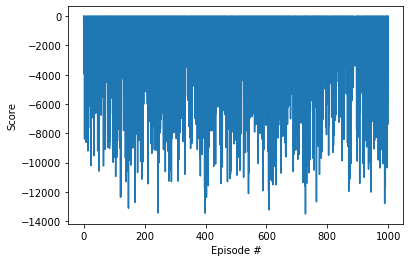

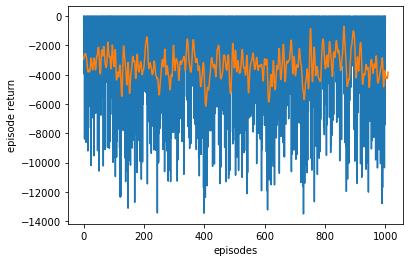

In [6]:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(env.scores)), env.scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.savefig('score_vs_eps.png')
    # plt.show()

    # Plotting 
    Y = np.asarray(env.log.get_log('scores'))
    Y2 = smooth(Y)
    x = np.linspace(0, len(Y), len(Y))
    fig1 = plt.figure()
    ax1 = plt.axes()
    ax1.plot(x, Y, Y2)
    plt.xlabel('episodes')
    plt.ylabel('episode return')
    plt.savefig('eps_return_vs_eps.png')
    # plt.show()

In [7]:
model.save("ppo2_mg")

In [5]:
model = PPO2.load("ppo2_mg")

Loading a model without an environment, this model cannot be trained until it has a valid environment.


Episode 2	Average Score: 0.00Start= [  8.8   8.5 -90.    9.5   8.6  90. ]
obs :  [  8.8   8.6 -90.    9.5   8.6  90. ]
action :  2
rewards :  -27.07106781186547
dones :  False
count: 1
Final= [  8.8   8.6 -90.    9.5   8.6  90. ]
obs :  [  8.8   8.7 -90.    9.5   8.6  90. ]
action :  2
rewards :  -26.999999999999993
dones :  False
count: 2
Final= [  8.8   8.7 -90.    9.5   8.6  90. ]
obs :  [  8.8   8.6 -90.    9.5   8.6  90. ]
action :  3
rewards :  -27.07106781186547
dones :  False
count: 3
Final= [  8.8   8.6 -90.    9.5   8.6  90. ]
obs :  [  8.8   8.7 -90.    9.5   8.6  90. ]
action :  2
rewards :  -26.999999999999993
dones :  False
count: 4
Final= [  8.8   8.7 -90.    9.5   8.6  90. ]
obs :  [  8.8   8.6 -90.    9.5   8.6  90. ]
action :  3
rewards :  -27.07106781186547
dones :  False
count: 5
Final= [  8.8   8.6 -90.    9.5   8.6  90. ]
obs :  [  8.8   8.7 -90.    9.5   8.6  90. ]
action :  2
rewards :  -26.999999999999993
dones :  False
count: 6
Final= [  8.8   8.7 -90.    9.5 

[  8.8   8.5 -90.    9.5   8.6  90. ]
[  8.8   8.6 -90.    9.5   8.6  90. ]
[  8.8   8.7 -90.    9.5   8.6  90. ]
[  8.8   8.6 -90.    9.5   8.6  90. ]
[  8.8   8.7 -90.    9.5   8.6  90. ]
[  8.8   8.6 -90.    9.5   8.6  90. ]
[  8.8   8.7 -90.    9.5   8.6  90. ]
[  8.8   8.8 -90.    9.5   8.6  90. ]
[  8.8   8.9 -90.    9.5   8.6  90. ]
[  8.8   9.  -90.    9.5   8.6  90. ]
[  8.8   8.9 -90.    9.5   8.6  90. ]
[  8.8   9.  -90.    9.5   8.6  90. ]
[  8.8   9.1 -90.    9.5   8.6  90. ]
[  8.8   9.1 -90.    9.5   8.6  90. ]
[  8.8   9.2 -90.    9.5   8.6  90. ]
[  8.8   9.3 -90.    9.5   8.6  90. ]
[  8.8   9.4 -90.    9.5   8.6  90. ]
[  8.8   9.5 -90.    9.5   8.6  90. ]
[  8.8   9.5 -90.    9.5   8.6  90. ]
[  8.8   9.6 -90.    9.5   8.6  90. ]
[  8.8   9.5 -90.    9.5   8.6  90. ]
[  8.8   9.6 -90.    9.5   8.6  90. ]
[  8.8   9.7 -90.    9.5   8.6  90. ]
[  8.8   9.8 -90.    9.5   8.6  90. ]
[  8.8   9.8 -90.    9.5   8.6  90. ]
[  8.8   9.9 -90.    9.5   8.6  90. ]
[  8.8  10. 

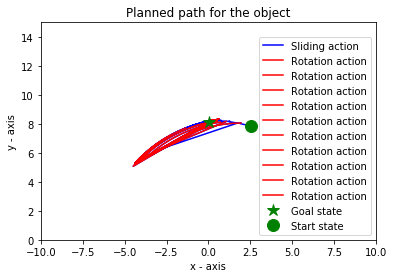

FileNotFoundError: [Errno 2] No such file or directory: 'Test_results/data.png'

<Figure size 432x288 with 0 Axes>

In [9]:
env_test = Env()
success=0

L = []
R = []
thetas 
actions = []
states = []

for i in range(1):    
    obs = env_test.reset()
    states.append(obs)
    done = 0
    count = 0
    print("Start=", obs)
    while (not done and count<100):
#     for j in range(100):
        action, _states = model.predict(obs)
        actions.append(action)
        obs, rewards, dones, info = env_test.step(action)
        states.append(obs)
        print("obs : ", obs)
        print("action : ", action)
        print("rewards : ", rewards)
        print("dones : ", dones)
        count = count + 1
        print("count:", count)
        print("Final=",obs)
    thetas = calculate_theta(states, actions)
    for state in states:
        L.append(state[0])
        R.append(state[1])
        print (state)

    
    if(done):
        success=success+1
        print("Goal reached","Episode_number=",i)
        print("Success_rate=",success*100/i)
    else:
        print("Goal not reached","Episode_number=",i)
#         print("Success_rate=",success*100/i)

    plot(L, R, thetas, actions)